In [1]:
import math
import operator

In [2]:
Base_Num = 13
N_Slots1 = 1000000
N_Slots2 = 10000000

HMax = 20
Max_Cpnts = 10

In [3]:
def HashFunction( slot , x , d ):
    global Base_Num
    
    num = 0
    
    for j in range(0,d):
        num += math.pow( x[j] , Base_Num )
        
    return int(num % slot)

In [4]:
class Node:
    
    def __init__(self):
        
        self.PrevN = None
        self.NextN = None
        
        
class State(Node):
    
    def __init__(self , vector , prob ):
        super().__init__()
        
        self.pk = None
        self.mkd = None
        self.cpnt = None
        
        self.prob = prob
        self.vector = vector
        
        self.PrevS = None
        self.NextS = None
        
        self.sorted_index = None

        self.cpnt = []
        
        
class Linked_List:
    
    def __init__(self):
        
        self.head = None
        self.tail = None
        
        

In [5]:
# xi = State()
# xi.NextN,xi.PrevN,xi.pk

In [6]:
# Function BoundaryInit()
# ∂[0, · · · , N Slots1 − 1] ← null;
# for i ∈ [0, · · · , N Slots1 − 1] do
# ∂[i].head ← null, ∂[i].tail ← null;
# return ∂;

# Initialize hash table for boundary ∂ of H0 components

def BoundaryInit():
    global N_Slots1
    
    boundry_arry = []
    
    for i in range( 0 , N_Slots1 ):
        
        boundry_arry.append( Linked_List() )
        
    return boundry_arry

boundary_array = BoundaryInit()

len( boundary_array ) , boundary_array[0].head , boundary_array[0].tail

(1000000, None, None)

In [7]:
Microstates_X = []

In [8]:
def getIndex( j ):
    return j.sorted_index

In [9]:
# OnBoundary(Slots, ∂, i, d) 
# slot ← HashFunction( N_Slots, x_i , d )
# Found ← False
# j ← ∂[slot].head
# while j 6 = null do
# if j == i then
# F ound ← T rue
# return F ound
# else
# j ← j.nextN



def OnBoundary( N_Slots1 , boundary_array , i , d):
    global Microstates_X
    
    x_i = Microstates_X[i]  #/**************** Get ith state object **************/
    
    slot =  HashFunction( N_Slots1 , x_i.vector , d )
    
    Found = False
    
    j= boundary_array[ slot ].head
    
    
    while j != None :
        
        if getIndex( j  ) == i :          #/**************Need Correction*******************/
            
            Found = True
            
            return Found
        
        else:
            j = j.NextN
            
    return Found




In [10]:
# Function BoundaryAdd(Slots, ∂, i, d) 
# . Inserts x i into hash table as a boundary microstate
# slot ← HashF unction N Slots, x i , d
# if ∂[slot].head == null then
# ∂[slot].head ← i , ∂[slot].tail ← i
# x i .nextN ← null, x i .prevN ← null
# else
# ∂[slot].tail.nextN ← i
# x i .prevN ← ∂[slot].tail, x i .nextN ← null
# ∂[slot].tail ← i
# return 1

def BoundaryAdd( N_Slots1 , boundary_array , i , d):
    
    global Microstates_X
    
    x_i = Microstates_X[i]  #/**************** Get ith state object **************/
    
    slot =  HashFunction( N_Slots1 , x_i.vector , d )
    
    if boundary_array[slot].head == None:
        
        boundary_array[slot].head =  x_i  
        boundary_array[slot].tail =  x_i
        x_i.NextN = None 
        x_i.PrevN = None
        
    else:
        
        boundary_array[slot].tail.NextN = x_i
        x_i.PrevN = boundary_array[slot].tail
        x_i.NextN = None
        boundary_array[slot].tail = x_i
        
    return 1
        

In [11]:
# BoundaryRemove(∂, i, d)

# slot ← HashFunction N Slots, x i , d
# if ∂[slot].head == ∂[slot].tail then
# ∂[slot].head ← null ∂[slot].tail ← null
# else
# (x i .prev).nextN ← x i .nextN, (x i .nextN ).prevN ← x i .prevN
# x i .nextN ← null, x i .prevN ← null
# return 1


def BoundaryRemove(N_Slots1, boundary_array , i, d ):
    global Microstates_X
    
    x_i = Microstates_X[i]  #/**************** Get ith state object **************/
    
    slot =  HashFunction( N_Slots1 , x_i.vector , d )
    
    #print( "In BoundaryRemove Function value of x_i:", x_i.vector )
    #print( "Hash slot:", slot )
    
    if boundary_array[slot].head == boundary_array[slot].tail:
        
        
        #print( "Same Head and Tail boundary_array[slot].vector.head: ", boundary_array[slot].head.vector )
        
        
        boundary_array[slot].head = None 
        boundary_array[slot].tail  = None
        
        
    
    else:
        
        temp_ptr = boundary_array[slot].head
        #print( "Boundary Hash has more than one nodes at this slot lets print it ..." )
        #while temp_ptr!=None:
         #   print( temp_ptr.vector )
          #  temp_ptr = temp_ptr.NextN
        #print( "end" )
        
        if x_i == boundary_array[slot].head:
            # update head
            # set prev with null 
            
            boundary_array[slot].head = boundary_array[slot].head.NextN
            boundary_array[slot].head.PrevN = None
            
            
        elif x_i == boundary_array[slot].tail:
            # update tail
            #set next with null
            
            boundary_array[slot].tail = boundary_array[slot].tail.PrevN
            boundary_array[slot].tail.NextN = None
            
        else:
            x_i.PrevN.NextN = x_i.NextN 
            x_i.NextN.PrevN = x_i.PrevN
            
            
            
        x_i.NextN = None
        x_i.PrevN = None
        
        
        
    
    return 1
        

In [12]:
# PeakAssign(i, j )
# x i .pk ← j
# return 1
            
def PeakAssign( i, j ):
    global Microstates_X
    
    x_i = Microstates_X[i]  #/**************** Get ith state object **************/
    
    x_i.pk = getIndex( Microstates_X[j] )
    
    return 1

In [13]:
# Function P eakF ind(i)
# x ← x i
# peakId ← null;
# while x.pk 6 = peakId do
# peakId ← x.pk
# x ← x peakId
# return peakId


def PeakFind( i ):
    global Microstates_X
    
    x = Microstates_X[i]  #/**************** Get ith state object **************/
    
    peakId = None
    
    while x.pk != peakId:
        
        peakId = x.pk
        
        x = Microstates_X[ peakId ]
    
    return peakId


In [14]:
class Zero_Homology_Group:
    
    def __init__(self):
        
        self.pb = None
        self.xb = None
        self.pd = None 
        self.xd = None
        

In [15]:
# Function HInit()                     Initialize list of 0-Homology groups
#    H[0, · · · , HMax] ← null        We assume a maximum (HMax) for number of components
#    for i ∈ [0, · · · , HMax] do
#         H[i].p b ← null, 
#         H[i].x b ← null, 
#         H[i].p d ← null, 
#         H[i].x d ← null
#    return H


def HInit():                
    global HMax
    
    H = []
    for i in range( HMax ):
        
        g = Zero_Homology_Group()
        H.append( g )
        
    return H



In [16]:
# Function HAdd(N C , BirthP rob, BirthState, DeathP rob, DeathState) . Infotmation of NC_th H0 group
    
#     H[ NC ].pb ← BirthProb, 
#     H[ NC ].xb ← BirthState;
#     H[ NC ].pd ← DeathProb, 
#     H[ NC ].xd ← DeathState;
    
#     return 1

def HAdd(NC , H , BirthProb, BirthState, DeathProb, DeathState):
    
    
    H[ NC ].pb = BirthProb, 
    H[ NC ].xb = BirthState;
    H[ NC ].pd = DeathProb, 
    H[ NC ].xd = DeathState;
    
    return 1



In [17]:
# Function cpntInit(i)                       Initialize list of components to which x i ’s neighbors belong
#     xi.cpnt[0, · · · , max_cpnts] ← null   We assume a maximum (max cpnts) for number of cpnt
#     return 1

def cpntInit(i):
    
    global Max_Cpnts
    global Microstates_X
    
    x_i = Microstates_X[i]
    
    #try:
    
    for i in range( Max_Cpnts ):
        x_i.cpnt.append( None )
        
    #except:
    #    print( "x_i", x_i  )
    
    return 1

In [18]:
# Function cpntAdd(i, k)        Add component with peak index k to x i .cpnt
#     j ← 0
    
#     while x i .cpnt[j] 6 = null do
#         j ← j +1
        
#     if j > max cpnts then
#         Error ’Maximum cpnt is reached’
        
#     else
#         x i .cpnt[j] ← k
        
#     return 1

def cpntAdd(i, k):
    global Max_Cpnts
    global Microstates_X
    
    j = 0
    
    x_i = Microstates_X[i]
    
    #try:
    
    while (x_i.cpnt[j] != None) and (j < Max_Cpnts) :
        j = j + 1
        
    #except:
    #    print( "j: ", i )
    #    print( "x_i: ", x_i )
        
        
    if (j+1) == Max_Cpnts :  # j >= Max_Cpnts
        print(  "Error: Maximum cpnt is reached" )
        
    else:
        x_i.cpnt[j] = k
        
    return 1

In [19]:
# Function cpntMax(i)              Find the component of x_i.cpnt[j] that has highest peak probability
#     Ind ← x_i.cpnt[0]
#     if Ind == null then
#         Error ”Component list is empty and has no maximum”
#     else
#         MAX ← PeakFind(Ind)
#         for j ∈ [1, · · · , max_cpnts] do
#             if PeakFind(x i .cpnt[j]) > MAX then
#                 MAX ← PeakFind(x_i.cpnt[j])
#     return MAX


def cpntMax(i):
    global Max_Cpnts
    global Microstates_X
    
    x_i = Microstates_X[i]
    
    Ind = x_i.cpnt[0]
    
    if Ind == None :
        print( "Error: Component list is empty and has no maximum ")
    else :
        
        MIN = PeakFind(Ind)
        
        for j in range( Max_Cpnts ) :
            
            if x_i.cpnt[j] == None :    #------Added by me ------
                continue                #------Added by me ------
            
            temp_peak = PeakFind( x_i.cpnt[j] )
            
            if  temp_peak < MIN :
                MIN = temp_peak
                

    return MIN

In [20]:
# Function StateInit()                          Initialize hash table for statespace
#     S[0, · · · , N_Slots2 − 1] ← null;
    
#     for i ∈ [0, · · · , N Slots2 − 1] do
#         S[i].head ← null, S[i].tail ← null;   Every slot in the hash table S is a linked list
    
#     return S;


def StateInit():
    
    S = []
    
    for i in range( N_Slots2 ):
        S.append( Linked_List() )
    
    return S;


In [21]:
# Function StateAdd(S, i, d)                      Inserts x_i into hash table S for easy searching
#     slot ← HashFunction( N_Slots2, x_i , d )
#     if S[slot].head == null then
#         S[slot].head ← i
#         ∂[slot].tail ← i
#         x_i.nextS ← null 
#         x_i.prevS ← null
#     else
#         S[slot].tail.nextS ← i
#         x_i.prevS ← S[slot].tail, 
#         x_i.nextS ← null
#         S[slot].tail ← i
#     return 1


def StateAdd(N_Slots2, S , i, d):
    
    global Microstates_X

    x_i = Microstates_X[i]
    
    slot = HashFunction( N_Slots2, x_i.vector , d )
    
    if S[slot].head == None :
        S[slot].head = x_i
        S[slot].tail = x_i
        x_i.NextS = None 
        x_i.PrevS = None
        
    else:
        
        S[slot].tail.NextS = x_i
        x_i.PrevS = S[slot].tail, 
        x_i.NextS = None
        S[slot].tail = x_i
        
    return 1


In [22]:
state_space = 100000

In [23]:
# Function StateHash()                           Add all microstates to hash table S
#     S ← StateInit();
#     for i ∈ [0, · · · , |Ω|] do
#         StateAdd(N Slots2, S, i, d)
#     return S
    
    
def StateHash(d):
    global Microstates_X 
    
    S = StateInit()
    
    for i in range( len(Microstates_X) ):
        
        StateAdd( N_Slots2 , S , i , d )
        
    return S

In [24]:
# Function FindNbIndex(S, x , d)            Given a microstate x vector, find the index of x
#     slot ← HashFunction(N Slots2, x, d)
#     Index ← null
#     j ← S[slot].head
#     while j != null do
#         if x_j == x then
#         Index ← j
#         return Index
#         else
#         j ← j.nextS
#     return Index



def FindNbIndex(S, x , d):
    
    global Microstates_X
    
    slot = HashFunction(N_Slots2, x , d)
    
    Index = None
    
    x_j = S[slot].head
    
    while x_j != None : 
        

        # x_j = Microstates_X[ getIndex(j) ]
        
        if x_j.vector == x :  # compare vectors  [1,2] == [1,2]
            
            Index = getIndex( x_j )
            
            return Index
        
        else:
            x_j = x_j.NextS
            
    return Index


In [25]:
from copy import deepcopy

In [26]:
# Function NeighborList(i, d)        List of neighbors vector of microstate x with index i
    
#     N [0, · · · , 2d − 1] ← 0
    
#     for j ∈ [0, · · · , d − 1] do
#         y ← x i
#         y[j] ← x i [j] − 1;
#         N [2j] ← y
#         y[j] ← x i [j] + 1;
#         N [2j + 1] ← y;
#     return N ;




def NeighborList(i, d):
    global Microstates_X
    
    N = [0]*(2*d)
    
    x_i = Microstates_X[ i ]
    
    for j in range( d ):
        
        y = deepcopy( x_i.vector )
        
        y[j] = x_i.vector[j] - 1
        N[2*j] = y
        
        
        y = deepcopy( x_i.vector )
        
        y[j] = x_i.vector[j] + 1
        N[2*j + 1] = y
        
    return N

In [27]:
# Function NeighborIndex(S, N , d):      List of indexes for microstate neighbor vector list N
#     I[0, · · · , 2d − 1] ← 0
#     for i ∈ [0, · · · , 2d − 1] do
#         I[i] ← FindNbIndex(S, N[i], d)
#     return I


def NeighborIndex(S, N , d):     
    
    I = [0]*(2*d)
    
    for i in range(2*d):
        I[i] = FindNbIndex( S , N[i] , d)
        
    return I

In [28]:

def Compute_H0_group( X , d ):
    
    state_space_size = len( X )
    
    for i , x_i in enumerate(X):
        x_i.pk = i
        x_i.mkd = 0
        cpntInit( i )
        x_i.PrevN = None
        x_i.NextN = None 
        x_i.PrevS = None 
        x_i.NextS = None
        x_i.sorted_index = i
        
    S = StateHash( d )
    N_C = 1
    H = HInit()
    
    HAdd( N_C-1 , H , X[0].prob , 0 , X[state_space_size-1].prob , state_space_size-1 )
    
    
    B = BoundaryInit()

    X[0].mkd = 1
    N = NeighborList( 0 , d )
    
    print( X[0].vector , " Neighbor's List: " , N )
    
    I = NeighborIndex( S , N , d )
    
    print( "NeighborIndex: ", I )
    
    for j in I:
        if j != None:
            BoundaryAdd( N_Slots1, B , j , d )
            cpntAdd(j, 0)
    
    
    print("\n")
    
    for i in range(1 , state_space_size ):
        
        if OnBoundary( N_Slots1 , B , i , d) == True:
            print( X[i].vector , " : " , i ,' is on boundary')
            
            peakId = cpntMax(i)
            
            for j in range( Max_Cpnts ):
                
                if  ( X[i].cpnt[j] != None ) and  (PeakFind( X[i].cpnt[j] ) != peakId ) :
                    #print('farid \t', X[ X[i].cpnt[j] ].pk=)
                    
                    BirthProb  = X[ PeakFind( X[i].cpnt[j] ) ].prob
                    BirthState = PeakFind( X[i].cpnt[j] )
                    DeathProb  = X[i].prob
                    DeathState = i
                    
                    N_C = N_C + 1
                    
                    print( "N_C:" ,  N_C )
                    
                    if N_C > HMax:
                        print( "Error 'Number of components reached its maximum'")
                    else:
                        HAdd( N_C-1 , H , BirthProb, BirthState, DeathProb, DeathState )
                    PeakAssign( X[i].cpnt[j], peakId)
            
            #print( "Assigning peak: ", peakId )
            
            PeakAssign(i, peakId)
            
            BoundaryRemove(N_Slots1 , B, i, d)
            
        else:
            cpntAdd( i , PeakFind(i) )
            #print( "New component" )
            
            
        X[i].mkd = 1
        N = NeighborList(i, d)
        I = NeighborIndex(S , N , d)
        
        #print(  X[i].vector , " Neighbor's List: " , N )
        #print( "NeighborIndex: ", I )
        
        for j in I:
            
            if j != None:
                
                if ( OnBoundary( N_Slots1,  B, j, d) == False ) and  ( X[j].mkd == 0 ):
                    BoundaryAdd(N_Slots1, B , j, d )
                    
                if not( PeakFind(i) in X[j].cpnt ):
                    cpntAdd( j, PeakFind(i) )
                    
                    
        #print( "i peak: ", X[i].pk )          
        #print("\n")
    
    return H 


In [29]:
#prob = [10, 9, 8.1, 8, 7.9, 7.8, 7.7, 7.6, 7.5, 7.4, 7, 6, 5, 4, 3, 2]
#states = [ (1,1), (0,1), (1,0), (3,3), (2,3), (2,0), (2,1), (3,0), (0,0), (3,2), (2,2), (3,1), (1,2), (0,2), (1,3), (0,3) ]
#len( states ) , len( prob )
import numpy as np
prob=np.loadtxt('probs_ss.txt')
states=np.loadtxt('projected_states.txt', usecols=(0,1))
len( states ) , len( prob )



(1681, 1681)

In [30]:
Microstates_X = []
for i in range( len(states) ):
    Microstates_X.append(  State( list(states[i]) , prob[i] )  )

In [31]:
d = 2
Microstates_X  = sorted( Microstates_X , key = operator.attrgetter('prob') , reverse= True )
H = Compute_H0_group( Microstates_X , d )

[0.0, 0.0]  Neighbor's List:  [[-1.0, 0.0], [1.0, 0.0], [0.0, -1.0], [0.0, 1.0]]
NeighborIndex:  [None, 22, None, 21]


[20.0, 0.0]  :  3  is on boundary
[0.0, 20.0]  :  4  is on boundary
[0.0, 18.0]  :  5  is on boundary
[18.0, 0.0]  :  6  is on boundary
[0.0, 21.0]  :  7  is on boundary
[21.0, 0.0]  :  8  is on boundary
[17.0, 0.0]  :  9  is on boundary
[0.0, 17.0]  :  10  is on boundary
[0.0, 22.0]  :  11  is on boundary
[22.0, 0.0]  :  12  is on boundary
[16.0, 0.0]  :  13  is on boundary
[0.0, 16.0]  :  14  is on boundary
[0.0, 23.0]  :  15  is on boundary
[23.0, 0.0]  :  16  is on boundary
[15.0, 0.0]  :  17  is on boundary
[0.0, 15.0]  :  18  is on boundary
[0.0, 24.0]  :  19  is on boundary
[24.0, 0.0]  :  20  is on boundary
[0.0, 1.0]  :  21  is on boundary
[1.0, 0.0]  :  22  is on boundary
[0.0, 25.0]  :  23  is on boundary
[25.0, 0.0]  :  24  is on boundary
[14.0, 0.0]  :  25  is on boundary
[0.0, 14.0]  :  26  is on boundary
[0.0, 26.0]  :  27  is on boundary
[26.0, 0.0]  :

[15.0, 12.0]  :  455  is on boundary
[12.0, 16.0]  :  456  is on boundary
[16.0, 12.0]  :  457  is on boundary
[11.0, 13.0]  :  458  is on boundary
[13.0, 11.0]  :  459  is on boundary
[12.0, 14.0]  :  460  is on boundary
[14.0, 12.0]  :  461  is on boundary
[6.0, 6.0]  :  462  is on boundary
[12.0, 17.0]  :  463  is on boundary
[17.0, 12.0]  :  464  is on boundary
[21.0, 10.0]  :  465  is on boundary
[10.0, 21.0]  :  466  is on boundary
[12.0, 9.0]  :  467  is on boundary
[9.0, 12.0]  :  468  is on boundary
[12.0, 13.0]  :  469  is on boundary
[13.0, 12.0]  :  470  is on boundary
[10.0, 12.0]  :  471  is on boundary
[12.0, 10.0]  :  472  is on boundary
[12.0, 12.0]  :  473  is on boundary
[2.0, 30.0]  :  474  is on boundary
[30.0, 2.0]  :  475  is on boundary
[13.0, 13.0]  :  476  is on boundary
[5.0, 8.0]  :  477  is on boundary
[8.0, 5.0]  :  478  is on boundary
[11.0, 7.0]  :  479  is on boundary
[7.0, 11.0]  :  480  is on boundary
[5.0, 9.0]  :  481  is on boundary
[9.0, 5.0]  :  

[32.0, 6.0]  :  823  is on boundary
[6.0, 32.0]  :  824  is on boundary
[11.0, 29.0]  :  825  is on boundary
[29.0, 11.0]  :  826  is on boundary
[14.0, 27.0]  :  827  is on boundary
[27.0, 14.0]  :  828  is on boundary
[21.0, 21.0]  :  829  is on boundary
[20.0, 22.0]  :  830  is on boundary
[22.0, 20.0]  :  831  is on boundary
[19.0, 23.0]  :  832  is on boundary
[23.0, 19.0]  :  833  is on boundary
[31.0, 8.0]  :  834  is on boundary
[8.0, 31.0]  :  835  is on boundary
[5.0, 33.0]  :  836  is on boundary
[33.0, 5.0]  :  837  is on boundary
[18.0, 24.0]  :  838  is on boundary
[24.0, 18.0]  :  839  is on boundary
[17.0, 25.0]  :  840  is on boundary
[25.0, 17.0]  :  841  is on boundary
[13.0, 28.0]  :  842  is on boundary
[28.0, 13.0]  :  843  is on boundary
[30.0, 10.0]  :  844  is on boundary
[10.0, 30.0]  :  845  is on boundary
[16.0, 26.0]  :  846  is on boundary
[26.0, 16.0]  :  847  is on boundary
[4.0, 34.0]  :  848  is on boundary
[34.0, 4.0]  :  849  is on boundary
[7.0, 32.

[9.0, 39.0]  :  1231  is on boundary
[39.0, 9.0]  :  1232  is on boundary
[11.0, 38.0]  :  1233  is on boundary
[38.0, 11.0]  :  1234  is on boundary
[27.0, 27.0]  :  1235  is on boundary
[13.0, 37.0]  :  1236  is on boundary
[37.0, 13.0]  :  1237  is on boundary
[26.0, 28.0]  :  1238  is on boundary
[28.0, 26.0]  :  1239  is on boundary
[25.0, 29.0]  :  1240  is on boundary
[29.0, 25.0]  :  1241  is on boundary
[36.0, 15.0]  :  1242  is on boundary
[15.0, 36.0]  :  1243  is on boundary
[33.0, 20.0]  :  1244  is on boundary
[20.0, 33.0]  :  1245  is on boundary
[24.0, 30.0]  :  1246  is on boundary
[30.0, 24.0]  :  1247  is on boundary
[17.0, 35.0]  :  1248  is on boundary
[35.0, 17.0]  :  1249  is on boundary
[31.0, 23.0]  :  1250  is on boundary
[23.0, 31.0]  :  1251  is on boundary
[10.0, 39.0]  :  1252  is on boundary
[39.0, 10.0]  :  1253  is on boundary
[34.0, 19.0]  :  1254  is on boundary
[19.0, 34.0]  :  1255  is on boundary
[38.0, 12.0]  :  1256  is on boundary
[12.0, 38.0]  

[35.0, 35.0]  :  1555  is on boundary
[34.0, 36.0]  :  1556  is on boundary
[36.0, 34.0]  :  1557  is on boundary
[33.0, 37.0]  :  1558  is on boundary
[37.0, 33.0]  :  1559  is on boundary
[38.0, 32.0]  :  1560  is on boundary
[32.0, 38.0]  :  1561  is on boundary
[39.0, 31.0]  :  1562  is on boundary
[31.0, 39.0]  :  1563  is on boundary
[36.0, 35.0]  :  1564  is on boundary
[35.0, 36.0]  :  1565  is on boundary
[37.0, 34.0]  :  1566  is on boundary
[34.0, 37.0]  :  1567  is on boundary
[38.0, 33.0]  :  1568  is on boundary
[33.0, 38.0]  :  1569  is on boundary
[39.0, 32.0]  :  1570  is on boundary
[32.0, 39.0]  :  1571  is on boundary
[36.0, 36.0]  :  1572  is on boundary
[35.0, 37.0]  :  1573  is on boundary
[37.0, 35.0]  :  1574  is on boundary
[38.0, 34.0]  :  1575  is on boundary
[34.0, 38.0]  :  1576  is on boundary
[39.0, 33.0]  :  1577  is on boundary
[33.0, 39.0]  :  1578  is on boundary
[36.0, 37.0]  :  1579  is on boundary
[37.0, 36.0]  :  1580  is on boundary
[35.0, 38.0]

h.pb: (0.09074576468369425,)
h.xb: 0
h.pd: (0.0,)
h.xd: 1680

h.pb: (0.026025989035732434,)
h.xb: 2
h.pd: (0.0006245625521941445,)
h.xd: 163

h.pb: (0.026025989035732444,)
h.xb: 1
h.pd: (0.0006245625521941445,)
h.xd: 164

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None

h.pb: None
h.xb: None
h.pd: None
h.xd: None



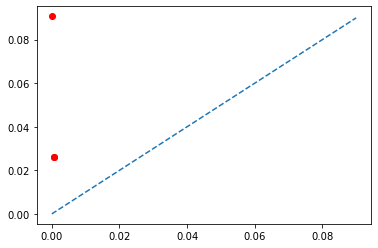

In [33]:
import matplotlib.pyplot as plt
for h in H:
    print( "h.pb:" , h.pb  )
    print( "h.xb:" , h.xb  )
    print( "h.pd:" , h.pd  )
    print( "h.xd:" , h.xd  )
    plt.scatter(h.pd, h.pb, color='red')

    print(  )
plt.plot([0,0.09], [0,0.09], '--')
plt.show()

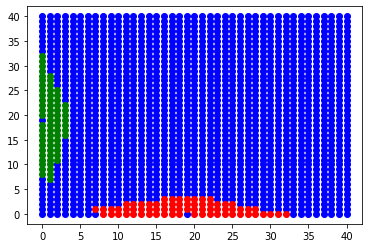

In [34]:
colors=['blue','red','green']
import matplotlib.pyplot as plt
X1=[]
Y1=[]
X2=[]
Y2=[]
X3=[]
Y3=[]
for i in Microstates_X:
    if i.pk==0:
        X1.append(i.vector[0])
        Y1.append(i.vector[1])
    elif i.pk==1:
        X2.append(i.vector[0])
        Y2.append(i.vector[1])
    else:
        X3.append(i.vector[0])
        Y3.append(i.vector[1])
plt.scatter(X1, Y1, color=colors[0])
plt.scatter(X2, Y2, color=colors[1])
plt.scatter(X3, Y3, color=colors[2])
plt.show()

In [35]:
prob=np.loadtxt('3D_probs.txt')
states=np.loadtxt('3D_states.txt', usecols=(0,1,2))
print(len( states ) , len( prob ))

Microstates_X = []
for i in range( len(states) ):
    Microstates_X.append(  State( list(states[i]) , prob[i] )  )
    
d = int(states.size/len(states))
print(d)
Microstates_X  = sorted( Microstates_X , key = operator.attrgetter('prob') , reverse= True )
H = Compute_H0_group( Microstates_X , d )

3375 3375
3
[10.0, 5.0, 7.0]  Neighbor's List:  [[9.0, 5.0, 7.0], [11.0, 5.0, 7.0], [10.0, 4.0, 7.0], [10.0, 6.0, 7.0], [10.0, 5.0, 6.0], [10.0, 5.0, 8.0]]
NeighborIndex:  [8, 170, 7, 11, 1, 6]


[10.0, 5.0, 6.0]  :  1  is on boundary
[9.0, 4.0, 8.0]  :  4  is on boundary
[9.0, 5.0, 8.0]  :  5  is on boundary
[10.0, 5.0, 8.0]  :  6  is on boundary
N_C: 2
[10.0, 4.0, 7.0]  :  7  is on boundary
[9.0, 5.0, 7.0]  :  8  is on boundary
N_C: 3
[9.0, 4.0, 7.0]  :  9  is on boundary
[9.0, 6.0, 8.0]  :  10  is on boundary
[10.0, 6.0, 7.0]  :  11  is on boundary
[10.0, 6.0, 6.0]  :  12  is on boundary
[9.0, 4.0, 9.0]  :  13  is on boundary
[9.0, 6.0, 6.0]  :  14  is on boundary
[9.0, 5.0, 9.0]  :  15  is on boundary
[10.0, 4.0, 6.0]  :  16  is on boundary
[9.0, 5.0, 6.0]  :  17  is on boundary
[9.0, 7.0, 7.0]  :  18  is on boundary
[10.0, 5.0, 5.0]  :  20  is on boundary
[10.0, 4.0, 9.0]  :  21  is on boundary
[9.0, 7.0, 6.0]  :  22  is on boundary
[4.0, 7.0, 7.0]  :  23  is on boundary
[10.0, 6.

[1.0, 14.0, 4.0]  :  437  is on boundary
[8.0, 6.0, 4.0]  :  438  is on boundary
[2.0, 7.0, 11.0]  :  439  is on boundary
[1.0, 9.0, 10.0]  :  440  is on boundary
[0.0, 8.0, 9.0]  :  441  is on boundary
[10.0, 2.0, 7.0]  :  442  is on boundary
[10.0, 5.0, 3.0]  :  443  is on boundary
[1.0, 0.0, 4.0]  :  444  is on boundary
[3.0, 6.0, 5.0]  :  445  is on boundary
[5.0, 13.0, 8.0]  :  446  is on boundary
[4.0, 14.0, 8.0]  :  447  is on boundary
[8.0, 8.0, 5.0]  :  448  is on boundary
[8.0, 7.0, 4.0]  :  449  is on boundary
[2.0, 13.0, 9.0]  :  450  is on boundary
[0.0, 9.0, 8.0]  :  451  is on boundary
[2.0, 14.0, 9.0]  :  452  is on boundary
[10.0, 8.0, 6.0]  :  453  is on boundary
[5.0, 6.0, 11.0]  :  454  is on boundary
[0.0, 7.0, 8.0]  :  455  is on boundary
[2.0, 8.0, 11.0]  :  456  is on boundary
[0.0, 11.0, 8.0]  :  457  is on boundary
[0.0, 11.0, 7.0]  :  458  is on boundary
[11.0, 3.0, 7.0]  :  459  is on boundary
[10.0, 8.0, 5.0]  :  460  is on boundary
[8.0, 5.0, 10.0]  :  461

[13.0, 5.0, 8.0]  :  837  is on boundary
[10.0, 8.0, 3.0]  :  838  is on boundary
[5.0, 14.0, 3.0]  :  839  is on boundary
[5.0, 7.0, 12.0]  :  840  is on boundary
[5.0, 12.0, 10.0]  :  841  is on boundary
[14.0, 1.0, 8.0]  :  842  is on boundary
[3.0, 4.0, 6.0]  :  843  is on boundary
[3.0, 13.0, 10.0]  :  844  is on boundary
[7.0, 10.0, 8.0]  :  845  is on boundary
[3.0, 10.0, 3.0]  :  846  is on boundary
[3.0, 6.0, 11.0]  :  847  is on boundary
[6.0, 8.0, 10.0]  :  848  is on boundary
[3.0, 1.0, 4.0]  :  849  is on boundary
[5.0, 4.0, 6.0]  :  850  is on boundary
[3.0, 9.0, 12.0]  :  851  is on boundary
[0.0, 2.0, 8.0]  :  852  is on boundary
[1.0, 2.0, 8.0]  :  853  is on boundary
[5.0, 9.0, 3.0]  :  854  is on boundary
[4.0, 11.0, 11.0]  :  855  is on boundary
[12.0, 3.0, 6.0]  :  856  is on boundary
[3.0, 11.0, 11.0]  :  857  is on boundary
[14.0, 0.0, 6.0]  :  858  is on boundary
[13.0, 6.0, 6.0]  :  859  is on boundary
[3.0, 5.0, 9.0]  :  860  is on boundary
[4.0, 1.0, 7.0]  : 

[11.0, 4.0, 2.0]  :  1232  is on boundary
[8.0, 9.0, 3.0]  :  1233  is on boundary
[8.0, 2.0, 11.0]  :  1234  is on boundary
[12.0, 1.0, 9.0]  :  1235  is on boundary
[14.0, 11.0, 9.0]  :  1236  is on boundary
[11.0, 8.0, 7.0]  :  1237  is on boundary
[5.0, 14.0, 2.0]  :  1238  is on boundary
[0.0, 13.0, 3.0]  :  1239  is on boundary
[14.0, 8.0, 8.0]  :  1240  is on boundary
[5.0, 13.0, 10.0]  :  1241  is on boundary
[7.0, 10.0, 9.0]  :  1242  is on boundary
[1.0, 2.0, 3.0]  :  1243  is on boundary
[2.0, 14.0, 11.0]  :  1244  is on boundary
[11.0, 8.0, 5.0]  :  1245  is on boundary
[13.0, 7.0, 8.0]  :  1246  is on boundary
[4.0, 2.0, 5.0]  :  1247  is on boundary
[13.0, 1.0, 9.0]  :  1248  is on boundary
[10.0, 8.0, 2.0]  :  1249  is on boundary
[14.0, 8.0, 9.0]  :  1250  is on boundary
[4.0, 7.0, 2.0]  :  1251  is on boundary
[6.0, 9.0, 3.0]  :  1252  is on boundary
[13.0, 6.0, 9.0]  :  1253  is on boundary
[4.0, 1.0, 8.0]  :  1254  is on boundary
[0.0, 6.0, 4.0]  :  1255  is on bound

[5.0, 8.0, 13.0]  :  1714  is on boundary
[8.0, 0.0, 11.0]  :  1715  is on boundary
[3.0, 4.0, 3.0]  :  1716  is on boundary
[3.0, 10.0, 13.0]  :  1717  is on boundary
[4.0, 1.0, 2.0]  :  1718  is on boundary
[10.0, 2.0, 12.0]  :  1719  is on boundary
[8.0, 0.0, 7.0]  :  1720  is on boundary
[8.0, 8.0, 1.0]  :  1721  is on boundary
[5.0, 14.0, 10.0]  :  1722  is on boundary
[14.0, 6.0, 3.0]  :  1723  is on boundary
[6.0, 5.0, 13.0]  :  1724  is on boundary
[14.0, 8.0, 11.0]  :  1725  is on boundary
[10.0, 10.0, 5.0]  :  1726  is on boundary
[7.0, 12.0, 3.0]  :  1727  is on boundary
[2.0, 10.0, 13.0]  :  1728  is on boundary
[6.0, 9.0, 11.0]  :  1729  is on boundary
[14.0, 2.0, 10.0]  :  1730  is on boundary
[5.0, 3.0, 4.0]  :  1731  is on boundary
[5.0, 10.0, 1.0]  :  1732  is on boundary
[10.0, 8.0, 1.0]  :  1733  is on boundary
[8.0, 7.0, 1.0]  :  1734  is on boundary
[1.0, 9.0, 13.0]  :  1735  is on boundary
[4.0, 14.0, 11.0]  :  1736  is on boundary
[11.0, 13.0, 8.0]  :  1737  is o

[0.0, 0.0, 14.0]  :  2074  is on boundary
[0.0, 1.0, 0.0]  :  2075  is on boundary
[0.0, 1.0, 1.0]  :  2076  is on boundary
[0.0, 1.0, 12.0]  :  2077  is on boundary
[0.0, 1.0, 13.0]  :  2078  is on boundary
[0.0, 1.0, 14.0]  :  2079  is on boundary
[0.0, 2.0, 0.0]  :  2080  is on boundary
[0.0, 2.0, 1.0]  :  2081  is on boundary
[0.0, 2.0, 2.0]  :  2082  is on boundary
[0.0, 2.0, 11.0]  :  2083  is on boundary
[0.0, 2.0, 12.0]  :  2084  is on boundary
[0.0, 2.0, 13.0]  :  2085  is on boundary
[0.0, 2.0, 14.0]  :  2086  is on boundary
[0.0, 3.0, 0.0]  :  2087  is on boundary
[0.0, 3.0, 1.0]  :  2088  is on boundary
[0.0, 3.0, 12.0]  :  2089  is on boundary
[0.0, 3.0, 13.0]  :  2090  is on boundary
[0.0, 3.0, 14.0]  :  2091  is on boundary
[0.0, 4.0, 0.0]  :  2092  is on boundary
[0.0, 4.0, 1.0]  :  2093  is on boundary
[0.0, 4.0, 12.0]  :  2094  is on boundary
[0.0, 4.0, 13.0]  :  2095  is on boundary
[0.0, 4.0, 14.0]  :  2096  is on boundary
[0.0, 5.0, 0.0]  :  2097  is on boundary
[0

[6.0, 0.0, 10.0]  :  2431  is on boundary
[6.0, 0.0, 11.0]  :  2432  is on boundary
[6.0, 0.0, 12.0]  :  2433  is on boundary
[6.0, 0.0, 13.0]  :  2434  is on boundary
[6.0, 0.0, 14.0]  :  2435  is on boundary
[6.0, 1.0, 0.0]  :  2436  is on boundary
[6.0, 1.0, 1.0]  :  2437  is on boundary
[6.0, 1.0, 2.0]  :  2438  is on boundary
[6.0, 1.0, 3.0]  :  2439  is on boundary
[6.0, 1.0, 4.0]  :  2440  is on boundary
[6.0, 1.0, 5.0]  :  2441  is on boundary
[6.0, 1.0, 6.0]  :  2442  is on boundary
[6.0, 1.0, 7.0]  :  2443  is on boundary
[6.0, 1.0, 8.0]  :  2444  is on boundary
[6.0, 1.0, 9.0]  :  2445  is on boundary
[6.0, 1.0, 10.0]  :  2446  is on boundary
[6.0, 1.0, 11.0]  :  2447  is on boundary
[6.0, 1.0, 12.0]  :  2448  is on boundary
[6.0, 1.0, 13.0]  :  2449  is on boundary
[6.0, 1.0, 14.0]  :  2450  is on boundary
[6.0, 2.0, 0.0]  :  2451  is on boundary
[6.0, 2.0, 1.0]  :  2452  is on boundary
[6.0, 2.0, 2.0]  :  2453  is on boundary
[6.0, 2.0, 3.0]  :  2454  is on boundary
[6.0, 

[10.0, 1.0, 3.0]  :  2831  is on boundary
[10.0, 1.0, 13.0]  :  2832  is on boundary
[10.0, 1.0, 14.0]  :  2833  is on boundary
[10.0, 2.0, 0.0]  :  2834  is on boundary
[10.0, 2.0, 1.0]  :  2835  is on boundary
[10.0, 2.0, 2.0]  :  2836  is on boundary
[10.0, 2.0, 13.0]  :  2837  is on boundary
[10.0, 2.0, 14.0]  :  2838  is on boundary
[10.0, 3.0, 0.0]  :  2839  is on boundary
[10.0, 3.0, 1.0]  :  2840  is on boundary
[10.0, 3.0, 14.0]  :  2841  is on boundary
[10.0, 4.0, 0.0]  :  2842  is on boundary
[10.0, 4.0, 14.0]  :  2843  is on boundary
[10.0, 5.0, 13.0]  :  2844  is on boundary
[10.0, 5.0, 14.0]  :  2845  is on boundary
[10.0, 6.0, 13.0]  :  2846  is on boundary
[10.0, 6.0, 14.0]  :  2847  is on boundary
[10.0, 7.0, 13.0]  :  2848  is on boundary
[10.0, 7.0, 14.0]  :  2849  is on boundary
[10.0, 8.0, 12.0]  :  2850  is on boundary
[10.0, 8.0, 13.0]  :  2851  is on boundary
[10.0, 8.0, 14.0]  :  2852  is on boundary
[10.0, 9.0, 0.0]  :  2853  is on boundary
[10.0, 9.0, 1.0]  :

[13.0, 12.0, 1.0]  :  3251  is on boundary
[13.0, 12.0, 2.0]  :  3252  is on boundary
[13.0, 12.0, 3.0]  :  3253  is on boundary
[13.0, 12.0, 4.0]  :  3254  is on boundary
[13.0, 12.0, 5.0]  :  3255  is on boundary
[13.0, 12.0, 11.0]  :  3256  is on boundary
[13.0, 12.0, 12.0]  :  3257  is on boundary
[13.0, 12.0, 13.0]  :  3258  is on boundary
[13.0, 12.0, 14.0]  :  3259  is on boundary
[13.0, 13.0, 0.0]  :  3260  is on boundary
[13.0, 13.0, 1.0]  :  3261  is on boundary
[13.0, 13.0, 2.0]  :  3262  is on boundary
[13.0, 13.0, 3.0]  :  3263  is on boundary
[13.0, 13.0, 4.0]  :  3264  is on boundary
[13.0, 13.0, 12.0]  :  3265  is on boundary
[13.0, 13.0, 13.0]  :  3266  is on boundary
[13.0, 13.0, 14.0]  :  3267  is on boundary
[13.0, 14.0, 0.0]  :  3268  is on boundary
[13.0, 14.0, 1.0]  :  3269  is on boundary
[13.0, 14.0, 2.0]  :  3270  is on boundary
[13.0, 14.0, 3.0]  :  3271  is on boundary
[13.0, 14.0, 13.0]  :  3272  is on boundary
[13.0, 14.0, 14.0]  :  3273  is on boundary
[1

h.pb: (0.018125963726819766,)
h.xb: 0
h.pd: (0.0,)
h.xd: 3374

h.pb: (0.015233030001045018,)
h.xb: 2
h.pd: (0.015004600061154701,)
h.xd: 6

h.pb: (0.015191780070516832,)
h.xb: 3
h.pd: (0.014989735661773732,)
h.xd: 8

h.pb: (0.00829769313697034,)
h.xb: 24
h.pd: (0.006587720531272204,)
h.xd: 31

h.pb: (0.0046502855336606995,)
h.xb: 48
h.pd: (0.00383594339991965,)
h.xd: 63

h.pb: (0.0055048593996659435,)
h.xb: 41
h.pd: (0.0036687850664897746,)
h.xd: 69

h.pb: (0.0035817121989225502,)
h.xb: 73
h.pd: (0.0035176691999898968,)
h.xd: 74

h.pb: (0.009064580466809196,)
h.xb: 19
h.pd: (0.003331764799666005,)
h.xd: 79

h.pb: (0.0013627530671475813,)
h.xb: 186
h.pd: (0.0011788714003692403,)
h.xd: 205

h.pb: (5.303999999857169e-05,)
h.xb: 637
h.pd: (5.024553331594671e-05,)
h.xd: 647

h.pb: (0.0010441079332551857,)
h.xb: 227
h.pd: (4.849386666784041e-05,)
h.xd: 655

h.pb: (6.318893333849069e-05,)
h.xb: 607
h.pd: (6.48473333286e-06,)
h.xd: 961

h.pb: (2.8104666655961e-06,)
h.xb: 1078
h.pd: (1.87280000

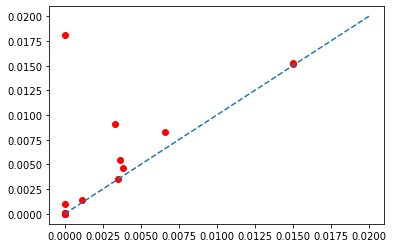

In [36]:
for h in H:
    print( "h.pb:" , h.pb  )
    print( "h.xb:" , h.xb  )
    print( "h.pd:" , h.pd  )
    print( "h.xd:" , h.xd  )
    plt.scatter(h.pd, h.pb, color='red')
    print(  )
plt.plot([0,0.02], [0,0.02], '--')
plt.show()

In [37]:
prob=np.loadtxt('path_sampling.dist', usecols=(5,))
states=np.loadtxt('path_sampling.dist', usecols=(0,1,2,3,4))
print(len( states ) , len( prob ))

Microstates_X = []
for i in range( len(states) ):
    Microstates_X.append(  State( list(states[i]) , prob[i] )  )
    
d = int(states.size/len(states))
print(d)
Microstates_X  = sorted( Microstates_X , key = operator.attrgetter('prob') , reverse= True )
H = Compute_H0_group( Microstates_X , d )

107751 107751
5
[10.0, 5.0, 7.0, 7.0, 7.0]  Neighbor's List:  [[9.0, 5.0, 7.0, 7.0, 7.0], [11.0, 5.0, 7.0, 7.0, 7.0], [10.0, 4.0, 7.0, 7.0, 7.0], [10.0, 6.0, 7.0, 7.0, 7.0], [10.0, 5.0, 6.0, 7.0, 7.0], [10.0, 5.0, 8.0, 7.0, 7.0], [10.0, 5.0, 7.0, 6.0, 7.0], [10.0, 5.0, 7.0, 8.0, 7.0], [10.0, 5.0, 7.0, 7.0, 6.0], [10.0, 5.0, 7.0, 7.0, 8.0]]
NeighborIndex:  [326, 2213, 11, 22, 16, 5, 32, 14, 40, 8]


[10.0, 5.0, 8.0, 7.0, 7.0]  :  5  is on boundary
[9.0, 5.0, 7.0, 8.0, 9.0]  :  6  is on boundary
[10.0, 5.0, 7.0, 7.0, 8.0]  :  8  is on boundary
N_C: 2
[9.0, 5.0, 7.0, 8.0, 8.0]  :  9  is on boundary
[9.0, 5.0, 8.0, 8.0, 8.0]  :  10  is on boundary
[10.0, 4.0, 7.0, 7.0, 7.0]  :  11  is on boundary
[9.0, 5.0, 8.0, 7.0, 8.0]  :  12  is on boundary
[9.0, 4.0, 8.0, 7.0, 8.0]  :  13  is on boundary
N_C: 3
N_C: 4
[10.0, 5.0, 7.0, 8.0, 7.0]  :  14  is on boundary
[10.0, 4.0, 8.0, 6.0, 6.0]  :  15  is on boundary
[10.0, 5.0, 6.0, 7.0, 7.0]  :  16  is on boundary
[10.0, 4.0, 7.0, 7.0, 6.0]  :  17  i

[9.0, 4.0, 7.0, 8.0, 6.0]  :  393  is on boundary
[10.0, 4.0, 9.0, 5.0, 6.0]  :  394  is on boundary
[10.0, 4.0, 6.0, 6.0, 9.0]  :  395  is on boundary
[10.0, 4.0, 6.0, 8.0, 8.0]  :  396  is on boundary
[4.0, 8.0, 8.0, 5.0, 7.0]  :  397  is on boundary
[9.0, 4.0, 7.0, 9.0, 8.0]  :  398  is on boundary
[7.0, 6.0, 6.0, 10.0, 10.0]  :  399  is on boundary
[8.0, 4.0, 6.0, 8.0, 9.0]  :  400  is on boundary
[4.0, 8.0, 8.0, 5.0, 8.0]  :  401  is on boundary
[6.0, 5.0, 8.0, 8.0, 9.0]  :  402  is on boundary
[4.0, 8.0, 7.0, 7.0, 8.0]  :  403  is on boundary
[4.0, 7.0, 8.0, 4.0, 7.0]  :  404  is on boundary
[10.0, 4.0, 7.0, 8.0, 8.0]  :  405  is on boundary
[4.0, 7.0, 5.0, 6.0, 7.0]  :  406  is on boundary
[9.0, 3.0, 9.0, 6.0, 7.0]  :  407  is on boundary
[10.0, 5.0, 6.0, 9.0, 8.0]  :  408  is on boundary
[5.0, 7.0, 8.0, 7.0, 8.0]  :  409  is on boundary
N_C: 13
[10.0, 5.0, 5.0, 6.0, 7.0]  :  410  is on boundary
[9.0, 6.0, 9.0, 7.0, 9.0]  :  411  is on boundary
[9.0, 5.0, 10.0, 6.0, 7.0]  :  412

[9.0, 5.0, 7.0, 6.0, 10.0]  :  580  is on boundary
[9.0, 5.0, 9.0, 9.0, 7.0]  :  581  is on boundary
[3.0, 8.0, 8.0, 5.0, 6.0]  :  582  is on boundary
[4.0, 9.0, 7.0, 6.0, 7.0]  :  583  is on boundary
[3.0, 7.0, 7.0, 7.0, 6.0]  :  584  is on boundary
[5.0, 6.0, 8.0, 6.0, 8.0]  :  585  is on boundary
[5.0, 7.0, 9.0, 7.0, 10.0]  :  586  is on boundary
[9.0, 7.0, 5.0, 8.0, 8.0]  :  587  is on boundary
[4.0, 11.0, 5.0, 5.0, 5.0]  :  588  is on boundary
[4.0, 9.0, 7.0, 7.0, 7.0]  :  589  is on boundary
[9.0, 5.0, 6.0, 6.0, 9.0]  :  590  is on boundary
[4.0, 7.0, 9.0, 7.0, 9.0]  :  591  is on boundary
[10.0, 6.0, 4.0, 7.0, 8.0]  :  592  is on boundary
[3.0, 10.0, 6.0, 5.0, 5.0]  :  593  is on boundary
[9.0, 6.0, 9.0, 8.0, 9.0]  :  594  is on boundary
[4.0, 10.0, 6.0, 6.0, 5.0]  :  595  is on boundary
[4.0, 11.0, 7.0, 6.0, 7.0]  :  596  is on boundary
[3.0, 9.0, 5.0, 6.0, 6.0]  :  597  is on boundary
[4.0, 8.0, 6.0, 5.0, 6.0]  :  598  is on boundary
[6.0, 6.0, 9.0, 9.0, 9.0]  :  599  is on bo

[9.0, 4.0, 6.0, 9.0, 7.0]  :  901  is on boundary
[4.0, 10.0, 5.0, 6.0, 5.0]  :  902  is on boundary
[4.0, 9.0, 8.0, 6.0, 8.0]  :  903  is on boundary
[9.0, 5.0, 6.0, 10.0, 8.0]  :  904  is on boundary
[5.0, 11.0, 6.0, 6.0, 6.0]  :  905  is on boundary
[7.0, 7.0, 7.0, 9.0, 10.0]  :  906  is on boundary
[4.0, 8.0, 7.0, 8.0, 8.0]  :  907  is on boundary
[7.0, 7.0, 7.0, 11.0, 10.0]  :  908  is on boundary
[5.0, 7.0, 8.0, 9.0, 8.0]  :  909  is on boundary
[2.0, 8.0, 6.0, 6.0, 7.0]  :  910  is on boundary
[4.0, 9.0, 7.0, 7.0, 6.0]  :  911  is on boundary
[3.0, 8.0, 7.0, 8.0, 7.0]  :  912  is on boundary
[9.0, 4.0, 9.0, 7.0, 9.0]  :  913  is on boundary
[10.0, 5.0, 5.0, 7.0, 10.0]  :  914  is on boundary
[10.0, 6.0, 8.0, 5.0, 8.0]  :  915  is on boundary
[5.0, 6.0, 8.0, 6.0, 9.0]  :  916  is on boundary
[9.0, 3.0, 7.0, 5.0, 8.0]  :  917  is on boundary
[5.0, 11.0, 7.0, 6.0, 8.0]  :  918  is on boundary
[10.0, 6.0, 6.0, 5.0, 9.0]  :  919  is on boundary
[3.0, 7.0, 9.0, 6.0, 7.0]  :  920  is o

[4.0, 6.0, 7.0, 5.0, 8.0]  :  1174  is on boundary
[7.0, 5.0, 8.0, 8.0, 8.0]  :  1175  is on boundary
[10.0, 7.0, 4.0, 7.0, 8.0]  :  1176  is on boundary
[9.0, 5.0, 8.0, 5.0, 8.0]  :  1177  is on boundary
[10.0, 6.0, 8.0, 6.0, 9.0]  :  1178  is on boundary
[6.0, 5.0, 8.0, 9.0, 9.0]  :  1179  is on boundary
[8.0, 4.0, 6.0, 8.0, 7.0]  :  1180  is on boundary
[9.0, 3.0, 8.0, 6.0, 5.0]  :  1181  is on boundary
[5.0, 6.0, 8.0, 7.0, 7.0]  :  1182  is on boundary
[6.0, 7.0, 8.0, 8.0, 10.0]  :  1183  is on boundary
[3.0, 7.0, 6.0, 4.0, 6.0]  :  1184  is on boundary
[3.0, 8.0, 9.0, 4.0, 7.0]  :  1185  is on boundary
[9.0, 6.0, 8.0, 9.0, 10.0]  :  1186  is on boundary
[3.0, 7.0, 6.0, 8.0, 6.0]  :  1187  is on boundary
[9.0, 5.0, 8.0, 10.0, 8.0]  :  1188  is on boundary
[10.0, 5.0, 7.0, 5.0, 9.0]  :  1189  is on boundary
[3.0, 8.0, 8.0, 7.0, 8.0]  :  1190  is on boundary
[6.0, 6.0, 7.0, 9.0, 9.0]  :  1191  is on boundary
[4.0, 8.0, 5.0, 5.0, 6.0]  :  1192  is on boundary
[9.0, 7.0, 7.0, 9.0, 7.0]

[4.0, 6.0, 7.0, 6.0, 6.0]  :  1405  is on boundary
[3.0, 9.0, 5.0, 7.0, 5.0]  :  1406  is on boundary
[8.0, 5.0, 5.0, 8.0, 10.0]  :  1407  is on boundary
[11.0, 5.0, 7.0, 7.0, 6.0]  :  1408  is on boundary
[8.0, 3.0, 8.0, 7.0, 8.0]  :  1409  is on boundary
[6.0, 5.0, 8.0, 8.0, 10.0]  :  1410  is on boundary
[10.0, 4.0, 8.0, 9.0, 5.0]  :  1411  is on boundary
[4.0, 7.0, 6.0, 8.0, 8.0]  :  1412  is on boundary
[3.0, 7.0, 6.0, 5.0, 5.0]  :  1413  is on boundary
[4.0, 10.0, 7.0, 5.0, 8.0]  :  1414  is on boundary
[4.0, 7.0, 9.0, 4.0, 9.0]  :  1415  is on boundary
[3.0, 9.0, 9.0, 6.0, 7.0]  :  1416  is on boundary
[3.0, 8.0, 6.0, 8.0, 5.0]  :  1417  is on boundary
[9.0, 7.0, 8.0, 6.0, 7.0]  :  1418  is on boundary
[4.0, 8.0, 7.0, 7.0, 9.0]  :  1419  is on boundary
[4.0, 12.0, 7.0, 6.0, 6.0]  :  1420  is on boundary
[1.0, 8.0, 8.0, 5.0, 7.0]  :  1421  is on boundary
[4.0, 11.0, 9.0, 5.0, 7.0]  :  1422  is on boundary
[4.0, 7.0, 10.0, 4.0, 8.0]  :  1423  is on boundary
[4.0, 8.0, 8.0, 7.0, 6.

[4.0, 9.0, 8.0, 6.0, 6.0]  :  1782  is on boundary
[5.0, 12.0, 6.0, 5.0, 7.0]  :  1783  is on boundary
[2.0, 14.0, 7.0, 6.0, 6.0]  :  1784  is on boundary
N_C: 21
Error 'Number of components reached its maximum'
[8.0, 6.0, 7.0, 10.0, 11.0]  :  1785  is on boundary
[9.0, 3.0, 7.0, 7.0, 5.0]  :  1786  is on boundary
[6.0, 7.0, 9.0, 8.0, 10.0]  :  1787  is on boundary
[9.0, 3.0, 10.0, 6.0, 6.0]  :  1788  is on boundary
[8.0, 4.0, 6.0, 7.0, 10.0]  :  1789  is on boundary
[3.0, 9.0, 6.0, 8.0, 6.0]  :  1790  is on boundary
[5.0, 8.0, 8.0, 8.0, 8.0]  :  1791  is on boundary
[10.0, 7.0, 8.0, 6.0, 7.0]  :  1792  is on boundary
[1.0, 7.0, 9.0, 6.0, 7.0]  :  1793  is on boundary
[2.0, 10.0, 7.0, 5.0, 6.0]  :  1794  is on boundary
[10.0, 7.0, 8.0, 6.0, 8.0]  :  1795  is on boundary
[5.0, 8.0, 8.0, 8.0, 10.0]  :  1796  is on boundary
[5.0, 6.0, 10.0, 6.0, 8.0]  :  1797  is on boundary
[5.0, 7.0, 7.0, 8.0, 10.0]  :  1798  is on boundary
[5.0, 7.0, 6.0, 8.0, 7.0]  :  1799  is on boundary
[2.0, 8.0, 9

[3.0, 7.0, 8.0, 8.0, 8.0]  :  2050  is on boundary
[2.0, 8.0, 8.0, 5.0, 8.0]  :  2051  is on boundary
[3.0, 11.0, 6.0, 7.0, 6.0]  :  2052  is on boundary
[9.0, 5.0, 10.0, 8.0, 6.0]  :  2053  is on boundary
[5.0, 7.0, 10.0, 7.0, 8.0]  :  2054  is on boundary
[11.0, 5.0, 7.0, 8.0, 7.0]  :  2055  is on boundary
[4.0, 10.0, 9.0, 5.0, 7.0]  :  2056  is on boundary
[2.0, 8.0, 5.0, 6.0, 6.0]  :  2057  is on boundary
[2.0, 12.0, 7.0, 6.0, 5.0]  :  2058  is on boundary
[10.0, 3.0, 7.0, 7.0, 8.0]  :  2059  is on boundary
[5.0, 8.0, 6.0, 6.0, 8.0]  :  2060  is on boundary
[3.0, 14.0, 6.0, 6.0, 6.0]  :  2061  is on boundary
[4.0, 11.0, 8.0, 4.0, 7.0]  :  2062  is on boundary
[10.0, 7.0, 6.0, 5.0, 9.0]  :  2063  is on boundary
[5.0, 6.0, 6.0, 6.0, 8.0]  :  2064  is on boundary
[3.0, 7.0, 5.0, 6.0, 8.0]  :  2065  is on boundary
[9.0, 4.0, 6.0, 7.0, 6.0]  :  2066  is on boundary
[10.0, 4.0, 4.0, 6.0, 8.0]  :  2067  is on boundary
[9.0, 3.0, 7.0, 5.0, 6.0]  :  2068  is on boundary
[10.0, 5.0, 4.0, 8.0

[4.0, 11.0, 9.0, 5.0, 6.0]  :  2323  is on boundary
[3.0, 13.0, 6.0, 5.0, 5.0]  :  2324  is on boundary
[3.0, 8.0, 8.0, 5.0, 5.0]  :  2325  is on boundary
[2.0, 7.0, 10.0, 6.0, 7.0]  :  2326  is on boundary
[5.0, 10.0, 5.0, 6.0, 7.0]  :  2327  is on boundary
[4.0, 12.0, 5.0, 4.0, 4.0]  :  2328  is on boundary
[8.0, 3.0, 6.0, 7.0, 8.0]  :  2329  is on boundary
[4.0, 11.0, 7.0, 7.0, 8.0]  :  2330  is on boundary
[1.0, 14.0, 7.0, 5.0, 7.0]  :  2331  is on boundary
[3.0, 8.0, 4.0, 6.0, 6.0]  :  2332  is on boundary
[3.0, 6.0, 7.0, 6.0, 7.0]  :  2333  is on boundary
[4.0, 13.0, 6.0, 6.0, 6.0]  :  2334  is on boundary
[5.0, 8.0, 9.0, 7.0, 9.0]  :  2335  is on boundary
[5.0, 7.0, 7.0, 5.0, 9.0]  :  2336  is on boundary
[4.0, 12.0, 6.0, 6.0, 7.0]  :  2337  is on boundary
[9.0, 7.0, 4.0, 7.0, 8.0]  :  2338  is on boundary
[6.0, 7.0, 8.0, 11.0, 10.0]  :  2339  is on boundary
[10.0, 4.0, 7.0, 8.0, 4.0]  :  2340  is on boundary
[7.0, 4.0, 8.0, 9.0, 9.0]  :  2341  is on boundary
[4.0, 9.0, 9.0, 8.0

[3.0, 9.0, 7.0, 8.0, 7.0]  :  2594  is on boundary
[9.0, 5.0, 5.0, 6.0, 10.0]  :  2595  is on boundary
[4.0, 10.0, 5.0, 4.0, 7.0]  :  2596  is on boundary
[5.0, 8.0, 8.0, 7.0, 8.0]  :  2597  is on boundary
[3.0, 11.0, 7.0, 5.0, 4.0]  :  2598  is on boundary
[2.0, 8.0, 8.0, 8.0, 6.0]  :  2599  is on boundary
[1.0, 0.0, 7.0, 7.0, 6.0]  :  2600  is on boundary
[1.0, 0.0, 7.0, 6.0, 5.0]  :  2601  is on boundary
[2.0, 12.0, 7.0, 7.0, 6.0]  :  2602  is on boundary
[5.0, 10.0, 5.0, 6.0, 6.0]  :  2603  is on boundary
[10.0, 3.0, 6.0, 6.0, 5.0]  :  2604  is on boundary
[7.0, 6.0, 7.0, 9.0, 12.0]  :  2605  is on boundary
[1.0, 12.0, 7.0, 5.0, 6.0]  :  2606  is on boundary
[1.0, 13.0, 7.0, 6.0, 7.0]  :  2607  is on boundary
[5.0, 9.0, 6.0, 7.0, 8.0]  :  2608  is on boundary
[4.0, 6.0, 7.0, 7.0, 6.0]  :  2609  is on boundary
[3.0, 7.0, 5.0, 7.0, 5.0]  :  2610  is on boundary
[9.0, 6.0, 9.0, 8.0, 6.0]  :  2611  is on boundary
[1.0, 11.0, 8.0, 5.0, 7.0]  :  2612  is on boundary
[5.0, 5.0, 9.0, 5.0, 

[10.0, 5.0, 4.0, 5.0, 9.0]  :  2934  is on boundary
[3.0, 13.0, 7.0, 5.0, 6.0]  :  2935  is on boundary
[4.0, 8.0, 8.0, 4.0, 6.0]  :  2936  is on boundary
[3.0, 12.0, 6.0, 7.0, 6.0]  :  2937  is on boundary
[11.0, 5.0, 5.0, 6.0, 6.0]  :  2938  is on boundary
[1.0, 8.0, 8.0, 4.0, 7.0]  :  2939  is on boundary
[7.0, 7.0, 5.0, 10.0, 10.0]  :  2940  is on boundary
[9.0, 7.0, 5.0, 10.0, 9.0]  :  2941  is on boundary
[7.0, 4.0, 7.0, 7.0, 7.0]  :  2942  is on boundary
[9.0, 7.0, 6.0, 5.0, 10.0]  :  2943  is on boundary
[5.0, 10.0, 8.0, 8.0, 7.0]  :  2944  is on boundary
[3.0, 12.0, 7.0, 5.0, 7.0]  :  2945  is on boundary
[2.0, 8.0, 10.0, 6.0, 8.0]  :  2946  is on boundary
[4.0, 6.0, 6.0, 7.0, 8.0]  :  2947  is on boundary
[4.0, 7.0, 6.0, 5.0, 5.0]  :  2948  is on boundary
[10.0, 3.0, 5.0, 6.0, 7.0]  :  2949  is on boundary
[5.0, 9.0, 7.0, 7.0, 8.0]  :  2950  is on boundary
[4.0, 10.0, 7.0, 8.0, 8.0]  :  2951  is on boundary
[9.0, 4.0, 6.0, 9.0, 6.0]  :  2952  is on boundary
[6.0, 7.0, 7.0, 10

[7.0, 7.0, 6.0, 8.0, 11.0]  :  3260  is on boundary
[10.0, 6.0, 7.0, 10.0, 8.0]  :  3261  is on boundary
[5.0, 10.0, 8.0, 6.0, 8.0]  :  3262  is on boundary
[4.0, 7.0, 5.0, 4.0, 8.0]  :  3263  is on boundary
[2.0, 13.0, 5.0, 6.0, 5.0]  :  3264  is on boundary
[4.0, 9.0, 7.0, 9.0, 7.0]  :  3265  is on boundary
[9.0, 5.0, 6.0, 10.0, 10.0]  :  3266  is on boundary
[5.0, 9.0, 6.0, 7.0, 7.0]  :  3267  is on boundary
[4.0, 7.0, 7.0, 9.0, 8.0]  :  3268  is on boundary
[4.0, 11.0, 5.0, 7.0, 4.0]  :  3269  is on boundary
[6.0, 5.0, 10.0, 7.0, 9.0]  :  3270  is on boundary
[4.0, 11.0, 7.0, 8.0, 6.0]  :  3271  is on boundary
[4.0, 6.0, 5.0, 5.0, 7.0]  :  3272  is on boundary
[5.0, 12.0, 7.0, 6.0, 5.0]  :  3273  is on boundary
[5.0, 10.0, 7.0, 6.0, 9.0]  :  3274  is on boundary
[6.0, 5.0, 8.0, 6.0, 10.0]  :  3275  is on boundary
[0.0, 14.0, 7.0, 6.0, 5.0]  :  3276  is on boundary
[5.0, 7.0, 10.0, 9.0, 10.0]  :  3277  is on boundary
[4.0, 14.0, 5.0, 4.0, 6.0]  :  3278  is on boundary
[4.0, 7.0, 11.

[10.0, 4.0, 8.0, 8.0, 9.0]  :  3497  is on boundary
[1.0, 12.0, 7.0, 7.0, 6.0]  :  3498  is on boundary
[7.0, 4.0, 6.0, 9.0, 7.0]  :  3499  is on boundary
[1.0, 10.0, 9.0, 6.0, 6.0]  :  3500  is on boundary
[4.0, 7.0, 8.0, 9.0, 7.0]  :  3501  is on boundary
[9.0, 6.0, 9.0, 6.0, 6.0]  :  3502  is on boundary
[2.0, 11.0, 8.0, 7.0, 7.0]  :  3503  is on boundary
[9.0, 7.0, 5.0, 5.0, 10.0]  :  3504  is on boundary
[1.0, 14.0, 6.0, 5.0, 7.0]  :  3505  is on boundary
[2.0, 9.0, 7.0, 4.0, 6.0]  :  3506  is on boundary
[11.0, 5.0, 7.0, 9.0, 5.0]  :  3507  is on boundary
[3.0, 10.0, 5.0, 7.0, 6.0]  :  3508  is on boundary
[4.0, 12.0, 7.0, 6.0, 8.0]  :  3509  is on boundary
[1.0, 10.0, 8.0, 5.0, 5.0]  :  3510  is on boundary
[11.0, 4.0, 7.0, 7.0, 4.0]  :  3511  is on boundary
[1.0, 14.0, 8.0, 7.0, 7.0]  :  3512  is on boundary
[4.0, 8.0, 7.0, 5.0, 5.0]  :  3513  is on boundary
[2.0, 9.0, 6.0, 4.0, 6.0]  :  3514  is on boundary
[2.0, 14.0, 5.0, 5.0, 5.0]  :  3515  is on boundary
[2.0, 0.0, 7.0, 6.

[1.0, 9.0, 8.0, 6.0, 8.0]  :  3718  is on boundary
[5.0, 7.0, 7.0, 7.0, 6.0]  :  3719  is on boundary
[5.0, 12.0, 5.0, 6.0, 7.0]  :  3720  is on boundary
[8.0, 5.0, 5.0, 7.0, 10.0]  :  3721  is on boundary
[3.0, 7.0, 7.0, 9.0, 7.0]  :  3722  is on boundary
[6.0, 7.0, 7.0, 11.0, 9.0]  :  3723  is on boundary
[5.0, 7.0, 10.0, 6.0, 8.0]  :  3724  is on boundary
[8.0, 7.0, 8.0, 8.0, 11.0]  :  3725  is on boundary
[3.0, 10.0, 9.0, 5.0, 5.0]  :  3726  is on boundary
[8.0, 7.0, 8.0, 10.0, 10.0]  :  3727  is on boundary
[3.0, 8.0, 6.0, 4.0, 8.0]  :  3728  is on boundary
[8.0, 7.0, 8.0, 7.0, 9.0]  :  3729  is on boundary
[1.0, 7.0, 10.0, 4.0, 8.0]  :  3730  is on boundary
[1.0, 13.0, 6.0, 6.0, 7.0]  :  3731  is on boundary
[4.0, 10.0, 9.0, 5.0, 6.0]  :  3732  is on boundary
[5.0, 10.0, 7.0, 8.0, 6.0]  :  3733  is on boundary
[11.0, 5.0, 5.0, 7.0, 8.0]  :  3734  is on boundary
[5.0, 11.0, 5.0, 4.0, 6.0]  :  3735  is on boundary
[4.0, 7.0, 10.0, 7.0, 10.0]  :  3736  is on boundary
[9.0, 8.0, 6.0,

[9.0, 5.0, 8.0, 7.0, 11.0]  :  4090  is on boundary
[4.0, 14.0, 5.0, 4.0, 5.0]  :  4091  is on boundary
[10.0, 5.0, 4.0, 9.0, 8.0]  :  4092  is on boundary
[5.0, 5.0, 8.0, 8.0, 8.0]  :  4093  is on boundary
[10.0, 5.0, 10.0, 6.0, 8.0]  :  4094  is on boundary
[3.0, 11.0, 8.0, 4.0, 5.0]  :  4095  is on boundary
[3.0, 9.0, 8.0, 4.0, 8.0]  :  4096  is on boundary
[9.0, 8.0, 5.0, 7.0, 7.0]  :  4097  is on boundary
[4.0, 7.0, 6.0, 8.0, 9.0]  :  4098  is on boundary
[3.0, 13.0, 5.0, 4.0, 5.0]  :  4099  is on boundary
[1.0, 8.0, 9.0, 7.0, 6.0]  :  4100  is on boundary
[7.0, 7.0, 7.0, 8.0, 12.0]  :  4101  is on boundary
[10.0, 4.0, 6.0, 5.0, 5.0]  :  4102  is on boundary
[10.0, 5.0, 7.0, 5.0, 5.0]  :  4103  is on boundary
[3.0, 10.0, 8.0, 6.0, 4.0]  :  4104  is on boundary
[3.0, 9.0, 5.0, 7.0, 4.0]  :  4105  is on boundary
[10.0, 6.0, 8.0, 9.0, 9.0]  :  4106  is on boundary
[10.0, 3.0, 9.0, 7.0, 4.0]  :  4107  is on boundary
[4.0, 13.0, 8.0, 5.0, 6.0]  :  4108  is on boundary
[3.0, 7.0, 9.0, 4

[4.0, 6.0, 8.0, 3.0, 7.0]  :  4490  is on boundary
[3.0, 14.0, 5.0, 5.0, 7.0]  :  4491  is on boundary
[10.0, 7.0, 8.0, 8.0, 6.0]  :  4492  is on boundary
[4.0, 9.0, 4.0, 6.0, 7.0]  :  4493  is on boundary
[3.0, 10.0, 5.0, 6.0, 7.0]  :  4494  is on boundary
[2.0, 14.0, 5.0, 7.0, 5.0]  :  4495  is on boundary
[4.0, 0.0, 6.0, 5.0, 7.0]  :  4496  is on boundary
[9.0, 3.0, 10.0, 7.0, 5.0]  :  4497  is on boundary
[9.0, 3.0, 9.0, 4.0, 8.0]  :  4498  is on boundary
[1.0, 9.0, 9.0, 6.0, 8.0]  :  4499  is on boundary
[8.0, 4.0, 10.0, 7.0, 7.0]  :  4500  is on boundary
[2.0, 10.0, 9.0, 7.0, 6.0]  :  4501  is on boundary
[3.0, 11.0, 7.0, 4.0, 4.0]  :  4502  is on boundary
[9.0, 3.0, 10.0, 6.0, 8.0]  :  4503  is on boundary
[3.0, 14.0, 7.0, 7.0, 7.0]  :  4504  is on boundary
[1.0, 11.0, 6.0, 6.0, 5.0]  :  4505  is on boundary
[2.0, 9.0, 8.0, 5.0, 8.0]  :  4506  is on boundary
[7.0, 4.0, 8.0, 6.0, 8.0]  :  4507  is on boundary
[10.0, 6.0, 4.0, 9.0, 9.0]  :  4508  is on boundary
[8.0, 8.0, 6.0, 9.0

[4.0, 8.0, 7.0, 3.0, 7.0]  :  4686  is on boundary
[4.0, 12.0, 9.0, 6.0, 8.0]  :  4687  is on boundary
[9.0, 7.0, 5.0, 9.0, 7.0]  :  4688  is on boundary
[2.0, 13.0, 5.0, 6.0, 4.0]  :  4689  is on boundary
[5.0, 8.0, 7.0, 6.0, 7.0]  :  4690  is on boundary
[7.0, 4.0, 8.0, 6.0, 10.0]  :  4691  is on boundary
[3.0, 13.0, 8.0, 5.0, 6.0]  :  4692  is on boundary
[0.0, 14.0, 9.0, 5.0, 7.0]  :  4693  is on boundary
[2.0, 0.0, 5.0, 5.0, 5.0]  :  4694  is on boundary
[2.0, 10.0, 8.0, 5.0, 8.0]  :  4695  is on boundary
[5.0, 8.0, 9.0, 10.0, 9.0]  :  4696  is on boundary
[9.0, 2.0, 7.0, 5.0, 7.0]  :  4697  is on boundary
[6.0, 7.0, 9.0, 11.0, 10.0]  :  4698  is on boundary
[4.0, 10.0, 9.0, 5.0, 9.0]  :  4699  is on boundary
[4.0, 8.0, 4.0, 6.0, 8.0]  :  4700  is on boundary
[2.0, 9.0, 7.0, 6.0, 8.0]  :  4701  is on boundary
[8.0, 7.0, 8.0, 9.0, 11.0]  :  4702  is on boundary
[3.0, 7.0, 5.0, 4.0, 5.0]  :  4703  is on boundary
[9.0, 5.0, 11.0, 6.0, 8.0]  :  4704  is on boundary
[3.0, 7.0, 6.0, 9.0

[1.0, 14.0, 5.0, 6.0, 4.0]  :  4937  is on boundary
[5.0, 11.0, 6.0, 6.0, 9.0]  :  4938  is on boundary
[2.0, 7.0, 7.0, 7.0, 9.0]  :  4939  is on boundary
[10.0, 6.0, 6.0, 8.0, 5.0]  :  4940  is on boundary
[3.0, 14.0, 6.0, 7.0, 7.0]  :  4941  is on boundary
[9.0, 5.0, 7.0, 11.0, 8.0]  :  4942  is on boundary
[7.0, 4.0, 9.0, 8.0, 7.0]  :  4943  is on boundary
[5.0, 10.0, 4.0, 6.0, 6.0]  :  4944  is on boundary
[4.0, 13.0, 6.0, 7.0, 6.0]  :  4945  is on boundary
[0.0, 8.0, 8.0, 5.0, 7.0]  :  4946  is on boundary
[5.0, 9.0, 8.0, 7.0, 8.0]  :  4947  is on boundary
[9.0, 5.0, 4.0, 7.0, 10.0]  :  4948  is on boundary
[4.0, 6.0, 10.0, 5.0, 9.0]  :  4949  is on boundary
[4.0, 14.0, 7.0, 7.0, 7.0]  :  4950  is on boundary
[10.0, 4.0, 4.0, 5.0, 7.0]  :  4951  is on boundary
[5.0, 9.0, 6.0, 6.0, 7.0]  :  4952  is on boundary
[1.0, 9.0, 9.0, 4.0, 6.0]  :  4953  is on boundary
[4.0, 14.0, 6.0, 4.0, 7.0]  :  4954  is on boundary
[6.0, 6.0, 7.0, 10.0, 8.0]  :  4955  is on boundary
[4.0, 11.0, 10.0, 

[3.0, 11.0, 8.0, 5.0, 4.0]  :  5276  is on boundary
[1.0, 11.0, 6.0, 5.0, 5.0]  :  5277  is on boundary
[3.0, 9.0, 10.0, 7.0, 7.0]  :  5278  is on boundary
[5.0, 7.0, 10.0, 7.0, 11.0]  :  5279  is on boundary
[1.0, 10.0, 9.0, 4.0, 7.0]  :  5280  is on boundary
[11.0, 6.0, 5.0, 7.0, 6.0]  :  5281  is on boundary
[1.0, 9.0, 6.0, 7.0, 6.0]  :  5282  is on boundary
[1.0, 0.0, 6.0, 8.0, 6.0]  :  5283  is on boundary
[9.0, 7.0, 9.0, 7.0, 10.0]  :  5284  is on boundary
[3.0, 13.0, 4.0, 6.0, 5.0]  :  5285  is on boundary
[2.0, 8.0, 10.0, 5.0, 9.0]  :  5286  is on boundary
[5.0, 6.0, 7.0, 4.0, 8.0]  :  5287  is on boundary
[3.0, 8.0, 7.0, 7.0, 4.0]  :  5288  is on boundary
[4.0, 7.0, 9.0, 4.0, 10.0]  :  5289  is on boundary
[3.0, 8.0, 10.0, 3.0, 7.0]  :  5290  is on boundary
[9.0, 7.0, 8.0, 10.0, 7.0]  :  5291  is on boundary
[4.0, 0.0, 5.0, 5.0, 7.0]  :  5292  is on boundary
[4.0, 6.0, 10.0, 6.0, 9.0]  :  5293  is on boundary
[4.0, 8.0, 8.0, 9.0, 6.0]  :  5294  is on boundary
[4.0, 7.0, 9.0, 8

[10.0, 4.0, 10.0, 5.0, 8.0]  :  5560  is on boundary
[10.0, 5.0, 5.0, 5.0, 6.0]  :  5561  is on boundary
[4.0, 12.0, 9.0, 7.0, 7.0]  :  5562  is on boundary
[0.0, 14.0, 9.0, 6.0, 7.0]  :  5563  is on boundary
[2.0, 11.0, 6.0, 5.0, 7.0]  :  5564  is on boundary
[7.0, 8.0, 7.0, 9.0, 11.0]  :  5565  is on boundary
[4.0, 13.0, 5.0, 3.0, 5.0]  :  5566  is on boundary
[1.0, 7.0, 9.0, 4.0, 9.0]  :  5567  is on boundary
[4.0, 10.0, 6.0, 8.0, 4.0]  :  5568  is on boundary
[9.0, 2.0, 8.0, 7.0, 5.0]  :  5569  is on boundary
[3.0, 12.0, 9.0, 5.0, 7.0]  :  5570  is on boundary
[10.0, 5.0, 6.0, 9.0, 10.0]  :  5571  is on boundary
[2.0, 9.0, 8.0, 4.0, 7.0]  :  5572  is on boundary
[3.0, 6.0, 8.0, 4.0, 7.0]  :  5573  is on boundary
[4.0, 9.0, 4.0, 6.0, 5.0]  :  5574  is on boundary
[2.0, 8.0, 7.0, 7.0, 4.0]  :  5575  is on boundary
[3.0, 9.0, 7.0, 8.0, 8.0]  :  5576  is on boundary
[2.0, 8.0, 10.0, 7.0, 8.0]  :  5577  is on boundary
[10.0, 3.0, 5.0, 7.0, 8.0]  :  5578  is on boundary
[5.0, 10.0, 8.0, 

[4.0, 10.0, 6.0, 3.0, 5.0]  :  5870  is on boundary
[4.0, 9.0, 10.0, 8.0, 8.0]  :  5871  is on boundary
[7.0, 4.0, 6.0, 8.0, 10.0]  :  5872  is on boundary
[4.0, 8.0, 4.0, 5.0, 8.0]  :  5873  is on boundary
[9.0, 8.0, 5.0, 9.0, 8.0]  :  5874  is on boundary
[10.0, 5.0, 10.0, 5.0, 6.0]  :  5875  is on boundary
[2.0, 9.0, 9.0, 7.0, 8.0]  :  5876  is on boundary
[6.0, 5.0, 10.0, 7.0, 10.0]  :  5877  is on boundary
[2.0, 11.0, 9.0, 7.0, 7.0]  :  5878  is on boundary
[10.0, 4.0, 7.0, 4.0, 9.0]  :  5879  is on boundary
[2.0, 10.0, 7.0, 6.0, 8.0]  :  5880  is on boundary
[8.0, 6.0, 5.0, 8.0, 12.0]  :  5881  is on boundary
[3.0, 12.0, 4.0, 5.0, 4.0]  :  5882  is on boundary
[6.0, 6.0, 6.0, 7.0, 9.0]  :  5883  is on boundary
[1.0, 13.0, 5.0, 6.0, 4.0]  :  5884  is on boundary
[4.0, 12.0, 7.0, 4.0, 8.0]  :  5885  is on boundary
[7.0, 6.0, 5.0, 10.0, 9.0]  :  5886  is on boundary
[11.0, 5.0, 6.0, 5.0, 7.0]  :  5887  is on boundary
[9.0, 6.0, 4.0, 10.0, 9.0]  :  5888  is on boundary
[5.0, 12.0, 4.

[0.0, 0.0, 7.0, 8.0, 5.0]  :  6147  is on boundary
[2.0, 14.0, 9.0, 5.0, 7.0]  :  6148  is on boundary
[7.0, 5.0, 9.0, 10.0, 8.0]  :  6149  is on boundary
[4.0, 13.0, 6.0, 3.0, 6.0]  :  6150  is on boundary
[4.0, 11.0, 8.0, 6.0, 4.0]  :  6151  is on boundary
[4.0, 13.0, 6.0, 7.0, 7.0]  :  6152  is on boundary
[9.0, 5.0, 11.0, 5.0, 8.0]  :  6153  is on boundary
[1.0, 0.0, 7.0, 6.0, 8.0]  :  6154  is on boundary
[1.0, 8.0, 9.0, 4.0, 9.0]  :  6155  is on boundary
[2.0, 13.0, 8.0, 5.0, 8.0]  :  6156  is on boundary
[0.0, 9.0, 8.0, 6.0, 7.0]  :  6157  is on boundary
[5.0, 13.0, 5.0, 4.0, 5.0]  :  6158  is on boundary
[1.0, 9.0, 6.0, 5.0, 7.0]  :  6159  is on boundary
[5.0, 6.0, 6.0, 5.0, 9.0]  :  6160  is on boundary
[10.0, 2.0, 8.0, 6.0, 5.0]  :  6161  is on boundary
[3.0, 6.0, 5.0, 6.0, 6.0]  :  6162  is on boundary
[2.0, 11.0, 8.0, 5.0, 4.0]  :  6163  is on boundary
[8.0, 8.0, 6.0, 10.0, 9.0]  :  6164  is on boundary
[2.0, 14.0, 4.0, 5.0, 6.0]  :  6165  is on boundary
[1.0, 14.0, 6.0, 5.

[10.0, 7.0, 4.0, 4.0, 9.0]  :  6482  is on boundary
[2.0, 13.0, 6.0, 8.0, 5.0]  :  6483  is on boundary
[10.0, 3.0, 9.0, 5.0, 4.0]  :  6484  is on boundary
[1.0, 13.0, 7.0, 4.0, 5.0]  :  6485  is on boundary
[6.0, 7.0, 6.0, 7.0, 9.0]  :  6486  is on boundary
[11.0, 6.0, 7.0, 9.0, 7.0]  :  6487  is on boundary
[2.0, 13.0, 9.0, 5.0, 7.0]  :  6488  is on boundary
[9.0, 8.0, 7.0, 7.0, 6.0]  :  6489  is on boundary
[4.0, 0.0, 7.0, 5.0, 7.0]  :  6490  is on boundary
[2.0, 14.0, 8.0, 5.0, 5.0]  :  6491  is on boundary
[0.0, 0.0, 6.0, 8.0, 5.0]  :  6492  is on boundary
[11.0, 4.0, 5.0, 6.0, 8.0]  :  6493  is on boundary
[1.0, 13.0, 7.0, 5.0, 4.0]  :  6494  is on boundary
[2.0, 12.0, 8.0, 6.0, 4.0]  :  6495  is on boundary
[4.0, 0.0, 5.0, 4.0, 6.0]  :  6496  is on boundary
[2.0, 0.0, 5.0, 6.0, 4.0]  :  6497  is on boundary
[3.0, 12.0, 6.0, 8.0, 6.0]  :  6498  is on boundary
[1.0, 0.0, 5.0, 8.0, 5.0]  :  6499  is on boundary
[9.0, 4.0, 5.0, 5.0, 9.0]  :  6500  is on boundary
[1.0, 10.0, 6.0, 6.0

[2.0, 10.0, 7.0, 4.0, 7.0]  :  6822  is on boundary
[9.0, 4.0, 6.0, 9.0, 10.0]  :  6823  is on boundary
[2.0, 13.0, 5.0, 4.0, 5.0]  :  6824  is on boundary
[9.0, 4.0, 10.0, 6.0, 4.0]  :  6825  is on boundary
[3.0, 11.0, 9.0, 4.0, 8.0]  :  6826  is on boundary
[5.0, 11.0, 7.0, 9.0, 7.0]  :  6827  is on boundary
[3.0, 8.0, 11.0, 5.0, 9.0]  :  6828  is on boundary
[4.0, 13.0, 4.0, 3.0, 6.0]  :  6829  is on boundary
[11.0, 3.0, 7.0, 7.0, 5.0]  :  6830  is on boundary
[1.0, 14.0, 7.0, 7.0, 4.0]  :  6831  is on boundary
[3.0, 10.0, 9.0, 3.0, 7.0]  :  6832  is on boundary
[10.0, 3.0, 9.0, 4.0, 5.0]  :  6833  is on boundary
[1.0, 9.0, 6.0, 7.0, 7.0]  :  6834  is on boundary
[2.0, 14.0, 6.0, 8.0, 6.0]  :  6835  is on boundary
[1.0, 10.0, 7.0, 5.0, 8.0]  :  6836  is on boundary
[4.0, 0.0, 5.0, 7.0, 6.0]  :  6837  is on boundary
[7.0, 6.0, 9.0, 11.0, 9.0]  :  6838  is on boundary
[2.0, 0.0, 8.0, 7.0, 7.0]  :  6839  is on boundary
[11.0, 4.0, 7.0, 7.0, 8.0]  :  6840  is on boundary
[5.0, 8.0, 5.0,

[5.0, 7.0, 6.0, 4.0, 9.0]  :  7232  is on boundary
[1.0, 12.0, 5.0, 6.0, 5.0]  :  7233  is on boundary
[1.0, 8.0, 10.0, 3.0, 7.0]  :  7234  is on boundary
[11.0, 3.0, 8.0, 7.0, 6.0]  :  7235  is on boundary
[4.0, 6.0, 6.0, 7.0, 5.0]  :  7236  is on boundary
[2.0, 13.0, 8.0, 4.0, 7.0]  :  7237  is on boundary
[2.0, 10.0, 6.0, 4.0, 4.0]  :  7238  is on boundary
[4.0, 8.0, 6.0, 3.0, 8.0]  :  7239  is on boundary
[1.0, 11.0, 8.0, 5.0, 4.0]  :  7240  is on boundary
[2.0, 14.0, 6.0, 8.0, 5.0]  :  7241  is on boundary
[5.0, 7.0, 7.0, 8.0, 11.0]  :  7242  is on boundary
[4.0, 5.0, 8.0, 5.0, 8.0]  :  7243  is on boundary
[8.0, 4.0, 10.0, 7.0, 9.0]  :  7244  is on boundary
[0.0, 9.0, 7.0, 6.0, 6.0]  :  7245  is on boundary
[11.0, 4.0, 5.0, 7.0, 8.0]  :  7246  is on boundary
[3.0, 11.0, 4.0, 6.0, 6.0]  :  7247  is on boundary
[5.0, 6.0, 6.0, 8.0, 6.0]  :  7248  is on boundary
[10.0, 2.0, 9.0, 6.0, 6.0]  :  7249  is on boundary
[1.0, 10.0, 7.0, 4.0, 5.0]  :  7250  is on boundary
[0.0, 0.0, 8.0, 5.

[7.0, 4.0, 7.0, 9.0, 10.0]  :  7572  is on boundary
[1.0, 13.0, 9.0, 6.0, 8.0]  :  7573  is on boundary
[3.0, 11.0, 7.0, 3.0, 5.0]  :  7574  is on boundary
[3.0, 8.0, 11.0, 5.0, 6.0]  :  7575  is on boundary
[5.0, 8.0, 9.0, 10.0, 10.0]  :  7576  is on boundary
[9.0, 7.0, 3.0, 8.0, 9.0]  :  7577  is on boundary
[2.0, 7.0, 8.0, 4.0, 9.0]  :  7578  is on boundary
[5.0, 7.0, 10.0, 6.0, 11.0]  :  7579  is on boundary
[10.0, 6.0, 8.0, 8.0, 10.0]  :  7580  is on boundary
[5.0, 5.0, 8.0, 5.0, 6.0]  :  7581  is on boundary
[5.0, 10.0, 8.0, 7.0, 6.0]  :  7582  is on boundary
[4.0, 12.0, 7.0, 8.0, 6.0]  :  7583  is on boundary
[3.0, 9.0, 7.0, 3.0, 7.0]  :  7584  is on boundary
[4.0, 9.0, 4.0, 4.0, 7.0]  :  7585  is on boundary
[3.0, 8.0, 6.0, 4.0, 4.0]  :  7586  is on boundary
[2.0, 6.0, 6.0, 6.0, 7.0]  :  7587  is on boundary
[3.0, 7.0, 4.0, 5.0, 5.0]  :  7588  is on boundary
[8.0, 4.0, 10.0, 6.0, 9.0]  :  7589  is on boundary
[8.0, 7.0, 9.0, 9.0, 8.0]  :  7590  is on boundary
[6.0, 7.0, 8.0, 11

[1.0, 12.0, 9.0, 4.0, 6.0]  :  7893  is on boundary
[8.0, 6.0, 9.0, 8.0, 11.0]  :  7894  is on boundary
[1.0, 13.0, 8.0, 7.0, 8.0]  :  7895  is on boundary
[8.0, 7.0, 8.0, 11.0, 9.0]  :  7896  is on boundary
[1.0, 10.0, 8.0, 5.0, 4.0]  :  7897  is on boundary
[5.0, 7.0, 11.0, 7.0, 8.0]  :  7898  is on boundary
[1.0, 8.0, 6.0, 7.0, 8.0]  :  7899  is on boundary
[3.0, 12.0, 6.0, 6.0, 8.0]  :  7900  is on boundary
[3.0, 6.0, 9.0, 4.0, 7.0]  :  7901  is on boundary
[7.0, 4.0, 9.0, 7.0, 7.0]  :  7902  is on boundary
[4.0, 13.0, 7.0, 4.0, 8.0]  :  7903  is on boundary
[4.0, 10.0, 5.0, 8.0, 4.0]  :  7904  is on boundary
[1.0, 9.0, 10.0, 6.0, 6.0]  :  7905  is on boundary
[5.0, 11.0, 5.0, 8.0, 7.0]  :  7906  is on boundary
[5.0, 14.0, 7.0, 6.0, 7.0]  :  7907  is on boundary
[1.0, 8.0, 7.0, 5.0, 9.0]  :  7908  is on boundary
[6.0, 12.0, 6.0, 7.0, 6.0]  :  7909  is on boundary
[5.0, 9.0, 9.0, 7.0, 10.0]  :  7910  is on boundary
[3.0, 8.0, 9.0, 8.0, 9.0]  :  7911  is on boundary
[4.0, 0.0, 6.0, 6

[4.0, 7.0, 5.0, 8.0, 5.0]  :  8184  is on boundary
[8.0, 8.0, 8.0, 9.0, 8.0]  :  8185  is on boundary
[8.0, 3.0, 8.0, 9.0, 8.0]  :  8186  is on boundary
[9.0, 4.0, 6.0, 8.0, 5.0]  :  8187  is on boundary
[6.0, 12.0, 7.0, 7.0, 8.0]  :  8188  is on boundary
[10.0, 7.0, 4.0, 9.0, 8.0]  :  8189  is on boundary
[2.0, 13.0, 8.0, 7.0, 8.0]  :  8190  is on boundary
[5.0, 11.0, 4.0, 5.0, 4.0]  :  8191  is on boundary
[8.0, 3.0, 5.0, 7.0, 8.0]  :  8192  is on boundary
[3.0, 8.0, 11.0, 7.0, 7.0]  :  8193  is on boundary
[1.0, 10.0, 9.0, 7.0, 5.0]  :  8194  is on boundary
[1.0, 11.0, 8.0, 7.0, 4.0]  :  8195  is on boundary
[3.0, 11.0, 7.0, 8.0, 4.0]  :  8196  is on boundary
[4.0, 8.0, 7.0, 8.0, 10.0]  :  8197  is on boundary
[0.0, 13.0, 5.0, 6.0, 5.0]  :  8198  is on boundary
[1.0, 7.0, 7.0, 8.0, 8.0]  :  8199  is on boundary
[11.0, 6.0, 7.0, 6.0, 7.0]  :  8200  is on boundary
[6.0, 4.0, 7.0, 6.0, 9.0]  :  8201  is on boundary
[2.0, 12.0, 7.0, 7.0, 8.0]  :  8202  is on boundary
[1.0, 14.0, 8.0, 6.

[2.0, 6.0, 6.0, 5.0, 7.0]  :  8550  is on boundary
[11.0, 5.0, 7.0, 6.0, 8.0]  :  8551  is on boundary
[10.0, 7.0, 3.0, 5.0, 7.0]  :  8552  is on boundary
[4.0, 6.0, 8.0, 4.0, 5.0]  :  8553  is on boundary
[0.0, 8.0, 9.0, 6.0, 6.0]  :  8554  is on boundary
[10.0, 6.0, 6.0, 8.0, 11.0]  :  8555  is on boundary
[11.0, 6.0, 7.0, 6.0, 6.0]  :  8556  is on boundary
[10.0, 6.0, 3.0, 6.0, 10.0]  :  8557  is on boundary
[9.0, 3.0, 5.0, 5.0, 7.0]  :  8558  is on boundary
[11.0, 5.0, 9.0, 7.0, 6.0]  :  8559  is on boundary
[9.0, 7.0, 7.0, 5.0, 11.0]  :  8560  is on boundary
[3.0, 0.0, 5.0, 4.0, 5.0]  :  8561  is on boundary
[9.0, 2.0, 8.0, 4.0, 7.0]  :  8562  is on boundary
[10.0, 4.0, 6.0, 10.0, 7.0]  :  8563  is on boundary
[5.0, 5.0, 9.0, 6.0, 10.0]  :  8564  is on boundary
[0.0, 14.0, 8.0, 4.0, 5.0]  :  8565  is on boundary
[1.0, 11.0, 8.0, 7.0, 8.0]  :  8566  is on boundary
[4.0, 14.0, 5.0, 4.0, 4.0]  :  8567  is on boundary
[1.0, 7.0, 6.0, 7.0, 8.0]  :  8568  is on boundary
[1.0, 11.0, 9.0,

[1.0, 13.0, 7.0, 8.0, 7.0]  :  8773  is on boundary
[4.0, 7.0, 5.0, 4.0, 9.0]  :  8774  is on boundary
[9.0, 7.0, 4.0, 5.0, 8.0]  :  8775  is on boundary
[1.0, 13.0, 5.0, 4.0, 5.0]  :  8776  is on boundary
[4.0, 12.0, 3.0, 4.0, 6.0]  :  8777  is on boundary
[9.0, 6.0, 6.0, 6.0, 12.0]  :  8778  is on boundary
[10.0, 5.0, 5.0, 10.0, 9.0]  :  8779  is on boundary
[9.0, 4.0, 11.0, 8.0, 6.0]  :  8780  is on boundary
[1.0, 7.0, 11.0, 5.0, 7.0]  :  8781  is on boundary
[8.0, 4.0, 5.0, 6.0, 10.0]  :  8782  is on boundary
[9.0, 6.0, 10.0, 6.0, 6.0]  :  8783  is on boundary
[2.0, 6.0, 6.0, 6.0, 6.0]  :  8784  is on boundary
[3.0, 11.0, 4.0, 4.0, 6.0]  :  8785  is on boundary
[9.0, 6.0, 4.0, 6.0, 11.0]  :  8786  is on boundary
[4.0, 14.0, 6.0, 7.0, 8.0]  :  8787  is on boundary
[1.0, 1.0, 7.0, 8.0, 6.0]  :  8788  is on boundary
[11.0, 5.0, 8.0, 8.0, 8.0]  :  8789  is on boundary
[2.0, 9.0, 9.0, 6.0, 9.0]  :  8790  is on boundary
[10.0, 3.0, 8.0, 7.0, 9.0]  :  8791  is on boundary
[5.0, 12.0, 8.0,

[12.0, 5.0, 7.0, 8.0, 6.0]  :  9183  is on boundary
[1.0, 11.0, 7.0, 7.0, 8.0]  :  9184  is on boundary
[4.0, 13.0, 5.0, 5.0, 8.0]  :  9185  is on boundary
[0.0, 10.0, 7.0, 6.0, 7.0]  :  9186  is on boundary
[7.0, 4.0, 8.0, 9.0, 10.0]  :  9187  is on boundary
[10.0, 7.0, 7.0, 8.0, 10.0]  :  9188  is on boundary
[9.0, 6.0, 10.0, 6.0, 10.0]  :  9189  is on boundary
[8.0, 9.0, 6.0, 7.0, 8.0]  :  9190  is on boundary
[6.0, 7.0, 8.0, 12.0, 9.0]  :  9191  is on boundary
[4.0, 14.0, 3.0, 5.0, 5.0]  :  9192  is on boundary
[10.0, 5.0, 3.0, 5.0, 8.0]  :  9193  is on boundary
[2.0, 12.0, 6.0, 7.0, 3.0]  :  9194  is on boundary
[2.0, 11.0, 9.0, 4.0, 8.0]  :  9195  is on boundary
[8.0, 8.0, 7.0, 10.0, 8.0]  :  9196  is on boundary
[6.0, 4.0, 10.0, 8.0, 8.0]  :  9197  is on boundary
[9.0, 7.0, 10.0, 7.0, 7.0]  :  9198  is on boundary
[8.0, 8.0, 6.0, 10.0, 8.0]  :  9199  is on boundary
[9.0, 4.0, 5.0, 9.0, 6.0]  :  9200  is on boundary
[3.0, 7.0, 6.0, 9.0, 5.0]  :  9201  is on boundary
[1.0, 12.0, 9

[0.0, 14.0, 8.0, 5.0, 9.0]  :  9482  is on boundary
[3.0, 11.0, 7.0, 8.0, 8.0]  :  9483  is on boundary
[7.0, 5.0, 5.0, 9.0, 8.0]  :  9484  is on boundary
[1.0, 7.0, 9.0, 6.0, 5.0]  :  9485  is on boundary
[3.0, 12.0, 7.0, 5.0, 3.0]  :  9486  is on boundary
[7.0, 5.0, 6.0, 6.0, 10.0]  :  9487  is on boundary
[2.0, 14.0, 5.0, 4.0, 4.0]  :  9488  is on boundary
[4.0, 6.0, 8.0, 7.0, 5.0]  :  9489  is on boundary
[4.0, 11.0, 7.0, 9.0, 7.0]  :  9490  is on boundary
[5.0, 9.0, 6.0, 5.0, 7.0]  :  9491  is on boundary
[5.0, 13.0, 7.0, 4.0, 6.0]  :  9492  is on boundary
[4.0, 10.0, 10.0, 4.0, 8.0]  :  9493  is on boundary
[1.0, 9.0, 10.0, 6.0, 8.0]  :  9494  is on boundary
[3.0, 0.0, 5.0, 5.0, 4.0]  :  9495  is on boundary
[1.0, 8.0, 7.0, 7.0, 9.0]  :  9496  is on boundary
[4.0, 10.0, 7.0, 3.0, 8.0]  :  9497  is on boundary
[1.0, 8.0, 5.0, 6.0, 6.0]  :  9498  is on boundary
[8.0, 4.0, 9.0, 8.0, 10.0]  :  9499  is on boundary
[1.0, 1.0, 8.0, 7.0, 6.0]  :  9500  is on boundary
[5.0, 6.0, 8.0, 7.0

[4.0, 9.0, 9.0, 9.0, 6.0]  :  9791  is on boundary
[8.0, 9.0, 6.0, 8.0, 9.0]  :  9792  is on boundary
[8.0, 6.0, 9.0, 9.0, 11.0]  :  9793  is on boundary
[9.0, 5.0, 8.0, 10.0, 5.0]  :  9794  is on boundary
[5.0, 14.0, 6.0, 6.0, 5.0]  :  9795  is on boundary
[9.0, 6.0, 8.0, 5.0, 6.0]  :  9796  is on boundary
[3.0, 8.0, 5.0, 9.0, 5.0]  :  9797  is on boundary
[4.0, 5.0, 6.0, 7.0, 7.0]  :  9798  is on boundary
[8.0, 9.0, 6.0, 7.0, 9.0]  :  9799  is on boundary
[4.0, 10.0, 6.0, 3.0, 8.0]  :  9800  is on boundary
[4.0, 13.0, 9.0, 6.0, 8.0]  :  9801  is on boundary
[7.0, 8.0, 7.0, 8.0, 11.0]  :  9802  is on boundary
[2.0, 9.0, 7.0, 6.0, 3.0]  :  9803  is on boundary
[2.0, 6.0, 6.0, 5.0, 6.0]  :  9804  is on boundary
[2.0, 7.0, 7.0, 3.0, 7.0]  :  9805  is on boundary
[3.0, 7.0, 4.0, 7.0, 8.0]  :  9806  is on boundary
[9.0, 6.0, 3.0, 8.0, 10.0]  :  9807  is on boundary
[5.0, 8.0, 5.0, 9.0, 9.0]  :  9808  is on boundary
[7.0, 4.0, 5.0, 7.0, 9.0]  :  9809  is on boundary
[8.0, 3.0, 8.0, 5.0, 7.0

[0.0, 14.0, 6.0, 7.0, 8.0]  :  10057  is on boundary
[10.0, 4.0, 7.0, 10.0, 8.0]  :  10058  is on boundary
[1.0, 0.0, 6.0, 7.0, 8.0]  :  10059  is on boundary
[4.0, 8.0, 8.0, 9.0, 10.0]  :  10060  is on boundary
[5.0, 14.0, 7.0, 6.0, 8.0]  :  10061  is on boundary
[7.0, 7.0, 9.0, 11.0, 10.0]  :  10062  is on boundary
[3.0, 14.0, 7.0, 6.0, 4.0]  :  10063  is on boundary
[5.0, 9.0, 7.0, 9.0, 6.0]  :  10064  is on boundary
[2.0, 8.0, 5.0, 6.0, 4.0]  :  10065  is on boundary
[1.0, 0.0, 6.0, 9.0, 5.0]  :  10066  is on boundary
[3.0, 11.0, 9.0, 5.0, 4.0]  :  10067  is on boundary
[1.0, 12.0, 8.0, 4.0, 8.0]  :  10068  is on boundary
[2.0, 10.0, 9.0, 8.0, 7.0]  :  10069  is on boundary
[2.0, 8.0, 9.0, 4.0, 5.0]  :  10070  is on boundary
[0.0, 14.0, 6.0, 5.0, 4.0]  :  10071  is on boundary
[5.0, 11.0, 7.0, 4.0, 9.0]  :  10072  is on boundary
[3.0, 14.0, 6.0, 8.0, 5.0]  :  10073  is on boundary
[6.0, 5.0, 7.0, 10.0, 9.0]  :  10074  is on boundary
[4.0, 12.0, 3.0, 5.0, 4.0]  :  10075  is on bound

[4.0, 11.0, 6.0, 7.0, 9.0]  :  10418  is on boundary
[8.0, 8.0, 5.0, 9.0, 8.0]  :  10419  is on boundary
[8.0, 8.0, 7.0, 8.0, 11.0]  :  10420  is on boundary
[5.0, 10.0, 7.0, 8.0, 10.0]  :  10421  is on boundary
[3.0, 10.0, 4.0, 7.0, 6.0]  :  10422  is on boundary
[1.0, 0.0, 6.0, 6.0, 3.0]  :  10423  is on boundary
[7.0, 8.0, 5.0, 10.0, 9.0]  :  10424  is on boundary
[4.0, 14.0, 5.0, 4.0, 8.0]  :  10425  is on boundary
[7.0, 4.0, 8.0, 10.0, 9.0]  :  10426  is on boundary
[11.0, 3.0, 8.0, 6.0, 5.0]  :  10427  is on boundary
[5.0, 13.0, 6.0, 5.0, 4.0]  :  10428  is on boundary
[4.0, 10.0, 3.0, 5.0, 5.0]  :  10429  is on boundary
[4.0, 9.0, 8.0, 3.0, 7.0]  :  10430  is on boundary
[9.0, 5.0, 10.0, 4.0, 6.0]  :  10431  is on boundary
[4.0, 8.0, 5.0, 3.0, 6.0]  :  10432  is on boundary
[5.0, 8.0, 8.0, 11.0, 8.0]  :  10433  is on boundary
[1.0, 14.0, 8.0, 5.0, 4.0]  :  10434  is on boundary
[7.0, 5.0, 9.0, 7.0, 8.0]  :  10435  is on boundary
[2.0, 1.0, 8.0, 6.0, 6.0]  :  10436  is on boundar

[5.0, 5.0, 9.0, 9.0, 8.0]  :  10719  is on boundary
[10.0, 4.0, 11.0, 7.0, 6.0]  :  10720  is on boundary
[5.0, 6.0, 6.0, 4.0, 9.0]  :  10721  is on boundary
[0.0, 12.0, 6.0, 6.0, 4.0]  :  10722  is on boundary
[4.0, 13.0, 5.0, 6.0, 8.0]  :  10723  is on boundary
[0.0, 1.0, 6.0, 5.0, 5.0]  :  10724  is on boundary
[1.0, 11.0, 9.0, 5.0, 4.0]  :  10725  is on boundary
[8.0, 7.0, 7.0, 7.0, 12.0]  :  10726  is on boundary
[8.0, 3.0, 9.0, 7.0, 5.0]  :  10727  is on boundary
[6.0, 7.0, 9.0, 9.0, 8.0]  :  10728  is on boundary
[10.0, 4.0, 10.0, 9.0, 5.0]  :  10729  is on boundary
[2.0, 0.0, 9.0, 6.0, 6.0]  :  10730  is on boundary
[6.0, 6.0, 6.0, 8.0, 7.0]  :  10731  is on boundary
[1.0, 14.0, 4.0, 4.0, 5.0]  :  10732  is on boundary
[8.0, 4.0, 6.0, 10.0, 6.0]  :  10733  is on boundary
[5.0, 13.0, 4.0, 6.0, 5.0]  :  10734  is on boundary
[10.0, 3.0, 10.0, 5.0, 8.0]  :  10735  is on boundary
[8.0, 5.0, 5.0, 11.0, 8.0]  :  10736  is on boundary
[4.0, 9.0, 6.0, 3.0, 8.0]  :  10737  is on boundar

[3.0, 14.0, 3.0, 6.0, 5.0]  :  11035  is on boundary
[3.0, 9.0, 5.0, 3.0, 7.0]  :  11036  is on boundary
[2.0, 8.0, 9.0, 8.0, 9.0]  :  11037  is on boundary
[2.0, 9.0, 8.0, 7.0, 9.0]  :  11038  is on boundary
[1.0, 8.0, 8.0, 3.0, 6.0]  :  11039  is on boundary
[9.0, 8.0, 8.0, 6.0, 10.0]  :  11040  is on boundary
[4.0, 10.0, 8.0, 7.0, 10.0]  :  11041  is on boundary
[9.0, 1.0, 8.0, 5.0, 6.0]  :  11042  is on boundary
[2.0, 11.0, 6.0, 8.0, 7.0]  :  11043  is on boundary
[9.0, 3.0, 8.0, 5.0, 4.0]  :  11044  is on boundary
[12.0, 4.0, 7.0, 9.0, 5.0]  :  11045  is on boundary
[5.0, 8.0, 8.0, 5.0, 8.0]  :  11046  is on boundary
[8.0, 2.0, 7.0, 7.0, 7.0]  :  11047  is on boundary
[5.0, 8.0, 8.0, 5.0, 10.0]  :  11048  is on boundary
[3.0, 9.0, 5.0, 9.0, 6.0]  :  11049  is on boundary
[10.0, 7.0, 3.0, 4.0, 8.0]  :  11050  is on boundary
[4.0, 6.0, 5.0, 5.0, 9.0]  :  11051  is on boundary
[5.0, 7.0, 4.0, 6.0, 9.0]  :  11052  is on boundary
[4.0, 8.0, 10.0, 4.0, 6.0]  :  11053  is on boundary
[0.

[4.0, 10.0, 9.0, 9.0, 8.0]  :  11370  is on boundary
[11.0, 4.0, 8.0, 5.0, 6.0]  :  11371  is on boundary
[3.0, 1.0, 5.0, 5.0, 5.0]  :  11372  is on boundary
[9.0, 7.0, 5.0, 5.0, 7.0]  :  11373  is on boundary
[2.0, 9.0, 10.0, 3.0, 7.0]  :  11374  is on boundary
[5.0, 9.0, 5.0, 5.0, 9.0]  :  11375  is on boundary
[0.0, 0.0, 7.0, 9.0, 5.0]  :  11376  is on boundary
[3.0, 6.0, 5.0, 5.0, 5.0]  :  11377  is on boundary
[5.0, 8.0, 5.0, 6.0, 10.0]  :  11378  is on boundary
[4.0, 0.0, 6.0, 8.0, 7.0]  :  11379  is on boundary
[5.0, 11.0, 4.0, 3.0, 7.0]  :  11380  is on boundary
[3.0, 8.0, 9.0, 3.0, 5.0]  :  11381  is on boundary
[2.0, 5.0, 7.0, 6.0, 7.0]  :  11382  is on boundary
[2.0, 8.0, 10.0, 8.0, 8.0]  :  11383  is on boundary
[6.0, 11.0, 8.0, 6.0, 8.0]  :  11384  is on boundary
[2.0, 7.0, 11.0, 3.0, 8.0]  :  11385  is on boundary
[9.0, 7.0, 3.0, 9.0, 9.0]  :  11386  is on boundary
[8.0, 7.0, 7.0, 11.0, 11.0]  :  11387  is on boundary
[4.0, 10.0, 9.0, 6.0, 10.0]  :  11388  is on boundary


[1.0, 13.0, 8.0, 3.0, 7.0]  :  11702  is on boundary
[9.0, 9.0, 5.0, 7.0, 8.0]  :  11703  is on boundary
[1.0, 12.0, 9.0, 6.0, 4.0]  :  11704  is on boundary
[10.0, 3.0, 7.0, 7.0, 3.0]  :  11705  is on boundary
[4.0, 11.0, 3.0, 3.0, 6.0]  :  11706  is on boundary
[4.0, 11.0, 4.0, 2.0, 5.0]  :  11707  is on boundary
[11.0, 4.0, 5.0, 6.0, 4.0]  :  11708  is on boundary
[0.0, 0.0, 7.0, 4.0, 7.0]  :  11709  is on boundary
[10.0, 6.0, 10.0, 6.0, 6.0]  :  11710  is on boundary
[9.0, 7.0, 5.0, 4.0, 10.0]  :  11711  is on boundary
[8.0, 7.0, 6.0, 10.0, 12.0]  :  11712  is on boundary
[4.0, 10.0, 4.0, 5.0, 3.0]  :  11713  is on boundary
[4.0, 9.0, 8.0, 4.0, 5.0]  :  11714  is on boundary
[8.0, 3.0, 7.0, 6.0, 6.0]  :  11715  is on boundary
[3.0, 10.0, 7.0, 7.0, 9.0]  :  11716  is on boundary
[9.0, 5.0, 11.0, 4.0, 8.0]  :  11717  is on boundary
[1.0, 7.0, 8.0, 6.0, 10.0]  :  11718  is on boundary
[5.0, 10.0, 4.0, 7.0, 8.0]  :  11719  is on boundary
[2.0, 12.0, 5.0, 8.0, 5.0]  :  11720  is on boun

[1.0, 2.0, 5.0, 5.0, 5.0]  :  11996  is on boundary
[0.0, 8.0, 6.0, 6.0, 7.0]  :  11997  is on boundary
[3.0, 11.0, 6.0, 9.0, 6.0]  :  11998  is on boundary
[2.0, 6.0, 6.0, 7.0, 8.0]  :  11999  is on boundary
[2.0, 10.0, 7.0, 8.0, 8.0]  :  12000  is on boundary
[1.0, 7.0, 9.0, 6.0, 10.0]  :  12001  is on boundary
[4.0, 11.0, 5.0, 5.0, 2.0]  :  12002  is on boundary
[1.0, 13.0, 7.0, 7.0, 3.0]  :  12003  is on boundary
[2.0, 1.0, 5.0, 5.0, 4.0]  :  12004  is on boundary
[4.0, 9.0, 11.0, 6.0, 7.0]  :  12005  is on boundary
[9.0, 1.0, 9.0, 5.0, 6.0]  :  12006  is on boundary
[9.0, 2.0, 6.0, 8.0, 7.0]  :  12007  is on boundary
[1.0, 0.0, 6.0, 4.0, 4.0]  :  12008  is on boundary
[11.0, 3.0, 6.0, 8.0, 5.0]  :  12009  is on boundary
[1.0, 6.0, 8.0, 5.0, 6.0]  :  12010  is on boundary
[10.0, 8.0, 5.0, 8.0, 7.0]  :  12011  is on boundary
[9.0, 3.0, 7.0, 9.0, 9.0]  :  12012  is on boundary
[5.0, 11.0, 4.0, 6.0, 8.0]  :  12013  is on boundary
[10.0, 7.0, 3.0, 4.0, 9.0]  :  12014  is on boundary
[4

[2.0, 7.0, 5.0, 4.0, 5.0]  :  12340  is on boundary
[7.0, 10.0, 6.0, 8.0, 9.0]  :  12341  is on boundary
[4.0, 14.0, 3.0, 5.0, 7.0]  :  12342  is on boundary
[4.0, 13.0, 3.0, 5.0, 4.0]  :  12343  is on boundary
[8.0, 8.0, 8.0, 6.0, 10.0]  :  12344  is on boundary
[8.0, 3.0, 8.0, 7.0, 5.0]  :  12345  is on boundary
[5.0, 10.0, 4.0, 4.0, 5.0]  :  12346  is on boundary
[8.0, 5.0, 10.0, 8.0, 10.0]  :  12347  is on boundary
[4.0, 11.0, 10.0, 5.0, 5.0]  :  12348  is on boundary
[11.0, 4.0, 8.0, 5.0, 5.0]  :  12349  is on boundary
[7.0, 3.0, 9.0, 7.0, 8.0]  :  12350  is on boundary
[4.0, 10.0, 5.0, 9.0, 6.0]  :  12351  is on boundary
[2.0, 12.0, 9.0, 6.0, 4.0]  :  12352  is on boundary
[5.0, 9.0, 10.0, 7.0, 9.0]  :  12353  is on boundary
[2.0, 14.0, 8.0, 8.0, 5.0]  :  12354  is on boundary
[0.0, 14.0, 9.0, 5.0, 9.0]  :  12355  is on boundary
[0.0, 7.0, 9.0, 6.0, 6.0]  :  12356  is on boundary
[4.0, 6.0, 4.0, 5.0, 8.0]  :  12357  is on boundary
[10.0, 2.0, 8.0, 4.0, 6.0]  :  12358  is on bound

[5.0, 9.0, 9.0, 9.0, 7.0]  :  12604  is on boundary
[8.0, 7.0, 5.0, 7.0, 12.0]  :  12605  is on boundary
[1.0, 11.0, 10.0, 4.0, 7.0]  :  12606  is on boundary
[0.0, 7.0, 7.0, 6.0, 6.0]  :  12607  is on boundary
[4.0, 11.0, 4.0, 4.0, 8.0]  :  12608  is on boundary
[3.0, 7.0, 8.0, 3.0, 5.0]  :  12609  is on boundary
[1.0, 0.0, 4.0, 4.0, 4.0]  :  12610  is on boundary
[8.0, 4.0, 6.0, 8.0, 11.0]  :  12611  is on boundary
[5.0, 11.0, 7.0, 5.0, 10.0]  :  12612  is on boundary
[10.0, 4.0, 4.0, 7.0, 5.0]  :  12613  is on boundary
[0.0, 11.0, 8.0, 4.0, 5.0]  :  12614  is on boundary
[3.0, 0.0, 4.0, 6.0, 4.0]  :  12615  is on boundary
[4.0, 5.0, 5.0, 6.0, 7.0]  :  12616  is on boundary
[4.0, 8.0, 8.0, 9.0, 5.0]  :  12617  is on boundary
[4.0, 12.0, 6.0, 2.0, 5.0]  :  12618  is on boundary
[5.0, 14.0, 5.0, 3.0, 6.0]  :  12619  is on boundary
[1.0, 9.0, 5.0, 6.0, 5.0]  :  12620  is on boundary
[6.0, 8.0, 9.0, 11.0, 9.0]  :  12621  is on boundary
[10.0, 3.0, 6.0, 5.0, 4.0]  :  12622  is on boundary

[0.0, 14.0, 4.0, 6.0, 6.0]  :  12891  is on boundary
[10.0, 6.0, 8.0, 9.0, 10.0]  :  12892  is on boundary
[4.0, 9.0, 4.0, 4.0, 8.0]  :  12893  is on boundary
[12.0, 5.0, 6.0, 9.0, 7.0]  :  12894  is on boundary
[4.0, 0.0, 5.0, 6.0, 4.0]  :  12895  is on boundary
[12.0, 5.0, 7.0, 9.0, 7.0]  :  12896  is on boundary
[3.0, 6.0, 10.0, 4.0, 7.0]  :  12897  is on boundary
[11.0, 4.0, 9.0, 9.0, 6.0]  :  12898  is on boundary
[2.0, 5.0, 7.0, 5.0, 7.0]  :  12899  is on boundary
[5.0, 10.0, 7.0, 9.0, 5.0]  :  12900  is on boundary
[3.0, 7.0, 10.0, 5.0, 5.0]  :  12901  is on boundary
[0.0, 9.0, 9.0, 7.0, 7.0]  :  12902  is on boundary
[2.0, 10.0, 10.0, 3.0, 6.0]  :  12903  is on boundary
[2.0, 7.0, 7.0, 3.0, 8.0]  :  12904  is on boundary
[4.0, 11.0, 4.0, 8.0, 6.0]  :  12905  is on boundary
[1.0, 14.0, 7.0, 3.0, 6.0]  :  12906  is on boundary
[11.0, 6.0, 3.0, 7.0, 7.0]  :  12907  is on boundary
[9.0, 1.0, 7.0, 5.0, 7.0]  :  12908  is on boundary
[5.0, 0.0, 5.0, 5.0, 7.0]  :  12909  is on boundar

[3.0, 10.0, 7.0, 8.0, 3.0]  :  13183  is on boundary
[11.0, 5.0, 9.0, 6.0, 6.0]  :  13184  is on boundary
[4.0, 9.0, 11.0, 7.0, 7.0]  :  13185  is on boundary
[1.0, 10.0, 9.0, 8.0, 7.0]  :  13186  is on boundary
[4.0, 11.0, 6.0, 2.0, 5.0]  :  13187  is on boundary
[2.0, 11.0, 5.0, 8.0, 5.0]  :  13188  is on boundary
[5.0, 14.0, 6.0, 4.0, 8.0]  :  13189  is on boundary
[3.0, 13.0, 8.0, 8.0, 6.0]  :  13190  is on boundary
[3.0, 5.0, 7.0, 7.0, 6.0]  :  13191  is on boundary
[7.0, 6.0, 6.0, 12.0, 8.0]  :  13192  is on boundary
[0.0, 10.0, 8.0, 4.0, 5.0]  :  13193  is on boundary
[2.0, 12.0, 9.0, 7.0, 8.0]  :  13194  is on boundary
[10.0, 7.0, 8.0, 8.0, 5.0]  :  13195  is on boundary
[2.0, 14.0, 3.0, 6.0, 5.0]  :  13196  is on boundary
[2.0, 14.0, 7.0, 8.0, 4.0]  :  13197  is on boundary
[8.0, 3.0, 9.0, 8.0, 9.0]  :  13198  is on boundary
[4.0, 5.0, 9.0, 7.0, 6.0]  :  13199  is on boundary
[1.0, 11.0, 8.0, 3.0, 7.0]  :  13200  is on boundary
[7.0, 3.0, 8.0, 9.0, 7.0]  :  13201  is on bounda

[14.0, 0.0, 8.0, 8.0, 6.0]  :  13480  is on boundary
[9.0, 5.0, 7.0, 10.0, 11.0]  :  13481  is on boundary
[1.0, 11.0, 7.0, 3.0, 6.0]  :  13482  is on boundary
[3.0, 10.0, 8.0, 3.0, 4.0]  :  13483  is on boundary
[3.0, 13.0, 9.0, 5.0, 5.0]  :  13484  is on boundary
[6.0, 6.0, 7.0, 10.0, 7.0]  :  13485  is on boundary
[0.0, 10.0, 8.0, 6.0, 8.0]  :  13486  is on boundary
[3.0, 7.0, 7.0, 3.0, 9.0]  :  13487  is on boundary
[0.0, 7.0, 9.0, 6.0, 9.0]  :  13488  is on boundary
[3.0, 6.0, 7.0, 9.0, 7.0]  :  13489  is on boundary
[1.0, 11.0, 6.0, 8.0, 4.0]  :  13490  is on boundary
[3.0, 7.0, 9.0, 9.0, 6.0]  :  13491  is on boundary
[1.0, 6.0, 7.0, 7.0, 6.0]  :  13492  is on boundary
[4.0, 7.0, 7.0, 2.0, 8.0]  :  13493  is on boundary
[2.0, 6.0, 9.0, 4.0, 8.0]  :  13494  is on boundary
[9.0, 3.0, 5.0, 8.0, 9.0]  :  13495  is on boundary
[3.0, 10.0, 10.0, 5.0, 9.0]  :  13496  is on boundary
[7.0, 3.0, 8.0, 8.0, 9.0]  :  13497  is on boundary
[5.0, 13.0, 8.0, 6.0, 9.0]  :  13498  is on boundary


[1.0, 1.0, 8.0, 7.0, 4.0]  :  13795  is on boundary
[5.0, 5.0, 6.0, 8.0, 7.0]  :  13796  is on boundary
[1.0, 7.0, 7.0, 9.0, 7.0]  :  13797  is on boundary
[4.0, 11.0, 5.0, 2.0, 7.0]  :  13798  is on boundary
[0.0, 11.0, 8.0, 5.0, 8.0]  :  13799  is on boundary
[1.0, 7.0, 7.0, 3.0, 7.0]  :  13800  is on boundary
[10.0, 6.0, 4.0, 10.0, 9.0]  :  13801  is on boundary
[1.0, 7.0, 9.0, 8.0, 9.0]  :  13802  is on boundary
[8.0, 5.0, 11.0, 6.0, 8.0]  :  13803  is on boundary
[8.0, 7.0, 7.0, 7.0, 8.0]  :  13804  is on boundary
[7.0, 7.0, 8.0, 11.0, 8.0]  :  13805  is on boundary
[10.0, 6.0, 3.0, 7.0, 6.0]  :  13806  is on boundary
[10.0, 6.0, 6.0, 10.0, 10.0]  :  13807  is on boundary
[9.0, 9.0, 5.0, 6.0, 7.0]  :  13808  is on boundary
[1.0, 13.0, 9.0, 6.0, 4.0]  :  13809  is on boundary
[11.0, 6.0, 6.0, 10.0, 7.0]  :  13810  is on boundary
[6.0, 7.0, 9.0, 12.0, 9.0]  :  13811  is on boundary
[10.0, 2.0, 6.0, 7.0, 5.0]  :  13812  is on boundary
[4.0, 9.0, 9.0, 5.0, 5.0]  :  13813  is on bounda

[2.0, 13.0, 5.0, 6.0, 8.0]  :  14027  is on boundary
[1.0, 10.0, 9.0, 7.0, 4.0]  :  14028  is on boundary
[12.0, 6.0, 6.0, 9.0, 7.0]  :  14029  is on boundary
[14.0, 14.0, 9.0, 6.0, 6.0]  :  14030  is on boundary
[3.0, 14.0, 5.0, 4.0, 8.0]  :  14031  is on boundary
[4.0, 8.0, 6.0, 3.0, 5.0]  :  14032  is on boundary
[9.0, 8.0, 9.0, 8.0, 7.0]  :  14033  is on boundary
[1.0, 13.0, 6.0, 9.0, 6.0]  :  14034  is on boundary
[1.0, 8.0, 9.0, 6.0, 10.0]  :  14035  is on boundary
[2.0, 13.0, 4.0, 6.0, 7.0]  :  14036  is on boundary
[3.0, 11.0, 7.0, 8.0, 3.0]  :  14037  is on boundary
[1.0, 8.0, 5.0, 6.0, 5.0]  :  14038  is on boundary
[8.0, 9.0, 6.0, 9.0, 9.0]  :  14039  is on boundary
[0.0, 8.0, 8.0, 5.0, 9.0]  :  14040  is on boundary
[2.0, 11.0, 6.0, 4.0, 3.0]  :  14041  is on boundary
[13.0, 5.0, 7.0, 9.0, 6.0]  :  14042  is on boundary
[5.0, 12.0, 8.0, 4.0, 9.0]  :  14043  is on boundary
[2.0, 12.0, 7.0, 8.0, 8.0]  :  14044  is on boundary
[10.0, 2.0, 6.0, 6.0, 8.0]  :  14045  is on bounda

[3.0, 11.0, 6.0, 7.0, 2.0]  :  14324  is on boundary
[1.0, 13.0, 7.0, 8.0, 8.0]  :  14325  is on boundary
[1.0, 4.0, 7.0, 6.0, 5.0]  :  14326  is on boundary
[10.0, 6.0, 8.0, 10.0, 5.0]  :  14327  is on boundary
[5.0, 11.0, 3.0, 4.0, 7.0]  :  14328  is on boundary
[1.0, 0.0, 5.0, 9.0, 6.0]  :  14329  is on boundary
[4.0, 9.0, 9.0, 10.0, 8.0]  :  14330  is on boundary
[3.0, 10.0, 5.0, 7.0, 8.0]  :  14331  is on boundary
[10.0, 3.0, 9.0, 3.0, 6.0]  :  14332  is on boundary
[5.0, 5.0, 11.0, 6.0, 9.0]  :  14333  is on boundary
[9.0, 2.0, 10.0, 7.0, 7.0]  :  14334  is on boundary
[10.0, 2.0, 8.0, 8.0, 7.0]  :  14335  is on boundary
[2.0, 9.0, 11.0, 5.0, 8.0]  :  14336  is on boundary
[9.0, 2.0, 9.0, 4.0, 5.0]  :  14337  is on boundary
[5.0, 7.0, 5.0, 9.0, 6.0]  :  14338  is on boundary
[1.0, 10.0, 9.0, 5.0, 9.0]  :  14339  is on boundary
[4.0, 0.0, 5.0, 4.0, 8.0]  :  14340  is on boundary
[5.0, 14.0, 7.0, 4.0, 7.0]  :  14341  is on boundary
[7.0, 4.0, 9.0, 8.0, 6.0]  :  14342  is on boundar

[3.0, 14.0, 5.0, 7.0, 8.0]  :  14653  is on boundary
[4.0, 8.0, 12.0, 5.0, 9.0]  :  14654  is on boundary
[9.0, 8.0, 7.0, 10.0, 7.0]  :  14655  is on boundary
[7.0, 5.0, 9.0, 8.0, 7.0]  :  14656  is on boundary
[1.0, 6.0, 9.0, 7.0, 7.0]  :  14657  is on boundary
[9.0, 3.0, 8.0, 3.0, 8.0]  :  14658  is on boundary
[8.0, 3.0, 7.0, 5.0, 7.0]  :  14659  is on boundary
[0.0, 7.0, 7.0, 6.0, 9.0]  :  14660  is on boundary
[4.0, 1.0, 6.0, 5.0, 7.0]  :  14661  is on boundary
[3.0, 14.0, 5.0, 3.0, 7.0]  :  14662  is on boundary
[0.0, 8.0, 9.0, 5.0, 9.0]  :  14663  is on boundary
[3.0, 12.0, 6.0, 9.0, 6.0]  :  14664  is on boundary
[4.0, 5.0, 9.0, 7.0, 8.0]  :  14665  is on boundary
[5.0, 14.0, 8.0, 6.0, 7.0]  :  14666  is on boundary
[8.0, 4.0, 6.0, 7.0, 6.0]  :  14667  is on boundary
[5.0, 6.0, 6.0, 3.0, 7.0]  :  14668  is on boundary
[1.0, 2.0, 6.0, 5.0, 7.0]  :  14669  is on boundary
[3.0, 0.0, 4.0, 4.0, 7.0]  :  14670  is on boundary
[1.0, 11.0, 6.0, 7.0, 3.0]  :  14671  is on boundary
[0.0,

[0.0, 2.0, 5.0, 6.0, 6.0]  :  14944  is on boundary
[1.0, 6.0, 9.0, 5.0, 6.0]  :  14945  is on boundary
[0.0, 3.0, 6.0, 5.0, 5.0]  :  14946  is on boundary
[5.0, 8.0, 7.0, 11.0, 7.0]  :  14947  is on boundary
[6.0, 10.0, 5.0, 6.0, 8.0]  :  14948  is on boundary
[2.0, 10.0, 8.0, 9.0, 5.0]  :  14949  is on boundary
[2.0, 0.0, 6.0, 9.0, 6.0]  :  14950  is on boundary
[0.0, 3.0, 6.0, 5.0, 6.0]  :  14951  is on boundary
[9.0, 3.0, 6.0, 9.0, 9.0]  :  14952  is on boundary
[2.0, 13.0, 7.0, 9.0, 5.0]  :  14953  is on boundary
[2.0, 7.0, 4.0, 6.0, 7.0]  :  14954  is on boundary
[2.0, 12.0, 6.0, 9.0, 5.0]  :  14955  is on boundary
[4.0, 7.0, 7.0, 7.0, 4.0]  :  14956  is on boundary
[1.0, 13.0, 4.0, 6.0, 7.0]  :  14957  is on boundary
[3.0, 13.0, 7.0, 8.0, 8.0]  :  14958  is on boundary
[1.0, 7.0, 11.0, 5.0, 9.0]  :  14959  is on boundary
[5.0, 6.0, 10.0, 4.0, 7.0]  :  14960  is on boundary
[11.0, 6.0, 9.0, 8.0, 6.0]  :  14961  is on boundary
[1.0, 10.0, 9.0, 6.0, 9.0]  :  14962  is on boundary
[

[4.0, 6.0, 7.0, 6.0, 4.0]  :  15237  is on boundary
[9.0, 3.0, 4.0, 6.0, 8.0]  :  15238  is on boundary
[1.0, 0.0, 8.0, 8.0, 8.0]  :  15239  is on boundary
[5.0, 11.0, 6.0, 3.0, 8.0]  :  15240  is on boundary
[1.0, 6.0, 8.0, 5.0, 9.0]  :  15241  is on boundary
[4.0, 9.0, 5.0, 9.0, 8.0]  :  15242  is on boundary
[7.0, 6.0, 5.0, 10.0, 8.0]  :  15243  is on boundary
[1.0, 7.0, 11.0, 3.0, 8.0]  :  15244  is on boundary
[1.0, 1.0, 7.0, 6.0, 8.0]  :  15245  is on boundary
[0.0, 8.0, 8.0, 8.0, 8.0]  :  15246  is on boundary
[1.0, 11.0, 7.0, 5.0, 9.0]  :  15247  is on boundary
[6.0, 11.0, 8.0, 6.0, 7.0]  :  15248  is on boundary
[7.0, 8.0, 7.0, 11.0, 11.0]  :  15249  is on boundary
[4.0, 11.0, 4.0, 8.0, 4.0]  :  15250  is on boundary
[4.0, 5.0, 6.0, 4.0, 8.0]  :  15251  is on boundary
[12.0, 5.0, 7.0, 8.0, 4.0]  :  15252  is on boundary
[8.0, 6.0, 7.0, 6.0, 11.0]  :  15253  is on boundary
[1.0, 12.0, 7.0, 6.0, 9.0]  :  15254  is on boundary
[5.0, 4.0, 10.0, 6.0, 7.0]  :  15255  is on boundary


[7.0, 5.0, 6.0, 11.0, 7.0]  :  15561  is on boundary
[1.0, 1.0, 5.0, 6.0, 3.0]  :  15562  is on boundary
[4.0, 6.0, 6.0, 6.0, 10.0]  :  15563  is on boundary
[1.0, 0.0, 6.0, 8.0, 8.0]  :  15564  is on boundary
[0.0, 14.0, 7.0, 4.0, 4.0]  :  15565  is on boundary
[10.0, 5.0, 8.0, 8.0, 3.0]  :  15566  is on boundary
[2.0, 12.0, 8.0, 7.0, 3.0]  :  15567  is on boundary
[11.0, 7.0, 7.0, 9.0, 7.0]  :  15568  is on boundary
[11.0, 7.0, 5.0, 6.0, 8.0]  :  15569  is on boundary
[1.0, 3.0, 5.0, 6.0, 5.0]  :  15570  is on boundary
[0.0, 8.0, 6.0, 6.0, 8.0]  :  15571  is on boundary
[3.0, 10.0, 10.0, 3.0, 5.0]  :  15572  is on boundary
[14.0, 0.0, 7.0, 6.0, 6.0]  :  15573  is on boundary
[5.0, 12.0, 7.0, 8.0, 9.0]  :  15574  is on boundary
[2.0, 12.0, 7.0, 5.0, 9.0]  :  15575  is on boundary
[4.0, 10.0, 5.0, 4.0, 9.0]  :  15576  is on boundary
[10.0, 4.0, 5.0, 6.0, 11.0]  :  15577  is on boundary
[9.0, 9.0, 7.0, 7.0, 6.0]  :  15578  is on boundary
[9.0, 6.0, 3.0, 8.0, 8.0]  :  15579  is on bounda

[4.0, 13.0, 8.0, 5.0, 4.0]  :  15899  is on boundary
[2.0, 14.0, 4.0, 6.0, 3.0]  :  15900  is on boundary
[2.0, 9.0, 6.0, 9.0, 7.0]  :  15901  is on boundary
[2.0, 10.0, 11.0, 5.0, 7.0]  :  15902  is on boundary
[9.0, 5.0, 5.0, 11.0, 7.0]  :  15903  is on boundary
[1.0, 10.0, 8.0, 7.0, 9.0]  :  15904  is on boundary
[11.0, 6.0, 9.0, 7.0, 7.0]  :  15905  is on boundary
[5.0, 9.0, 4.0, 7.0, 9.0]  :  15906  is on boundary
[2.0, 4.0, 8.0, 6.0, 6.0]  :  15907  is on boundary
[9.0, 4.0, 8.0, 11.0, 7.0]  :  15908  is on boundary
[10.0, 6.0, 6.0, 10.0, 5.0]  :  15909  is on boundary
[9.0, 5.0, 3.0, 8.0, 9.0]  :  15910  is on boundary
[0.0, 7.0, 6.0, 6.0, 7.0]  :  15911  is on boundary
[7.0, 4.0, 10.0, 8.0, 7.0]  :  15912  is on boundary
[8.0, 3.0, 5.0, 8.0, 6.0]  :  15913  is on boundary
[1.0, 13.0, 6.0, 3.0, 7.0]  :  15914  is on boundary
[4.0, 14.0, 5.0, 8.0, 7.0]  :  15915  is on boundary
[11.0, 6.0, 8.0, 9.0, 8.0]  :  15916  is on boundary
[4.0, 13.0, 7.0, 4.0, 9.0]  :  15917  is on bounda

[1.0, 14.0, 6.0, 9.0, 7.0]  :  16164  is on boundary
[8.0, 2.0, 9.0, 5.0, 7.0]  :  16165  is on boundary
[2.0, 14.0, 10.0, 6.0, 7.0]  :  16166  is on boundary
[3.0, 6.0, 5.0, 4.0, 5.0]  :  16167  is on boundary
[6.0, 6.0, 8.0, 11.0, 11.0]  :  16168  is on boundary
[5.0, 11.0, 6.0, 5.0, 10.0]  :  16169  is on boundary
[4.0, 7.0, 4.0, 4.0, 9.0]  :  16170  is on boundary
[2.0, 9.0, 9.0, 9.0, 7.0]  :  16171  is on boundary
[10.0, 4.0, 5.0, 10.0, 6.0]  :  16172  is on boundary
[8.0, 5.0, 9.0, 9.0, 11.0]  :  16173  is on boundary
[2.0, 9.0, 8.0, 9.0, 8.0]  :  16174  is on boundary
[3.0, 6.0, 8.0, 9.0, 8.0]  :  16175  is on boundary
[3.0, 14.0, 5.0, 3.0, 4.0]  :  16176  is on boundary
[11.0, 5.0, 9.0, 6.0, 5.0]  :  16177  is on boundary
[3.0, 11.0, 4.0, 7.0, 7.0]  :  16178  is on boundary
[12.0, 4.0, 8.0, 9.0, 6.0]  :  16179  is on boundary
[5.0, 13.0, 6.0, 3.0, 5.0]  :  16180  is on boundary
[13.0, 4.0, 7.0, 7.0, 5.0]  :  16181  is on boundary
[0.0, 12.0, 9.0, 4.0, 5.0]  :  16182  is on boun

[5.0, 13.0, 7.0, 8.0, 5.0]  :  16478  is on boundary
[1.0, 4.0, 8.0, 6.0, 6.0]  :  16479  is on boundary
[4.0, 10.0, 5.0, 2.0, 7.0]  :  16480  is on boundary
[0.0, 12.0, 6.0, 8.0, 4.0]  :  16481  is on boundary
[0.0, 13.0, 9.0, 3.0, 7.0]  :  16482  is on boundary
[3.0, 9.0, 8.0, 5.0, 3.0]  :  16483  is on boundary
[1.0, 14.0, 8.0, 4.0, 4.0]  :  16484  is on boundary
[2.0, 0.0, 3.0, 6.0, 6.0]  :  16485  is on boundary
[1.0, 12.0, 6.0, 4.0, 8.0]  :  16486  is on boundary
[3.0, 7.0, 6.0, 5.0, 10.0]  :  16487  is on boundary
[9.0, 6.0, 7.0, 8.0, 5.0]  :  16488  is on boundary
[10.0, 3.0, 9.0, 8.0, 9.0]  :  16489  is on boundary
[2.0, 2.0, 7.0, 5.0, 6.0]  :  16490  is on boundary
[4.0, 11.0, 4.0, 7.0, 8.0]  :  16491  is on boundary
[6.0, 7.0, 10.0, 10.0, 8.0]  :  16492  is on boundary
[5.0, 7.0, 6.0, 3.0, 9.0]  :  16493  is on boundary
[3.0, 14.0, 6.0, 5.0, 3.0]  :  16494  is on boundary
[0.0, 8.0, 7.0, 6.0, 9.0]  :  16495  is on boundary
[0.0, 11.0, 6.0, 7.0, 4.0]  :  16496  is on boundary

[4.0, 14.0, 9.0, 6.0, 8.0]  :  16754  is on boundary
[8.0, 9.0, 6.0, 8.0, 10.0]  :  16755  is on boundary
[9.0, 3.0, 10.0, 4.0, 9.0]  :  16756  is on boundary
[14.0, 5.0, 6.0, 8.0, 6.0]  :  16757  is on boundary
[4.0, 9.0, 7.0, 3.0, 9.0]  :  16758  is on boundary
[4.0, 14.0, 3.0, 6.0, 7.0]  :  16759  is on boundary
[10.0, 7.0, 2.0, 6.0, 9.0]  :  16760  is on boundary
[8.0, 8.0, 6.0, 10.0, 11.0]  :  16761  is on boundary
[2.0, 9.0, 8.0, 8.0, 9.0]  :  16762  is on boundary
[10.0, 5.0, 3.0, 9.0, 8.0]  :  16763  is on boundary
[2.0, 8.0, 11.0, 7.0, 6.0]  :  16764  is on boundary
[4.0, 8.0, 7.0, 2.0, 7.0]  :  16765  is on boundary
[3.0, 12.0, 10.0, 5.0, 5.0]  :  16766  is on boundary
[1.0, 14.0, 5.0, 8.0, 3.0]  :  16767  is on boundary
[8.0, 8.0, 8.0, 7.0, 11.0]  :  16768  is on boundary
[6.0, 6.0, 5.0, 8.0, 7.0]  :  16769  is on boundary
[8.0, 6.0, 5.0, 12.0, 8.0]  :  16770  is on boundary
[3.0, 7.0, 11.0, 5.0, 10.0]  :  16771  is on boundary
[0.0, 14.0, 5.0, 7.0, 3.0]  :  16772  is on bou

[4.0, 12.0, 9.0, 7.0, 9.0]  :  17001  is on boundary
[2.0, 4.0, 7.0, 5.0, 7.0]  :  17002  is on boundary
[2.0, 11.0, 7.0, 7.0, 9.0]  :  17003  is on boundary
[14.0, 14.0, 6.0, 7.0, 5.0]  :  17004  is on boundary
[4.0, 11.0, 10.0, 8.0, 6.0]  :  17005  is on boundary
[1.0, 0.0, 7.0, 5.0, 3.0]  :  17006  is on boundary
[4.0, 10.0, 8.0, 8.0, 10.0]  :  17007  is on boundary
[3.0, 13.0, 6.0, 6.0, 9.0]  :  17008  is on boundary
[2.0, 7.0, 8.0, 3.0, 9.0]  :  17009  is on boundary
[7.0, 3.0, 9.0, 6.0, 8.0]  :  17010  is on boundary
[14.0, 5.0, 6.0, 7.0, 6.0]  :  17011  is on boundary
[1.0, 2.0, 7.0, 5.0, 7.0]  :  17012  is on boundary
[6.0, 7.0, 7.0, 12.0, 8.0]  :  17013  is on boundary
[8.0, 2.0, 8.0, 5.0, 8.0]  :  17014  is on boundary
[3.0, 7.0, 8.0, 2.0, 8.0]  :  17015  is on boundary
[6.0, 6.0, 6.0, 6.0, 7.0]  :  17016  is on boundary
[4.0, 8.0, 8.0, 8.0, 11.0]  :  17017  is on boundary
[0.0, 0.0, 6.0, 4.0, 7.0]  :  17018  is on boundary
[0.0, 5.0, 6.0, 7.0, 5.0]  :  17019  is on boundary


[4.0, 13.0, 7.0, 5.0, 3.0]  :  17319  is on boundary
[11.0, 4.0, 5.0, 4.0, 8.0]  :  17320  is on boundary
[9.0, 2.0, 6.0, 4.0, 7.0]  :  17321  is on boundary
[4.0, 9.0, 8.0, 10.0, 9.0]  :  17322  is on boundary
[2.0, 7.0, 8.0, 8.0, 10.0]  :  17323  is on boundary
[0.0, 3.0, 7.0, 5.0, 5.0]  :  17324  is on boundary
[2.0, 12.0, 8.0, 9.0, 5.0]  :  17325  is on boundary
[2.0, 14.0, 9.0, 8.0, 6.0]  :  17326  is on boundary
[6.0, 4.0, 10.0, 9.0, 7.0]  :  17327  is on boundary
[11.0, 4.0, 7.0, 8.0, 9.0]  :  17328  is on boundary
[2.0, 0.0, 6.0, 5.0, 3.0]  :  17329  is on boundary
[3.0, 8.0, 5.0, 8.0, 9.0]  :  17330  is on boundary
[10.0, 5.0, 7.0, 7.0, 3.0]  :  17331  is on boundary
[2.0, 6.0, 10.0, 5.0, 6.0]  :  17332  is on boundary
[4.0, 11.0, 4.0, 5.0, 2.0]  :  17333  is on boundary
[10.0, 2.0, 6.0, 7.0, 8.0]  :  17334  is on boundary
[2.0, 0.0, 9.0, 5.0, 5.0]  :  17335  is on boundary
[4.0, 14.0, 6.0, 7.0, 9.0]  :  17336  is on boundary
[4.0, 10.0, 4.0, 2.0, 6.0]  :  17337  is on boundar

[10.0, 4.0, 11.0, 5.0, 8.0]  :  17646  is on boundary
[2.0, 12.0, 7.0, 7.0, 9.0]  :  17647  is on boundary
[14.0, 14.0, 9.0, 7.0, 5.0]  :  17648  is on boundary
[10.0, 6.0, 7.0, 10.0, 10.0]  :  17649  is on boundary
[2.0, 6.0, 10.0, 7.0, 8.0]  :  17650  is on boundary
[0.0, 10.0, 7.0, 7.0, 4.0]  :  17651  is on boundary
[3.0, 14.0, 9.0, 5.0, 5.0]  :  17652  is on boundary
[10.0, 6.0, 2.0, 7.0, 9.0]  :  17653  is on boundary
[10.0, 4.0, 11.0, 5.0, 5.0]  :  17654  is on boundary
[14.0, 5.0, 7.0, 8.0, 6.0]  :  17655  is on boundary
[4.0, 0.0, 5.0, 3.0, 5.0]  :  17656  is on boundary
[2.0, 7.0, 6.0, 3.0, 5.0]  :  17657  is on boundary
[14.0, 14.0, 7.0, 5.0, 6.0]  :  17658  is on boundary
[13.0, 4.0, 6.0, 9.0, 5.0]  :  17659  is on boundary
[5.0, 0.0, 4.0, 5.0, 6.0]  :  17660  is on boundary
[0.0, 13.0, 8.0, 4.0, 4.0]  :  17661  is on boundary
[6.0, 9.0, 8.0, 10.0, 10.0]  :  17662  is on boundary
[1.0, 14.0, 3.0, 6.0, 4.0]  :  17663  is on boundary
[1.0, 0.0, 8.0, 4.0, 4.0]  :  17664  is on

[3.0, 11.0, 3.0, 5.0, 4.0]  :  17931  is on boundary
[9.0, 4.0, 9.0, 3.0, 9.0]  :  17932  is on boundary
[2.0, 13.0, 9.0, 5.0, 9.0]  :  17933  is on boundary
[9.0, 8.0, 9.0, 8.0, 9.0]  :  17934  is on boundary
[0.0, 9.0, 10.0, 4.0, 7.0]  :  17935  is on boundary
[2.0, 13.0, 6.0, 3.0, 7.0]  :  17936  is on boundary
[9.0, 3.0, 6.0, 8.0, 4.0]  :  17937  is on boundary
[12.0, 6.0, 7.0, 7.0, 6.0]  :  17938  is on boundary
[5.0, 0.0, 5.0, 6.0, 8.0]  :  17939  is on boundary
[3.0, 7.0, 4.0, 8.0, 5.0]  :  17940  is on boundary
[14.0, 13.0, 8.0, 5.0, 6.0]  :  17941  is on boundary
[14.0, 13.0, 8.0, 7.0, 7.0]  :  17942  is on boundary
[9.0, 7.0, 3.0, 8.0, 11.0]  :  17943  is on boundary
[0.0, 12.0, 6.0, 6.0, 8.0]  :  17944  is on boundary
[3.0, 13.0, 9.0, 7.0, 8.0]  :  17945  is on boundary
[5.0, 14.0, 7.0, 4.0, 8.0]  :  17946  is on boundary
[1.0, 1.0, 5.0, 7.0, 3.0]  :  17947  is on boundary
[9.0, 5.0, 6.0, 4.0, 9.0]  :  17948  is on boundary
[1.0, 10.0, 8.0, 7.0, 3.0]  :  17949  is on boundar

[10.0, 6.0, 5.0, 11.0, 7.0]  :  18177  is on boundary
[1.0, 0.0, 10.0, 5.0, 6.0]  :  18178  is on boundary
[5.0, 10.0, 9.0, 5.0, 10.0]  :  18179  is on boundary
[12.0, 4.0, 6.0, 7.0, 7.0]  :  18180  is on boundary
[11.0, 6.0, 5.0, 9.0, 5.0]  :  18181  is on boundary
[9.0, 9.0, 8.0, 6.0, 8.0]  :  18182  is on boundary
[4.0, 7.0, 3.0, 7.0, 6.0]  :  18183  is on boundary
[9.0, 7.0, 6.0, 9.0, 12.0]  :  18184  is on boundary
[4.0, 5.0, 8.0, 7.0, 9.0]  :  18185  is on boundary
[5.0, 11.0, 9.0, 9.0, 8.0]  :  18186  is on boundary
[2.0, 9.0, 9.0, 3.0, 5.0]  :  18187  is on boundary
[1.0, 4.0, 6.0, 7.0, 5.0]  :  18188  is on boundary
[10.0, 7.0, 5.0, 3.0, 8.0]  :  18189  is on boundary
[1.0, 13.0, 4.0, 8.0, 5.0]  :  18190  is on boundary
[5.0, 10.0, 7.0, 4.0, 7.0]  :  18191  is on boundary
[11.0, 5.0, 6.0, 10.0, 8.0]  :  18192  is on boundary
[0.0, 10.0, 8.0, 8.0, 7.0]  :  18193  is on boundary
[10.0, 1.0, 9.0, 5.0, 6.0]  :  18194  is on boundary
[7.0, 4.0, 6.0, 6.0, 11.0]  :  18195  is on boun

[7.0, 5.0, 7.0, 6.0, 12.0]  :  18547  is on boundary
[11.0, 3.0, 7.0, 7.0, 3.0]  :  18548  is on boundary
[5.0, 6.0, 6.0, 10.0, 8.0]  :  18549  is on boundary
[1.0, 9.0, 7.0, 6.0, 3.0]  :  18550  is on boundary
[5.0, 12.0, 7.0, 3.0, 8.0]  :  18551  is on boundary
[5.0, 14.0, 8.0, 6.0, 6.0]  :  18552  is on boundary
[0.0, 14.0, 10.0, 6.0, 5.0]  :  18553  is on boundary
[3.0, 9.0, 10.0, 8.0, 5.0]  :  18554  is on boundary
[14.0, 14.0, 8.0, 5.0, 8.0]  :  18555  is on boundary
[2.0, 7.0, 9.0, 9.0, 9.0]  :  18556  is on boundary
[3.0, 12.0, 10.0, 3.0, 7.0]  :  18557  is on boundary
[1.0, 1.0, 4.0, 7.0, 6.0]  :  18558  is on boundary
[2.0, 14.0, 10.0, 4.0, 7.0]  :  18559  is on boundary
[10.0, 8.0, 4.0, 8.0, 7.0]  :  18560  is on boundary
[4.0, 8.0, 3.0, 4.0, 7.0]  :  18561  is on boundary
[5.0, 9.0, 5.0, 9.0, 5.0]  :  18562  is on boundary
[8.0, 6.0, 3.0, 8.0, 10.0]  :  18563  is on boundary
[9.0, 5.0, 5.0, 10.0, 6.0]  :  18564  is on boundary
[12.0, 4.0, 5.0, 7.0, 5.0]  :  18565  is on bou

[2.0, 0.0, 4.0, 5.0, 3.0]  :  18805  is on boundary
[1.0, 10.0, 9.0, 3.0, 8.0]  :  18806  is on boundary
[4.0, 0.0, 3.0, 4.0, 5.0]  :  18807  is on boundary
[11.0, 6.0, 4.0, 4.0, 7.0]  :  18808  is on boundary
[10.0, 6.0, 6.0, 4.0, 11.0]  :  18809  is on boundary
[8.0, 7.0, 9.0, 6.0, 8.0]  :  18810  is on boundary
[10.0, 5.0, 11.0, 6.0, 8.0]  :  18811  is on boundary
[2.0, 11.0, 6.0, 3.0, 4.0]  :  18812  is on boundary
[3.0, 13.0, 3.0, 6.0, 4.0]  :  18813  is on boundary
[4.0, 8.0, 10.0, 6.0, 5.0]  :  18814  is on boundary
[4.0, 7.0, 9.0, 2.0, 6.0]  :  18815  is on boundary
[6.0, 5.0, 9.0, 5.0, 11.0]  :  18816  is on boundary
[3.0, 12.0, 6.0, 5.0, 9.0]  :  18817  is on boundary
[11.0, 6.0, 6.0, 10.0, 8.0]  :  18818  is on boundary
[10.0, 6.0, 8.0, 11.0, 8.0]  :  18819  is on boundary
[13.0, 5.0, 6.0, 7.0, 6.0]  :  18820  is on boundary
[5.0, 6.0, 7.0, 3.0, 9.0]  :  18821  is on boundary
[9.0, 8.0, 7.0, 7.0, 5.0]  :  18822  is on boundary
[10.0, 3.0, 7.0, 10.0, 6.0]  :  18823  is on bou

[4.0, 8.0, 4.0, 9.0, 8.0]  :  19180  is on boundary
[6.0, 7.0, 6.0, 10.0, 7.0]  :  19181  is on boundary
[0.0, 11.0, 8.0, 4.0, 4.0]  :  19182  is on boundary
[8.0, 7.0, 7.0, 6.0, 12.0]  :  19183  is on boundary
[0.0, 2.0, 7.0, 5.0, 4.0]  :  19184  is on boundary
[4.0, 6.0, 6.0, 9.0, 9.0]  :  19185  is on boundary
[5.0, 8.0, 10.0, 8.0, 7.0]  :  19186  is on boundary
[1.0, 3.0, 5.0, 7.0, 6.0]  :  19187  is on boundary
[3.0, 11.0, 6.0, 2.0, 5.0]  :  19188  is on boundary
[4.0, 8.0, 9.0, 4.0, 11.0]  :  19189  is on boundary
[4.0, 14.0, 8.0, 8.0, 8.0]  :  19190  is on boundary
[6.0, 10.0, 6.0, 6.0, 10.0]  :  19191  is on boundary
[4.0, 10.0, 10.0, 3.0, 8.0]  :  19192  is on boundary
[4.0, 0.0, 8.0, 5.0, 8.0]  :  19193  is on boundary
[3.0, 10.0, 9.0, 5.0, 3.0]  :  19194  is on boundary
[1.0, 2.0, 8.0, 6.0, 5.0]  :  19195  is on boundary
[4.0, 13.0, 9.0, 6.0, 9.0]  :  19196  is on boundary
[4.0, 13.0, 9.0, 7.0, 5.0]  :  19197  is on boundary
[1.0, 8.0, 7.0, 8.0, 4.0]  :  19198  is on boundar

[4.0, 12.0, 5.0, 5.0, 9.0]  :  19483  is on boundary
[6.0, 6.0, 9.0, 12.0, 9.0]  :  19484  is on boundary
[5.0, 6.0, 8.0, 5.0, 5.0]  :  19485  is on boundary
[3.0, 9.0, 12.0, 4.0, 7.0]  :  19486  is on boundary
[5.0, 11.0, 3.0, 4.0, 4.0]  :  19487  is on boundary
[9.0, 2.0, 11.0, 5.0, 6.0]  :  19488  is on boundary
[0.0, 14.0, 7.0, 3.0, 5.0]  :  19489  is on boundary
[8.0, 9.0, 4.0, 7.0, 9.0]  :  19490  is on boundary
[1.0, 8.0, 7.0, 4.0, 4.0]  :  19491  is on boundary
[12.0, 5.0, 5.0, 9.0, 5.0]  :  19492  is on boundary
[5.0, 10.0, 8.0, 9.0, 5.0]  :  19493  is on boundary
[9.0, 6.0, 8.0, 10.0, 5.0]  :  19494  is on boundary
[1.0, 7.0, 11.0, 7.0, 7.0]  :  19495  is on boundary
[7.0, 9.0, 5.0, 9.0, 8.0]  :  19496  is on boundary
[4.0, 9.0, 10.0, 3.0, 8.0]  :  19497  is on boundary
[9.0, 7.0, 10.0, 7.0, 6.0]  :  19498  is on boundary
[1.0, 6.0, 7.0, 7.0, 9.0]  :  19499  is on boundary
[2.0, 9.0, 11.0, 4.0, 5.0]  :  19500  is on boundary
[6.0, 6.0, 11.0, 8.0, 8.0]  :  19501  is on boundar

[0.0, 7.0, 6.0, 5.0, 8.0]  :  19734  is on boundary
[5.0, 6.0, 10.0, 10.0, 7.0]  :  19735  is on boundary
[0.0, 13.0, 8.0, 8.0, 4.0]  :  19736  is on boundary
[9.0, 4.0, 10.0, 3.0, 9.0]  :  19737  is on boundary
[2.0, 0.0, 7.0, 5.0, 9.0]  :  19738  is on boundary
[6.0, 10.0, 8.0, 7.0, 10.0]  :  19739  is on boundary
[2.0, 9.0, 5.0, 5.0, 3.0]  :  19740  is on boundary
[3.0, 13.0, 8.0, 4.0, 9.0]  :  19741  is on boundary
[9.0, 5.0, 9.0, 10.0, 10.0]  :  19742  is on boundary
[5.0, 13.0, 6.0, 7.0, 9.0]  :  19743  is on boundary
[4.0, 12.0, 8.0, 9.0, 7.0]  :  19744  is on boundary
[3.0, 8.0, 9.0, 10.0, 7.0]  :  19745  is on boundary
[3.0, 8.0, 11.0, 6.0, 10.0]  :  19746  is on boundary
[5.0, 11.0, 7.0, 10.0, 7.0]  :  19747  is on boundary
[2.0, 12.0, 7.0, 3.0, 4.0]  :  19748  is on boundary
[8.0, 6.0, 11.0, 7.0, 8.0]  :  19749  is on boundary
[9.0, 1.0, 6.0, 7.0, 6.0]  :  19750  is on boundary
[3.0, 5.0, 8.0, 5.0, 5.0]  :  19751  is on boundary
[6.0, 8.0, 6.0, 7.0, 9.0]  :  19752  is on bou

[3.0, 12.0, 7.0, 6.0, 2.0]  :  19988  is on boundary
[4.0, 12.0, 7.0, 8.0, 9.0]  :  19989  is on boundary
[1.0, 7.0, 6.0, 3.0, 7.0]  :  19990  is on boundary
[4.0, 7.0, 3.0, 4.0, 6.0]  :  19991  is on boundary
[3.0, 7.0, 10.0, 3.0, 5.0]  :  19992  is on boundary
[1.0, 5.0, 6.0, 4.0, 7.0]  :  19993  is on boundary
[14.0, 0.0, 7.0, 6.0, 4.0]  :  19994  is on boundary
[2.0, 11.0, 7.0, 5.0, 2.0]  :  19995  is on boundary
[10.0, 6.0, 3.0, 4.0, 10.0]  :  19996  is on boundary
[11.0, 6.0, 5.0, 10.0, 7.0]  :  19997  is on boundary
[0.0, 4.0, 7.0, 5.0, 7.0]  :  19998  is on boundary
[11.0, 4.0, 6.0, 9.0, 3.0]  :  19999  is on boundary
[1.0, 8.0, 9.0, 7.0, 4.0]  :  20000  is on boundary
[5.0, 12.0, 8.0, 5.0, 10.0]  :  20001  is on boundary
[6.0, 10.0, 4.0, 7.0, 8.0]  :  20002  is on boundary
[0.0, 7.0, 8.0, 7.0, 5.0]  :  20003  is on boundary
[0.0, 13.0, 10.0, 5.0, 5.0]  :  20004  is on boundary
[1.0, 5.0, 5.0, 5.0, 7.0]  :  20005  is on boundary
[4.0, 8.0, 8.0, 5.0, 4.0]  :  20006  is on bounda

[4.0, 8.0, 10.0, 7.0, 5.0]  :  20301  is on boundary
[4.0, 7.0, 7.0, 2.0, 9.0]  :  20302  is on boundary
[8.0, 3.0, 9.0, 4.0, 9.0]  :  20303  is on boundary
[2.0, 9.0, 11.0, 7.0, 6.0]  :  20304  is on boundary
[9.0, 7.0, 3.0, 5.0, 8.0]  :  20305  is on boundary
[8.0, 9.0, 4.0, 7.0, 8.0]  :  20306  is on boundary
[9.0, 3.0, 8.0, 8.0, 3.0]  :  20307  is on boundary
[5.0, 9.0, 5.0, 10.0, 6.0]  :  20308  is on boundary
[8.0, 7.0, 3.0, 10.0, 9.0]  :  20309  is on boundary
[10.0, 5.0, 8.0, 7.0, 11.0]  :  20310  is on boundary
[9.0, 3.0, 8.0, 3.0, 9.0]  :  20311  is on boundary
[7.0, 3.0, 7.0, 7.0, 10.0]  :  20312  is on boundary
[13.0, 6.0, 6.0, 9.0, 7.0]  :  20313  is on boundary
[1.0, 9.0, 11.0, 5.0, 8.0]  :  20314  is on boundary
[8.0, 8.0, 5.0, 11.0, 10.0]  :  20315  is on boundary
[6.0, 6.0, 9.0, 11.0, 11.0]  :  20316  is on boundary
[1.0, 3.0, 6.0, 5.0, 4.0]  :  20317  is on boundary
[11.0, 2.0, 8.0, 7.0, 5.0]  :  20318  is on boundary
[5.0, 9.0, 4.0, 8.0, 5.0]  :  20319  is on boundar

[6.0, 8.0, 5.0, 10.0, 10.0]  :  20556  is on boundary
[3.0, 8.0, 11.0, 8.0, 6.0]  :  20557  is on boundary
[0.0, 11.0, 7.0, 4.0, 4.0]  :  20558  is on boundary
[10.0, 3.0, 4.0, 6.0, 9.0]  :  20559  is on boundary
[2.0, 11.0, 5.0, 3.0, 5.0]  :  20560  is on boundary
[1.0, 6.0, 7.0, 8.0, 8.0]  :  20561  is on boundary
[3.0, 7.0, 7.0, 2.0, 8.0]  :  20562  is on boundary
[9.0, 4.0, 9.0, 6.0, 3.0]  :  20563  is on boundary
[10.0, 7.0, 4.0, 4.0, 6.0]  :  20564  is on boundary
[5.0, 4.0, 6.0, 7.0, 7.0]  :  20565  is on boundary
[8.0, 9.0, 7.0, 7.0, 10.0]  :  20566  is on boundary
[3.0, 10.0, 3.0, 5.0, 6.0]  :  20567  is on boundary
[5.0, 12.0, 5.0, 4.0, 3.0]  :  20568  is on boundary
[9.0, 2.0, 10.0, 6.0, 4.0]  :  20569  is on boundary
[1.0, 11.0, 7.0, 9.0, 7.0]  :  20570  is on boundary
[2.0, 13.0, 10.0, 5.0, 8.0]  :  20571  is on boundary
[3.0, 6.0, 9.0, 7.0, 5.0]  :  20572  is on boundary
[4.0, 7.0, 12.0, 6.0, 10.0]  :  20573  is on boundary
[3.0, 4.0, 7.0, 7.0, 6.0]  :  20574  is on bound

[8.0, 7.0, 8.0, 11.0, 7.0]  :  20797  is on boundary
[5.0, 6.0, 9.0, 7.0, 5.0]  :  20798  is on boundary
[10.0, 6.0, 9.0, 5.0, 5.0]  :  20799  is on boundary
[8.0, 2.0, 8.0, 7.0, 5.0]  :  20800  is on boundary
[5.0, 9.0, 8.0, 11.0, 7.0]  :  20801  is on boundary
[1.0, 3.0, 5.0, 4.0, 6.0]  :  20802  is on boundary
[8.0, 5.0, 4.0, 10.0, 10.0]  :  20803  is on boundary
[14.0, 0.0, 7.0, 6.0, 7.0]  :  20804  is on boundary
[9.0, 5.0, 12.0, 6.0, 7.0]  :  20805  is on boundary
[2.0, 8.0, 10.0, 8.0, 5.0]  :  20806  is on boundary
[1.0, 11.0, 9.0, 6.0, 3.0]  :  20807  is on boundary
[3.0, 7.0, 3.0, 4.0, 6.0]  :  20808  is on boundary
[4.0, 9.0, 7.0, 6.0, 3.0]  :  20809  is on boundary
[8.0, 8.0, 4.0, 8.0, 8.0]  :  20810  is on boundary
[0.0, 12.0, 6.0, 5.0, 8.0]  :  20811  is on boundary
[0.0, 13.0, 6.0, 9.0, 4.0]  :  20812  is on boundary
[3.0, 0.0, 8.0, 4.0, 5.0]  :  20813  is on boundary
[4.0, 8.0, 11.0, 8.0, 6.0]  :  20814  is on boundary
[10.0, 3.0, 6.0, 9.0, 4.0]  :  20815  is on boundary

[0.0, 5.0, 6.0, 8.0, 6.0]  :  21113  is on boundary
[0.0, 14.0, 5.0, 8.0, 3.0]  :  21114  is on boundary
[2.0, 4.0, 6.0, 7.0, 7.0]  :  21115  is on boundary
[3.0, 6.0, 7.0, 7.0, 4.0]  :  21116  is on boundary
[2.0, 5.0, 8.0, 5.0, 5.0]  :  21117  is on boundary
[3.0, 11.0, 3.0, 4.0, 6.0]  :  21118  is on boundary
[11.0, 5.0, 3.0, 6.0, 5.0]  :  21119  is on boundary
[2.0, 1.0, 7.0, 4.0, 4.0]  :  21120  is on boundary
[9.0, 1.0, 10.0, 6.0, 5.0]  :  21121  is on boundary
[1.0, 14.0, 10.0, 7.0, 8.0]  :  21122  is on boundary
[0.0, 13.0, 9.0, 4.0, 9.0]  :  21123  is on boundary
[2.0, 2.0, 7.0, 5.0, 7.0]  :  21124  is on boundary
[1.0, 2.0, 4.0, 6.0, 6.0]  :  21125  is on boundary
[3.0, 8.0, 3.0, 4.0, 7.0]  :  21126  is on boundary
[3.0, 11.0, 10.0, 4.0, 4.0]  :  21127  is on boundary
[4.0, 11.0, 6.0, 6.0, 10.0]  :  21128  is on boundary
[10.0, 1.0, 8.0, 8.0, 6.0]  :  21129  is on boundary
[5.0, 11.0, 8.0, 8.0, 10.0]  :  21130  is on boundary
[6.0, 11.0, 6.0, 7.0, 10.0]  :  21131  is on bound

[1.0, 12.0, 5.0, 5.0, 8.0]  :  21327  is on boundary
[1.0, 13.0, 4.0, 4.0, 7.0]  :  21328  is on boundary
[4.0, 9.0, 9.0, 4.0, 5.0]  :  21329  is on boundary
[10.0, 2.0, 5.0, 7.0, 6.0]  :  21330  is on boundary
[2.0, 1.0, 6.0, 7.0, 3.0]  :  21331  is on boundary
[1.0, 2.0, 4.0, 5.0, 6.0]  :  21332  is on boundary
[4.0, 14.0, 2.0, 4.0, 5.0]  :  21333  is on boundary
[8.0, 3.0, 8.0, 4.0, 8.0]  :  21334  is on boundary
[4.0, 10.0, 6.0, 9.0, 3.0]  :  21335  is on boundary
[7.0, 4.0, 8.0, 5.0, 8.0]  :  21336  is on boundary
[13.0, 6.0, 7.0, 8.0, 5.0]  :  21337  is on boundary
[0.0, 6.0, 8.0, 7.0, 7.0]  :  21338  is on boundary
[0.0, 4.0, 6.0, 7.0, 4.0]  :  21339  is on boundary
[2.0, 4.0, 7.0, 6.0, 8.0]  :  21340  is on boundary
[5.0, 11.0, 4.0, 7.0, 3.0]  :  21341  is on boundary
[10.0, 5.0, 5.0, 9.0, 11.0]  :  21342  is on boundary
[4.0, 6.0, 11.0, 7.0, 6.0]  :  21343  is on boundary
[1.0, 10.0, 7.0, 4.0, 9.0]  :  21344  is on boundary
[5.0, 12.0, 5.0, 8.0, 8.0]  :  21345  is on boundary


[3.0, 14.0, 2.0, 4.0, 5.0]  :  21679  is on boundary
[9.0, 5.0, 11.0, 6.0, 10.0]  :  21680  is on boundary
[5.0, 10.0, 4.0, 7.0, 9.0]  :  21681  is on boundary
[10.0, 3.0, 4.0, 4.0, 8.0]  :  21682  is on boundary
[1.0, 8.0, 9.0, 2.0, 8.0]  :  21683  is on boundary
[4.0, 8.0, 11.0, 4.0, 6.0]  :  21684  is on boundary
[4.0, 1.0, 5.0, 4.0, 7.0]  :  21685  is on boundary
[5.0, 4.0, 6.0, 5.0, 7.0]  :  21686  is on boundary
[5.0, 9.0, 7.0, 11.0, 9.0]  :  21687  is on boundary
[1.0, 6.0, 9.0, 7.0, 9.0]  :  21688  is on boundary
[1.0, 7.0, 9.0, 2.0, 8.0]  :  21689  is on boundary
[4.0, 6.0, 9.0, 2.0, 6.0]  :  21690  is on boundary
[11.0, 6.0, 5.0, 9.0, 9.0]  :  21691  is on boundary
[10.0, 5.0, 6.0, 6.0, 12.0]  :  21692  is on boundary
[6.0, 11.0, 5.0, 4.0, 8.0]  :  21693  is on boundary
[2.0, 10.0, 8.0, 8.0, 9.0]  :  21694  is on boundary
[4.0, 8.0, 8.0, 10.0, 5.0]  :  21695  is on boundary
[0.0, 12.0, 5.0, 5.0, 4.0]  :  21696  is on boundary
[1.0, 11.0, 9.0, 5.0, 3.0]  :  21697  is on bounda

[4.0, 10.0, 11.0, 4.0, 8.0]  :  22041  is on boundary
[5.0, 9.0, 6.0, 11.0, 8.0]  :  22042  is on boundary
[6.0, 8.0, 4.0, 7.0, 9.0]  :  22043  is on boundary
[14.0, 0.0, 9.0, 8.0, 5.0]  :  22044  is on boundary
[1.0, 7.0, 7.0, 3.0, 9.0]  :  22045  is on boundary
[7.0, 4.0, 7.0, 10.0, 10.0]  :  22046  is on boundary
[5.0, 4.0, 8.0, 5.0, 9.0]  :  22047  is on boundary
[3.0, 7.0, 5.0, 10.0, 7.0]  :  22048  is on boundary
[3.0, 14.0, 9.0, 4.0, 5.0]  :  22049  is on boundary
[4.0, 5.0, 6.0, 6.0, 4.0]  :  22050  is on boundary
[7.0, 6.0, 9.0, 10.0, 12.0]  :  22051  is on boundary
[9.0, 4.0, 6.0, 11.0, 6.0]  :  22052  is on boundary
[5.0, 5.0, 9.0, 5.0, 5.0]  :  22053  is on boundary
[14.0, 1.0, 8.0, 6.0, 5.0]  :  22054  is on boundary
[8.0, 8.0, 6.0, 8.0, 12.0]  :  22055  is on boundary
[2.0, 9.0, 5.0, 4.0, 8.0]  :  22056  is on boundary
[4.0, 1.0, 4.0, 6.0, 6.0]  :  22057  is on boundary
[5.0, 11.0, 4.0, 5.0, 9.0]  :  22058  is on boundary
[3.0, 9.0, 12.0, 5.0, 6.0]  :  22059  is on bounda

[1.0, 12.0, 4.0, 5.0, 4.0]  :  22306  is on boundary
[4.0, 6.0, 3.0, 5.0, 7.0]  :  22307  is on boundary
[5.0, 13.0, 5.0, 2.0, 6.0]  :  22308  is on boundary
[4.0, 4.0, 7.0, 5.0, 5.0]  :  22309  is on boundary
[7.0, 7.0, 8.0, 11.0, 12.0]  :  22310  is on boundary
[0.0, 13.0, 10.0, 6.0, 5.0]  :  22311  is on boundary
[2.0, 5.0, 6.0, 4.0, 6.0]  :  22312  is on boundary
[0.0, 2.0, 7.0, 8.0, 4.0]  :  22313  is on boundary
[6.0, 11.0, 6.0, 5.0, 10.0]  :  22314  is on boundary
[9.0, 0.0, 7.0, 7.0, 6.0]  :  22315  is on boundary
[8.0, 10.0, 6.0, 8.0, 6.0]  :  22316  is on boundary
[4.0, 0.0, 8.0, 7.0, 8.0]  :  22317  is on boundary
[9.0, 6.0, 5.0, 12.0, 8.0]  :  22318  is on boundary
[3.0, 9.0, 11.0, 3.0, 9.0]  :  22319  is on boundary
[1.0, 2.0, 5.0, 4.0, 4.0]  :  22320  is on boundary
[5.0, 7.0, 8.0, 9.0, 12.0]  :  22321  is on boundary
[6.0, 5.0, 7.0, 9.0, 11.0]  :  22322  is on boundary
[14.0, 4.0, 6.0, 8.0, 4.0]  :  22323  is on boundary
[14.0, 4.0, 7.0, 7.0, 4.0]  :  22324  is on bounda

[9.0, 8.0, 7.0, 5.0, 11.0]  :  22560  is on boundary
[2.0, 1.0, 8.0, 4.0, 6.0]  :  22561  is on boundary
[4.0, 5.0, 6.0, 5.0, 4.0]  :  22562  is on boundary
[9.0, 9.0, 8.0, 6.0, 6.0]  :  22563  is on boundary
[1.0, 11.0, 7.0, 3.0, 8.0]  :  22564  is on boundary
[2.0, 10.0, 11.0, 6.0, 5.0]  :  22565  is on boundary
[4.0, 8.0, 8.0, 2.0, 6.0]  :  22566  is on boundary
[9.0, 2.0, 9.0, 3.0, 6.0]  :  22567  is on boundary
[12.0, 7.0, 7.0, 8.0, 6.0]  :  22568  is on boundary
[9.0, 5.0, 8.0, 4.0, 11.0]  :  22569  is on boundary
[11.0, 4.0, 4.0, 6.0, 4.0]  :  22570  is on boundary
[0.0, 10.0, 10.0, 4.0, 6.0]  :  22571  is on boundary
[3.0, 7.0, 5.0, 10.0, 6.0]  :  22572  is on boundary
[2.0, 12.0, 5.0, 9.0, 5.0]  :  22573  is on boundary
[8.0, 9.0, 8.0, 6.0, 9.0]  :  22574  is on boundary
[4.0, 13.0, 7.0, 2.0, 6.0]  :  22575  is on boundary
[12.0, 3.0, 6.0, 8.0, 4.0]  :  22576  is on boundary
[4.0, 0.0, 6.0, 9.0, 6.0]  :  22577  is on boundary
[10.0, 6.0, 4.0, 3.0, 9.0]  :  22578  is on boundar

[2.0, 9.0, 8.0, 5.0, 10.0]  :  22734  is on boundary
[11.0, 5.0, 9.0, 9.0, 4.0]  :  22735  is on boundary
[4.0, 9.0, 8.0, 5.0, 11.0]  :  22736  is on boundary
[10.0, 4.0, 3.0, 5.0, 6.0]  :  22737  is on boundary
[2.0, 7.0, 12.0, 6.0, 7.0]  :  22738  is on boundary
[6.0, 11.0, 8.0, 5.0, 9.0]  :  22739  is on boundary
[0.0, 2.0, 7.0, 8.0, 7.0]  :  22740  is on boundary
[4.0, 0.0, 8.0, 7.0, 5.0]  :  22741  is on boundary
[8.0, 4.0, 7.0, 10.0, 5.0]  :  22742  is on boundary
[9.0, 3.0, 11.0, 6.0, 9.0]  :  22743  is on boundary
[10.0, 3.0, 8.0, 9.0, 9.0]  :  22744  is on boundary
[0.0, 13.0, 7.0, 8.0, 3.0]  :  22745  is on boundary
[3.0, 6.0, 6.0, 3.0, 5.0]  :  22746  is on boundary
[12.0, 6.0, 6.0, 7.0, 5.0]  :  22747  is on boundary
[10.0, 4.0, 10.0, 4.0, 9.0]  :  22748  is on boundary
[12.0, 3.0, 7.0, 7.0, 6.0]  :  22749  is on boundary
[3.0, 11.0, 6.0, 9.0, 3.0]  :  22750  is on boundary
[0.0, 11.0, 9.0, 4.0, 8.0]  :  22751  is on boundary
[6.0, 5.0, 5.0, 6.0, 8.0]  :  22752  is on bound

[1.0, 12.0, 6.0, 9.0, 7.0]  :  22954  is on boundary
[4.0, 10.0, 10.0, 9.0, 6.0]  :  22955  is on boundary
[10.0, 5.0, 3.0, 9.0, 9.0]  :  22956  is on boundary
[3.0, 5.0, 6.0, 4.0, 5.0]  :  22957  is on boundary
[6.0, 8.0, 8.0, 7.0, 10.0]  :  22958  is on boundary
[0.0, 10.0, 10.0, 5.0, 5.0]  :  22959  is on boundary
[2.0, 8.0, 9.0, 4.0, 4.0]  :  22960  is on boundary
[1.0, 2.0, 5.0, 8.0, 5.0]  :  22961  is on boundary
[0.0, 12.0, 6.0, 9.0, 6.0]  :  22962  is on boundary
[4.0, 9.0, 5.0, 10.0, 7.0]  :  22963  is on boundary
[2.0, 12.0, 8.0, 3.0, 4.0]  :  22964  is on boundary
[3.0, 1.0, 7.0, 8.0, 7.0]  :  22965  is on boundary
[3.0, 5.0, 6.0, 8.0, 6.0]  :  22966  is on boundary
[12.0, 3.0, 7.0, 9.0, 4.0]  :  22967  is on boundary
[6.0, 12.0, 7.0, 8.0, 9.0]  :  22968  is on boundary
[5.0, 12.0, 8.0, 3.0, 8.0]  :  22969  is on boundary
[9.0, 1.0, 8.0, 8.0, 5.0]  :  22970  is on boundary
[0.0, 13.0, 7.0, 9.0, 4.0]  :  22971  is on boundary
[8.0, 4.0, 6.0, 9.0, 5.0]  :  22972  is on boundar

[2.0, 8.0, 6.0, 3.0, 4.0]  :  23213  is on boundary
[9.0, 2.0, 10.0, 8.0, 5.0]  :  23214  is on boundary
[11.0, 3.0, 9.0, 9.0, 5.0]  :  23215  is on boundary
[2.0, 11.0, 6.0, 5.0, 9.0]  :  23216  is on boundary
[2.0, 10.0, 9.0, 3.0, 4.0]  :  23217  is on boundary
[6.0, 10.0, 7.0, 9.0, 6.0]  :  23218  is on boundary
[10.0, 8.0, 8.0, 6.0, 9.0]  :  23219  is on boundary
[2.0, 8.0, 5.0, 9.0, 5.0]  :  23220  is on boundary
[4.0, 10.0, 5.0, 8.0, 9.0]  :  23221  is on boundary
[5.0, 13.0, 3.0, 6.0, 5.0]  :  23222  is on boundary
[12.0, 6.0, 8.0, 8.0, 5.0]  :  23223  is on boundary
[1.0, 1.0, 8.0, 4.0, 7.0]  :  23224  is on boundary
[13.0, 4.0, 7.0, 7.0, 7.0]  :  23225  is on boundary
[10.0, 8.0, 6.0, 5.0, 10.0]  :  23226  is on boundary
[3.0, 9.0, 5.0, 7.0, 9.0]  :  23227  is on boundary
[2.0, 0.0, 8.0, 9.0, 7.0]  :  23228  is on boundary
[3.0, 7.0, 7.0, 10.0, 5.0]  :  23229  is on boundary
[5.0, 10.0, 10.0, 5.0, 8.0]  :  23230  is on boundary
[6.0, 8.0, 4.0, 8.0, 8.0]  :  23231  is on bounda

[3.0, 10.0, 9.0, 4.0, 3.0]  :  23485  is on boundary
[1.0, 8.0, 10.0, 2.0, 8.0]  :  23486  is on boundary
[4.0, 9.0, 11.0, 6.0, 10.0]  :  23487  is on boundary
[6.0, 6.0, 6.0, 8.0, 6.0]  :  23488  is on boundary
[9.0, 0.0, 10.0, 6.0, 7.0]  :  23489  is on boundary
[8.0, 9.0, 6.0, 9.0, 10.0]  :  23490  is on boundary
[6.0, 5.0, 7.0, 6.0, 6.0]  :  23491  is on boundary
[10.0, 3.0, 9.0, 10.0, 7.0]  :  23492  is on boundary
[4.0, 8.0, 5.0, 2.0, 7.0]  :  23493  is on boundary
[11.0, 6.0, 9.0, 8.0, 8.0]  :  23494  is on boundary
[9.0, 7.0, 4.0, 7.0, 6.0]  :  23495  is on boundary
[2.0, 5.0, 9.0, 5.0, 6.0]  :  23496  is on boundary
[11.0, 7.0, 6.0, 5.0, 6.0]  :  23497  is on boundary
[10.0, 4.0, 6.0, 4.0, 11.0]  :  23498  is on boundary
[10.0, 1.0, 8.0, 6.0, 4.0]  :  23499  is on boundary
[0.0, 12.0, 8.0, 3.0, 5.0]  :  23500  is on boundary
[0.0, 14.0, 7.0, 8.0, 9.0]  :  23501  is on boundary
[8.0, 10.0, 6.0, 6.0, 7.0]  :  23502  is on boundary
[5.0, 7.0, 8.0, 8.0, 5.0]  :  23503  is on bound

[7.0, 5.0, 8.0, 5.0, 10.0]  :  23679  is on boundary
[3.0, 12.0, 6.0, 2.0, 6.0]  :  23680  is on boundary
[7.0, 6.0, 4.0, 9.0, 9.0]  :  23681  is on boundary
[7.0, 8.0, 5.0, 11.0, 8.0]  :  23682  is on boundary
[4.0, 4.0, 7.0, 4.0, 7.0]  :  23683  is on boundary
[2.0, 11.0, 9.0, 7.0, 3.0]  :  23684  is on boundary
[3.0, 13.0, 3.0, 3.0, 4.0]  :  23685  is on boundary
[5.0, 0.0, 4.0, 5.0, 8.0]  :  23686  is on boundary
[9.0, 3.0, 12.0, 5.0, 6.0]  :  23687  is on boundary
[3.0, 14.0, 4.0, 2.0, 5.0]  :  23688  is on boundary
[1.0, 0.0, 10.0, 5.0, 5.0]  :  23689  is on boundary
[1.0, 3.0, 6.0, 4.0, 7.0]  :  23690  is on boundary
[1.0, 6.0, 10.0, 6.0, 6.0]  :  23691  is on boundary
[5.0, 7.0, 3.0, 5.0, 8.0]  :  23692  is on boundary
[5.0, 8.0, 7.0, 8.0, 5.0]  :  23693  is on boundary
[1.0, 12.0, 9.0, 5.0, 3.0]  :  23694  is on boundary
[2.0, 8.0, 10.0, 9.0, 6.0]  :  23695  is on boundary
[2.0, 9.0, 10.0, 4.0, 4.0]  :  23696  is on boundary
[3.0, 11.0, 9.0, 4.0, 3.0]  :  23697  is on boundary

[0.0, 11.0, 7.0, 4.0, 8.0]  :  24000  is on boundary
[2.0, 13.0, 7.0, 3.0, 8.0]  :  24001  is on boundary
[0.0, 0.0, 5.0, 6.0, 8.0]  :  24002  is on boundary
[10.0, 8.0, 8.0, 7.0, 9.0]  :  24003  is on boundary
[4.0, 10.0, 4.0, 5.0, 9.0]  :  24004  is on boundary
[4.0, 13.0, 2.0, 5.0, 5.0]  :  24005  is on boundary
[3.0, 6.0, 7.0, 9.0, 9.0]  :  24006  is on boundary
[8.0, 2.0, 10.0, 5.0, 6.0]  :  24007  is on boundary
[8.0, 6.0, 11.0, 6.0, 8.0]  :  24008  is on boundary
[1.0, 14.0, 4.0, 4.0, 3.0]  :  24009  is on boundary
[0.0, 4.0, 8.0, 7.0, 6.0]  :  24010  is on boundary
[11.0, 6.0, 8.0, 8.0, 9.0]  :  24011  is on boundary
[10.0, 5.0, 6.0, 7.0, 12.0]  :  24012  is on boundary
[5.0, 14.0, 6.0, 3.0, 5.0]  :  24013  is on boundary
[1.0, 0.0, 7.0, 9.0, 8.0]  :  24014  is on boundary
[1.0, 12.0, 5.0, 7.0, 8.0]  :  24015  is on boundary
[13.0, 4.0, 5.0, 8.0, 6.0]  :  24016  is on boundary
[4.0, 4.0, 7.0, 4.0, 6.0]  :  24017  is on boundary
[5.0, 6.0, 12.0, 5.0, 9.0]  :  24018  is on bounda

[2.0, 5.0, 5.0, 6.0, 7.0]  :  24302  is on boundary
[9.0, 9.0, 4.0, 6.0, 9.0]  :  24303  is on boundary
[5.0, 0.0, 7.0, 7.0, 7.0]  :  24304  is on boundary
[7.0, 6.0, 10.0, 11.0, 9.0]  :  24305  is on boundary
[0.0, 12.0, 9.0, 8.0, 6.0]  :  24306  is on boundary
[0.0, 7.0, 8.0, 6.0, 10.0]  :  24307  is on boundary
[1.0, 6.0, 10.0, 7.0, 7.0]  :  24308  is on boundary
[4.0, 8.0, 8.0, 11.0, 6.0]  :  24309  is on boundary
[1.0, 1.0, 8.0, 6.0, 3.0]  :  24310  is on boundary
[2.0, 13.0, 9.0, 4.0, 4.0]  :  24311  is on boundary
[5.0, 5.0, 10.0, 9.0, 9.0]  :  24312  is on boundary
[0.0, 12.0, 10.0, 4.0, 7.0]  :  24313  is on boundary
[0.0, 8.0, 10.0, 3.0, 8.0]  :  24314  is on boundary
[7.0, 6.0, 7.0, 12.0, 7.0]  :  24315  is on boundary
[9.0, 6.0, 3.0, 10.0, 8.0]  :  24316  is on boundary
[6.0, 11.0, 3.0, 6.0, 6.0]  :  24317  is on boundary
[10.0, 7.0, 10.0, 5.0, 7.0]  :  24318  is on boundary
[0.0, 9.0, 8.0, 5.0, 9.0]  :  24319  is on boundary
[1.0, 10.0, 5.0, 4.0, 7.0]  :  24320  is on boun

[10.0, 6.0, 5.0, 5.0, 12.0]  :  24523  is on boundary
[6.0, 10.0, 5.0, 5.0, 9.0]  :  24524  is on boundary
[1.0, 9.0, 6.0, 9.0, 7.0]  :  24525  is on boundary
[10.0, 0.0, 8.0, 7.0, 8.0]  :  24526  is on boundary
[1.0, 7.0, 6.0, 6.0, 4.0]  :  24527  is on boundary
[9.0, 4.0, 9.0, 11.0, 7.0]  :  24528  is on boundary
[13.0, 3.0, 8.0, 8.0, 4.0]  :  24529  is on boundary
[3.0, 10.0, 7.0, 9.0, 3.0]  :  24530  is on boundary
[7.0, 10.0, 5.0, 9.0, 7.0]  :  24531  is on boundary
[5.0, 12.0, 3.0, 6.0, 7.0]  :  24532  is on boundary
[0.0, 3.0, 6.0, 4.0, 5.0]  :  24533  is on boundary
[4.0, 9.0, 4.0, 9.0, 5.0]  :  24534  is on boundary
[4.0, 6.0, 8.0, 2.0, 9.0]  :  24535  is on boundary
[8.0, 6.0, 10.0, 10.0, 10.0]  :  24536  is on boundary
[2.0, 2.0, 5.0, 5.0, 7.0]  :  24537  is on boundary
[9.0, 5.0, 6.0, 12.0, 7.0]  :  24538  is on boundary
[6.0, 7.0, 6.0, 5.0, 10.0]  :  24539  is on boundary
[5.0, 5.0, 10.0, 8.0, 10.0]  :  24540  is on boundary
[7.0, 8.0, 4.0, 9.0, 11.0]  :  24541  is on boun

[8.0, 8.0, 9.0, 9.0, 7.0]  :  24802  is on boundary
[3.0, 9.0, 8.0, 2.0, 5.0]  :  24803  is on boundary
[11.0, 3.0, 8.0, 10.0, 5.0]  :  24804  is on boundary
[1.0, 4.0, 7.0, 8.0, 6.0]  :  24805  is on boundary
[0.0, 0.0, 8.0, 8.0, 3.0]  :  24806  is on boundary
[2.0, 11.0, 7.0, 9.0, 3.0]  :  24807  is on boundary
[0.0, 11.0, 10.0, 4.0, 7.0]  :  24808  is on boundary
[6.0, 13.0, 5.0, 7.0, 6.0]  :  24809  is on boundary
[1.0, 13.0, 8.0, 8.0, 3.0]  :  24810  is on boundary
[5.0, 4.0, 8.0, 5.0, 6.0]  :  24811  is on boundary
[0.0, 8.0, 11.0, 4.0, 7.0]  :  24812  is on boundary
[1.0, 7.0, 5.0, 5.0, 9.0]  :  24813  is on boundary
[14.0, 4.0, 5.0, 7.0, 6.0]  :  24814  is on boundary
[4.0, 10.0, 4.0, 8.0, 8.0]  :  24815  is on boundary
[9.0, 8.0, 4.0, 4.0, 10.0]  :  24816  is on boundary
[0.0, 13.0, 8.0, 9.0, 6.0]  :  24817  is on boundary
[5.0, 12.0, 6.0, 9.0, 4.0]  :  24818  is on boundary
[4.0, 7.0, 6.0, 6.0, 11.0]  :  24819  is on boundary
[5.0, 13.0, 7.0, 9.0, 6.0]  :  24820  is on bounda

[14.0, 14.0, 8.0, 5.0, 4.0]  :  25052  is on boundary
[0.0, 11.0, 6.0, 6.0, 3.0]  :  25053  is on boundary
[1.0, 3.0, 8.0, 5.0, 7.0]  :  25054  is on boundary
[2.0, 5.0, 7.0, 4.0, 5.0]  :  25055  is on boundary
[2.0, 1.0, 7.0, 7.0, 3.0]  :  25056  is on boundary
[0.0, 0.0, 9.0, 3.0, 6.0]  :  25057  is on boundary
[5.0, 8.0, 5.0, 6.0, 11.0]  :  25058  is on boundary
[4.0, 11.0, 4.0, 8.0, 8.0]  :  25059  is on boundary
[5.0, 6.0, 9.0, 11.0, 9.0]  :  25060  is on boundary
[10.0, 6.0, 9.0, 8.0, 4.0]  :  25061  is on boundary
[1.0, 9.0, 6.0, 7.0, 9.0]  :  25062  is on boundary
[5.0, 5.0, 11.0, 4.0, 9.0]  :  25063  is on boundary
[1.0, 5.0, 8.0, 7.0, 5.0]  :  25064  is on boundary
[1.0, 9.0, 10.0, 7.0, 9.0]  :  25065  is on boundary
[5.0, 9.0, 9.0, 5.0, 9.0]  :  25066  is on boundary
[13.0, 3.0, 6.0, 8.0, 4.0]  :  25067  is on boundary
[11.0, 7.0, 7.0, 8.0, 9.0]  :  25068  is on boundary
[1.0, 0.0, 9.0, 3.0, 7.0]  :  25069  is on boundary
[0.0, 0.0, 10.0, 6.0, 5.0]  :  25070  is on boundary


[10.0, 6.0, 7.0, 4.0, 11.0]  :  25300  is on boundary
[6.0, 7.0, 8.0, 9.0, 13.0]  :  25301  is on boundary
[9.0, 5.0, 10.0, 7.0, 11.0]  :  25302  is on boundary
[7.0, 11.0, 5.0, 8.0, 7.0]  :  25303  is on boundary
[1.0, 8.0, 6.0, 8.0, 4.0]  :  25304  is on boundary
[5.0, 6.0, 11.0, 7.0, 6.0]  :  25305  is on boundary
[1.0, 11.0, 4.0, 5.0, 5.0]  :  25306  is on boundary
[5.0, 8.0, 6.0, 3.0, 9.0]  :  25307  is on boundary
[1.0, 5.0, 9.0, 5.0, 7.0]  :  25308  is on boundary
[12.0, 4.0, 8.0, 10.0, 5.0]  :  25309  is on boundary
[5.0, 10.0, 6.0, 3.0, 8.0]  :  25310  is on boundary
[3.0, 13.0, 10.0, 5.0, 8.0]  :  25311  is on boundary
[1.0, 11.0, 6.0, 3.0, 4.0]  :  25312  is on boundary
[4.0, 5.0, 8.0, 8.0, 5.0]  :  25313  is on boundary
[3.0, 7.0, 5.0, 5.0, 10.0]  :  25314  is on boundary
[6.0, 3.0, 8.0, 7.0, 7.0]  :  25315  is on boundary
[3.0, 0.0, 4.0, 6.0, 3.0]  :  25316  is on boundary
[4.0, 14.0, 9.0, 6.0, 5.0]  :  25317  is on boundary
[1.0, 0.0, 4.0, 8.0, 3.0]  :  25318  is on bound

[4.0, 7.0, 8.0, 11.0, 9.0]  :  25614  is on boundary
[10.0, 4.0, 11.0, 7.0, 4.0]  :  25615  is on boundary
[10.0, 6.0, 3.0, 9.0, 6.0]  :  25616  is on boundary
[3.0, 7.0, 11.0, 6.0, 5.0]  :  25617  is on boundary
[14.0, 5.0, 6.0, 7.0, 4.0]  :  25618  is on boundary
[2.0, 0.0, 5.0, 3.0, 7.0]  :  25619  is on boundary
[14.0, 1.0, 7.0, 6.0, 6.0]  :  25620  is on boundary
[6.0, 6.0, 4.0, 7.0, 9.0]  :  25621  is on boundary
[0.0, 0.0, 7.0, 3.0, 5.0]  :  25622  is on boundary
[0.0, 5.0, 7.0, 6.0, 4.0]  :  25623  is on boundary
[1.0, 4.0, 6.0, 7.0, 8.0]  :  25624  is on boundary
[2.0, 8.0, 7.0, 4.0, 10.0]  :  25625  is on boundary
[9.0, 1.0, 8.0, 4.0, 5.0]  :  25626  is on boundary
[2.0, 12.0, 5.0, 9.0, 6.0]  :  25627  is on boundary
[0.0, 6.0, 9.0, 5.0, 6.0]  :  25628  is on boundary
[1.0, 9.0, 10.0, 8.0, 8.0]  :  25629  is on boundary
[6.0, 8.0, 4.0, 9.0, 8.0]  :  25630  is on boundary
[1.0, 13.0, 8.0, 3.0, 9.0]  :  25631  is on boundary
[4.0, 11.0, 2.0, 4.0, 6.0]  :  25632  is on boundary


[1.0, 10.0, 8.0, 8.0, 9.0]  :  25867  is on boundary
[9.0, 6.0, 9.0, 10.0, 5.0]  :  25868  is on boundary
[4.0, 6.0, 3.0, 6.0, 6.0]  :  25869  is on boundary
[3.0, 12.0, 10.0, 3.0, 8.0]  :  25870  is on boundary
[1.0, 13.0, 10.0, 5.0, 4.0]  :  25871  is on boundary
[5.0, 10.0, 7.0, 5.0, 5.0]  :  25872  is on boundary
[6.0, 8.0, 5.0, 6.0, 10.0]  :  25873  is on boundary
[0.0, 9.0, 8.0, 7.0, 9.0]  :  25874  is on boundary
[10.0, 3.0, 11.0, 5.0, 8.0]  :  25875  is on boundary
[0.0, 1.0, 5.0, 7.0, 3.0]  :  25876  is on boundary
[0.0, 11.0, 8.0, 6.0, 9.0]  :  25877  is on boundary
[11.0, 6.0, 7.0, 5.0, 5.0]  :  25878  is on boundary
[5.0, 7.0, 3.0, 5.0, 7.0]  :  25879  is on boundary
[5.0, 8.0, 4.0, 5.0, 10.0]  :  25880  is on boundary
[10.0, 3.0, 6.0, 10.0, 6.0]  :  25881  is on boundary
[5.0, 6.0, 9.0, 6.0, 12.0]  :  25882  is on boundary
[11.0, 0.0, 7.0, 7.0, 5.0]  :  25883  is on boundary
[8.0, 10.0, 7.0, 8.0, 9.0]  :  25884  is on boundary
[11.0, 6.0, 8.0, 9.0, 4.0]  :  25885  is on bo

[9.0, 7.0, 6.0, 7.0, 5.0]  :  26111  is on boundary
[3.0, 1.0, 4.0, 7.0, 5.0]  :  26112  is on boundary
[4.0, 11.0, 3.0, 3.0, 3.0]  :  26113  is on boundary
[7.0, 4.0, 10.0, 9.0, 9.0]  :  26114  is on boundary
[10.0, 8.0, 5.0, 6.0, 5.0]  :  26115  is on boundary
[0.0, 10.0, 8.0, 3.0, 7.0]  :  26116  is on boundary
[4.0, 5.0, 6.0, 3.0, 8.0]  :  26117  is on boundary
[2.0, 6.0, 5.0, 4.0, 8.0]  :  26118  is on boundary
[4.0, 7.0, 10.0, 2.0, 6.0]  :  26119  is on boundary
[4.0, 12.0, 3.0, 3.0, 3.0]  :  26120  is on boundary
[5.0, 10.0, 6.0, 10.0, 9.0]  :  26121  is on boundary
[6.0, 9.0, 4.0, 7.0, 9.0]  :  26122  is on boundary
[4.0, 12.0, 3.0, 2.0, 4.0]  :  26123  is on boundary
[10.0, 3.0, 4.0, 7.0, 9.0]  :  26124  is on boundary
[8.0, 5.0, 5.0, 9.0, 12.0]  :  26125  is on boundary
[9.0, 3.0, 8.0, 5.0, 11.0]  :  26126  is on boundary
[0.0, 1.0, 8.0, 6.0, 8.0]  :  26127  is on boundary
[0.0, 5.0, 7.0, 8.0, 5.0]  :  26128  is on boundary
[1.0, 14.0, 9.0, 9.0, 6.0]  :  26129  is on boundary

[9.0, 5.0, 8.0, 6.0, 4.0]  :  26383  is on boundary
[3.0, 5.0, 8.0, 5.0, 9.0]  :  26384  is on boundary
[9.0, 9.0, 8.0, 8.0, 8.0]  :  26385  is on boundary
[1.0, 9.0, 10.0, 4.0, 4.0]  :  26386  is on boundary
[2.0, 14.0, 8.0, 5.0, 10.0]  :  26387  is on boundary
[4.0, 11.0, 5.0, 8.0, 2.0]  :  26388  is on boundary
[11.0, 6.0, 5.0, 8.0, 4.0]  :  26389  is on boundary
[2.0, 12.0, 4.0, 4.0, 7.0]  :  26390  is on boundary
[9.0, 5.0, 8.0, 12.0, 8.0]  :  26391  is on boundary
[0.0, 14.0, 10.0, 3.0, 8.0]  :  26392  is on boundary
[2.0, 9.0, 11.0, 3.0, 5.0]  :  26393  is on boundary
[10.0, 7.0, 3.0, 6.0, 11.0]  :  26394  is on boundary
[4.0, 11.0, 5.0, 9.0, 8.0]  :  26395  is on boundary
[4.0, 10.0, 6.0, 10.0, 4.0]  :  26396  is on boundary
[3.0, 14.0, 10.0, 6.0, 7.0]  :  26397  is on boundary
[6.0, 7.0, 8.0, 12.0, 11.0]  :  26398  is on boundary
[8.0, 5.0, 4.0, 9.0, 7.0]  :  26399  is on boundary
[2.0, 13.0, 5.0, 8.0, 8.0]  :  26400  is on boundary
[11.0, 7.0, 4.0, 5.0, 6.0]  :  26401  is on 

[10.0, 5.0, 6.0, 8.0, 3.0]  :  26676  is on boundary
[11.0, 6.0, 8.0, 5.0, 6.0]  :  26677  is on boundary
[1.0, 14.0, 10.0, 4.0, 9.0]  :  26678  is on boundary
[2.0, 2.0, 7.0, 4.0, 5.0]  :  26679  is on boundary
[8.0, 5.0, 8.0, 12.0, 9.0]  :  26680  is on boundary
[13.0, 5.0, 7.0, 8.0, 8.0]  :  26681  is on boundary
[4.0, 12.0, 7.0, 2.0, 8.0]  :  26682  is on boundary
[0.0, 8.0, 5.0, 6.0, 7.0]  :  26683  is on boundary
[0.0, 0.0, 9.0, 5.0, 9.0]  :  26684  is on boundary
[4.0, 6.0, 7.0, 10.0, 6.0]  :  26685  is on boundary
[4.0, 8.0, 11.0, 7.0, 11.0]  :  26686  is on boundary
[10.0, 4.0, 6.0, 11.0, 7.0]  :  26687  is on boundary
[10.0, 6.0, 4.0, 9.0, 11.0]  :  26688  is on boundary
[1.0, 9.0, 11.0, 6.0, 5.0]  :  26689  is on boundary
[10.0, 6.0, 10.0, 4.0, 7.0]  :  26690  is on boundary
[1.0, 0.0, 6.0, 9.0, 8.0]  :  26691  is on boundary
[10.0, 4.0, 8.0, 6.0, 11.0]  :  26692  is on boundary
[7.0, 9.0, 6.0, 7.0, 11.0]  :  26693  is on boundary
[3.0, 13.0, 3.0, 5.0, 3.0]  :  26694  is on 

[0.0, 4.0, 8.0, 7.0, 7.0]  :  26926  is on boundary
[2.0, 9.0, 5.0, 3.0, 4.0]  :  26927  is on boundary
[1.0, 2.0, 6.0, 7.0, 3.0]  :  26928  is on boundary
[2.0, 14.0, 4.0, 7.0, 8.0]  :  26929  is on boundary
[4.0, 11.0, 5.0, 9.0, 3.0]  :  26930  is on boundary
[3.0, 6.0, 10.0, 5.0, 10.0]  :  26931  is on boundary
[5.0, 7.0, 11.0, 4.0, 9.0]  :  26932  is on boundary
[3.0, 6.0, 10.0, 6.0, 10.0]  :  26933  is on boundary
[10.0, 6.0, 9.0, 3.0, 8.0]  :  26934  is on boundary
[1.0, 14.0, 4.0, 8.0, 3.0]  :  26935  is on boundary
[4.0, 6.0, 11.0, 7.0, 10.0]  :  26936  is on boundary
[4.0, 10.0, 8.0, 3.0, 4.0]  :  26937  is on boundary
[10.0, 4.0, 11.0, 4.0, 8.0]  :  26938  is on boundary
[10.0, 8.0, 8.0, 9.0, 7.0]  :  26939  is on boundary
[0.0, 14.0, 9.0, 5.0, 10.0]  :  26940  is on boundary
[1.0, 11.0, 11.0, 4.0, 7.0]  :  26941  is on boundary
[1.0, 10.0, 5.0, 6.0, 3.0]  :  26942  is on boundary
[11.0, 5.0, 2.0, 6.0, 6.0]  :  26943  is on boundary
[8.0, 6.0, 5.0, 11.0, 7.0]  :  26944  is on

[2.0, 7.0, 8.0, 2.0, 7.0]  :  27301  is on boundary
[9.0, 3.0, 7.0, 8.0, 3.0]  :  27302  is on boundary
[2.0, 10.0, 6.0, 3.0, 3.0]  :  27303  is on boundary
[3.0, 6.0, 9.0, 2.0, 7.0]  :  27304  is on boundary
[14.0, 0.0, 6.0, 7.0, 7.0]  :  27305  is on boundary
[1.0, 12.0, 5.0, 4.0, 8.0]  :  27306  is on boundary
[0.0, 1.0, 9.0, 7.0, 5.0]  :  27307  is on boundary
[9.0, 1.0, 7.0, 5.0, 9.0]  :  27308  is on boundary
[5.0, 13.0, 3.0, 6.0, 7.0]  :  27309  is on boundary
[9.0, 0.0, 9.0, 7.0, 8.0]  :  27310  is on boundary
[11.0, 5.0, 9.0, 10.0, 5.0]  :  27311  is on boundary
[4.0, 8.0, 6.0, 6.0, 11.0]  :  27312  is on boundary
[1.0, 2.0, 6.0, 7.0, 8.0]  :  27313  is on boundary
[1.0, 10.0, 8.0, 9.0, 8.0]  :  27314  is on boundary
[1.0, 12.0, 10.0, 3.0, 5.0]  :  27315  is on boundary
[11.0, 6.0, 5.0, 8.0, 10.0]  :  27316  is on boundary
[14.0, 12.0, 8.0, 7.0, 5.0]  :  27317  is on boundary
[5.0, 14.0, 8.0, 5.0, 9.0]  :  27318  is on boundary
[1.0, 8.0, 8.0, 2.0, 6.0]  :  27319  is on bounda

[1.0, 5.0, 7.0, 6.0, 9.0]  :  27556  is on boundary
[5.0, 6.0, 8.0, 9.0, 5.0]  :  27557  is on boundary
[6.0, 12.0, 7.0, 5.0, 6.0]  :  27558  is on boundary
[7.0, 9.0, 8.0, 7.0, 9.0]  :  27559  is on boundary
[12.0, 5.0, 8.0, 10.0, 7.0]  :  27560  is on boundary
[3.0, 4.0, 6.0, 6.0, 8.0]  :  27561  is on boundary
[1.0, 14.0, 5.0, 3.0, 8.0]  :  27562  is on boundary
[3.0, 10.0, 8.0, 9.0, 9.0]  :  27563  is on boundary
[4.0, 7.0, 9.0, 6.0, 4.0]  :  27564  is on boundary
[8.0, 2.0, 7.0, 5.0, 9.0]  :  27565  is on boundary
[0.0, 1.0, 6.0, 4.0, 7.0]  :  27566  is on boundary
[0.0, 14.0, 4.0, 4.0, 6.0]  :  27567  is on boundary
[3.0, 11.0, 6.0, 10.0, 6.0]  :  27568  is on boundary
[2.0, 10.0, 10.0, 3.0, 4.0]  :  27569  is on boundary
[5.0, 10.0, 8.0, 4.0, 10.0]  :  27570  is on boundary
[2.0, 3.0, 6.0, 6.0, 4.0]  :  27571  is on boundary
[0.0, 14.0, 9.0, 8.0, 4.0]  :  27572  is on boundary
[1.0, 0.0, 9.0, 4.0, 4.0]  :  27573  is on boundary
[11.0, 4.0, 8.0, 10.0, 8.0]  :  27574  is on bounda

[11.0, 2.0, 7.0, 7.0, 7.0]  :  27834  is on boundary
[1.0, 3.0, 6.0, 8.0, 5.0]  :  27835  is on boundary
[4.0, 7.0, 9.0, 5.0, 4.0]  :  27836  is on boundary
[7.0, 5.0, 8.0, 12.0, 7.0]  :  27837  is on boundary
[4.0, 1.0, 6.0, 6.0, 4.0]  :  27838  is on boundary
[3.0, 14.0, 9.0, 4.0, 9.0]  :  27839  is on boundary
[10.0, 4.0, 10.0, 9.0, 9.0]  :  27840  is on boundary
[9.0, 7.0, 9.0, 7.0, 5.0]  :  27841  is on boundary
[3.0, 5.0, 9.0, 7.0, 8.0]  :  27842  is on boundary
[6.0, 8.0, 6.0, 12.0, 9.0]  :  27843  is on boundary
[0.0, 5.0, 8.0, 5.0, 5.0]  :  27844  is on boundary
[4.0, 11.0, 6.0, 10.0, 5.0]  :  27845  is on boundary
[10.0, 8.0, 7.0, 6.0, 10.0]  :  27846  is on boundary
[10.0, 5.0, 4.0, 5.0, 5.0]  :  27847  is on boundary
[2.0, 4.0, 9.0, 5.0, 6.0]  :  27848  is on boundary
[5.0, 13.0, 8.0, 6.0, 4.0]  :  27849  is on boundary
[9.0, 6.0, 4.0, 9.0, 12.0]  :  27850  is on boundary
[14.0, 0.0, 8.0, 5.0, 4.0]  :  27851  is on boundary
[2.0, 11.0, 7.0, 3.0, 3.0]  :  27852  is on bounda

[5.0, 5.0, 8.0, 10.0, 8.0]  :  28139  is on boundary
[3.0, 11.0, 8.0, 4.0, 10.0]  :  28140  is on boundary
[8.0, 8.0, 7.0, 8.0, 6.0]  :  28141  is on boundary
[2.0, 6.0, 6.0, 9.0, 7.0]  :  28142  is on boundary
[4.0, 7.0, 12.0, 7.0, 6.0]  :  28143  is on boundary
[1.0, 0.0, 4.0, 7.0, 8.0]  :  28144  is on boundary
[5.0, 6.0, 4.0, 6.0, 5.0]  :  28145  is on boundary
[1.0, 1.0, 5.0, 3.0, 6.0]  :  28146  is on boundary
[14.0, 2.0, 7.0, 7.0, 6.0]  :  28147  is on boundary
[4.0, 11.0, 11.0, 7.0, 7.0]  :  28148  is on boundary
[6.0, 6.0, 5.0, 8.0, 11.0]  :  28149  is on boundary
[10.0, 7.0, 8.0, 3.0, 8.0]  :  28150  is on boundary
[8.0, 8.0, 7.0, 9.0, 6.0]  :  28151  is on boundary
[5.0, 7.0, 8.0, 3.0, 7.0]  :  28152  is on boundary
[5.0, 8.0, 4.0, 8.0, 10.0]  :  28153  is on boundary
[8.0, 6.0, 3.0, 7.0, 11.0]  :  28154  is on boundary
[4.0, 13.0, 8.0, 8.0, 9.0]  :  28155  is on boundary
[1.0, 3.0, 8.0, 7.0, 5.0]  :  28156  is on boundary
[5.0, 12.0, 9.0, 6.0, 10.0]  :  28157  is on boundar

[4.0, 8.0, 3.0, 8.0, 8.0]  :  28376  is on boundary
[2.0, 11.0, 7.0, 4.0, 2.0]  :  28377  is on boundary
[1.0, 11.0, 6.0, 7.0, 9.0]  :  28378  is on boundary
[4.0, 11.0, 4.0, 2.0, 8.0]  :  28379  is on boundary
[2.0, 12.0, 4.0, 8.0, 6.0]  :  28380  is on boundary
[1.0, 13.0, 5.0, 9.0, 3.0]  :  28381  is on boundary
[2.0, 9.0, 9.0, 2.0, 7.0]  :  28382  is on boundary
[3.0, 8.0, 5.0, 9.0, 9.0]  :  28383  is on boundary
[4.0, 11.0, 4.0, 2.0, 3.0]  :  28384  is on boundary
[1.0, 4.0, 8.0, 6.0, 4.0]  :  28385  is on boundary
[1.0, 8.0, 10.0, 9.0, 7.0]  :  28386  is on boundary
[8.0, 1.0, 8.0, 7.0, 7.0]  :  28387  is on boundary
[1.0, 11.0, 8.0, 8.0, 9.0]  :  28388  is on boundary
[13.0, 14.0, 8.0, 9.0, 6.0]  :  28389  is on boundary
[4.0, 10.0, 7.0, 5.0, 2.0]  :  28390  is on boundary
[9.0, 7.0, 11.0, 7.0, 9.0]  :  28391  is on boundary
[1.0, 0.0, 2.0, 5.0, 5.0]  :  28392  is on boundary
[2.0, 1.0, 6.0, 9.0, 7.0]  :  28393  is on boundary
[0.0, 9.0, 9.0, 4.0, 4.0]  :  28394  is on boundary


[2.0, 14.0, 3.0, 5.0, 3.0]  :  28675  is on boundary
[4.0, 13.0, 10.0, 3.0, 7.0]  :  28676  is on boundary
[8.0, 4.0, 11.0, 9.0, 6.0]  :  28677  is on boundary
[9.0, 7.0, 4.0, 5.0, 12.0]  :  28678  is on boundary
[5.0, 10.0, 3.0, 7.0, 8.0]  :  28679  is on boundary
[0.0, 10.0, 7.0, 6.0, 3.0]  :  28680  is on boundary
[1.0, 7.0, 7.0, 3.0, 5.0]  :  28681  is on boundary
[10.0, 7.0, 3.0, 4.0, 6.0]  :  28682  is on boundary
[0.0, 1.0, 9.0, 6.0, 7.0]  :  28683  is on boundary
[2.0, 3.0, 5.0, 6.0, 7.0]  :  28684  is on boundary
[5.0, 9.0, 3.0, 4.0, 8.0]  :  28685  is on boundary
[9.0, 5.0, 5.0, 4.0, 10.0]  :  28686  is on boundary
[0.0, 2.0, 8.0, 8.0, 6.0]  :  28687  is on boundary
[3.0, 11.0, 11.0, 6.0, 5.0]  :  28688  is on boundary
[9.0, 6.0, 9.0, 6.0, 12.0]  :  28689  is on boundary
[3.0, 13.0, 10.0, 6.0, 8.0]  :  28690  is on boundary
[0.0, 11.0, 10.0, 7.0, 6.0]  :  28691  is on boundary
[2.0, 0.0, 8.0, 4.0, 9.0]  :  28692  is on boundary
[12.0, 5.0, 4.0, 8.0, 5.0]  :  28693  is on boun

[2.0, 6.0, 5.0, 8.0, 7.0]  :  28934  is on boundary
[0.0, 0.0, 6.0, 3.0, 6.0]  :  28935  is on boundary
[12.0, 3.0, 8.0, 8.0, 7.0]  :  28936  is on boundary
[1.0, 7.0, 5.0, 8.0, 8.0]  :  28937  is on boundary
[2.0, 1.0, 8.0, 8.0, 4.0]  :  28938  is on boundary
[7.0, 9.0, 5.0, 10.0, 10.0]  :  28939  is on boundary
[1.0, 10.0, 5.0, 7.0, 8.0]  :  28940  is on boundary
[2.0, 12.0, 9.0, 3.0, 4.0]  :  28941  is on boundary
[10.0, 7.0, 2.0, 5.0, 10.0]  :  28942  is on boundary
[1.0, 10.0, 8.0, 5.0, 10.0]  :  28943  is on boundary
[0.0, 1.0, 8.0, 4.0, 7.0]  :  28944  is on boundary
[6.0, 13.0, 4.0, 5.0, 6.0]  :  28945  is on boundary
[8.0, 6.0, 9.0, 12.0, 8.0]  :  28946  is on boundary
[7.0, 5.0, 9.0, 7.0, 7.0]  :  28947  is on boundary
[1.0, 0.0, 5.0, 10.0, 4.0]  :  28948  is on boundary
[10.0, 8.0, 9.0, 6.0, 6.0]  :  28949  is on boundary
[14.0, 13.0, 6.0, 9.0, 5.0]  :  28950  is on boundary
[3.0, 4.0, 6.0, 5.0, 8.0]  :  28951  is on boundary
[14.0, 6.0, 6.0, 9.0, 7.0]  :  28952  is on bound

[2.0, 9.0, 6.0, 10.0, 6.0]  :  29256  is on boundary
[14.0, 13.0, 9.0, 7.0, 5.0]  :  29257  is on boundary
[1.0, 13.0, 8.0, 9.0, 8.0]  :  29258  is on boundary
[8.0, 3.0, 9.0, 5.0, 5.0]  :  29259  is on boundary
[8.0, 5.0, 6.0, 11.0, 6.0]  :  29260  is on boundary
[9.0, 8.0, 6.0, 11.0, 7.0]  :  29261  is on boundary
[1.0, 1.0, 6.0, 3.0, 4.0]  :  29262  is on boundary
[1.0, 8.0, 4.0, 5.0, 6.0]  :  29263  is on boundary
[3.0, 6.0, 8.0, 10.0, 7.0]  :  29264  is on boundary
[3.0, 10.0, 3.0, 5.0, 7.0]  :  29265  is on boundary
[10.0, 5.0, 3.0, 7.0, 5.0]  :  29266  is on boundary
[14.0, 3.0, 7.0, 6.0, 5.0]  :  29267  is on boundary
[2.0, 2.0, 6.0, 8.0, 5.0]  :  29268  is on boundary
[2.0, 8.0, 4.0, 3.0, 6.0]  :  29269  is on boundary
[5.0, 11.0, 8.0, 3.0, 7.0]  :  29270  is on boundary
[8.0, 1.0, 8.0, 6.0, 7.0]  :  29271  is on boundary
[8.0, 8.0, 9.0, 6.0, 7.0]  :  29272  is on boundary
[1.0, 6.0, 11.0, 4.0, 7.0]  :  29273  is on boundary
[2.0, 12.0, 7.0, 10.0, 5.0]  :  29274  is on boundar

[11.0, 7.0, 6.0, 9.0, 9.0]  :  29564  is on boundary
[5.0, 5.0, 10.0, 8.0, 5.0]  :  29565  is on boundary
[1.0, 4.0, 7.0, 4.0, 8.0]  :  29567  is on boundary
[4.0, 13.0, 5.0, 9.0, 5.0]  :  29568  is on boundary
[5.0, 5.0, 12.0, 6.0, 8.0]  :  29569  is on boundary
[11.0, 4.0, 9.0, 9.0, 8.0]  :  29570  is on boundary
[1.0, 11.0, 4.0, 7.0, 5.0]  :  29571  is on boundary
[2.0, 11.0, 7.0, 6.0, 10.0]  :  29572  is on boundary
[6.0, 11.0, 7.0, 10.0, 6.0]  :  29573  is on boundary
[8.0, 7.0, 9.0, 11.0, 7.0]  :  29574  is on boundary
[5.0, 4.0, 8.0, 4.0, 8.0]  :  29575  is on boundary
[10.0, 2.0, 8.0, 9.0, 4.0]  :  29576  is on boundary
[5.0, 8.0, 11.0, 10.0, 8.0]  :  29577  is on boundary
[0.0, 0.0, 9.0, 3.0, 5.0]  :  29578  is on boundary
[2.0, 13.0, 9.0, 8.0, 4.0]  :  29579  is on boundary
[9.0, 8.0, 9.0, 4.0, 9.0]  :  29580  is on boundary
[4.0, 12.0, 4.0, 2.0, 8.0]  :  29581  is on boundary
[6.0, 10.0, 8.0, 9.0, 6.0]  :  29582  is on boundary
[9.0, 5.0, 12.0, 7.0, 6.0]  :  29583  is on bou

[5.0, 9.0, 4.0, 7.0, 10.0]  :  29836  is on boundary
[6.0, 7.0, 4.0, 9.0, 10.0]  :  29837  is on boundary
[4.0, 3.0, 6.0, 5.0, 7.0]  :  29838  is on boundary
[0.0, 12.0, 6.0, 4.0, 8.0]  :  29839  is on boundary
[3.0, 6.0, 9.0, 8.0, 10.0]  :  29840  is on boundary
[5.0, 5.0, 4.0, 6.0, 6.0]  :  29841  is on boundary
[9.0, 7.0, 6.0, 12.0, 7.0]  :  29842  is on boundary
[1.0, 6.0, 9.0, 5.0, 10.0]  :  29843  is on boundary
[6.0, 7.0, 8.0, 6.0, 9.0]  :  29844  is on boundary
[9.0, 6.0, 10.0, 9.0, 5.0]  :  29845  is on boundary
[9.0, 7.0, 5.0, 12.0, 9.0]  :  29846  is on boundary
[4.0, 11.0, 2.0, 3.0, 6.0]  :  29847  is on boundary
[5.0, 12.0, 4.0, 5.0, 9.0]  :  29848  is on boundary
[1.0, 6.0, 5.0, 4.0, 8.0]  :  29849  is on boundary
[7.0, 7.0, 9.0, 10.0, 8.0]  :  29850  is on boundary
[10.0, 6.0, 2.0, 7.0, 6.0]  :  29851  is on boundary
[8.0, 6.0, 3.0, 7.0, 10.0]  :  29852  is on boundary
[2.0, 1.0, 3.0, 5.0, 6.0]  :  29854  is on boundary
[3.0, 6.0, 11.0, 3.0, 7.0]  :  29855  is on boundar

[5.0, 13.0, 6.0, 8.0, 9.0]  :  30192  is on boundary
[5.0, 14.0, 8.0, 8.0, 6.0]  :  30193  is on boundary
[8.0, 4.0, 11.0, 8.0, 5.0]  :  30194  is on boundary
[9.0, 9.0, 6.0, 7.0, 5.0]  :  30195  is on boundary
[13.0, 3.0, 6.0, 9.0, 7.0]  :  30196  is on boundary
[0.0, 0.0, 5.0, 8.0, 8.0]  :  30197  is on boundary
[0.0, 8.0, 8.0, 6.0, 10.0]  :  30198  is on boundary
[5.0, 11.0, 9.0, 9.0, 9.0]  :  30199  is on boundary
[1.0, 1.0, 3.0, 5.0, 4.0]  :  30200  is on boundary
[9.0, 6.0, 7.0, 3.0, 9.0]  :  30201  is on boundary
[9.0, 7.0, 9.0, 9.0, 11.0]  :  30202  is on boundary
[12.0, 3.0, 7.0, 8.0, 3.0]  :  30203  is on boundary
[0.0, 13.0, 7.0, 8.0, 9.0]  :  30204  is on boundary
[10.0, 1.0, 6.0, 7.0, 8.0]  :  30205  is on boundary
[5.0, 7.0, 3.0, 4.0, 8.0]  :  30206  is on boundary
[5.0, 5.0, 8.0, 5.0, 11.0]  :  30207  is on boundary
[0.0, 12.0, 4.0, 6.0, 5.0]  :  30208  is on boundary
[4.0, 10.0, 3.0, 6.0, 3.0]  :  30209  is on boundary
[10.0, 8.0, 8.0, 9.0, 8.0]  :  30210  is on boundar

[3.0, 3.0, 7.0, 7.0, 5.0]  :  30443  is on boundary
[1.0, 0.0, 9.0, 9.0, 7.0]  :  30444  is on boundary
[3.0, 13.0, 5.0, 2.0, 4.0]  :  30445  is on boundary
[14.0, 12.0, 8.0, 7.0, 7.0]  :  30446  is on boundary
[5.0, 12.0, 3.0, 5.0, 8.0]  :  30447  is on boundary
[4.0, 7.0, 6.0, 8.0, 11.0]  :  30448  is on boundary
[14.0, 0.0, 9.0, 9.0, 5.0]  :  30449  is on boundary
[6.0, 7.0, 7.0, 12.0, 11.0]  :  30450  is on boundary
[13.0, 5.0, 8.0, 10.0, 6.0]  :  30451  is on boundary
[3.0, 4.0, 5.0, 6.0, 7.0]  :  30452  is on boundary
[5.0, 6.0, 7.0, 3.0, 10.0]  :  30453  is on boundary
[2.0, 7.0, 8.0, 2.0, 6.0]  :  30454  is on boundary
[9.0, 4.0, 3.0, 8.0, 8.0]  :  30455  is on boundary
[0.0, 3.0, 7.0, 8.0, 4.0]  :  30456  is on boundary
[7.0, 3.0, 10.0, 6.0, 7.0]  :  30457  is on boundary
[3.0, 9.0, 11.0, 5.0, 10.0]  :  30458  is on boundary
[12.0, 2.0, 6.0, 9.0, 5.0]  :  30459  is on boundary
[7.0, 9.0, 7.0, 8.0, 7.0]  :  30460  is on boundary
[9.0, 4.0, 4.0, 5.0, 7.0]  :  30461  is on bounda

[5.0, 6.0, 6.0, 8.0, 11.0]  :  30667  is on boundary
[8.0, 3.0, 7.0, 9.0, 10.0]  :  30668  is on boundary
[11.0, 3.0, 7.0, 4.0, 6.0]  :  30669  is on boundary
[12.0, 3.0, 8.0, 9.0, 7.0]  :  30670  is on boundary
[14.0, 12.0, 8.0, 5.0, 6.0]  :  30671  is on boundary
[0.0, 9.0, 7.0, 4.0, 4.0]  :  30672  is on boundary
[5.0, 8.0, 7.0, 9.0, 12.0]  :  30673  is on boundary
[5.0, 13.0, 5.0, 7.0, 9.0]  :  30674  is on boundary
[14.0, 1.0, 9.0, 7.0, 6.0]  :  30675  is on boundary
[2.0, 8.0, 11.0, 6.0, 10.0]  :  30676  is on boundary
[3.0, 7.0, 13.0, 5.0, 8.0]  :  30677  is on boundary
[7.0, 10.0, 8.0, 7.0, 10.0]  :  30678  is on boundary
[1.0, 5.0, 6.0, 7.0, 4.0]  :  30679  is on boundary
[5.0, 10.0, 4.0, 8.0, 9.0]  :  30680  is on boundary
[4.0, 0.0, 7.0, 3.0, 5.0]  :  30681  is on boundary
[7.0, 4.0, 10.0, 9.0, 6.0]  :  30682  is on boundary
[3.0, 8.0, 3.0, 4.0, 5.0]  :  30683  is on boundary
[0.0, 13.0, 8.0, 5.0, 10.0]  :  30684  is on boundary
[5.0, 10.0, 6.0, 3.0, 9.0]  :  30685  is on bo

[9.0, 0.0, 7.0, 8.0, 6.0]  :  30913  is on boundary
[3.0, 8.0, 9.0, 10.0, 9.0]  :  30914  is on boundary
[3.0, 12.0, 8.0, 8.0, 3.0]  :  30915  is on boundary
[6.0, 7.0, 4.0, 5.0, 9.0]  :  30916  is on boundary
[6.0, 11.0, 9.0, 7.0, 9.0]  :  30917  is on boundary
[3.0, 4.0, 5.0, 5.0, 5.0]  :  30918  is on boundary
[8.0, 5.0, 9.0, 11.0, 10.0]  :  30919  is on boundary
[10.0, 2.0, 5.0, 8.0, 6.0]  :  30920  is on boundary
[11.0, 3.0, 9.0, 7.0, 3.0]  :  30921  is on boundary
[1.0, 13.0, 3.0, 4.0, 6.0]  :  30922  is on boundary
[4.0, 8.0, 4.0, 6.0, 10.0]  :  30923  is on boundary
[14.0, 14.0, 7.0, 8.0, 3.0]  :  30924  is on boundary
[9.0, 4.0, 6.0, 7.0, 4.0]  :  30925  is on boundary
[14.0, 4.0, 5.0, 8.0, 4.0]  :  30926  is on boundary
[2.0, 1.0, 7.0, 4.0, 8.0]  :  30927  is on boundary
[4.0, 14.0, 3.0, 5.0, 3.0]  :  30928  is on boundary
[2.0, 11.0, 4.0, 8.0, 5.0]  :  30929  is on boundary
[2.0, 14.0, 9.0, 9.0, 7.0]  :  30930  is on boundary
[4.0, 14.0, 7.0, 6.0, 3.0]  :  30931  is on bound

[7.0, 11.0, 5.0, 6.0, 9.0]  :  31166  is on boundary
[1.0, 5.0, 6.0, 5.0, 9.0]  :  31167  is on boundary
[4.0, 6.0, 3.0, 4.0, 6.0]  :  31168  is on boundary
[1.0, 1.0, 3.0, 6.0, 6.0]  :  31169  is on boundary
[4.0, 7.0, 13.0, 6.0, 7.0]  :  31170  is on boundary
[5.0, 9.0, 9.0, 8.0, 6.0]  :  31171  is on boundary
[0.0, 7.0, 10.0, 4.0, 5.0]  :  31172  is on boundary
[1.0, 6.0, 7.0, 5.0, 10.0]  :  31173  is on boundary
[2.0, 5.0, 5.0, 5.0, 8.0]  :  31174  is on boundary
[4.0, 7.0, 9.0, 6.0, 12.0]  :  31175  is on boundary
[14.0, 14.0, 7.0, 10.0, 6.0]  :  31176  is on boundary
[2.0, 9.0, 7.0, 5.0, 2.0]  :  31177  is on boundary
[5.0, 11.0, 4.0, 3.0, 9.0]  :  31178  is on boundary
[1.0, 10.0, 5.0, 7.0, 3.0]  :  31179  is on boundary
[4.0, 14.0, 9.0, 4.0, 9.0]  :  31180  is on boundary
[6.0, 5.0, 8.0, 9.0, 5.0]  :  31181  is on boundary
[4.0, 8.0, 9.0, 10.0, 5.0]  :  31182  is on boundary
[5.0, 8.0, 3.0, 7.0, 9.0]  :  31183  is on boundary
[11.0, 5.0, 7.0, 10.0, 3.0]  :  31184  is on boundar

[2.0, 5.0, 8.0, 8.0, 8.0]  :  31376  is on boundary
[2.0, 7.0, 8.0, 3.0, 10.0]  :  31377  is on boundary
[5.0, 9.0, 5.0, 7.0, 11.0]  :  31378  is on boundary
[6.0, 11.0, 8.0, 5.0, 7.0]  :  31379  is on boundary
[8.0, 9.0, 4.0, 9.0, 7.0]  :  31380  is on boundary
[11.0, 7.0, 5.0, 4.0, 7.0]  :  31381  is on boundary
[4.0, 7.0, 3.0, 4.0, 9.0]  :  31382  is on boundary
[14.0, 2.0, 6.0, 7.0, 5.0]  :  31383  is on boundary
[5.0, 11.0, 8.0, 4.0, 5.0]  :  31384  is on boundary
[5.0, 7.0, 7.0, 12.0, 9.0]  :  31385  is on boundary
[9.0, 8.0, 7.0, 5.0, 5.0]  :  31386  is on boundary
[4.0, 9.0, 3.0, 3.0, 6.0]  :  31387  is on boundary
[5.0, 5.0, 7.0, 3.0, 6.0]  :  31388  is on boundary
[5.0, 14.0, 7.0, 8.0, 9.0]  :  31389  is on boundary
[10.0, 1.0, 5.0, 6.0, 7.0]  :  31390  is on boundary
[2.0, 0.0, 8.0, 9.0, 8.0]  :  31391  is on boundary
[8.0, 8.0, 4.0, 6.0, 9.0]  :  31392  is on boundary
[9.0, 9.0, 4.0, 5.0, 7.0]  :  31393  is on boundary
[5.0, 4.0, 8.0, 9.0, 6.0]  :  31394  is on boundary
[6.

[5.0, 4.0, 8.0, 8.0, 5.0]  :  31637  is on boundary
[1.0, 7.0, 8.0, 5.0, 11.0]  :  31638  is on boundary
[4.0, 10.0, 11.0, 7.0, 9.0]  :  31639  is on boundary
[6.0, 4.0, 7.0, 9.0, 10.0]  :  31640  is on boundary
[10.0, 7.0, 9.0, 5.0, 10.0]  :  31641  is on boundary
[11.0, 3.0, 6.0, 9.0, 8.0]  :  31642  is on boundary
[0.0, 3.0, 8.0, 6.0, 4.0]  :  31643  is on boundary
[1.0, 10.0, 7.0, 7.0, 2.0]  :  31644  is on boundary
[4.0, 3.0, 7.0, 5.0, 7.0]  :  31645  is on boundary
[4.0, 10.0, 7.0, 8.0, 2.0]  :  31646  is on boundary
[5.0, 14.0, 7.0, 3.0, 8.0]  :  31647  is on boundary
[0.0, 10.0, 7.0, 7.0, 3.0]  :  31648  is on boundary
[11.0, 5.0, 8.0, 6.0, 3.0]  :  31649  is on boundary
[10.0, 9.0, 6.0, 7.0, 7.0]  :  31650  is on boundary
[0.0, 4.0, 8.0, 6.0, 4.0]  :  31651  is on boundary
[3.0, 10.0, 3.0, 6.0, 7.0]  :  31652  is on boundary
[3.0, 10.0, 6.0, 10.0, 7.0]  :  31653  is on boundary
[9.0, 0.0, 10.0, 4.0, 6.0]  :  31654  is on boundary
[13.0, 6.0, 5.0, 7.0, 7.0]  :  31655  is on bou

[2.0, 11.0, 8.0, 9.0, 3.0]  :  32024  is on boundary
[0.0, 1.0, 9.0, 6.0, 4.0]  :  32025  is on boundary
[3.0, 11.0, 6.0, 10.0, 4.0]  :  32026  is on boundary
[4.0, 5.0, 10.0, 7.0, 5.0]  :  32027  is on boundary
[4.0, 7.0, 13.0, 4.0, 8.0]  :  32028  is on boundary
[6.0, 7.0, 6.0, 5.0, 11.0]  :  32029  is on boundary
[0.0, 12.0, 9.0, 3.0, 8.0]  :  32030  is on boundary
[4.0, 9.0, 7.0, 11.0, 5.0]  :  32031  is on boundary
[5.0, 7.0, 8.0, 12.0, 7.0]  :  32032  is on boundary
[8.0, 8.0, 6.0, 5.0, 9.0]  :  32033  is on boundary
[7.0, 5.0, 10.0, 8.0, 7.0]  :  32034  is on boundary
[3.0, 13.0, 5.0, 7.0, 9.0]  :  32035  is on boundary
[5.0, 7.0, 6.0, 11.0, 10.0]  :  32036  is on boundary
[9.0, 8.0, 9.0, 8.0, 10.0]  :  32037  is on boundary
[0.0, 7.0, 5.0, 7.0, 7.0]  :  32038  is on boundary
[2.0, 0.0, 10.0, 7.0, 6.0]  :  32039  is on boundary
[11.0, 2.0, 6.0, 8.0, 5.0]  :  32040  is on boundary
[3.0, 4.0, 8.0, 7.0, 5.0]  :  32041  is on boundary
[11.0, 5.0, 4.0, 5.0, 4.0]  :  32042  is on boun

[7.0, 9.0, 4.0, 8.0, 9.0]  :  32294  is on boundary
[11.0, 6.0, 8.0, 5.0, 8.0]  :  32295  is on boundary
[4.0, 9.0, 5.0, 4.0, 10.0]  :  32296  is on boundary
[1.0, 7.0, 12.0, 6.0, 8.0]  :  32297  is on boundary
[10.0, 7.0, 10.0, 5.0, 9.0]  :  32298  is on boundary
[5.0, 5.0, 4.0, 4.0, 7.0]  :  32299  is on boundary
[2.0, 10.0, 8.0, 10.0, 5.0]  :  32300  is on boundary
[3.0, 1.0, 4.0, 7.0, 7.0]  :  32301  is on boundary
[4.0, 9.0, 11.0, 3.0, 8.0]  :  32302  is on boundary
[0.0, 10.0, 7.0, 9.0, 5.0]  :  32303  is on boundary
[3.0, 12.0, 5.0, 7.0, 9.0]  :  32304  is on boundary
[9.0, 3.0, 11.0, 4.0, 4.0]  :  32305  is on boundary
[9.0, 9.0, 7.0, 4.0, 7.0]  :  32306  is on boundary
[1.0, 11.0, 8.0, 9.0, 3.0]  :  32307  is on boundary
[9.0, 0.0, 10.0, 5.0, 5.0]  :  32308  is on boundary
[0.0, 9.0, 10.0, 3.0, 5.0]  :  32309  is on boundary
[0.0, 12.0, 9.0, 8.0, 4.0]  :  32310  is on boundary
[3.0, 7.0, 10.0, 10.0, 7.0]  :  32311  is on boundary
[4.0, 4.0, 6.0, 8.0, 7.0]  :  32312  is on boun

[1.0, 13.0, 5.0, 7.0, 9.0]  :  32536  is on boundary
[1.0, 14.0, 9.0, 2.0, 6.0]  :  32537  is on boundary
[11.0, 4.0, 6.0, 7.0, 2.0]  :  32538  is on boundary
[14.0, 3.0, 6.0, 8.0, 7.0]  :  32539  is on boundary
[0.0, 2.0, 4.0, 6.0, 6.0]  :  32540  is on boundary
[0.0, 12.0, 5.0, 9.0, 5.0]  :  32541  is on boundary
[11.0, 4.0, 5.0, 9.0, 9.0]  :  32542  is on boundary
[0.0, 14.0, 10.0, 4.0, 4.0]  :  32543  is on boundary
[3.0, 6.0, 10.0, 2.0, 7.0]  :  32544  is on boundary
[6.0, 7.0, 9.0, 9.0, 13.0]  :  32545  is on boundary
[10.0, 3.0, 9.0, 10.0, 8.0]  :  32546  is on boundary
[14.0, 14.0, 8.0, 6.0, 3.0]  :  32547  is on boundary
[2.0, 13.0, 5.0, 4.0, 2.0]  :  32548  is on boundary
[4.0, 4.0, 9.0, 5.0, 6.0]  :  32549  is on boundary
[4.0, 7.0, 3.0, 7.0, 5.0]  :  32550  is on boundary
[2.0, 0.0, 7.0, 10.0, 5.0]  :  32551  is on boundary
[14.0, 12.0, 9.0, 6.0, 6.0]  :  32552  is on boundary
[1.0, 0.0, 7.0, 6.0, 2.0]  :  32553  is on boundary
[4.0, 5.0, 5.0, 8.0, 5.0]  :  32554  is on bou

[11.0, 4.0, 7.0, 9.0, 2.0]  :  32924  is on boundary
[14.0, 2.0, 7.0, 6.0, 4.0]  :  32925  is on boundary
[10.0, 2.0, 9.0, 9.0, 4.0]  :  32926  is on boundary
[10.0, 5.0, 6.0, 9.0, 3.0]  :  32927  is on boundary
[0.0, 5.0, 5.0, 7.0, 4.0]  :  32928  is on boundary
[4.0, 10.0, 9.0, 5.0, 11.0]  :  32929  is on boundary
[9.0, 5.0, 12.0, 4.0, 7.0]  :  32930  is on boundary
[9.0, 6.0, 8.0, 5.0, 5.0]  :  32931  is on boundary
[2.0, 6.0, 11.0, 7.0, 7.0]  :  32932  is on boundary
[3.0, 14.0, 4.0, 2.0, 7.0]  :  32933  is on boundary
[3.0, 2.0, 5.0, 5.0, 7.0]  :  32934  is on boundary
[4.0, 7.0, 8.0, 2.0, 5.0]  :  32935  is on boundary
[6.0, 9.0, 5.0, 8.0, 11.0]  :  32936  is on boundary
[12.0, 5.0, 9.0, 7.0, 6.0]  :  32937  is on boundary
[6.0, 12.0, 3.0, 4.0, 7.0]  :  32938  is on boundary
[10.0, 4.0, 3.0, 8.0, 9.0]  :  32939  is on boundary
[1.0, 11.0, 6.0, 9.0, 3.0]  :  32940  is on boundary
[4.0, 13.0, 4.0, 4.0, 2.0]  :  32941  is on boundary
[6.0, 8.0, 9.0, 12.0, 8.0]  :  32942  is on bound

[2.0, 6.0, 7.0, 9.0, 9.0]  :  33174  is on boundary
[9.0, 6.0, 5.0, 6.0, 13.0]  :  33175  is on boundary
[0.0, 2.0, 5.0, 7.0, 3.0]  :  33176  is on boundary
[1.0, 4.0, 8.0, 7.0, 4.0]  :  33177  is on boundary
[4.0, 8.0, 11.0, 2.0, 8.0]  :  33178  is on boundary
[0.0, 12.0, 6.0, 3.0, 5.0]  :  33179  is on boundary
[14.0, 3.0, 7.0, 6.0, 4.0]  :  33180  is on boundary
[2.0, 2.0, 5.0, 4.0, 7.0]  :  33181  is on boundary
[9.0, 9.0, 6.0, 6.0, 5.0]  :  33182  is on boundary
[11.0, 6.0, 7.0, 4.0, 7.0]  :  33183  is on boundary
[3.0, 6.0, 11.0, 7.0, 9.0]  :  33184  is on boundary
[0.0, 2.0, 5.0, 5.0, 3.0]  :  33185  is on boundary
[3.0, 11.0, 6.0, 10.0, 7.0]  :  33186  is on boundary
[5.0, 5.0, 9.0, 10.0, 6.0]  :  33187  is on boundary
[11.0, 2.0, 6.0, 7.0, 7.0]  :  33188  is on boundary
[13.0, 4.0, 6.0, 8.0, 3.0]  :  33189  is on boundary
[2.0, 10.0, 8.0, 3.0, 3.0]  :  33190  is on boundary
[10.0, 3.0, 9.0, 7.0, 2.0]  :  33191  is on boundary
[0.0, 13.0, 6.0, 6.0, 2.0]  :  33192  is on boundar

[5.0, 12.0, 10.0, 6.0, 9.0]  :  33527  is on boundary
[2.0, 11.0, 6.0, 10.0, 6.0]  :  33528  is on boundary
[3.0, 13.0, 7.0, 3.0, 3.0]  :  33529  is on boundary
[3.0, 2.0, 5.0, 4.0, 6.0]  :  33530  is on boundary
[8.0, 4.0, 12.0, 7.0, 6.0]  :  33531  is on boundary
[2.0, 9.0, 12.0, 6.0, 7.0]  :  33532  is on boundary
[2.0, 10.0, 8.0, 9.0, 3.0]  :  33533  is on boundary
[5.0, 6.0, 10.0, 11.0, 9.0]  :  33534  is on boundary
[9.0, 9.0, 6.0, 8.0, 5.0]  :  33535  is on boundary
[10.0, 1.0, 6.0, 8.0, 7.0]  :  33536  is on boundary
[3.0, 3.0, 8.0, 6.0, 5.0]  :  33537  is on boundary
[3.0, 14.0, 5.0, 2.0, 7.0]  :  33538  is on boundary
[9.0, 3.0, 10.0, 2.0, 7.0]  :  33539  is on boundary
[3.0, 12.0, 9.0, 8.0, 4.0]  :  33540  is on boundary
[6.0, 7.0, 7.0, 13.0, 9.0]  :  33541  is on boundary
[6.0, 9.0, 4.0, 6.0, 9.0]  :  33542  is on boundary
[9.0, 6.0, 7.0, 8.0, 13.0]  :  33543  is on boundary
[1.0, 8.0, 6.0, 3.0, 9.0]  :  33544  is on boundary
[6.0, 6.0, 8.0, 10.0, 6.0]  :  33545  is on boun

[4.0, 6.0, 7.0, 2.0, 5.0]  :  33793  is on boundary
[13.0, 4.0, 9.0, 7.0, 6.0]  :  33794  is on boundary
[3.0, 10.0, 6.0, 3.0, 9.0]  :  33795  is on boundary
[5.0, 6.0, 10.0, 3.0, 7.0]  :  33796  is on boundary
[7.0, 8.0, 5.0, 12.0, 8.0]  :  33797  is on boundary
[0.0, 7.0, 11.0, 5.0, 6.0]  :  33798  is on boundary
[2.0, 11.0, 4.0, 3.0, 4.0]  :  33799  is on boundary
[3.0, 7.0, 10.0, 7.0, 11.0]  :  33800  is on boundary
[3.0, 9.0, 7.0, 2.0, 4.0]  :  33801  is on boundary
[3.0, 13.0, 7.0, 6.0, 2.0]  :  33802  is on boundary
[5.0, 13.0, 7.0, 7.0, 10.0]  :  33803  is on boundary
[5.0, 14.0, 3.0, 3.0, 8.0]  :  33804  is on boundary
[8.0, 5.0, 7.0, 7.0, 13.0]  :  33805  is on boundary
[5.0, 9.0, 11.0, 8.0, 8.0]  :  33806  is on boundary
[9.0, 7.0, 4.0, 11.0, 7.0]  :  33807  is on boundary
[2.0, 7.0, 6.0, 6.0, 3.0]  :  33808  is on boundary
[4.0, 11.0, 10.0, 6.0, 10.0]  :  33809  is on boundary
[7.0, 6.0, 6.0, 6.0, 10.0]  :  33810  is on boundary
[10.0, 5.0, 11.0, 7.0, 9.0]  :  33811  is on 

[6.0, 11.0, 5.0, 8.0, 4.0]  :  34101  is on boundary
[9.0, 8.0, 4.0, 5.0, 6.0]  :  34102  is on boundary
[2.0, 8.0, 10.0, 9.0, 5.0]  :  34103  is on boundary
[9.0, 5.0, 11.0, 8.0, 10.0]  :  34104  is on boundary
[9.0, 9.0, 5.0, 5.0, 10.0]  :  34105  is on boundary
[10.0, 0.0, 6.0, 7.0, 8.0]  :  34106  is on boundary
[10.0, 8.0, 3.0, 5.0, 6.0]  :  34107  is on boundary
[14.0, 5.0, 5.0, 7.0, 4.0]  :  34108  is on boundary
[2.0, 9.0, 4.0, 8.0, 5.0]  :  34109  is on boundary
[4.0, 7.0, 5.0, 3.0, 10.0]  :  34110  is on boundary
[4.0, 10.0, 8.0, 9.0, 3.0]  :  34111  is on boundary
[7.0, 4.0, 11.0, 7.0, 7.0]  :  34112  is on boundary
[2.0, 8.0, 8.0, 10.0, 9.0]  :  34113  is on boundary
[3.0, 14.0, 9.0, 3.0, 5.0]  :  34114  is on boundary
[12.0, 3.0, 8.0, 10.0, 5.0]  :  34115  is on boundary
[6.0, 5.0, 9.0, 8.0, 5.0]  :  34116  is on boundary
[4.0, 10.0, 11.0, 7.0, 5.0]  :  34117  is on boundary
[4.0, 11.0, 9.0, 2.0, 9.0]  :  34118  is on boundary
[7.0, 4.0, 9.0, 5.0, 11.0]  :  34119  is on bo

[11.0, 4.0, 3.0, 8.0, 8.0]  :  34383  is on boundary
[11.0, 7.0, 3.0, 5.0, 6.0]  :  34384  is on boundary
[1.0, 14.0, 8.0, 10.0, 6.0]  :  34385  is on boundary
[4.0, 6.0, 12.0, 3.0, 8.0]  :  34386  is on boundary
[12.0, 0.0, 9.0, 8.0, 6.0]  :  34387  is on boundary
[14.0, 14.0, 7.0, 4.0, 5.0]  :  34388  is on boundary
[8.0, 8.0, 3.0, 7.0, 11.0]  :  34389  is on boundary
[10.0, 7.0, 7.0, 6.0, 4.0]  :  34390  is on boundary
[14.0, 1.0, 8.0, 7.0, 3.0]  :  34391  is on boundary
[1.0, 4.0, 4.0, 7.0, 6.0]  :  34392  is on boundary
[2.0, 13.0, 4.0, 3.0, 3.0]  :  34393  is on boundary
[0.0, 13.0, 10.0, 4.0, 9.0]  :  34394  is on boundary
[1.0, 11.0, 7.0, 3.0, 3.0]  :  34395  is on boundary
[2.0, 4.0, 5.0, 6.0, 4.0]  :  34396  is on boundary
[2.0, 12.0, 3.0, 5.0, 6.0]  :  34397  is on boundary
[6.0, 11.0, 3.0, 7.0, 7.0]  :  34398  is on boundary
[11.0, 4.0, 7.0, 11.0, 4.0]  :  34399  is on boundary
[0.0, 9.0, 11.0, 5.0, 6.0]  :  34400  is on boundary
[2.0, 14.0, 8.0, 3.0, 9.0]  :  34401  is on 

[3.0, 9.0, 12.0, 7.0, 6.0]  :  34663  is on boundary
[9.0, 3.0, 5.0, 10.0, 6.0]  :  34664  is on boundary
[10.0, 5.0, 2.0, 7.0, 6.0]  :  34665  is on boundary
[1.0, 0.0, 8.0, 5.0, 10.0]  :  34666  is on boundary
[2.0, 4.0, 5.0, 5.0, 4.0]  :  34667  is on boundary
[4.0, 13.0, 4.0, 6.0, 9.0]  :  34668  is on boundary
[9.0, 3.0, 8.0, 10.0, 9.0]  :  34669  is on boundary
[0.0, 10.0, 6.0, 4.0, 4.0]  :  34670  is on boundary
[4.0, 6.0, 8.0, 2.0, 5.0]  :  34671  is on boundary
[14.0, 3.0, 7.0, 7.0, 7.0]  :  34672  is on boundary
[0.0, 10.0, 10.0, 7.0, 5.0]  :  34673  is on boundary
[2.0, 2.0, 4.0, 4.0, 6.0]  :  34674  is on boundary
[9.0, 4.0, 11.0, 3.0, 5.0]  :  34675  is on boundary
[0.0, 2.0, 4.0, 5.0, 5.0]  :  34676  is on boundary
[3.0, 8.0, 13.0, 4.0, 6.0]  :  34677  is on boundary
[3.0, 12.0, 10.0, 6.0, 9.0]  :  34678  is on boundary
[3.0, 1.0, 5.0, 5.0, 3.0]  :  34679  is on boundary
[8.0, 2.0, 8.0, 4.0, 7.0]  :  34680  is on boundary
[1.0, 7.0, 11.0, 8.0, 8.0]  :  34681  is on bounda

[3.0, 5.0, 9.0, 5.0, 9.0]  :  34918  is on boundary
[4.0, 14.0, 7.0, 4.0, 10.0]  :  34919  is on boundary
[7.0, 9.0, 4.0, 8.0, 10.0]  :  34920  is on boundary
[1.0, 9.0, 7.0, 7.0, 10.0]  :  34921  is on boundary
[5.0, 7.0, 6.0, 6.0, 4.0]  :  34922  is on boundary
[2.0, 4.0, 8.0, 8.0, 5.0]  :  34923  is on boundary
[3.0, 6.0, 6.0, 10.0, 6.0]  :  34924  is on boundary
[5.0, 4.0, 11.0, 5.0, 7.0]  :  34925  is on boundary
[1.0, 10.0, 6.0, 5.0, 2.0]  :  34926  is on boundary
[2.0, 11.0, 11.0, 5.0, 4.0]  :  34927  is on boundary
[5.0, 10.0, 8.0, 11.0, 8.0]  :  34928  is on boundary
[14.0, 0.0, 10.0, 6.0, 5.0]  :  34929  is on boundary
[2.0, 14.0, 4.0, 3.0, 8.0]  :  34930  is on boundary
[5.0, 11.0, 6.0, 10.0, 4.0]  :  34931  is on boundary
[7.0, 5.0, 5.0, 7.0, 12.0]  :  34932  is on boundary
[2.0, 10.0, 8.0, 4.0, 10.0]  :  34933  is on boundary
[6.0, 7.0, 4.0, 10.0, 9.0]  :  34934  is on boundary
[10.0, 2.0, 11.0, 6.0, 5.0]  :  34935  is on boundary
[2.0, 8.0, 9.0, 2.0, 9.0]  :  34936  is on

[1.0, 12.0, 4.0, 8.0, 4.0]  :  35196  is on boundary
[2.0, 1.0, 7.0, 8.0, 3.0]  :  35197  is on boundary
[8.0, 7.0, 8.0, 5.0, 12.0]  :  35198  is on boundary
[14.0, 2.0, 7.0, 9.0, 6.0]  :  35199  is on boundary
[1.0, 8.0, 7.0, 3.0, 4.0]  :  35200  is on boundary
[9.0, 5.0, 3.0, 9.0, 7.0]  :  35201  is on boundary
[13.0, 14.0, 7.0, 7.0, 5.0]  :  35202  is on boundary
[1.0, 3.0, 6.0, 8.0, 4.0]  :  35203  is on boundary
[1.0, 4.0, 6.0, 6.0, 9.0]  :  35204  is on boundary
[0.0, 8.0, 5.0, 7.0, 8.0]  :  35205  is on boundary
[2.0, 1.0, 8.0, 6.0, 3.0]  :  35206  is on boundary
[3.0, 14.0, 10.0, 7.0, 7.0]  :  35207  is on boundary
[1.0, 11.0, 6.0, 8.0, 2.0]  :  35208  is on boundary
[5.0, 7.0, 12.0, 9.0, 10.0]  :  35209  is on boundary
[8.0, 1.0, 8.0, 8.0, 7.0]  :  35210  is on boundary
[11.0, 6.0, 3.0, 5.0, 5.0]  :  35211  is on boundary
[13.0, 2.0, 7.0, 7.0, 6.0]  :  35212  is on boundary
[1.0, 1.0, 8.0, 3.0, 6.0]  :  35213  is on boundary
[2.0, 14.0, 6.0, 5.0, 10.0]  :  35214  is on boundar

[6.0, 4.0, 9.0, 7.0, 5.0]  :  35489  is on boundary
[9.0, 6.0, 10.0, 11.0, 8.0]  :  35490  is on boundary
[10.0, 1.0, 9.0, 8.0, 4.0]  :  35491  is on boundary
[3.0, 14.0, 4.0, 5.0, 9.0]  :  35492  is on boundary
[5.0, 12.0, 6.0, 6.0, 2.0]  :  35493  is on boundary
[11.0, 3.0, 6.0, 9.0, 3.0]  :  35494  is on boundary
[0.0, 13.0, 7.0, 10.0, 6.0]  :  35495  is on boundary
[2.0, 9.0, 6.0, 2.0, 6.0]  :  35496  is on boundary
[9.0, 8.0, 5.0, 6.0, 5.0]  :  35497  is on boundary
[14.0, 13.0, 9.0, 8.0, 6.0]  :  35498  is on boundary
[1.0, 3.0, 9.0, 6.0, 6.0]  :  35499  is on boundary
[5.0, 14.0, 9.0, 6.0, 8.0]  :  35500  is on boundary
[6.0, 10.0, 7.0, 6.0, 11.0]  :  35501  is on boundary
[0.0, 11.0, 10.0, 4.0, 4.0]  :  35502  is on boundary
[1.0, 10.0, 8.0, 7.0, 2.0]  :  35503  is on boundary
[14.0, 0.0, 8.0, 4.0, 6.0]  :  35504  is on boundary
[14.0, 12.0, 9.0, 6.0, 5.0]  :  35505  is on boundary
[14.0, 14.0, 9.0, 7.0, 9.0]  :  35506  is on boundary
[4.0, 9.0, 6.0, 11.0, 5.0]  :  35507  is on

[6.0, 13.0, 7.0, 7.0, 9.0]  :  35800  is on boundary
[10.0, 7.0, 5.0, 4.0, 5.0]  :  35801  is on boundary
[10.0, 2.0, 5.0, 5.0, 9.0]  :  35802  is on boundary
[9.0, 9.0, 5.0, 4.0, 9.0]  :  35803  is on boundary
[0.0, 12.0, 6.0, 7.0, 9.0]  :  35804  is on boundary
[3.0, 1.0, 4.0, 7.0, 4.0]  :  35805  is on boundary
[6.0, 10.0, 3.0, 5.0, 8.0]  :  35806  is on boundary
[9.0, 2.0, 8.0, 3.0, 9.0]  :  35807  is on boundary
[10.0, 5.0, 3.0, 7.0, 11.0]  :  35808  is on boundary
[12.0, 7.0, 6.0, 10.0, 6.0]  :  35809  is on boundary
[14.0, 4.0, 8.0, 8.0, 7.0]  :  35810  is on boundary
[1.0, 13.0, 3.0, 7.0, 4.0]  :  35811  is on boundary
[7.0, 10.0, 8.0, 9.0, 6.0]  :  35812  is on boundary
[12.0, 3.0, 7.0, 7.0, 3.0]  :  35813  is on boundary
[14.0, 4.0, 8.0, 7.0, 7.0]  :  35814  is on boundary
[0.0, 13.0, 4.0, 9.0, 6.0]  :  35815  is on boundary
[1.0, 6.0, 8.0, 3.0, 9.0]  :  35816  is on boundary
[3.0, 1.0, 7.0, 3.0, 6.0]  :  35817  is on boundary
[13.0, 6.0, 7.0, 6.0, 6.0]  :  35818  is on bound

[8.0, 6.0, 10.0, 5.0, 11.0]  :  36138  is on boundary
[10.0, 5.0, 11.0, 5.0, 5.0]  :  36139  is on boundary
[1.0, 4.0, 9.0, 7.0, 7.0]  :  36140  is on boundary
[1.0, 6.0, 9.0, 7.0, 10.0]  :  36141  is on boundary
[1.0, 8.0, 9.0, 5.0, 11.0]  :  36142  is on boundary
[1.0, 11.0, 9.0, 3.0, 9.0]  :  36143  is on boundary
[9.0, 8.0, 10.0, 5.0, 7.0]  :  36144  is on boundary
[0.0, 13.0, 6.0, 3.0, 8.0]  :  36145  is on boundary
[3.0, 13.0, 3.0, 8.0, 5.0]  :  36146  is on boundary
[4.0, 8.0, 3.0, 4.0, 5.0]  :  36147  is on boundary
[5.0, 9.0, 8.0, 5.0, 7.0]  :  36148  is on boundary
[9.0, 6.0, 10.0, 4.0, 6.0]  :  36149  is on boundary
[11.0, 4.0, 3.0, 8.0, 5.0]  :  36150  is on boundary
[8.0, 5.0, 12.0, 7.0, 9.0]  :  36151  is on boundary
[1.0, 12.0, 4.0, 7.0, 3.0]  :  36152  is on boundary
[4.0, 8.0, 8.0, 3.0, 11.0]  :  36153  is on boundary
[9.0, 2.0, 8.0, 8.0, 3.0]  :  36154  is on boundary
[10.0, 5.0, 11.0, 5.0, 9.0]  :  36155  is on boundary
[10.0, 7.0, 3.0, 10.0, 8.0]  :  36156  is on bo

[0.0, 0.0, 5.0, 6.0, 2.0]  :  36419  is on boundary
[0.0, 10.0, 9.0, 5.0, 3.0]  :  36420  is on boundary
[3.0, 14.0, 8.0, 7.0, 10.0]  :  36421  is on boundary
[1.0, 9.0, 6.0, 8.0, 3.0]  :  36422  is on boundary
[1.0, 13.0, 9.0, 7.0, 10.0]  :  36423  is on boundary
[6.0, 3.0, 7.0, 7.0, 7.0]  :  36424  is on boundary
[8.0, 9.0, 8.0, 8.0, 10.0]  :  36425  is on boundary
[0.0, 3.0, 6.0, 8.0, 8.0]  :  36426  is on boundary
[0.0, 6.0, 6.0, 7.0, 9.0]  :  36427  is on boundary
[1.0, 5.0, 8.0, 8.0, 5.0]  :  36428  is on boundary
[1.0, 7.0, 4.0, 5.0, 6.0]  :  36429  is on boundary
[11.0, 4.0, 7.0, 6.0, 2.0]  :  36430  is on boundary
[12.0, 0.0, 6.0, 8.0, 4.0]  :  36431  is on boundary
[2.0, 7.0, 6.0, 5.0, 3.0]  :  36432  is on boundary
[3.0, 10.0, 6.0, 5.0, 10.0]  :  36433  is on boundary
[4.0, 10.0, 5.0, 9.0, 9.0]  :  36434  is on boundary
[1.0, 14.0, 11.0, 5.0, 5.0]  :  36435  is on boundary
[3.0, 1.0, 3.0, 5.0, 5.0]  :  36436  is on boundary
[14.0, 1.0, 7.0, 9.0, 7.0]  :  36437  is on boundar

[4.0, 10.0, 6.0, 2.0, 9.0]  :  36672  is on boundary
[5.0, 10.0, 2.0, 6.0, 6.0]  :  36673  is on boundary
[9.0, 1.0, 10.0, 7.0, 8.0]  :  36674  is on boundary
[0.0, 11.0, 9.0, 3.0, 4.0]  :  36675  is on boundary
[3.0, 10.0, 4.0, 2.0, 4.0]  :  36676  is on boundary
[4.0, 7.0, 10.0, 9.0, 5.0]  :  36677  is on boundary
[14.0, 14.0, 7.0, 10.0, 4.0]  :  36678  is on boundary
[4.0, 4.0, 6.0, 6.0, 9.0]  :  36679  is on boundary
[6.0, 12.0, 4.0, 6.0, 4.0]  :  36680  is on boundary
[10.0, 8.0, 6.0, 3.0, 7.0]  :  36681  is on boundary
[2.0, 14.0, 4.0, 5.0, 2.0]  :  36682  is on boundary
[2.0, 14.0, 8.0, 3.0, 4.0]  :  36683  is on boundary
[3.0, 13.0, 10.0, 3.0, 5.0]  :  36684  is on boundary
[4.0, 10.0, 8.0, 11.0, 7.0]  :  36685  is on boundary
[11.0, 2.0, 6.0, 6.0, 7.0]  :  36686  is on boundary
[2.0, 2.0, 8.0, 4.0, 6.0]  :  36687  is on boundary
[6.0, 11.0, 4.0, 7.0, 4.0]  :  36688  is on boundary
[0.0, 4.0, 8.0, 8.0, 5.0]  :  36689  is on boundary
[8.0, 6.0, 10.0, 5.0, 8.0]  :  36690  is on b

[2.0, 8.0, 12.0, 2.0, 7.0]  :  36967  is on boundary
[3.0, 7.0, 11.0, 8.0, 10.0]  :  36968  is on boundary
[4.0, 9.0, 9.0, 2.0, 9.0]  :  36969  is on boundary
[10.0, 4.0, 3.0, 8.0, 5.0]  :  36970  is on boundary
[8.0, 8.0, 5.0, 12.0, 8.0]  :  36971  is on boundary
[6.0, 7.0, 11.0, 10.0, 11.0]  :  36972  is on boundary
[2.0, 1.0, 3.0, 7.0, 5.0]  :  36973  is on boundary
[2.0, 10.0, 10.0, 9.0, 7.0]  :  36974  is on boundary
[6.0, 5.0, 6.0, 4.0, 8.0]  :  36975  is on boundary
[6.0, 10.0, 3.0, 7.0, 8.0]  :  36976  is on boundary
[1.0, 5.0, 8.0, 7.0, 9.0]  :  36977  is on boundary
[3.0, 12.0, 3.0, 7.0, 7.0]  :  36978  is on boundary
[9.0, 7.0, 2.0, 9.0, 10.0]  :  36979  is on boundary
[10.0, 6.0, 3.0, 8.0, 5.0]  :  36980  is on boundary
[11.0, 3.0, 4.0, 8.0, 6.0]  :  36981  is on boundary
[11.0, 6.0, 8.0, 11.0, 6.0]  :  36982  is on boundary
[11.0, 7.0, 6.0, 4.0, 7.0]  :  36983  is on boundary
[13.0, 4.0, 5.0, 9.0, 4.0]  :  36984  is on boundary
[14.0, 0.0, 8.0, 9.0, 3.0]  :  36985  is on b

[10.0, 2.0, 11.0, 7.0, 6.0]  :  37240  is on boundary
[11.0, 4.0, 4.0, 3.0, 8.0]  :  37241  is on boundary
[11.0, 4.0, 8.0, 9.0, 2.0]  :  37242  is on boundary
[1.0, 12.0, 8.0, 10.0, 6.0]  :  37243  is on boundary
[4.0, 5.0, 9.0, 4.0, 10.0]  :  37244  is on boundary
[0.0, 2.0, 8.0, 8.0, 4.0]  :  37245  is on boundary
[8.0, 5.0, 7.0, 8.0, 13.0]  :  37246  is on boundary
[1.0, 7.0, 4.0, 6.0, 8.0]  :  37247  is on boundary
[4.0, 4.0, 6.0, 5.0, 9.0]  :  37248  is on boundary
[4.0, 14.0, 7.0, 7.0, 3.0]  :  37249  is on boundary
[5.0, 12.0, 2.0, 4.0, 7.0]  :  37250  is on boundary
[6.0, 5.0, 9.0, 11.0, 6.0]  :  37251  is on boundary
[8.0, 5.0, 11.0, 10.0, 7.0]  :  37252  is on boundary
[1.0, 8.0, 8.0, 3.0, 4.0]  :  37253  is on boundary
[5.0, 14.0, 9.0, 5.0, 7.0]  :  37254  is on boundary
[1.0, 11.0, 7.0, 4.0, 2.0]  :  37255  is on boundary
[3.0, 14.0, 7.0, 4.0, 10.0]  :  37256  is on boundary
[4.0, 11.0, 6.0, 3.0, 10.0]  :  37257  is on boundary
[7.0, 9.0, 5.0, 11.0, 9.0]  :  37258  is on b

[8.0, 9.0, 4.0, 9.0, 10.0]  :  37502  is on boundary
[3.0, 12.0, 11.0, 6.0, 7.0]  :  37503  is on boundary
[0.0, 8.0, 8.0, 9.0, 5.0]  :  37504  is on boundary
[1.0, 14.0, 3.0, 4.0, 3.0]  :  37505  is on boundary
[2.0, 1.0, 5.0, 9.0, 4.0]  :  37506  is on boundary
[3.0, 1.0, 4.0, 3.0, 6.0]  :  37507  is on boundary
[5.0, 8.0, 5.0, 9.0, 11.0]  :  37508  is on boundary
[5.0, 14.0, 8.0, 4.0, 9.0]  :  37509  is on boundary
[10.0, 1.0, 10.0, 8.0, 6.0]  :  37510  is on boundary
[11.0, 6.0, 3.0, 5.0, 10.0]  :  37511  is on boundary
[0.0, 9.0, 8.0, 9.0, 5.0]  :  37512  is on boundary
[0.0, 12.0, 5.0, 4.0, 7.0]  :  37513  is on boundary
[4.0, 11.0, 9.0, 10.0, 6.0]  :  37514  is on boundary
[7.0, 4.0, 10.0, 5.0, 8.0]  :  37515  is on boundary
[9.0, 9.0, 3.0, 6.0, 8.0]  :  37516  is on boundary
[0.0, 5.0, 7.0, 4.0, 8.0]  :  37517  is on boundary
[2.0, 0.0, 5.0, 3.0, 8.0]  :  37518  is on boundary
[3.0, 9.0, 5.0, 9.0, 3.0]  :  37519  is on boundary
[3.0, 14.0, 8.0, 2.0, 6.0]  :  37520  is on bounda

[9.0, 4.0, 3.0, 8.0, 9.0]  :  37797  is on boundary
[14.0, 4.0, 6.0, 10.0, 6.0]  :  37798  is on boundary
[0.0, 13.0, 6.0, 10.0, 4.0]  :  37799  is on boundary
[2.0, 0.0, 6.0, 10.0, 7.0]  :  37800  is on boundary
[5.0, 12.0, 6.0, 9.0, 9.0]  :  37801  is on boundary
[7.0, 3.0, 6.0, 8.0, 10.0]  :  37802  is on boundary
[12.0, 1.0, 7.0, 7.0, 4.0]  :  37803  is on boundary
[1.0, 5.0, 5.0, 7.0, 4.0]  :  37804  is on boundary
[1.0, 11.0, 7.0, 3.0, 9.0]  :  37805  is on boundary
[3.0, 8.0, 13.0, 3.0, 8.0]  :  37806  is on boundary
[5.0, 0.0, 4.0, 3.0, 8.0]  :  37807  is on boundary
[7.0, 5.0, 5.0, 6.0, 8.0]  :  37808  is on boundary
[10.0, 5.0, 6.0, 12.0, 7.0]  :  37809  is on boundary
[14.0, 5.0, 7.0, 7.0, 8.0]  :  37810  is on boundary
[3.0, 0.0, 9.0, 8.0, 7.0]  :  37811  is on boundary
[1.0, 12.0, 8.0, 2.0, 5.0]  :  37812  is on boundary
[8.0, 5.0, 12.0, 8.0, 7.0]  :  37813  is on boundary
[10.0, 2.0, 10.0, 4.0, 8.0]  :  37814  is on boundary
[14.0, 13.0, 7.0, 8.0, 3.0]  :  37815  is on bo

[8.0, 5.0, 3.0, 9.0, 8.0]  :  38053  is on boundary
[10.0, 8.0, 9.0, 7.0, 9.0]  :  38054  is on boundary
[1.0, 0.0, 8.0, 7.0, 10.0]  :  38055  is on boundary
[5.0, 5.0, 11.0, 4.0, 6.0]  :  38056  is on boundary
[1.0, 12.0, 9.0, 2.0, 7.0]  :  38057  is on boundary
[2.0, 14.0, 6.0, 10.0, 7.0]  :  38058  is on boundary
[3.0, 7.0, 3.0, 8.0, 6.0]  :  38059  is on boundary
[3.0, 14.0, 8.0, 6.0, 3.0]  :  38060  is on boundary
[11.0, 4.0, 2.0, 6.0, 7.0]  :  38061  is on boundary
[11.0, 8.0, 7.0, 8.0, 7.0]  :  38062  is on boundary
[2.0, 11.0, 9.0, 6.0, 2.0]  :  38063  is on boundary
[0.0, 1.0, 6.0, 3.0, 5.0]  :  38064  is on boundary
[0.0, 6.0, 10.0, 4.0, 6.0]  :  38065  is on boundary
[1.0, 10.0, 11.0, 7.0, 5.0]  :  38066  is on boundary
[2.0, 1.0, 8.0, 5.0, 3.0]  :  38067  is on boundary
[9.0, 3.0, 4.0, 6.0, 10.0]  :  38068  is on boundary
[0.0, 2.0, 8.0, 7.0, 8.0]  :  38069  is on boundary
[0.0, 13.0, 8.0, 9.0, 8.0]  :  38070  is on boundary
[1.0, 10.0, 4.0, 7.0, 5.0]  :  38071  is on bound

[4.0, 1.0, 4.0, 5.0, 4.0]  :  38354  is on boundary
[5.0, 9.0, 7.0, 8.0, 12.0]  :  38355  is on boundary
[5.0, 11.0, 6.0, 6.0, 11.0]  :  38356  is on boundary
[12.0, 3.0, 6.0, 10.0, 4.0]  :  38357  is on boundary
[4.0, 5.0, 10.0, 8.0, 8.0]  :  38358  is on boundary
[13.0, 14.0, 7.0, 10.0, 6.0]  :  38359  is on boundary
[3.0, 12.0, 10.0, 2.0, 5.0]  :  38360  is on boundary
[3.0, 13.0, 2.0, 6.0, 5.0]  :  38361  is on boundary
[4.0, 12.0, 11.0, 5.0, 5.0]  :  38362  is on boundary
[6.0, 13.0, 6.0, 4.0, 8.0]  :  38363  is on boundary
[7.0, 5.0, 6.0, 11.0, 11.0]  :  38364  is on boundary
[8.0, 5.0, 5.0, 5.0, 11.0]  :  38365  is on boundary
[12.0, 6.0, 5.0, 6.0, 8.0]  :  38366  is on boundary
[3.0, 14.0, 6.0, 6.0, 2.0]  :  38367  is on boundary
[2.0, 10.0, 12.0, 4.0, 6.0]  :  38368  is on boundary
[3.0, 8.0, 10.0, 1.0, 8.0]  :  38369  is on boundary
[4.0, 2.0, 6.0, 6.0, 7.0]  :  38370  is on boundary
[5.0, 14.0, 5.0, 5.0, 3.0]  :  38371  is on boundary
[6.0, 3.0, 10.0, 6.0, 8.0]  :  38372  is

[6.0, 13.0, 5.0, 4.0, 6.0]  :  38637  is on boundary
[10.0, 2.0, 4.0, 5.0, 7.0]  :  38638  is on boundary
[11.0, 2.0, 8.0, 8.0, 3.0]  :  38639  is on boundary
[12.0, 4.0, 4.0, 6.0, 5.0]  :  38640  is on boundary
[13.0, 6.0, 9.0, 8.0, 7.0]  :  38641  is on boundary
[1.0, 8.0, 9.0, 3.0, 4.0]  :  38642  is on boundary
[6.0, 5.0, 9.0, 5.0, 12.0]  :  38643  is on boundary
[11.0, 4.0, 5.0, 8.0, 10.0]  :  38644  is on boundary
[12.0, 5.0, 9.0, 8.0, 4.0]  :  38645  is on boundary
[0.0, 8.0, 7.0, 7.0, 10.0]  :  38646  is on boundary
[0.0, 13.0, 4.0, 4.0, 4.0]  :  38647  is on boundary
[2.0, 2.0, 5.0, 6.0, 3.0]  :  38648  is on boundary
[2.0, 5.0, 9.0, 6.0, 9.0]  :  38649  is on boundary
[3.0, 8.0, 7.0, 11.0, 5.0]  :  38650  is on boundary
[14.0, 11.0, 9.0, 6.0, 6.0]  :  38651  is on boundary
[0.0, 1.0, 7.0, 6.0, 2.0]  :  38652  is on boundary
[3.0, 6.0, 12.0, 4.0, 7.0]  :  38653  is on boundary
[9.0, 3.0, 10.0, 2.0, 6.0]  :  38654  is on boundary
[10.0, 2.0, 8.0, 3.0, 8.0]  :  38655  is on boun

[4.0, 11.0, 2.0, 3.0, 7.0]  :  38913  is on boundary
[4.0, 11.0, 5.0, 7.0, 1.0]  :  38914  is on boundary
[4.0, 12.0, 8.0, 9.0, 9.0]  :  38915  is on boundary
[5.0, 5.0, 4.0, 6.0, 5.0]  :  38916  is on boundary
[7.0, 5.0, 7.0, 5.0, 12.0]  :  38917  is on boundary
[9.0, 14.0, 9.0, 6.0, 7.0]  :  38918  is on boundary
[1.0, 11.0, 11.0, 7.0, 5.0]  :  38919  is on boundary
[3.0, 11.0, 10.0, 6.0, 3.0]  :  38920  is on boundary
[4.0, 9.0, 5.0, 9.0, 3.0]  :  38921  is on boundary
[4.0, 10.0, 10.0, 8.0, 10.0]  :  38922  is on boundary
[5.0, 10.0, 4.0, 8.0, 3.0]  :  38923  is on boundary
[8.0, 4.0, 5.0, 8.0, 5.0]  :  38924  is on boundary
[11.0, 7.0, 5.0, 9.0, 5.0]  :  38925  is on boundary
[12.0, 3.0, 9.0, 9.0, 6.0]  :  38926  is on boundary
[1.0, 9.0, 12.0, 4.0, 7.0]  :  38927  is on boundary
[3.0, 8.0, 8.0, 8.0, 11.0]  :  38928  is on boundary
[6.0, 6.0, 9.0, 10.0, 6.0]  :  38929  is on boundary
[6.0, 11.0, 6.0, 7.0, 4.0]  :  38930  is on boundary
[10.0, 8.0, 3.0, 6.0, 10.0]  :  38931  is on 

[6.0, 9.0, 8.0, 11.0, 7.0]  :  39172  is on boundary
[10.0, 3.0, 3.0, 5.0, 8.0]  :  39173  is on boundary
[14.0, 14.0, 7.0, 10.0, 7.0]  :  39174  is on boundary
[4.0, 12.0, 7.0, 9.0, 3.0]  :  39175  is on boundary
[8.0, 9.0, 3.0, 8.0, 8.0]  :  39176  is on boundary
[10.0, 2.0, 6.0, 7.0, 3.0]  :  39177  is on boundary
[0.0, 9.0, 7.0, 6.0, 3.0]  :  39178  is on boundary
[1.0, 5.0, 5.0, 3.0, 6.0]  :  39179  is on boundary
[2.0, 10.0, 6.0, 10.0, 4.0]  :  39180  is on boundary
[2.0, 13.0, 6.0, 10.0, 7.0]  :  39181  is on boundary
[5.0, 13.0, 3.0, 7.0, 7.0]  :  39182  is on boundary
[0.0, 6.0, 8.0, 4.0, 5.0]  :  39183  is on boundary
[0.0, 8.0, 8.0, 2.0, 6.0]  :  39184  is on boundary
[0.0, 13.0, 5.0, 10.0, 6.0]  :  39185  is on boundary
[2.0, 6.0, 4.0, 4.0, 7.0]  :  39186  is on boundary
[4.0, 2.0, 5.0, 6.0, 6.0]  :  39187  is on boundary
[4.0, 12.0, 8.0, 5.0, 2.0]  :  39188  is on boundary
[6.0, 3.0, 9.0, 9.0, 8.0]  :  39189  is on boundary
[8.0, 11.0, 6.0, 7.0, 7.0]  :  39190  is on bound

[4.0, 3.0, 7.0, 5.0, 5.0]  :  39422  is on boundary
[5.0, 11.0, 9.0, 6.0, 4.0]  :  39423  is on boundary
[5.0, 14.0, 6.0, 9.0, 5.0]  :  39424  is on boundary
[9.0, 2.0, 9.0, 3.0, 9.0]  :  39425  is on boundary
[9.0, 8.0, 10.0, 8.0, 9.0]  :  39426  is on boundary
[14.0, 5.0, 6.0, 10.0, 6.0]  :  39427  is on boundary
[0.0, 6.0, 7.0, 6.0, 4.0]  :  39428  is on boundary
[0.0, 12.0, 5.0, 9.0, 4.0]  :  39429  is on boundary
[2.0, 9.0, 10.0, 6.0, 3.0]  :  39430  is on boundary
[4.0, 7.0, 5.0, 2.0, 5.0]  :  39431  is on boundary
[6.0, 13.0, 5.0, 5.0, 5.0]  :  39432  is on boundary
[9.0, 6.0, 6.0, 5.0, 13.0]  :  39433  is on boundary
[9.0, 7.0, 3.0, 4.0, 8.0]  :  39434  is on boundary
[13.0, 5.0, 9.0, 9.0, 5.0]  :  39435  is on boundary
[2.0, 10.0, 9.0, 6.0, 2.0]  :  39436  is on boundary
[2.0, 10.0, 12.0, 5.0, 6.0]  :  39437  is on boundary
[2.0, 11.0, 4.0, 5.0, 8.0]  :  39438  is on boundary
[3.0, 11.0, 3.0, 8.0, 5.0]  :  39439  is on boundary
[4.0, 7.0, 5.0, 11.0, 7.0]  :  39440  is on bound

[3.0, 0.0, 2.0, 5.0, 7.0]  :  39718  is on boundary
[5.0, 4.0, 11.0, 6.0, 9.0]  :  39719  is on boundary
[0.0, 8.0, 7.0, 4.0, 4.0]  :  39720  is on boundary
[2.0, 1.0, 8.0, 9.0, 7.0]  :  39721  is on boundary
[7.0, 3.0, 6.0, 10.0, 6.0]  :  39722  is on boundary
[0.0, 6.0, 7.0, 3.0, 7.0]  :  39723  is on boundary
[1.0, 14.0, 7.0, 2.0, 8.0]  :  39724  is on boundary
[9.0, 4.0, 12.0, 3.0, 6.0]  :  39725  is on boundary
[11.0, 6.0, 9.0, 8.0, 4.0]  :  39726  is on boundary
[14.0, 5.0, 8.0, 8.0, 4.0]  :  39727  is on boundary
[2.0, 13.0, 8.0, 6.0, 2.0]  :  39728  is on boundary
[11.0, 2.0, 8.0, 9.0, 7.0]  :  39729  is on boundary
[3.0, 9.0, 12.0, 2.0, 7.0]  :  39730  is on boundary
[3.0, 14.0, 7.0, 10.0, 6.0]  :  39731  is on boundary
[4.0, 9.0, 6.0, 2.0, 9.0]  :  39732  is on boundary
[6.0, 5.0, 5.0, 6.0, 10.0]  :  39733  is on boundary
[7.0, 7.0, 4.0, 11.0, 8.0]  :  39734  is on boundary
[1.0, 13.0, 7.0, 2.0, 8.0]  :  39735  is on boundary
[1.0, 14.0, 11.0, 7.0, 6.0]  :  39736  is on bound

[9.0, 7.0, 5.0, 12.0, 7.0]  :  39966  is on boundary
[10.0, 1.0, 10.0, 4.0, 7.0]  :  39967  is on boundary
[10.0, 4.0, 2.0, 6.0, 7.0]  :  39968  is on boundary
[14.0, 5.0, 5.0, 6.0, 7.0]  :  39969  is on boundary
[0.0, 4.0, 6.0, 9.0, 7.0]  :  39970  is on boundary
[2.0, 7.0, 4.0, 3.0, 8.0]  :  39971  is on boundary
[7.0, 10.0, 9.0, 7.0, 9.0]  :  39972  is on boundary
[14.0, 1.0, 7.0, 10.0, 5.0]  :  39973  is on boundary
[0.0, 2.0, 8.0, 5.0, 8.0]  :  39974  is on boundary
[2.0, 14.0, 3.0, 7.0, 3.0]  :  39975  is on boundary
[3.0, 1.0, 8.0, 7.0, 8.0]  :  39976  is on boundary
[3.0, 12.0, 7.0, 9.0, 9.0]  :  39977  is on boundary
[4.0, 6.0, 10.0, 5.0, 4.0]  :  39978  is on boundary
[5.0, 5.0, 5.0, 8.0, 9.0]  :  39979  is on boundary
[9.0, 2.0, 5.0, 4.0, 6.0]  :  39980  is on boundary
[9.0, 3.0, 5.0, 10.0, 8.0]  :  39981  is on boundary
[9.0, 8.0, 7.0, 3.0, 7.0]  :  39982  is on boundary
[2.0, 14.0, 7.0, 9.0, 3.0]  :  39983  is on boundary
[3.0, 7.0, 12.0, 2.0, 9.0]  :  39984  is on boundar

[0.0, 9.0, 8.0, 5.0, 3.0]  :  40231  is on boundary
[0.0, 11.0, 5.0, 4.0, 6.0]  :  40232  is on boundary
[3.0, 7.0, 8.0, 6.0, 3.0]  :  40233  is on boundary
[4.0, 12.0, 11.0, 3.0, 7.0]  :  40234  is on boundary
[4.0, 14.0, 3.0, 1.0, 6.0]  :  40235  is on boundary
[5.0, 10.0, 2.0, 6.0, 7.0]  :  40236  is on boundary
[6.0, 3.0, 8.0, 9.0, 6.0]  :  40237  is on boundary
[7.0, 3.0, 5.0, 6.0, 9.0]  :  40238  is on boundary
[10.0, 3.0, 8.0, 2.0, 6.0]  :  40239  is on boundary
[10.0, 8.0, 4.0, 8.0, 10.0]  :  40240  is on boundary
[0.0, 13.0, 10.0, 8.0, 6.0]  :  40241  is on boundary
[1.0, 0.0, 4.0, 9.0, 3.0]  :  40242  is on boundary
[1.0, 11.0, 7.0, 7.0, 10.0]  :  40243  is on boundary
[1.0, 11.0, 7.0, 10.0, 7.0]  :  40244  is on boundary
[3.0, 2.0, 6.0, 8.0, 6.0]  :  40245  is on boundary
[4.0, 10.0, 6.0, 6.0, 11.0]  :  40246  is on boundary
[8.0, 10.0, 8.0, 7.0, 6.0]  :  40247  is on boundary
[9.0, 1.0, 9.0, 9.0, 6.0]  :  40248  is on boundary
[10.0, 3.0, 3.0, 5.0, 6.0]  :  40249  is on bou

[1.0, 13.0, 6.0, 4.0, 10.0]  :  40476  is on boundary
[2.0, 14.0, 8.0, 4.0, 3.0]  :  40477  is on boundary
[4.0, 11.0, 3.0, 1.0, 6.0]  :  40478  is on boundary
[6.0, 9.0, 6.0, 11.0, 10.0]  :  40479  is on boundary
[9.0, 8.0, 6.0, 8.0, 12.0]  :  40480  is on boundary
[10.0, 6.0, 2.0, 9.0, 9.0]  :  40481  is on boundary
[12.0, 0.0, 7.0, 10.0, 7.0]  :  40482  is on boundary
[1.0, 10.0, 10.0, 4.0, 3.0]  :  40483  is on boundary
[2.0, 7.0, 7.0, 2.0, 5.0]  :  40484  is on boundary
[2.0, 11.0, 9.0, 2.0, 8.0]  :  40485  is on boundary
[10.0, 1.0, 5.0, 5.0, 8.0]  :  40486  is on boundary
[12.0, 5.0, 3.0, 7.0, 7.0]  :  40487  is on boundary
[14.0, 13.0, 9.0, 6.0, 9.0]  :  40488  is on boundary
[2.0, 8.0, 11.0, 9.0, 7.0]  :  40489  is on boundary
[8.0, 8.0, 9.0, 7.0, 6.0]  :  40490  is on boundary
[10.0, 1.0, 6.0, 4.0, 5.0]  :  40491  is on boundary
[0.0, 14.0, 11.0, 6.0, 5.0]  :  40492  is on boundary
[1.0, 5.0, 7.0, 3.0, 5.0]  :  40493  is on boundary
[1.0, 10.0, 7.0, 10.0, 7.0]  :  40494  is o

[4.0, 6.0, 7.0, 11.0, 7.0]  :  40796  is on boundary
[4.0, 12.0, 6.0, 10.0, 5.0]  :  40797  is on boundary
[13.0, 1.0, 9.0, 9.0, 5.0]  :  40798  is on boundary
[2.0, 8.0, 10.0, 3.0, 4.0]  :  40799  is on boundary
[2.0, 9.0, 7.0, 4.0, 10.0]  :  40800  is on boundary
[2.0, 11.0, 8.0, 10.0, 4.0]  :  40801  is on boundary
[4.0, 12.0, 8.0, 10.0, 6.0]  :  40802  is on boundary
[5.0, 10.0, 5.0, 2.0, 8.0]  :  40803  is on boundary
[6.0, 9.0, 10.0, 8.0, 9.0]  :  40804  is on boundary
[7.0, 6.0, 5.0, 7.0, 13.0]  :  40805  is on boundary
[7.0, 9.0, 9.0, 9.0, 9.0]  :  40806  is on boundary
[4.0, 14.0, 4.0, 9.0, 6.0]  :  40807  is on boundary
[12.0, 6.0, 5.0, 10.0, 5.0]  :  40808  is on boundary
[0.0, 11.0, 7.0, 4.0, 9.0]  :  40809  is on boundary
[0.0, 12.0, 10.0, 7.0, 4.0]  :  40810  is on boundary
[1.0, 10.0, 7.0, 8.0, 2.0]  :  40811  is on boundary
[2.0, 8.0, 7.0, 6.0, 11.0]  :  40812  is on boundary
[2.0, 8.0, 9.0, 5.0, 3.0]  :  40813  is on boundary
[3.0, 14.0, 10.0, 7.0, 8.0]  :  40814  is o

[13.0, 2.0, 5.0, 8.0, 5.0]  :  41046  is on boundary
[1.0, 1.0, 4.0, 6.0, 8.0]  :  41047  is on boundary
[5.0, 14.0, 6.0, 7.0, 10.0]  :  41048  is on boundary
[2.0, 7.0, 9.0, 10.0, 5.0]  :  41049  is on boundary
[4.0, 12.0, 8.0, 10.0, 7.0]  :  41050  is on boundary
[5.0, 12.0, 4.0, 8.0, 8.0]  :  41051  is on boundary
[6.0, 7.0, 9.0, 12.0, 7.0]  :  41052  is on boundary
[7.0, 7.0, 5.0, 9.0, 8.0]  :  41053  is on boundary
[0.0, 6.0, 5.0, 4.0, 6.0]  :  41054  is on boundary
[1.0, 2.0, 5.0, 4.0, 8.0]  :  41055  is on boundary
[3.0, 6.0, 10.0, 9.0, 9.0]  :  41056  is on boundary
[3.0, 7.0, 11.0, 1.0, 8.0]  :  41057  is on boundary
[4.0, 11.0, 7.0, 6.0, 1.0]  :  41058  is on boundary
[5.0, 7.0, 5.0, 7.0, 4.0]  :  41059  is on boundary
[5.0, 11.0, 3.0, 2.0, 8.0]  :  41060  is on boundary
[8.0, 8.0, 6.0, 10.0, 6.0]  :  41061  is on boundary
[12.0, 14.0, 8.0, 9.0, 7.0]  :  41062  is on boundary
[0.0, 6.0, 7.0, 8.0, 9.0]  :  41063  is on boundary
[2.0, 12.0, 4.0, 7.0, 8.0]  :  41064  is on bound

[8.0, 5.0, 10.0, 11.0, 9.0]  :  41339  is on boundary
[11.0, 6.0, 5.0, 3.0, 8.0]  :  41340  is on boundary
[12.0, 0.0, 5.0, 8.0, 6.0]  :  41341  is on boundary
[14.0, 3.0, 8.0, 6.0, 4.0]  :  41342  is on boundary
[4.0, 6.0, 4.0, 2.0, 7.0]  :  41343  is on boundary
[7.0, 8.0, 9.0, 7.0, 11.0]  :  41344  is on boundary
[11.0, 4.0, 4.0, 6.0, 3.0]  :  41345  is on boundary
[13.0, 3.0, 7.0, 6.0, 6.0]  :  41346  is on boundary
[14.0, 14.0, 8.0, 5.0, 3.0]  :  41347  is on boundary
[0.0, 7.0, 10.0, 8.0, 8.0]  :  41348  is on boundary
[1.0, 2.0, 7.0, 4.0, 3.0]  :  41349  is on boundary
[3.0, 8.0, 9.0, 11.0, 7.0]  :  41350  is on boundary
[3.0, 9.0, 8.0, 11.0, 6.0]  :  41351  is on boundary
[4.0, 5.0, 9.0, 7.0, 10.0]  :  41352  is on boundary
[6.0, 5.0, 4.0, 6.0, 7.0]  :  41353  is on boundary
[8.0, 2.0, 10.0, 6.0, 9.0]  :  41354  is on boundary
[10.0, 0.0, 8.0, 7.0, 9.0]  :  41355  is on boundary
[1.0, 4.0, 6.0, 7.0, 9.0]  :  41356  is on boundary
[1.0, 12.0, 4.0, 4.0, 3.0]  :  41357  is on boun

[4.0, 8.0, 10.0, 2.0, 6.0]  :  41618  is on boundary
[8.0, 3.0, 5.0, 7.0, 5.0]  :  41619  is on boundary
[0.0, 8.0, 5.0, 4.0, 7.0]  :  41620  is on boundary
[4.0, 11.0, 5.0, 9.0, 9.0]  :  41621  is on boundary
[9.0, 10.0, 6.0, 7.0, 9.0]  :  41622  is on boundary
[11.0, 14.0, 8.0, 9.0, 7.0]  :  41623  is on boundary
[2.0, 3.0, 7.0, 4.0, 4.0]  :  41624  is on boundary
[2.0, 4.0, 7.0, 7.0, 9.0]  :  41625  is on boundary
[3.0, 10.0, 5.0, 10.0, 4.0]  :  41626  is on boundary
[5.0, 11.0, 4.0, 5.0, 2.0]  :  41627  is on boundary
[5.0, 12.0, 8.0, 8.0, 3.0]  :  41628  is on boundary
[9.0, 6.0, 8.0, 7.0, 13.0]  :  41629  is on boundary
[2.0, 12.0, 6.0, 6.0, 10.0]  :  41630  is on boundary
[4.0, 8.0, 4.0, 2.0, 6.0]  :  41631  is on boundary
[6.0, 4.0, 10.0, 6.0, 11.0]  :  41632  is on boundary
[7.0, 9.0, 8.0, 11.0, 8.0]  :  41633  is on boundary
[8.0, 2.0, 9.0, 9.0, 5.0]  :  41634  is on boundary
[8.0, 5.0, 8.0, 12.0, 6.0]  :  41635  is on boundary
[10.0, 0.0, 10.0, 8.0, 5.0]  :  41636  is on bou

[3.0, 6.0, 8.0, 7.0, 11.0]  :  41920  is on boundary
[3.0, 12.0, 11.0, 4.0, 8.0]  :  41921  is on boundary
[4.0, 8.0, 4.0, 4.0, 10.0]  :  41922  is on boundary
[12.0, 14.0, 8.0, 7.0, 6.0]  :  41923  is on boundary
[14.0, 11.0, 7.0, 7.0, 4.0]  :  41924  is on boundary
[0.0, 1.0, 9.0, 6.0, 8.0]  :  41925  is on boundary
[1.0, 3.0, 9.0, 7.0, 6.0]  :  41926  is on boundary
[1.0, 6.0, 6.0, 5.0, 4.0]  :  41927  is on boundary
[3.0, 9.0, 11.0, 9.0, 6.0]  :  41928  is on boundary
[4.0, 9.0, 3.0, 8.0, 8.0]  :  41929  is on boundary
[5.0, 6.0, 4.0, 9.0, 6.0]  :  41930  is on boundary
[9.0, 0.0, 7.0, 8.0, 5.0]  :  41931  is on boundary
[0.0, 4.0, 9.0, 5.0, 5.0]  :  41932  is on boundary
[2.0, 6.0, 6.0, 4.0, 4.0]  :  41933  is on boundary
[2.0, 6.0, 11.0, 3.0, 6.0]  :  41934  is on boundary
[2.0, 7.0, 7.0, 11.0, 7.0]  :  41935  is on boundary
[6.0, 7.0, 8.0, 10.0, 13.0]  :  41936  is on boundary
[6.0, 11.0, 4.0, 8.0, 4.0]  :  41937  is on boundary
[8.0, 7.0, 5.0, 13.0, 8.0]  :  41938  is on bounda

[10.0, 6.0, 4.0, 8.0, 12.0]  :  42154  is on boundary
[0.0, 6.0, 9.0, 6.0, 5.0]  :  42155  is on boundary
[1.0, 1.0, 6.0, 8.0, 2.0]  :  42156  is on boundary
[3.0, 6.0, 9.0, 9.0, 5.0]  :  42157  is on boundary
[3.0, 12.0, 3.0, 2.0, 5.0]  :  42158  is on boundary
[4.0, 5.0, 8.0, 9.0, 5.0]  :  42159  is on boundary
[5.0, 0.0, 6.0, 3.0, 8.0]  :  42160  is on boundary
[6.0, 9.0, 3.0, 8.0, 8.0]  :  42161  is on boundary
[7.0, 4.0, 11.0, 6.0, 7.0]  :  42162  is on boundary
[7.0, 11.0, 8.0, 9.0, 7.0]  :  42163  is on boundary
[0.0, 1.0, 8.0, 3.0, 6.0]  :  42164  is on boundary
[0.0, 5.0, 9.0, 7.0, 7.0]  :  42165  is on boundary
[5.0, 13.0, 2.0, 3.0, 7.0]  :  42166  is on boundary
[9.0, 1.0, 7.0, 3.0, 7.0]  :  42167  is on boundary
[9.0, 3.0, 4.0, 9.0, 6.0]  :  42168  is on boundary
[11.0, 5.0, 4.0, 3.0, 9.0]  :  42169  is on boundary
[14.0, 10.0, 8.0, 7.0, 5.0]  :  42170  is on boundary
[3.0, 7.0, 13.0, 5.0, 9.0]  :  42171  is on boundary
[3.0, 14.0, 8.0, 2.0, 8.0]  :  42172  is on boundary
[

[10.0, 3.0, 11.0, 6.0, 9.0]  :  42446  is on boundary
[10.0, 6.0, 4.0, 11.0, 6.0]  :  42447  is on boundary
[14.0, 5.0, 7.0, 9.0, 8.0]  :  42448  is on boundary
[0.0, 0.0, 5.0, 8.0, 2.0]  :  42449  is on boundary
[3.0, 8.0, 9.0, 3.0, 11.0]  :  42450  is on boundary
[4.0, 6.0, 9.0, 1.0, 7.0]  :  42451  is on boundary
[5.0, 5.0, 8.0, 4.0, 11.0]  :  42452  is on boundary
[8.0, 7.0, 5.0, 12.0, 7.0]  :  42453  is on boundary
[8.0, 7.0, 9.0, 11.0, 11.0]  :  42454  is on boundary
[11.0, 6.0, 2.0, 8.0, 6.0]  :  42455  is on boundary
[14.0, 5.0, 4.0, 7.0, 5.0]  :  42456  is on boundary
[1.0, 13.0, 8.0, 10.0, 4.0]  :  42457  is on boundary
[6.0, 10.0, 6.0, 8.0, 5.0]  :  42458  is on boundary
[1.0, 10.0, 10.0, 9.0, 6.0]  :  42459  is on boundary
[3.0, 0.0, 4.0, 9.0, 5.0]  :  42460  is on boundary
[3.0, 14.0, 7.0, 9.0, 9.0]  :  42461  is on boundary
[4.0, 11.0, 8.0, 8.0, 2.0]  :  42462  is on boundary
[5.0, 10.0, 6.0, 11.0, 5.0]  :  42463  is on boundary
[13.0, 6.0, 4.0, 8.0, 7.0]  :  42464  is on

[1.0, 12.0, 4.0, 3.0, 4.0]  :  42754  is on boundary
[4.0, 4.0, 5.0, 4.0, 8.0]  :  42755  is on boundary
[5.0, 5.0, 10.0, 9.0, 5.0]  :  42756  is on boundary
[12.0, 5.0, 9.0, 9.0, 4.0]  :  42757  is on boundary
[2.0, 3.0, 7.0, 4.0, 8.0]  :  42758  is on boundary
[2.0, 12.0, 6.0, 9.0, 2.0]  :  42759  is on boundary
[4.0, 5.0, 4.0, 8.0, 6.0]  :  42760  is on boundary
[5.0, 6.0, 7.0, 10.0, 11.0]  :  42761  is on boundary
[5.0, 7.0, 3.0, 8.0, 9.0]  :  42762  is on boundary
[7.0, 4.0, 9.0, 10.0, 5.0]  :  42763  is on boundary
[9.0, 0.0, 10.0, 4.0, 5.0]  :  42764  is on boundary
[9.0, 3.0, 5.0, 3.0, 9.0]  :  42765  is on boundary
[1.0, 3.0, 8.0, 4.0, 4.0]  :  42766  is on boundary
[2.0, 3.0, 9.0, 7.0, 5.0]  :  42767  is on boundary
[2.0, 13.0, 4.0, 2.0, 4.0]  :  42768  is on boundary
[4.0, 12.0, 8.0, 7.0, 2.0]  :  42769  is on boundary
[6.0, 5.0, 8.0, 12.0, 8.0]  :  42770  is on boundary
[7.0, 3.0, 9.0, 8.0, 10.0]  :  42771  is on boundary
[10.0, 8.0, 5.0, 5.0, 11.0]  :  42772  is on boundar

[7.0, 8.0, 9.0, 9.0, 12.0]  :  43046  is on boundary
[9.0, 4.0, 7.0, 12.0, 6.0]  :  43047  is on boundary
[0.0, 9.0, 5.0, 8.0, 7.0]  :  43048  is on boundary
[1.0, 8.0, 9.0, 9.0, 4.0]  :  43049  is on boundary
[3.0, 2.0, 7.0, 7.0, 4.0]  :  43050  is on boundary
[3.0, 13.0, 5.0, 10.0, 5.0]  :  43051  is on boundary
[7.0, 6.0, 7.0, 13.0, 7.0]  :  43052  is on boundary
[8.0, 3.0, 9.0, 3.0, 9.0]  :  43053  is on boundary
[10.0, 0.0, 9.0, 9.0, 7.0]  :  43054  is on boundary
[13.0, 7.0, 8.0, 9.0, 6.0]  :  43055  is on boundary
[0.0, 0.0, 5.0, 6.0, 9.0]  :  43056  is on boundary
[2.0, 0.0, 5.0, 2.0, 6.0]  :  43057  is on boundary
[2.0, 13.0, 4.0, 4.0, 2.0]  :  43058  is on boundary
[2.0, 13.0, 8.0, 2.0, 7.0]  :  43059  is on boundary
[4.0, 0.0, 6.0, 9.0, 4.0]  :  43060  is on boundary
[4.0, 8.0, 8.0, 3.0, 4.0]  :  43061  is on boundary
[4.0, 12.0, 5.0, 6.0, 10.0]  :  43062  is on boundary
[5.0, 8.0, 8.0, 3.0, 9.0]  :  43063  is on boundary
[6.0, 10.0, 3.0, 8.0, 6.0]  :  43064  is on boundary


[5.0, 12.0, 2.0, 5.0, 4.0]  :  43294  is on boundary
[7.0, 7.0, 8.0, 6.0, 12.0]  :  43295  is on boundary
[8.0, 7.0, 3.0, 6.0, 11.0]  :  43296  is on boundary
[11.0, 1.0, 9.0, 6.0, 6.0]  :  43297  is on boundary
[14.0, 5.0, 7.0, 7.0, 3.0]  :  43298  is on boundary
[1.0, 7.0, 10.0, 6.0, 11.0]  :  43299  is on boundary
[2.0, 2.0, 6.0, 4.0, 8.0]  :  43300  is on boundary
[2.0, 4.0, 9.0, 4.0, 5.0]  :  43301  is on boundary
[4.0, 9.0, 6.0, 7.0, 2.0]  :  43302  is on boundary
[4.0, 10.0, 6.0, 11.0, 7.0]  :  43303  is on boundary
[6.0, 9.0, 5.0, 6.0, 8.0]  :  43304  is on boundary
[9.0, 3.0, 4.0, 6.0, 5.0]  :  43305  is on boundary
[9.0, 8.0, 8.0, 11.0, 8.0]  :  43306  is on boundary
[10.0, 7.0, 2.0, 3.0, 8.0]  :  43307  is on boundary
[14.0, 11.0, 7.0, 6.0, 4.0]  :  43308  is on boundary
[0.0, 14.0, 3.0, 4.0, 5.0]  :  43309  is on boundary
[1.0, 14.0, 9.0, 4.0, 3.0]  :  43310  is on boundary
[2.0, 2.0, 8.0, 7.0, 8.0]  :  43311  is on boundary
[2.0, 4.0, 7.0, 9.0, 6.0]  :  43312  is on bounda

[2.0, 11.0, 3.0, 5.0, 6.0]  :  43578  is on boundary
[3.0, 10.0, 5.0, 6.0, 1.0]  :  43579  is on boundary
[4.0, 0.0, 8.0, 9.0, 7.0]  :  43580  is on boundary
[5.0, 6.0, 6.0, 2.0, 9.0]  :  43581  is on boundary
[6.0, 8.0, 8.0, 9.0, 13.0]  :  43582  is on boundary
[6.0, 12.0, 5.0, 5.0, 10.0]  :  43583  is on boundary
[9.0, 7.0, 10.0, 5.0, 11.0]  :  43584  is on boundary
[11.0, 7.0, 9.0, 6.0, 8.0]  :  43585  is on boundary
[13.0, 0.0, 8.0, 9.0, 3.0]  :  43586  is on boundary
[0.0, 1.0, 4.0, 4.0, 5.0]  :  43587  is on boundary
[0.0, 9.0, 7.0, 5.0, 3.0]  :  43588  is on boundary
[2.0, 2.0, 8.0, 8.0, 7.0]  :  43589  is on boundary
[3.0, 2.0, 5.0, 4.0, 4.0]  :  43590  is on boundary
[4.0, 1.0, 8.0, 5.0, 7.0]  :  43591  is on boundary
[12.0, 1.0, 9.0, 7.0, 5.0]  :  43592  is on boundary
[12.0, 14.0, 6.0, 9.0, 5.0]  :  43593  is on boundary
[14.0, 4.0, 6.0, 7.0, 8.0]  :  43594  is on boundary
[1.0, 10.0, 8.0, 8.0, 2.0]  :  43595  is on boundary
[2.0, 6.0, 5.0, 5.0, 4.0]  :  43596  is on boundar

[8.0, 3.0, 8.0, 10.0, 4.0]  :  43867  is on boundary
[9.0, 5.0, 10.0, 10.0, 10.0]  :  43868  is on boundary
[10.0, 1.0, 11.0, 6.0, 6.0]  :  43869  is on boundary
[11.0, 14.0, 7.0, 6.0, 7.0]  :  43870  is on boundary
[0.0, 7.0, 7.0, 9.0, 9.0]  :  43871  is on boundary
[1.0, 5.0, 4.0, 5.0, 8.0]  :  43872  is on boundary
[1.0, 14.0, 10.0, 5.0, 10.0]  :  43873  is on boundary
[3.0, 10.0, 10.0, 2.0, 4.0]  :  43874  is on boundary
[4.0, 12.0, 7.0, 3.0, 10.0]  :  43875  is on boundary
[5.0, 6.0, 9.0, 4.0, 5.0]  :  43876  is on boundary
[7.0, 4.0, 10.0, 10.0, 6.0]  :  43877  is on boundary
[8.0, 7.0, 10.0, 6.0, 7.0]  :  43878  is on boundary
[9.0, 4.0, 10.0, 2.0, 9.0]  :  43879  is on boundary
[12.0, 0.0, 9.0, 7.0, 4.0]  :  43880  is on boundary
[12.0, 5.0, 8.0, 11.0, 6.0]  :  43881  is on boundary
[0.0, 1.0, 5.0, 9.0, 3.0]  :  43882  is on boundary
[0.0, 8.0, 5.0, 8.0, 6.0]  :  43883  is on boundary
[1.0, 1.0, 3.0, 5.0, 3.0]  :  43884  is on boundary
[3.0, 1.0, 6.0, 7.0, 9.0]  :  43885  is on

[6.0, 6.0, 5.0, 4.0, 10.0]  :  44125  is on boundary
[8.0, 8.0, 5.0, 5.0, 9.0]  :  44126  is on boundary
[12.0, 4.0, 7.0, 11.0, 7.0]  :  44127  is on boundary
[1.0, 13.0, 7.0, 9.0, 9.0]  :  44128  is on boundary
[2.0, 7.0, 12.0, 2.0, 6.0]  :  44129  is on boundary
[4.0, 11.0, 7.0, 5.0, 1.0]  :  44130  is on boundary
[5.0, 7.0, 6.0, 5.0, 12.0]  :  44131  is on boundary
[5.0, 8.0, 10.0, 9.0, 12.0]  :  44132  is on boundary
[10.0, 7.0, 10.0, 8.0, 5.0]  :  44133  is on boundary
[0.0, 13.0, 5.0, 9.0, 8.0]  :  44134  is on boundary
[1.0, 9.0, 10.0, 5.0, 3.0]  :  44135  is on boundary
[2.0, 3.0, 9.0, 7.0, 7.0]  :  44136  is on boundary
[2.0, 9.0, 11.0, 7.0, 4.0]  :  44137  is on boundary
[2.0, 14.0, 6.0, 4.0, 2.0]  :  44138  is on boundary
[5.0, 14.0, 5.0, 5.0, 10.0]  :  44139  is on boundary
[6.0, 4.0, 9.0, 11.0, 7.0]  :  44140  is on boundary
[6.0, 7.0, 12.0, 7.0, 10.0]  :  44141  is on boundary
[6.0, 10.0, 9.0, 10.0, 8.0]  :  44142  is on boundary
[7.0, 3.0, 7.0, 10.0, 5.0]  :  44143  is o

[11.0, 3.0, 7.0, 6.0, 2.0]  :  44422  is on boundary
[14.0, 13.0, 6.0, 10.0, 5.0]  :  44423  is on boundary
[0.0, 13.0, 10.0, 8.0, 5.0]  :  44424  is on boundary
[3.0, 4.0, 9.0, 4.0, 6.0]  :  44425  is on boundary
[4.0, 7.0, 7.0, 6.0, 12.0]  :  44426  is on boundary
[5.0, 11.0, 4.0, 7.0, 2.0]  :  44427  is on boundary
[6.0, 5.0, 4.0, 7.0, 7.0]  :  44428  is on boundary
[6.0, 11.0, 5.0, 3.0, 8.0]  :  44429  is on boundary
[8.0, 7.0, 8.0, 6.0, 13.0]  :  44430  is on boundary
[9.0, 0.0, 11.0, 7.0, 6.0]  :  44431  is on boundary
[1.0, 9.0, 10.0, 4.0, 10.0]  :  44432  is on boundary
[1.0, 14.0, 6.0, 9.0, 2.0]  :  44433  is on boundary
[3.0, 6.0, 7.0, 3.0, 10.0]  :  44434  is on boundary
[3.0, 10.0, 3.0, 8.0, 6.0]  :  44435  is on boundary
[3.0, 11.0, 3.0, 5.0, 8.0]  :  44436  is on boundary
[4.0, 7.0, 12.0, 2.0, 7.0]  :  44437  is on boundary
[5.0, 13.0, 2.0, 6.0, 6.0]  :  44438  is on boundary
[10.0, 8.0, 7.0, 4.0, 10.0]  :  44439  is on boundary
[1.0, 14.0, 6.0, 11.0, 5.0]  :  44440  is o

[1.0, 9.0, 5.0, 7.0, 9.0]  :  44678  is on boundary
[10.0, 4.0, 5.0, 6.0, 12.0]  :  44679  is on boundary
[13.0, 1.0, 8.0, 10.0, 4.0]  :  44680  is on boundary
[3.0, 10.0, 7.0, 10.0, 3.0]  :  44681  is on boundary
[4.0, 1.0, 8.0, 6.0, 5.0]  :  44682  is on boundary
[5.0, 10.0, 7.0, 9.0, 11.0]  :  44683  is on boundary
[5.0, 14.0, 8.0, 6.0, 10.0]  :  44684  is on boundary
[6.0, 5.0, 12.0, 8.0, 9.0]  :  44685  is on boundary
[6.0, 10.0, 6.0, 6.0, 6.0]  :  44686  is on boundary
[8.0, 7.0, 8.0, 5.0, 8.0]  :  44687  is on boundary
[9.0, 4.0, 7.0, 4.0, 12.0]  :  44688  is on boundary
[9.0, 5.0, 5.0, 10.0, 5.0]  :  44689  is on boundary
[10.0, 4.0, 7.0, 3.0, 4.0]  :  44690  is on boundary
[10.0, 7.0, 11.0, 6.0, 8.0]  :  44691  is on boundary
[11.0, 5.0, 7.0, 4.0, 4.0]  :  44692  is on boundary
[4.0, 5.0, 10.0, 5.0, 10.0]  :  44693  is on boundary
[4.0, 7.0, 13.0, 8.0, 8.0]  :  44694  is on boundary
[4.0, 11.0, 9.0, 10.0, 5.0]  :  44695  is on boundary
[9.0, 4.0, 3.0, 7.0, 10.0]  :  44696  is 

[4.0, 8.0, 6.0, 9.0, 11.0]  :  44966  is on boundary
[4.0, 13.0, 4.0, 3.0, 2.0]  :  44967  is on boundary
[5.0, 6.0, 13.0, 6.0, 8.0]  :  44968  is on boundary
[5.0, 8.0, 8.0, 7.0, 5.0]  :  44969  is on boundary
[5.0, 10.0, 6.0, 10.0, 10.0]  :  44970  is on boundary
[5.0, 12.0, 9.0, 5.0, 4.0]  :  44971  is on boundary
[9.0, 10.0, 7.0, 6.0, 9.0]  :  44972  is on boundary
[10.0, 7.0, 4.0, 7.0, 12.0]  :  44973  is on boundary
[12.0, 1.0, 9.0, 9.0, 4.0]  :  44974  is on boundary
[12.0, 5.0, 3.0, 8.0, 6.0]  :  44975  is on boundary
[0.0, 10.0, 6.0, 4.0, 8.0]  :  44976  is on boundary
[2.0, 13.0, 2.0, 5.0, 6.0]  :  44977  is on boundary
[3.0, 11.0, 3.0, 2.0, 4.0]  :  44978  is on boundary
[9.0, 5.0, 7.0, 8.0, 13.0]  :  44979  is on boundary
[9.0, 6.0, 10.0, 11.0, 6.0]  :  44980  is on boundary
[11.0, 0.0, 6.0, 8.0, 8.0]  :  44981  is on boundary
[13.0, 1.0, 9.0, 7.0, 5.0]  :  44982  is on boundary
[1.0, 2.0, 9.0, 7.0, 5.0]  :  44983  is on boundary
[1.0, 8.0, 4.0, 7.0, 5.0]  :  44984  is on b

[13.0, 1.0, 6.0, 10.0, 6.0]  :  45239  is on boundary
[2.0, 5.0, 8.0, 8.0, 9.0]  :  45240  is on boundary
[2.0, 12.0, 6.0, 10.0, 3.0]  :  45241  is on boundary
[3.0, 14.0, 7.0, 10.0, 5.0]  :  45242  is on boundary
[4.0, 5.0, 6.0, 4.0, 10.0]  :  45243  is on boundary
[4.0, 6.0, 11.0, 3.0, 5.0]  :  45244  is on boundary
[4.0, 10.0, 6.0, 1.0, 7.0]  :  45245  is on boundary
[6.0, 9.0, 6.0, 8.0, 12.0]  :  45246  is on boundary
[6.0, 9.0, 8.0, 7.0, 12.0]  :  45247  is on boundary
[9.0, 3.0, 10.0, 4.0, 3.0]  :  45248  is on boundary
[9.0, 3.0, 11.0, 6.0, 10.0]  :  45249  is on boundary
[9.0, 9.0, 3.0, 5.0, 8.0]  :  45250  is on boundary
[9.0, 9.0, 7.0, 9.0, 5.0]  :  45251  is on boundary
[10.0, 4.0, 4.0, 10.0, 9.0]  :  45252  is on boundary
[10.0, 8.0, 6.0, 5.0, 11.0]  :  45253  is on boundary
[11.0, 6.0, 6.0, 8.0, 3.0]  :  45254  is on boundary
[11.0, 14.0, 8.0, 7.0, 8.0]  :  45255  is on boundary
[12.0, 6.0, 9.0, 7.0, 5.0]  :  45256  is on boundary
[14.0, 3.0, 7.0, 6.0, 7.0]  :  45257  is o

[6.0, 5.0, 9.0, 12.0, 8.0]  :  45408  is on boundary
[6.0, 8.0, 8.0, 8.0, 8.0]  :  45409  is on boundary
[8.0, 6.0, 11.0, 10.0, 7.0]  :  45410  is on boundary
[10.0, 0.0, 5.0, 5.0, 7.0]  :  45411  is on boundary
[11.0, 2.0, 5.0, 6.0, 7.0]  :  45412  is on boundary
[12.0, 6.0, 5.0, 7.0, 4.0]  :  45413  is on boundary
[13.0, 14.0, 10.0, 7.0, 6.0]  :  45414  is on boundary
[1.0, 1.0, 5.0, 10.0, 4.0]  :  45415  is on boundary
[1.0, 14.0, 5.0, 2.0, 4.0]  :  45416  is on boundary
[3.0, 14.0, 7.0, 8.0, 10.0]  :  45417  is on boundary
[4.0, 8.0, 7.0, 6.0, 12.0]  :  45418  is on boundary
[5.0, 12.0, 6.0, 3.0, 3.0]  :  45419  is on boundary
[6.0, 13.0, 8.0, 6.0, 8.0]  :  45420  is on boundary
[7.0, 7.0, 8.0, 12.0, 7.0]  :  45421  is on boundary
[8.0, 8.0, 3.0, 6.0, 11.0]  :  45422  is on boundary
[8.0, 10.0, 5.0, 5.0, 10.0]  :  45423  is on boundary
[8.0, 10.0, 6.0, 5.0, 10.0]  :  45424  is on boundary
[10.0, 6.0, 3.0, 5.0, 5.0]  :  45425  is on boundary
[1.0, 0.0, 3.0, 7.0, 8.0]  :  45426  is o

[7.0, 8.0, 6.0, 13.0, 8.0]  :  45614  is on boundary
[8.0, 3.0, 10.0, 10.0, 6.0]  :  45615  is on boundary
[10.0, 7.0, 5.0, 8.0, 12.0]  :  45616  is on boundary
[11.0, 3.0, 3.0, 5.0, 7.0]  :  45617  is on boundary
[11.0, 4.0, 10.0, 9.0, 4.0]  :  45618  is on boundary
[13.0, 0.0, 9.0, 6.0, 5.0]  :  45619  is on boundary
[14.0, 3.0, 7.0, 10.0, 5.0]  :  45620  is on boundary
[0.0, 1.0, 7.0, 8.0, 2.0]  :  45621  is on boundary
[2.0, 1.0, 9.0, 4.0, 5.0]  :  45622  is on boundary
[2.0, 3.0, 7.0, 8.0, 4.0]  :  45623  is on boundary
[3.0, 5.0, 10.0, 7.0, 8.0]  :  45624  is on boundary
[3.0, 8.0, 7.0, 4.0, 11.0]  :  45625  is on boundary
[3.0, 9.0, 7.0, 6.0, 11.0]  :  45626  is on boundary
[5.0, 6.0, 12.0, 9.0, 7.0]  :  45627  is on boundary
[5.0, 7.0, 5.0, 11.0, 6.0]  :  45628  is on boundary
[6.0, 8.0, 7.0, 11.0, 12.0]  :  45629  is on boundary
[8.0, 5.0, 5.0, 7.0, 7.0]  :  45630  is on boundary
[10.0, 0.0, 6.0, 8.0, 8.0]  :  45631  is on boundary
[10.0, 4.0, 11.0, 8.0, 9.0]  :  45632  is on 

[5.0, 12.0, 3.0, 8.0, 5.0]  :  45821  is on boundary
[7.0, 9.0, 6.0, 8.0, 12.0]  :  45822  is on boundary
[9.0, 4.0, 9.0, 9.0, 11.0]  :  45823  is on boundary
[9.0, 8.0, 8.0, 3.0, 7.0]  :  45824  is on boundary
[10.0, 8.0, 9.0, 5.0, 9.0]  :  45825  is on boundary
[13.0, 1.0, 6.0, 7.0, 6.0]  :  45826  is on boundary
[0.0, 0.0, 6.0, 9.0, 2.0]  :  45827  is on boundary
[1.0, 6.0, 9.0, 2.0, 7.0]  :  45828  is on boundary
[1.0, 12.0, 9.0, 3.0, 3.0]  :  45829  is on boundary
[1.0, 14.0, 7.0, 10.0, 3.0]  :  45830  is on boundary
[2.0, 9.0, 5.0, 5.0, 2.0]  :  45831  is on boundary
[3.0, 9.0, 5.0, 9.0, 9.0]  :  45832  is on boundary
[3.0, 9.0, 9.0, 1.0, 7.0]  :  45833  is on boundary
[3.0, 11.0, 8.0, 6.0, 1.0]  :  45834  is on boundary
[3.0, 12.0, 2.0, 5.0, 6.0]  :  45835  is on boundary
[4.0, 5.0, 10.0, 2.0, 8.0]  :  45836  is on boundary
[5.0, 8.0, 6.0, 11.0, 5.0]  :  45837  is on boundary
[7.0, 2.0, 8.0, 8.0, 7.0]  :  45838  is on boundary
[11.0, 2.0, 6.0, 9.0, 7.0]  :  45839  is on boundary

[10.0, 7.0, 7.0, 6.0, 12.0]  :  45992  is on boundary
[10.0, 7.0, 10.0, 9.0, 9.0]  :  45993  is on boundary
[11.0, 3.0, 7.0, 9.0, 2.0]  :  45994  is on boundary
[11.0, 7.0, 4.0, 5.0, 10.0]  :  45995  is on boundary
[14.0, 14.0, 10.0, 3.0, 7.0]  :  45996  is on boundary
[0.0, 4.0, 9.0, 4.0, 6.0]  :  45997  is on boundary
[0.0, 5.0, 6.0, 7.0, 3.0]  :  45998  is on boundary
[1.0, 12.0, 5.0, 10.0, 6.0]  :  45999  is on boundary
[2.0, 7.0, 6.0, 5.0, 11.0]  :  46000  is on boundary
[2.0, 14.0, 9.0, 2.0, 6.0]  :  46001  is on boundary
[4.0, 8.0, 13.0, 4.0, 7.0]  :  46002  is on boundary
[0.0, 3.0, 8.0, 8.0, 4.0]  :  46003  is on boundary
[1.0, 12.0, 9.0, 5.0, 2.0]  :  46004  is on boundary
[3.0, 0.0, 3.0, 2.0, 4.0]  :  46005  is on boundary
[3.0, 12.0, 7.0, 8.0, 10.0]  :  46006  is on boundary
[4.0, 8.0, 7.0, 11.0, 10.0]  :  46007  is on boundary
[6.0, 12.0, 3.0, 3.0, 6.0]  :  46008  is on boundary
[10.0, 0.0, 5.0, 7.0, 7.0]  :  46009  is on boundary
[10.0, 9.0, 6.0, 4.0, 7.0]  :  46010  is o

[0.0, 0.0, 9.0, 9.0, 8.0]  :  46225  is on boundary
[0.0, 4.0, 6.0, 6.0, 9.0]  :  46226  is on boundary
[3.0, 6.0, 7.0, 5.0, 11.0]  :  46227  is on boundary
[3.0, 11.0, 3.0, 2.0, 6.0]  :  46228  is on boundary
[4.0, 0.0, 7.0, 3.0, 9.0]  :  46229  is on boundary
[5.0, 5.0, 4.0, 8.0, 7.0]  :  46230  is on boundary
[7.0, 6.0, 4.0, 9.0, 12.0]  :  46231  is on boundary
[8.0, 4.0, 12.0, 7.0, 9.0]  :  46232  is on boundary
[9.0, 2.0, 5.0, 8.0, 9.0]  :  46233  is on boundary
[9.0, 7.0, 1.0, 7.0, 9.0]  :  46234  is on boundary
[10.0, 3.0, 9.0, 5.0, 2.0]  :  46235  is on boundary
[0.0, 6.0, 6.0, 8.0, 9.0]  :  46236  is on boundary
[0.0, 11.0, 6.0, 3.0, 7.0]  :  46237  is on boundary
[5.0, 6.0, 5.0, 5.0, 11.0]  :  46238  is on boundary
[8.0, 7.0, 8.0, 8.0, 6.0]  :  46239  is on boundary
[8.0, 9.0, 9.0, 9.0, 8.0]  :  46240  is on boundary
[12.0, 6.0, 3.0, 7.0, 6.0]  :  46241  is on boundary
[13.0, 5.0, 9.0, 8.0, 4.0]  :  46242  is on boundary
[1.0, 1.0, 4.0, 6.0, 2.0]  :  46243  is on boundary
[1.

[6.0, 5.0, 8.0, 5.0, 6.0]  :  46480  is on boundary
[6.0, 9.0, 4.0, 10.0, 9.0]  :  46481  is on boundary
[7.0, 4.0, 9.0, 6.0, 6.0]  :  46482  is on boundary
[7.0, 9.0, 7.0, 7.0, 7.0]  :  46483  is on boundary
[7.0, 11.0, 7.0, 9.0, 9.0]  :  46484  is on boundary
[9.0, 5.0, 5.0, 7.0, 13.0]  :  46485  is on boundary
[10.0, 4.0, 6.0, 11.0, 9.0]  :  46486  is on boundary
[11.0, 2.0, 7.0, 10.0, 5.0]  :  46487  is on boundary
[11.0, 3.0, 4.0, 6.0, 9.0]  :  46488  is on boundary
[14.0, 7.0, 6.0, 6.0, 6.0]  :  46489  is on boundary
[0.0, 3.0, 9.0, 7.0, 6.0]  :  46490  is on boundary
[0.0, 10.0, 6.0, 3.0, 5.0]  :  46491  is on boundary
[1.0, 9.0, 6.0, 2.0, 6.0]  :  46492  is on boundary
[2.0, 3.0, 5.0, 8.0, 5.0]  :  46493  is on boundary
[3.0, 2.0, 7.0, 8.0, 5.0]  :  46494  is on boundary
[3.0, 8.0, 13.0, 7.0, 8.0]  :  46495  is on boundary
[7.0, 3.0, 10.0, 9.0, 6.0]  :  46496  is on boundary
[9.0, 5.0, 12.0, 4.0, 6.0]  :  46497  is on boundary
[11.0, 4.0, 4.0, 3.0, 9.0]  :  46498  is on boundar

[4.0, 10.0, 2.0, 3.0, 7.0]  :  46781  is on boundary
[5.0, 4.0, 9.0, 5.0, 5.0]  :  46782  is on boundary
[5.0, 8.0, 5.0, 2.0, 8.0]  :  46783  is on boundary
[5.0, 9.0, 6.0, 6.0, 4.0]  :  46784  is on boundary
[5.0, 11.0, 4.0, 9.0, 8.0]  :  46785  is on boundary
[7.0, 9.0, 7.0, 8.0, 12.0]  :  46786  is on boundary
[10.0, 2.0, 8.0, 10.0, 7.0]  :  46787  is on boundary
[10.0, 6.0, 9.0, 11.0, 9.0]  :  46788  is on boundary
[11.0, 4.0, 10.0, 6.0, 8.0]  :  46789  is on boundary
[13.0, 4.0, 8.0, 6.0, 7.0]  :  46790  is on boundary
[14.0, 12.0, 9.0, 7.0, 4.0]  :  46791  is on boundary
[0.0, 11.0, 10.0, 8.0, 7.0]  :  46792  is on boundary
[1.0, 0.0, 10.0, 8.0, 8.0]  :  46793  is on boundary
[1.0, 7.0, 8.0, 3.0, 4.0]  :  46794  is on boundary
[2.0, 11.0, 9.0, 4.0, 2.0]  :  46795  is on boundary
[2.0, 12.0, 6.0, 2.0, 7.0]  :  46796  is on boundary
[3.0, 8.0, 9.0, 2.0, 4.0]  :  46797  is on boundary
[4.0, 14.0, 5.0, 1.0, 7.0]  :  46798  is on boundary
[5.0, 9.0, 6.0, 10.0, 11.0]  :  46799  is on b

[2.0, 13.0, 2.0, 4.0, 6.0]  :  47042  is on boundary
[3.0, 3.0, 8.0, 6.0, 4.0]  :  47043  is on boundary
[3.0, 10.0, 3.0, 7.0, 3.0]  :  47044  is on boundary
[4.0, 11.0, 3.0, 1.0, 7.0]  :  47045  is on boundary
[4.0, 13.0, 4.0, 1.0, 4.0]  :  47046  is on boundary
[5.0, 7.0, 8.0, 3.0, 6.0]  :  47047  is on boundary
[6.0, 11.0, 3.0, 6.0, 4.0]  :  47048  is on boundary
[7.0, 4.0, 7.0, 12.0, 7.0]  :  47049  is on boundary
[7.0, 5.0, 4.0, 10.0, 8.0]  :  47050  is on boundary
[8.0, 4.0, 8.0, 12.0, 7.0]  :  47051  is on boundary
[8.0, 5.0, 3.0, 8.0, 11.0]  :  47052  is on boundary
[9.0, 1.0, 8.0, 3.0, 5.0]  :  47053  is on boundary
[9.0, 5.0, 7.0, 4.0, 6.0]  :  47054  is on boundary
[9.0, 7.0, 10.0, 8.0, 5.0]  :  47055  is on boundary
[12.0, 14.0, 8.0, 10.0, 5.0]  :  47056  is on boundary
[14.0, 2.0, 8.0, 5.0, 5.0]  :  47057  is on boundary
[2.0, 14.0, 4.0, 9.0, 3.0]  :  47058  is on boundary
[4.0, 11.0, 3.0, 8.0, 8.0]  :  47059  is on boundary
[5.0, 12.0, 7.0, 5.0, 11.0]  :  47060  is on bou

[13.0, 2.0, 6.0, 10.0, 4.0]  :  47292  is on boundary
[14.0, 13.0, 7.0, 6.0, 9.0]  :  47293  is on boundary
[0.0, 4.0, 6.0, 8.0, 3.0]  :  47294  is on boundary
[0.0, 8.0, 10.0, 2.0, 8.0]  :  47295  is on boundary
[1.0, 9.0, 7.0, 7.0, 2.0]  :  47296  is on boundary
[1.0, 13.0, 8.0, 5.0, 11.0]  :  47297  is on boundary
[3.0, 8.0, 3.0, 6.0, 9.0]  :  47298  is on boundary
[4.0, 3.0, 8.0, 7.0, 7.0]  :  47299  is on boundary
[5.0, 11.0, 7.0, 11.0, 6.0]  :  47300  is on boundary
[6.0, 9.0, 10.0, 10.0, 9.0]  :  47301  is on boundary
[8.0, 10.0, 7.0, 5.0, 7.0]  :  47302  is on boundary
[9.0, 1.0, 10.0, 5.0, 9.0]  :  47303  is on boundary
[11.0, 7.0, 8.0, 5.0, 8.0]  :  47304  is on boundary
[12.0, 5.0, 9.0, 10.0, 7.0]  :  47305  is on boundary
[13.0, 0.0, 5.0, 9.0, 6.0]  :  47306  is on boundary
[0.0, 3.0, 8.0, 4.0, 4.0]  :  47307  is on boundary
[1.0, 11.0, 10.0, 3.0, 9.0]  :  47308  is on boundary
[1.0, 14.0, 4.0, 4.0, 9.0]  :  47309  is on boundary
[2.0, 6.0, 10.0, 3.0, 5.0]  :  47310  is on 

[8.0, 4.0, 11.0, 10.0, 7.0]  :  47512  is on boundary
[10.0, 3.0, 7.0, 2.0, 8.0]  :  47513  is on boundary
[13.0, 6.0, 4.0, 9.0, 7.0]  :  47514  is on boundary
[14.0, 5.0, 4.0, 6.0, 6.0]  :  47515  is on boundary
[14.0, 13.0, 10.0, 7.0, 7.0]  :  47516  is on boundary
[0.0, 8.0, 8.0, 2.0, 8.0]  :  47517  is on boundary
[0.0, 12.0, 7.0, 3.0, 3.0]  :  47518  is on boundary
[1.0, 11.0, 4.0, 7.0, 3.0]  :  47519  is on boundary
[2.0, 12.0, 5.0, 2.0, 4.0]  :  47520  is on boundary
[2.0, 12.0, 6.0, 3.0, 2.0]  :  47521  is on boundary
[3.0, 14.0, 6.0, 4.0, 2.0]  :  47522  is on boundary
[4.0, 0.0, 7.0, 2.0, 7.0]  :  47523  is on boundary
[4.0, 6.0, 6.0, 11.0, 7.0]  :  47524  is on boundary
[4.0, 10.0, 5.0, 6.0, 1.0]  :  47525  is on boundary
[4.0, 13.0, 10.0, 2.0, 7.0]  :  47526  is on boundary
[5.0, 12.0, 7.0, 10.0, 4.0]  :  47527  is on boundary
[6.0, 4.0, 11.0, 7.0, 10.0]  :  47528  is on boundary
[9.0, 0.0, 6.0, 7.0, 9.0]  :  47529  is on boundary
[11.0, 6.0, 2.0, 6.0, 5.0]  :  47530  is on

[9.0, 4.0, 4.0, 9.0, 5.0]  :  47816  is on boundary
[10.0, 2.0, 10.0, 5.0, 9.0]  :  47817  is on boundary
[10.0, 8.0, 3.0, 4.0, 10.0]  :  47818  is on boundary
[13.0, 6.0, 9.0, 8.0, 5.0]  :  47819  is on boundary
[1.0, 1.0, 3.0, 7.0, 7.0]  :  47820  is on boundary
[2.0, 6.0, 10.0, 2.0, 8.0]  :  47821  is on boundary
[4.0, 12.0, 7.0, 1.0, 5.0]  :  47822  is on boundary
[5.0, 11.0, 4.0, 4.0, 10.0]  :  47823  is on boundary
[6.0, 7.0, 7.0, 5.0, 12.0]  :  47824  is on boundary
[8.0, 2.0, 11.0, 6.0, 5.0]  :  47825  is on boundary
[8.0, 9.0, 3.0, 8.0, 7.0]  :  47826  is on boundary
[8.0, 10.0, 5.0, 10.0, 8.0]  :  47827  is on boundary
[9.0, 8.0, 10.0, 4.0, 8.0]  :  47828  is on boundary
[10.0, 9.0, 6.0, 7.0, 9.0]  :  47829  is on boundary
[11.0, 1.0, 7.0, 10.0, 6.0]  :  47830  is on boundary
[12.0, 7.0, 6.0, 10.0, 5.0]  :  47831  is on boundary
[14.0, 5.0, 7.0, 5.0, 4.0]  :  47832  is on boundary
[0.0, 7.0, 9.0, 4.0, 4.0]  :  47833  is on boundary
[0.0, 8.0, 10.0, 8.0, 5.0]  :  47834  is on 

[2.0, 14.0, 10.0, 4.0, 4.0]  :  48123  is on boundary
[4.0, 5.0, 11.0, 4.0, 5.0]  :  48124  is on boundary
[5.0, 5.0, 5.0, 7.0, 10.0]  :  48125  is on boundary
[5.0, 8.0, 6.0, 9.0, 4.0]  :  48126  is on boundary
[5.0, 8.0, 12.0, 9.0, 8.0]  :  48127  is on boundary
[5.0, 10.0, 5.0, 11.0, 7.0]  :  48128  is on boundary
[5.0, 10.0, 8.0, 5.0, 5.0]  :  48129  is on boundary
[8.0, 5.0, 7.0, 5.0, 9.0]  :  48130  is on boundary
[8.0, 8.0, 2.0, 8.0, 10.0]  :  48131  is on boundary
[11.0, 1.0, 8.0, 8.0, 8.0]  :  48132  is on boundary
[11.0, 2.0, 6.0, 9.0, 4.0]  :  48133  is on boundary
[12.0, 3.0, 4.0, 8.0, 6.0]  :  48134  is on boundary
[12.0, 4.0, 6.0, 9.0, 9.0]  :  48135  is on boundary
[14.0, 12.0, 9.0, 4.0, 5.0]  :  48136  is on boundary
[0.0, 4.0, 4.0, 8.0, 5.0]  :  48137  is on boundary
[0.0, 12.0, 4.0, 5.0, 7.0]  :  48138  is on boundary
[0.0, 14.0, 7.0, 9.0, 2.0]  :  48139  is on boundary
[2.0, 1.0, 4.0, 9.0, 6.0]  :  48140  is on boundary
[3.0, 1.0, 6.0, 3.0, 8.0]  :  48141  is on boun

[4.0, 9.0, 5.0, 3.0, 3.0]  :  48381  is on boundary
[5.0, 0.0, 6.0, 8.0, 9.0]  :  48382  is on boundary
[5.0, 6.0, 12.0, 5.0, 11.0]  :  48383  is on boundary
[5.0, 8.0, 6.0, 5.0, 12.0]  :  48384  is on boundary
[8.0, 2.0, 8.0, 10.0, 6.0]  :  48385  is on boundary
[12.0, 4.0, 4.0, 6.0, 4.0]  :  48386  is on boundary
[0.0, 2.0, 6.0, 5.0, 2.0]  :  48387  is on boundary
[1.0, 13.0, 6.0, 7.0, 1.0]  :  48388  is on boundary
[2.0, 8.0, 7.0, 11.0, 5.0]  :  48389  is on boundary
[2.0, 9.0, 4.0, 3.0, 4.0]  :  48390  is on boundary
[2.0, 10.0, 6.0, 7.0, 1.0]  :  48391  is on boundary
[3.0, 5.0, 10.0, 5.0, 5.0]  :  48392  is on boundary
[3.0, 7.0, 6.0, 8.0, 11.0]  :  48393  is on boundary
[3.0, 10.0, 7.0, 11.0, 6.0]  :  48394  is on boundary
[3.0, 11.0, 10.0, 7.0, 3.0]  :  48395  is on boundary
[3.0, 12.0, 11.0, 6.0, 8.0]  :  48396  is on boundary
[4.0, 1.0, 6.0, 3.0, 8.0]  :  48397  is on boundary
[4.0, 9.0, 8.0, 3.0, 11.0]  :  48398  is on boundary
[4.0, 10.0, 2.0, 6.0, 4.0]  :  48399  is on bou

[4.0, 14.0, 6.0, 5.0, 2.0]  :  48646  is on boundary
[5.0, 3.0, 7.0, 6.0, 7.0]  :  48647  is on boundary
[6.0, 6.0, 4.0, 6.0, 6.0]  :  48648  is on boundary
[6.0, 11.0, 9.0, 6.0, 10.0]  :  48649  is on boundary
[9.0, 2.0, 9.0, 2.0, 7.0]  :  48650  is on boundary
[10.0, 9.0, 8.0, 6.0, 8.0]  :  48651  is on boundary
[12.0, 4.0, 6.0, 7.0, 2.0]  :  48652  is on boundary
[12.0, 5.0, 7.0, 11.0, 4.0]  :  48653  is on boundary
[0.0, 8.0, 6.0, 3.0, 8.0]  :  48654  is on boundary
[0.0, 11.0, 10.0, 6.0, 9.0]  :  48655  is on boundary
[1.0, 12.0, 10.0, 9.0, 6.0]  :  48656  is on boundary
[2.0, 3.0, 6.0, 3.0, 6.0]  :  48657  is on boundary
[2.0, 8.0, 8.0, 9.0, 3.0]  :  48658  is on boundary
[2.0, 9.0, 3.0, 5.0, 6.0]  :  48659  is on boundary
[2.0, 11.0, 11.0, 7.0, 4.0]  :  48660  is on boundary
[2.0, 12.0, 7.0, 10.0, 8.0]  :  48661  is on boundary
[4.0, 14.0, 5.0, 4.0, 2.0]  :  48662  is on boundary
[5.0, 7.0, 13.0, 6.0, 10.0]  :  48663  is on boundary
[5.0, 10.0, 6.0, 4.0, 4.0]  :  48664  is on bo

[2.0, 0.0, 6.0, 8.0, 2.0]  :  48876  is on boundary
[2.0, 2.0, 9.0, 7.0, 6.0]  :  48877  is on boundary
[2.0, 4.0, 10.0, 6.0, 6.0]  :  48878  is on boundary
[3.0, 13.0, 11.0, 5.0, 7.0]  :  48879  is on boundary
[4.0, 4.0, 6.0, 3.0, 8.0]  :  48880  is on boundary
[4.0, 8.0, 8.0, 12.0, 6.0]  :  48881  is on boundary
[4.0, 9.0, 9.0, 11.0, 5.0]  :  48882  is on boundary
[5.0, 6.0, 6.0, 11.0, 6.0]  :  48883  is on boundary
[5.0, 6.0, 13.0, 5.0, 9.0]  :  48884  is on boundary
[6.0, 5.0, 5.0, 5.0, 10.0]  :  48885  is on boundary
[6.0, 5.0, 11.0, 5.0, 7.0]  :  48886  is on boundary
[7.0, 9.0, 6.0, 7.0, 12.0]  :  48887  is on boundary
[9.0, 0.0, 7.0, 8.0, 9.0]  :  48888  is on boundary
[9.0, 6.0, 6.0, 13.0, 9.0]  :  48889  is on boundary
[9.0, 8.0, 5.0, 11.0, 10.0]  :  48890  is on boundary
[9.0, 8.0, 10.0, 6.0, 10.0]  :  48891  is on boundary
[10.0, 0.0, 8.0, 9.0, 8.0]  :  48892  is on boundary
[11.0, 5.0, 8.0, 4.0, 8.0]  :  48893  is on boundary
[13.0, 0.0, 8.0, 7.0, 3.0]  :  48894  is on bou

[0.0, 2.0, 6.0, 10.0, 6.0]  :  49161  is on boundary
[0.0, 6.0, 5.0, 4.0, 5.0]  :  49162  is on boundary
[0.0, 13.0, 6.0, 2.0, 6.0]  :  49163  is on boundary
[4.0, 1.0, 4.0, 7.0, 8.0]  :  49164  is on boundary
[5.0, 13.0, 7.0, 4.0, 3.0]  :  49165  is on boundary
[6.0, 4.0, 5.0, 5.0, 8.0]  :  49166  is on boundary
[6.0, 11.0, 2.0, 4.0, 7.0]  :  49167  is on boundary
[8.0, 10.0, 4.0, 9.0, 6.0]  :  49168  is on boundary
[10.0, 3.0, 4.0, 3.0, 6.0]  :  49169  is on boundary
[11.0, 6.0, 3.0, 4.0, 10.0]  :  49170  is on boundary
[12.0, 0.0, 8.0, 9.0, 3.0]  :  49171  is on boundary
[13.0, 7.0, 6.0, 7.0, 5.0]  :  49172  is on boundary
[0.0, 12.0, 10.0, 6.0, 9.0]  :  49173  is on boundary
[1.0, 6.0, 8.0, 4.0, 4.0]  :  49174  is on boundary
[2.0, 3.0, 5.0, 3.0, 5.0]  :  49175  is on boundary
[2.0, 5.0, 9.0, 3.0, 6.0]  :  49176  is on boundary
[3.0, 9.0, 8.0, 8.0, 2.0]  :  49177  is on boundary
[3.0, 11.0, 2.0, 4.0, 6.0]  :  49178  is on boundary
[4.0, 0.0, 7.0, 3.0, 4.0]  :  49179  is on boundary

[1.0, 10.0, 5.0, 6.0, 2.0]  :  49416  is on boundary
[1.0, 11.0, 6.0, 9.0, 2.0]  :  49417  is on boundary
[1.0, 12.0, 6.0, 5.0, 1.0]  :  49418  is on boundary
[2.0, 6.0, 12.0, 5.0, 6.0]  :  49419  is on boundary
[2.0, 12.0, 6.0, 7.0, 10.0]  :  49420  is on boundary
[4.0, 8.0, 7.0, 5.0, 12.0]  :  49421  is on boundary
[4.0, 14.0, 4.0, 8.0, 3.0]  :  49422  is on boundary
[5.0, 10.0, 10.0, 4.0, 10.0]  :  49423  is on boundary
[7.0, 10.0, 8.0, 10.0, 9.0]  :  49424  is on boundary
[8.0, 9.0, 5.0, 6.0, 6.0]  :  49425  is on boundary
[10.0, 2.0, 5.0, 8.0, 4.0]  :  49426  is on boundary
[10.0, 6.0, 4.0, 8.0, 4.0]  :  49427  is on boundary
[10.0, 6.0, 7.0, 2.0, 9.0]  :  49428  is on boundary
[12.0, 5.0, 8.0, 11.0, 7.0]  :  49429  is on boundary
[12.0, 6.0, 4.0, 8.0, 9.0]  :  49430  is on boundary
[13.0, 0.0, 9.0, 10.0, 4.0]  :  49431  is on boundary
[14.0, 2.0, 5.0, 7.0, 6.0]  :  49432  is on boundary
[14.0, 5.0, 7.0, 6.0, 8.0]  :  49433  is on boundary
[0.0, 7.0, 11.0, 7.0, 8.0]  :  49434  is 

[0.0, 2.0, 7.0, 7.0, 9.0]  :  49658  is on boundary
[0.0, 3.0, 8.0, 4.0, 8.0]  :  49659  is on boundary
[0.0, 5.0, 8.0, 4.0, 4.0]  :  49660  is on boundary
[1.0, 5.0, 7.0, 5.0, 10.0]  :  49661  is on boundary
[1.0, 6.0, 9.0, 8.0, 10.0]  :  49662  is on boundary
[2.0, 4.0, 4.0, 7.0, 6.0]  :  49663  is on boundary
[2.0, 7.0, 9.0, 6.0, 3.0]  :  49664  is on boundary
[2.0, 9.0, 10.0, 2.0, 9.0]  :  49665  is on boundary
[3.0, 5.0, 8.0, 7.0, 10.0]  :  49666  is on boundary
[3.0, 14.0, 10.0, 6.0, 9.0]  :  49667  is on boundary
[4.0, 1.0, 5.0, 8.0, 4.0]  :  49668  is on boundary
[4.0, 7.0, 13.0, 3.0, 7.0]  :  49669  is on boundary
[4.0, 14.0, 10.0, 5.0, 5.0]  :  49670  is on boundary
[5.0, 6.0, 8.0, 5.0, 4.0]  :  49671  is on boundary
[5.0, 10.0, 8.0, 11.0, 5.0]  :  49672  is on boundary
[5.0, 13.0, 8.0, 3.0, 5.0]  :  49673  is on boundary
[6.0, 4.0, 9.0, 11.0, 6.0]  :  49674  is on boundary
[6.0, 6.0, 12.0, 8.0, 11.0]  :  49675  is on boundary
[6.0, 7.0, 5.0, 12.0, 9.0]  :  49676  is on bound

[12.0, 3.0, 4.0, 8.0, 5.0]  :  49922  is on boundary
[14.0, 2.0, 9.0, 8.0, 5.0]  :  49923  is on boundary
[14.0, 7.0, 7.0, 9.0, 6.0]  :  49924  is on boundary
[0.0, 4.0, 7.0, 9.0, 4.0]  :  49925  is on boundary
[1.0, 4.0, 8.0, 5.0, 3.0]  :  49926  is on boundary
[2.0, 10.0, 5.0, 4.0, 9.0]  :  49927  is on boundary
[3.0, 10.0, 3.0, 2.0, 5.0]  :  49928  is on boundary
[4.0, 7.0, 3.0, 5.0, 10.0]  :  49929  is on boundary
[4.0, 8.0, 5.0, 5.0, 3.0]  :  49930  is on boundary
[4.0, 9.0, 4.0, 4.0, 10.0]  :  49931  is on boundary
[5.0, 9.0, 5.0, 3.0, 10.0]  :  49932  is on boundary
[6.0, 12.0, 3.0, 6.0, 8.0]  :  49933  is on boundary
[7.0, 5.0, 10.0, 7.0, 7.0]  :  49934  is on boundary
[7.0, 6.0, 9.0, 13.0, 8.0]  :  49935  is on boundary
[8.0, 4.0, 5.0, 7.0, 12.0]  :  49936  is on boundary
[9.0, 1.0, 11.0, 6.0, 8.0]  :  49937  is on boundary
[9.0, 5.0, 7.0, 11.0, 4.0]  :  49938  is on boundary
[10.0, 0.0, 6.0, 5.0, 9.0]  :  49939  is on boundary
[10.0, 2.0, 4.0, 4.0, 7.0]  :  49940  is on bound

[2.0, 3.0, 5.0, 3.0, 6.0]  :  50203  is on boundary
[3.0, 8.0, 6.0, 5.0, 11.0]  :  50204  is on boundary
[4.0, 10.0, 12.0, 6.0, 6.0]  :  50205  is on boundary
[5.0, 7.0, 6.0, 9.0, 4.0]  :  50206  is on boundary
[5.0, 9.0, 9.0, 4.0, 10.0]  :  50207  is on boundary
[5.0, 12.0, 6.0, 10.0, 4.0]  :  50208  is on boundary
[6.0, 4.0, 5.0, 8.0, 6.0]  :  50209  is on boundary
[6.0, 10.0, 4.0, 9.0, 5.0]  :  50210  is on boundary
[6.0, 10.0, 10.0, 7.0, 9.0]  :  50211  is on boundary
[7.0, 9.0, 9.0, 7.0, 8.0]  :  50212  is on boundary
[8.0, 2.0, 10.0, 4.0, 5.0]  :  50213  is on boundary
[8.0, 7.0, 8.0, 13.0, 9.0]  :  50214  is on boundary
[8.0, 8.0, 7.0, 10.0, 12.0]  :  50215  is on boundary
[10.0, 5.0, 11.0, 4.0, 9.0]  :  50216  is on boundary
[12.0, 4.0, 9.0, 10.0, 7.0]  :  50217  is on boundary
[14.0, 14.0, 5.0, 7.0, 8.0]  :  50218  is on boundary
[2.0, 14.0, 3.0, 9.0, 5.0]  :  50219  is on boundary
[3.0, 6.0, 8.0, 10.0, 5.0]  :  50220  is on boundary
[4.0, 4.0, 5.0, 3.0, 6.0]  :  50221  is on 

[1.0, 7.0, 10.0, 9.0, 5.0]  :  50496  is on boundary
[1.0, 10.0, 9.0, 10.0, 7.0]  :  50497  is on boundary
[3.0, 7.0, 11.0, 10.0, 8.0]  :  50498  is on boundary
[3.0, 12.0, 5.0, 9.0, 2.0]  :  50499  is on boundary
[3.0, 14.0, 8.0, 10.0, 7.0]  :  50500  is on boundary
[4.0, 0.0, 6.0, 8.0, 3.0]  :  50501  is on boundary
[4.0, 7.0, 6.0, 10.0, 4.0]  :  50502  is on boundary
[4.0, 11.0, 2.0, 5.0, 8.0]  :  50503  is on boundary
[5.0, 6.0, 7.0, 9.0, 4.0]  :  50504  is on boundary
[8.0, 4.0, 6.0, 4.0, 11.0]  :  50505  is on boundary
[9.0, 0.0, 9.0, 4.0, 9.0]  :  50506  is on boundary
[9.0, 7.0, 2.0, 10.0, 8.0]  :  50507  is on boundary
[10.0, 4.0, 5.0, 5.0, 3.0]  :  50508  is on boundary
[10.0, 4.0, 9.0, 5.0, 2.0]  :  50509  is on boundary
[10.0, 5.0, 2.0, 9.0, 8.0]  :  50510  is on boundary
[10.0, 14.0, 10.0, 6.0, 5.0]  :  50511  is on boundary
[11.0, 0.0, 7.0, 5.0, 6.0]  :  50512  is on boundary
[11.0, 2.0, 7.0, 5.0, 4.0]  :  50513  is on boundary
[11.0, 2.0, 7.0, 6.0, 3.0]  :  50514  is on 

[1.0, 3.0, 7.0, 3.0, 4.0]  :  50692  is on boundary
[1.0, 7.0, 12.0, 2.0, 6.0]  :  50693  is on boundary
[2.0, 7.0, 5.0, 5.0, 3.0]  :  50694  is on boundary
[2.0, 8.0, 6.0, 10.0, 9.0]  :  50695  is on boundary
[3.0, 1.0, 4.0, 7.0, 8.0]  :  50696  is on boundary
[3.0, 11.0, 9.0, 1.0, 5.0]  :  50697  is on boundary
[4.0, 6.0, 11.0, 7.0, 11.0]  :  50698  is on boundary
[4.0, 8.0, 8.0, 5.0, 3.0]  :  50699  is on boundary
[4.0, 10.0, 9.0, 2.0, 5.0]  :  50700  is on boundary
[4.0, 13.0, 3.0, 4.0, 2.0]  :  50701  is on boundary
[4.0, 13.0, 5.0, 9.0, 3.0]  :  50702  is on boundary
[5.0, 4.0, 4.0, 5.0, 7.0]  :  50703  is on boundary
[5.0, 14.0, 9.0, 4.0, 8.0]  :  50704  is on boundary
[6.0, 9.0, 4.0, 7.0, 11.0]  :  50705  is on boundary
[6.0, 11.0, 9.0, 7.0, 10.0]  :  50706  is on boundary
[7.0, 9.0, 7.0, 9.0, 6.0]  :  50707  is on boundary
[8.0, 8.0, 2.0, 7.0, 10.0]  :  50708  is on boundary
[9.0, 7.0, 9.0, 10.0, 11.0]  :  50709  is on boundary
[9.0, 7.0, 10.0, 3.0, 8.0]  :  50710  is on bound

[3.0, 11.0, 8.0, 1.0, 5.0]  :  50997  is on boundary
[5.0, 13.0, 2.0, 2.0, 6.0]  :  50998  is on boundary
[6.0, 5.0, 7.0, 4.0, 11.0]  :  50999  is on boundary
[6.0, 10.0, 6.0, 11.0, 6.0]  :  51000  is on boundary
[6.0, 10.0, 7.0, 8.0, 5.0]  :  51001  is on boundary
[8.0, 1.0, 9.0, 4.0, 7.0]  :  51002  is on boundary
[9.0, 3.0, 5.0, 4.0, 11.0]  :  51003  is on boundary
[9.0, 10.0, 8.0, 8.0, 7.0]  :  51004  is on boundary
[10.0, 5.0, 6.0, 9.0, 12.0]  :  51005  is on boundary
[10.0, 6.0, 6.0, 7.0, 3.0]  :  51006  is on boundary
[10.0, 8.0, 4.0, 3.0, 10.0]  :  51007  is on boundary
[10.0, 8.0, 5.0, 3.0, 10.0]  :  51008  is on boundary
[13.0, 6.0, 9.0, 8.0, 8.0]  :  51009  is on boundary
[14.0, 3.0, 8.0, 8.0, 3.0]  :  51010  is on boundary
[0.0, 1.0, 8.0, 7.0, 2.0]  :  51011  is on boundary
[0.0, 2.0, 6.0, 4.0, 8.0]  :  51012  is on boundary
[0.0, 5.0, 4.0, 4.0, 5.0]  :  51013  is on boundary
[0.0, 5.0, 4.0, 5.0, 4.0]  :  51014  is on boundary
[0.0, 14.0, 8.0, 6.0, 11.0]  :  51015  is on bo

[1.0, 0.0, 11.0, 5.0, 5.0]  :  51255  is on boundary
[1.0, 10.0, 6.0, 2.0, 7.0]  :  51256  is on boundary
[2.0, 3.0, 7.0, 7.0, 3.0]  :  51257  is on boundary
[5.0, 7.0, 7.0, 9.0, 4.0]  :  51258  is on boundary
[6.0, 5.0, 11.0, 4.0, 10.0]  :  51259  is on boundary
[7.0, 9.0, 9.0, 9.0, 10.0]  :  51260  is on boundary
[7.0, 11.0, 3.0, 6.0, 8.0]  :  51261  is on boundary
[9.0, 0.0, 8.0, 3.0, 8.0]  :  51262  is on boundary
[9.0, 4.0, 6.0, 12.0, 6.0]  :  51263  is on boundary
[9.0, 5.0, 10.0, 8.0, 3.0]  :  51264  is on boundary
[10.0, 4.0, 7.0, 7.0, 12.0]  :  51265  is on boundary
[10.0, 6.0, 3.0, 9.0, 11.0]  :  51266  is on boundary
[12.0, 5.0, 6.0, 11.0, 8.0]  :  51267  is on boundary
[13.0, 2.0, 5.0, 9.0, 4.0]  :  51268  is on boundary
[13.0, 2.0, 6.0, 7.0, 3.0]  :  51269  is on boundary
[14.0, 0.0, 7.0, 8.0, 2.0]  :  51270  is on boundary
[14.0, 9.0, 8.0, 6.0, 7.0]  :  51271  is on boundary
[0.0, 2.0, 6.0, 6.0, 9.0]  :  51272  is on boundary
[1.0, 6.0, 5.0, 5.0, 4.0]  :  51273  is on bou

[3.0, 10.0, 10.0, 9.0, 4.0]  :  51472  is on boundary
[3.0, 11.0, 4.0, 7.0, 9.0]  :  51473  is on boundary
[4.0, 11.0, 4.0, 10.0, 5.0]  :  51474  is on boundary
[4.0, 14.0, 10.0, 3.0, 7.0]  :  51475  is on boundary
[6.0, 8.0, 9.0, 6.0, 12.0]  :  51476  is on boundary
[6.0, 10.0, 4.0, 8.0, 10.0]  :  51477  is on boundary
[6.0, 14.0, 4.0, 6.0, 6.0]  :  51478  is on boundary
[7.0, 8.0, 9.0, 12.0, 9.0]  :  51479  is on boundary
[8.0, 6.0, 8.0, 13.0, 7.0]  :  51480  is on boundary
[9.0, 4.0, 11.0, 8.0, 3.0]  :  51481  is on boundary
[10.0, 4.0, 6.0, 2.0, 8.0]  :  51482  is on boundary
[10.0, 8.0, 5.0, 3.0, 6.0]  :  51483  is on boundary
[12.0, 1.0, 5.0, 7.0, 6.0]  :  51484  is on boundary
[12.0, 4.0, 8.0, 6.0, 3.0]  :  51485  is on boundary
[13.0, 13.0, 7.0, 7.0, 6.0]  :  51486  is on boundary
[0.0, 10.0, 10.0, 6.0, 9.0]  :  51487  is on boundary
[0.0, 11.0, 6.0, 9.0, 3.0]  :  51488  is on boundary
[2.0, 10.0, 4.0, 5.0, 2.0]  :  51489  is on boundary
[3.0, 9.0, 5.0, 8.0, 2.0]  :  51490  is 

[3.0, 11.0, 12.0, 5.0, 6.0]  :  51753  is on boundary
[3.0, 13.0, 3.0, 5.0, 2.0]  :  51754  is on boundary
[3.0, 14.0, 2.0, 2.0, 4.0]  :  51755  is on boundary
[3.0, 14.0, 8.0, 9.0, 4.0]  :  51756  is on boundary
[4.0, 9.0, 5.0, 6.0, 2.0]  :  51757  is on boundary
[4.0, 13.0, 9.0, 9.0, 5.0]  :  51758  is on boundary
[4.0, 13.0, 11.0, 4.0, 7.0]  :  51759  is on boundary
[5.0, 8.0, 5.0, 6.0, 4.0]  :  51760  is on boundary
[5.0, 8.0, 8.0, 8.0, 13.0]  :  51761  is on boundary
[5.0, 11.0, 3.0, 8.0, 8.0]  :  51762  is on boundary
[6.0, 12.0, 3.0, 6.0, 4.0]  :  51763  is on boundary
[7.0, 10.0, 5.0, 9.0, 10.0]  :  51764  is on boundary
[9.0, 1.0, 6.0, 4.0, 5.0]  :  51765  is on boundary
[11.0, 0.0, 7.0, 5.0, 7.0]  :  51766  is on boundary
[11.0, 4.0, 2.0, 4.0, 6.0]  :  51767  is on boundary
[11.0, 4.0, 2.0, 5.0, 5.0]  :  51768  is on boundary
[11.0, 4.0, 7.0, 4.0, 3.0]  :  51769  is on boundary
[11.0, 7.0, 2.0, 7.0, 6.0]  :  51770  is on boundary
[11.0, 7.0, 4.0, 3.0, 7.0]  :  51771  is on bo

[5.0, 9.0, 3.0, 6.0, 10.0]  :  52040  is on boundary
[5.0, 9.0, 11.0, 6.0, 8.0]  :  52041  is on boundary
[5.0, 11.0, 7.0, 11.0, 5.0]  :  52042  is on boundary
[5.0, 14.0, 2.0, 4.0, 8.0]  :  52043  is on boundary
[6.0, 11.0, 8.0, 4.0, 8.0]  :  52044  is on boundary
[7.0, 3.0, 7.0, 5.0, 7.0]  :  52045  is on boundary
[7.0, 4.0, 4.0, 7.0, 10.0]  :  52046  is on boundary
[8.0, 1.0, 8.0, 9.0, 7.0]  :  52047  is on boundary
[9.0, 6.0, 8.0, 5.0, 13.0]  :  52048  is on boundary
[9.0, 9.0, 5.0, 4.0, 6.0]  :  52049  is on boundary
[10.0, 0.0, 8.0, 3.0, 6.0]  :  52050  is on boundary
[10.0, 3.0, 3.0, 5.0, 9.0]  :  52051  is on boundary
[11.0, 1.0, 9.0, 9.0, 4.0]  :  52052  is on boundary
[11.0, 4.0, 5.0, 8.0, 2.0]  :  52053  is on boundary
[12.0, 4.0, 9.0, 9.0, 8.0]  :  52054  is on boundary
[14.0, 7.0, 10.0, 6.0, 7.0]  :  52055  is on boundary
[14.0, 12.0, 9.0, 8.0, 7.0]  :  52056  is on boundary
[0.0, 14.0, 10.0, 9.0, 6.0]  :  52057  is on boundary
[1.0, 1.0, 8.0, 9.0, 3.0]  :  52058  is on bo

[3.0, 10.0, 2.0, 5.0, 5.0]  :  52312  is on boundary
[4.0, 2.0, 4.0, 5.0, 5.0]  :  52313  is on boundary
[4.0, 10.0, 8.0, 2.0, 10.0]  :  52314  is on boundary
[4.0, 11.0, 7.0, 2.0, 10.0]  :  52315  is on boundary
[4.0, 14.0, 9.0, 7.0, 4.0]  :  52316  is on boundary
[5.0, 5.0, 6.0, 6.0, 11.0]  :  52317  is on boundary
[5.0, 9.0, 4.0, 9.0, 10.0]  :  52318  is on boundary
[5.0, 9.0, 5.0, 2.0, 8.0]  :  52319  is on boundary
[5.0, 10.0, 3.0, 7.0, 3.0]  :  52320  is on boundary
[6.0, 4.0, 6.0, 9.0, 5.0]  :  52321  is on boundary
[9.0, 2.0, 5.0, 9.0, 8.0]  :  52322  is on boundary
[10.0, 0.0, 10.0, 5.0, 4.0]  :  52323  is on boundary
[10.0, 3.0, 11.0, 6.0, 3.0]  :  52324  is on boundary
[10.0, 8.0, 3.0, 3.0, 7.0]  :  52325  is on boundary
[10.0, 9.0, 4.0, 6.0, 6.0]  :  52326  is on boundary
[11.0, 1.0, 6.0, 9.0, 7.0]  :  52327  is on boundary
[11.0, 4.0, 5.0, 11.0, 5.0]  :  52328  is on boundary
[12.0, 6.0, 3.0, 6.0, 6.0]  :  52329  is on boundary
[14.0, 2.0, 9.0, 7.0, 4.0]  :  52330  is on b

[4.0, 10.0, 4.0, 2.0, 9.0]  :  52532  is on boundary
[4.0, 13.0, 8.0, 2.0, 4.0]  :  52533  is on boundary
[5.0, 3.0, 6.0, 5.0, 7.0]  :  52534  is on boundary
[5.0, 4.0, 10.0, 4.0, 6.0]  :  52535  is on boundary
[5.0, 7.0, 4.0, 2.0, 7.0]  :  52536  is on boundary
[5.0, 10.0, 11.0, 5.0, 9.0]  :  52537  is on boundary
[6.0, 13.0, 7.0, 8.0, 5.0]  :  52538  is on boundary
[10.0, 3.0, 3.0, 6.0, 9.0]  :  52539  is on boundary
[10.0, 7.0, 9.0, 11.0, 8.0]  :  52540  is on boundary
[10.0, 14.0, 7.0, 6.0, 5.0]  :  52541  is on boundary
[13.0, 13.0, 7.0, 8.0, 7.0]  :  52542  is on boundary
[0.0, 2.0, 7.0, 9.0, 3.0]  :  52543  is on boundary
[1.0, 0.0, 11.0, 6.0, 5.0]  :  52544  is on boundary
[1.0, 5.0, 4.0, 4.0, 4.0]  :  52545  is on boundary
[1.0, 5.0, 4.0, 8.0, 6.0]  :  52546  is on boundary
[1.0, 5.0, 9.0, 8.0, 5.0]  :  52547  is on boundary
[1.0, 8.0, 5.0, 3.0, 9.0]  :  52548  is on boundary
[3.0, 5.0, 10.0, 6.0, 9.0]  :  52549  is on boundary
[3.0, 8.0, 4.0, 9.0, 9.0]  :  52550  is on bounda

[1.0, 5.0, 5.0, 5.0, 3.0]  :  52834  is on boundary
[1.0, 11.0, 8.0, 8.0, 10.0]  :  52835  is on boundary
[1.0, 14.0, 7.0, 7.0, 11.0]  :  52836  is on boundary
[3.0, 2.0, 4.0, 7.0, 5.0]  :  52837  is on boundary
[3.0, 3.0, 7.0, 5.0, 9.0]  :  52838  is on boundary
[3.0, 10.0, 2.0, 4.0, 5.0]  :  52839  is on boundary
[4.0, 9.0, 6.0, 11.0, 9.0]  :  52840  is on boundary
[4.0, 10.0, 4.0, 4.0, 10.0]  :  52841  is on boundary
[4.0, 12.0, 6.0, 9.0, 2.0]  :  52842  is on boundary
[4.0, 12.0, 9.0, 1.0, 6.0]  :  52843  is on boundary
[4.0, 13.0, 7.0, 10.0, 8.0]  :  52844  is on boundary
[4.0, 14.0, 8.0, 2.0, 5.0]  :  52845  is on boundary
[5.0, 5.0, 7.0, 4.0, 11.0]  :  52846  is on boundary
[5.0, 11.0, 10.0, 9.0, 5.0]  :  52847  is on boundary
[5.0, 13.0, 3.0, 1.0, 6.0]  :  52848  is on boundary
[6.0, 12.0, 9.0, 6.0, 9.0]  :  52849  is on boundary
[7.0, 6.0, 11.0, 9.0, 8.0]  :  52850  is on boundary
[7.0, 7.0, 7.0, 6.0, 11.0]  :  52851  is on boundary
[9.0, 9.0, 4.0, 8.0, 10.0]  :  52852  is on 

[7.0, 6.0, 6.0, 7.0, 8.0]  :  53051  is on boundary
[8.0, 7.0, 9.0, 4.0, 9.0]  :  53052  is on boundary
[9.0, 3.0, 8.0, 2.0, 6.0]  :  53053  is on boundary
[9.0, 5.0, 9.0, 4.0, 12.0]  :  53054  is on boundary
[9.0, 10.0, 6.0, 8.0, 9.0]  :  53055  is on boundary
[10.0, 0.0, 10.0, 8.0, 8.0]  :  53056  is on boundary
[10.0, 4.0, 10.0, 11.0, 6.0]  :  53057  is on boundary
[10.0, 5.0, 3.0, 3.0, 10.0]  :  53058  is on boundary
[10.0, 6.0, 9.0, 5.0, 4.0]  :  53059  is on boundary
[10.0, 9.0, 5.0, 6.0, 5.0]  :  53060  is on boundary
[11.0, 5.0, 3.0, 8.0, 10.0]  :  53061  is on boundary
[12.0, 0.0, 6.0, 10.0, 4.0]  :  53062  is on boundary
[13.0, 2.0, 9.0, 7.0, 4.0]  :  53063  is on boundary
[14.0, 13.0, 8.0, 5.0, 3.0]  :  53064  is on boundary
[0.0, 5.0, 5.0, 4.0, 8.0]  :  53065  is on boundary
[0.0, 12.0, 6.0, 4.0, 2.0]  :  53066  is on boundary
[1.0, 1.0, 3.0, 7.0, 3.0]  :  53067  is on boundary
[1.0, 11.0, 5.0, 2.0, 6.0]  :  53068  is on boundary
[2.0, 3.0, 4.0, 3.0, 5.0]  :  53069  is on b

[2.0, 8.0, 12.0, 2.0, 5.0]  :  53414  is on boundary
[2.0, 10.0, 11.0, 7.0, 9.0]  :  53415  is on boundary
[3.0, 1.0, 7.0, 4.0, 3.0]  :  53416  is on boundary
[3.0, 5.0, 10.0, 5.0, 9.0]  :  53417  is on boundary
[3.0, 6.0, 11.0, 3.0, 5.0]  :  53418  is on boundary
[3.0, 13.0, 8.0, 5.0, 2.0]  :  53419  is on boundary
[4.0, 13.0, 11.0, 4.0, 6.0]  :  53420  is on boundary
[4.0, 14.0, 10.0, 6.0, 5.0]  :  53421  is on boundary
[5.0, 11.0, 11.0, 5.0, 6.0]  :  53422  is on boundary
[6.0, 3.0, 10.0, 7.0, 6.0]  :  53423  is on boundary
[6.0, 8.0, 3.0, 7.0, 7.0]  :  53424  is on boundary
[6.0, 13.0, 8.0, 7.0, 9.0]  :  53425  is on boundary
[7.0, 11.0, 6.0, 8.0, 10.0]  :  53426  is on boundary
[8.0, 5.0, 4.0, 6.0, 8.0]  :  53427  is on boundary
[10.0, 4.0, 7.0, 2.0, 9.0]  :  53428  is on boundary
[10.0, 7.0, 10.0, 5.0, 10.0]  :  53429  is on boundary
[11.0, 0.0, 6.0, 6.0, 8.0]  :  53430  is on boundary
[11.0, 4.0, 2.0, 7.0, 5.0]  :  53431  is on boundary
[11.0, 6.0, 5.0, 7.0, 3.0]  :  53432  is o

[0.0, 13.0, 8.0, 2.0, 4.0]  :  53732  is on boundary
[0.0, 13.0, 11.0, 5.0, 4.0]  :  53733  is on boundary
[2.0, 6.0, 11.0, 6.0, 10.0]  :  53734  is on boundary
[2.0, 13.0, 3.0, 8.0, 7.0]  :  53735  is on boundary
[3.0, 3.0, 8.0, 8.0, 5.0]  :  53736  is on boundary
[3.0, 10.0, 5.0, 9.0, 2.0]  :  53737  is on boundary
[3.0, 12.0, 11.0, 5.0, 4.0]  :  53738  is on boundary
[4.0, 3.0, 7.0, 8.0, 5.0]  :  53739  is on boundary
[4.0, 4.0, 7.0, 9.0, 5.0]  :  53740  is on boundary
[6.0, 4.0, 11.0, 9.0, 6.0]  :  53741  is on boundary
[6.0, 5.0, 12.0, 6.0, 7.0]  :  53742  is on boundary
[6.0, 6.0, 3.0, 6.0, 7.0]  :  53743  is on boundary
[6.0, 13.0, 3.0, 5.0, 8.0]  :  53744  is on boundary
[9.0, 8.0, 9.0, 3.0, 9.0]  :  53745  is on boundary
[10.0, 0.0, 11.0, 5.0, 5.0]  :  53746  is on boundary
[10.0, 6.0, 2.0, 7.0, 11.0]  :  53747  is on boundary
[11.0, 3.0, 5.0, 3.0, 7.0]  :  53748  is on boundary
[11.0, 4.0, 6.0, 4.0, 10.0]  :  53749  is on boundary
[11.0, 5.0, 8.0, 5.0, 3.0]  :  53750  is on b

[2.0, 7.0, 6.0, 11.0, 7.0]  :  53959  is on boundary
[2.0, 9.0, 12.0, 7.0, 5.0]  :  53960  is on boundary
[3.0, 0.0, 6.0, 9.0, 3.0]  :  53961  is on boundary
[3.0, 8.0, 3.0, 7.0, 4.0]  :  53962  is on boundary
[3.0, 10.0, 5.0, 5.0, 10.0]  :  53963  is on boundary
[4.0, 5.0, 12.0, 4.0, 8.0]  :  53964  is on boundary
[4.0, 10.0, 8.0, 10.0, 10.0]  :  53965  is on boundary
[4.0, 14.0, 1.0, 5.0, 7.0]  :  53966  is on boundary
[5.0, 5.0, 12.0, 8.0, 9.0]  :  53967  is on boundary
[5.0, 6.0, 4.0, 2.0, 8.0]  :  53968  is on boundary
[5.0, 11.0, 3.0, 7.0, 9.0]  :  53969  is on boundary
[5.0, 12.0, 3.0, 8.0, 7.0]  :  53970  is on boundary
[6.0, 6.0, 3.0, 7.0, 7.0]  :  53971  is on boundary
[6.0, 6.0, 7.0, 13.0, 8.0]  :  53972  is on boundary
[7.0, 2.0, 9.0, 8.0, 7.0]  :  53973  is on boundary
[7.0, 4.0, 5.0, 11.0, 8.0]  :  53974  is on boundary
[7.0, 5.0, 10.0, 11.0, 10.0]  :  53975  is on boundary
[7.0, 8.0, 8.0, 13.0, 9.0]  :  53976  is on boundary
[7.0, 8.0, 10.0, 10.0, 10.0]  :  53977  is on 

[6.0, 6.0, 4.0, 7.0, 11.0]  :  54197  is on boundary
[6.0, 7.0, 3.0, 8.0, 7.0]  :  54198  is on boundary
[6.0, 13.0, 7.0, 4.0, 8.0]  :  54199  is on boundary
[8.0, 5.0, 12.0, 5.0, 6.0]  :  54200  is on boundary
[9.0, 5.0, 9.0, 6.0, 3.0]  :  54201  is on boundary
[10.0, 0.0, 5.0, 7.0, 8.0]  :  54202  is on boundary
[10.0, 0.0, 6.0, 6.0, 4.0]  :  54203  is on boundary
[12.0, 7.0, 4.0, 6.0, 7.0]  :  54204  is on boundary
[12.0, 7.0, 7.0, 8.0, 4.0]  :  54205  is on boundary
[14.0, 0.0, 7.0, 6.0, 9.0]  :  54206  is on boundary
[14.0, 6.0, 8.0, 5.0, 8.0]  :  54207  is on boundary
[14.0, 14.0, 11.0, 5.0, 5.0]  :  54208  is on boundary
[0.0, 0.0, 11.0, 6.0, 7.0]  :  54209  is on boundary
[1.0, 10.0, 11.0, 6.0, 9.0]  :  54210  is on boundary
[1.0, 12.0, 5.0, 2.0, 4.0]  :  54211  is on boundary
[1.0, 13.0, 5.0, 2.0, 8.0]  :  54212  is on boundary
[1.0, 13.0, 9.0, 8.0, 10.0]  :  54213  is on boundary
[2.0, 4.0, 5.0, 3.0, 7.0]  :  54214  is on boundary
[2.0, 10.0, 11.0, 4.0, 3.0]  :  54215  is on 

[12.0, 5.0, 6.0, 5.0, 7.0]  :  54488  is on boundary
[12.0, 7.0, 9.0, 9.0, 6.0]  :  54489  is on boundary
[13.0, 4.0, 7.0, 9.0, 9.0]  :  54490  is on boundary
[13.0, 7.0, 7.0, 6.0, 6.0]  :  54491  is on boundary
[13.0, 14.0, 8.0, 9.0, 3.0]  :  54492  is on boundary
[14.0, 4.0, 4.0, 9.0, 5.0]  :  54493  is on boundary
[0.0, 0.0, 11.0, 5.0, 5.0]  :  54494  is on boundary
[0.0, 1.0, 4.0, 8.0, 3.0]  :  54495  is on boundary
[0.0, 7.0, 11.0, 3.0, 9.0]  :  54496  is on boundary
[0.0, 10.0, 8.0, 7.0, 2.0]  :  54497  is on boundary
[0.0, 11.0, 4.0, 5.0, 5.0]  :  54498  is on boundary
[0.0, 12.0, 8.0, 4.0, 2.0]  :  54499  is on boundary
[1.0, 4.0, 5.0, 9.0, 5.0]  :  54500  is on boundary
[1.0, 6.0, 8.0, 10.0, 7.0]  :  54501  is on boundary
[2.0, 9.0, 9.0, 2.0, 4.0]  :  54502  is on boundary
[2.0, 13.0, 6.0, 10.0, 8.0]  :  54503  is on boundary
[3.0, 1.0, 7.0, 3.0, 8.0]  :  54504  is on boundary
[4.0, 10.0, 11.0, 9.0, 8.0]  :  54505  is on boundary
[4.0, 12.0, 10.0, 8.0, 9.0]  :  54506  is on bo

[11.0, 14.0, 6.0, 7.0, 8.0]  :  54788  is on boundary
[12.0, 2.0, 9.0, 7.0, 4.0]  :  54789  is on boundary
[13.0, 0.0, 9.0, 7.0, 3.0]  :  54790  is on boundary
[14.0, 6.0, 6.0, 10.0, 5.0]  :  54791  is on boundary
[0.0, 3.0, 4.0, 8.0, 7.0]  :  54792  is on boundary
[0.0, 7.0, 8.0, 6.0, 11.0]  :  54793  is on boundary
[0.0, 8.0, 7.0, 6.0, 3.0]  :  54794  is on boundary
[1.0, 0.0, 9.0, 10.0, 7.0]  :  54795  is on boundary
[1.0, 6.0, 5.0, 9.0, 7.0]  :  54796  is on boundary
[1.0, 7.0, 10.0, 8.0, 4.0]  :  54797  is on boundary
[1.0, 8.0, 9.0, 1.0, 6.0]  :  54798  is on boundary
[1.0, 9.0, 12.0, 3.0, 5.0]  :  54799  is on boundary
[1.0, 13.0, 8.0, 10.0, 8.0]  :  54800  is on boundary
[1.0, 14.0, 10.0, 7.0, 10.0]  :  54801  is on boundary
[2.0, 5.0, 4.0, 4.0, 5.0]  :  54802  is on boundary
[2.0, 13.0, 3.0, 2.0, 4.0]  :  54803  is on boundary
[3.0, 6.0, 9.0, 8.0, 11.0]  :  54804  is on boundary
[3.0, 9.0, 6.0, 9.0, 10.0]  :  54805  is on boundary
[4.0, 0.0, 2.0, 7.0, 5.0]  :  54806  is on bou

[3.0, 10.0, 11.0, 5.0, 3.0]  :  55040  is on boundary
[4.0, 3.0, 6.0, 7.0, 4.0]  :  55041  is on boundary
[4.0, 5.0, 8.0, 2.0, 5.0]  :  55042  is on boundary
[4.0, 5.0, 9.0, 8.0, 4.0]  :  55043  is on boundary
[4.0, 6.0, 11.0, 9.0, 10.0]  :  55044  is on boundary
[4.0, 7.0, 12.0, 10.0, 8.0]  :  55045  is on boundary
[5.0, 14.0, 2.0, 3.0, 8.0]  :  55046  is on boundary
[6.0, 13.0, 5.0, 7.0, 4.0]  :  55047  is on boundary
[7.0, 6.0, 5.0, 13.0, 8.0]  :  55048  is on boundary
[8.0, 6.0, 12.0, 6.0, 10.0]  :  55049  is on boundary
[9.0, 3.0, 6.0, 6.0, 3.0]  :  55050  is on boundary
[9.0, 9.0, 9.0, 7.0, 5.0]  :  55051  is on boundary
[10.0, 0.0, 6.0, 7.0, 4.0]  :  55052  is on boundary
[10.0, 3.0, 3.0, 5.0, 5.0]  :  55053  is on boundary
[10.0, 3.0, 8.0, 2.0, 9.0]  :  55054  is on boundary
[12.0, 5.0, 4.0, 5.0, 5.0]  :  55055  is on boundary
[0.0, 2.0, 9.0, 8.0, 6.0]  :  55056  is on boundary
[0.0, 10.0, 5.0, 8.0, 4.0]  :  55057  is on boundary
[0.0, 10.0, 9.0, 2.0, 7.0]  :  55058  is on boun

[9.0, 3.0, 7.0, 2.0, 8.0]  :  55261  is on boundary
[9.0, 6.0, 5.0, 12.0, 6.0]  :  55262  is on boundary
[9.0, 7.0, 6.0, 11.0, 5.0]  :  55263  is on boundary
[9.0, 8.0, 7.0, 6.0, 4.0]  :  55264  is on boundary
[9.0, 10.0, 7.0, 8.0, 5.0]  :  55265  is on boundary
[10.0, 6.0, 5.0, 2.0, 8.0]  :  55266  is on boundary
[10.0, 7.0, 7.0, 2.0, 8.0]  :  55267  is on boundary
[10.0, 8.0, 8.0, 3.0, 7.0]  :  55268  is on boundary
[11.0, 0.0, 7.0, 10.0, 4.0]  :  55269  is on boundary
[11.0, 1.0, 5.0, 7.0, 6.0]  :  55270  is on boundary
[11.0, 2.0, 6.0, 5.0, 4.0]  :  55271  is on boundary
[11.0, 3.0, 5.0, 10.0, 7.0]  :  55272  is on boundary
[12.0, 3.0, 7.0, 9.0, 2.0]  :  55273  is on boundary
[12.0, 7.0, 6.0, 6.0, 5.0]  :  55274  is on boundary
[14.0, 5.0, 6.0, 10.0, 4.0]  :  55275  is on boundary
[0.0, 1.0, 10.0, 6.0, 5.0]  :  55276  is on boundary
[0.0, 3.0, 7.0, 9.0, 8.0]  :  55277  is on boundary
[0.0, 6.0, 10.0, 7.0, 6.0]  :  55278  is on boundary
[0.0, 11.0, 11.0, 5.0, 4.0]  :  55279  is on b

[4.0, 13.0, 1.0, 5.0, 6.0]  :  55527  is on boundary
[4.0, 13.0, 4.0, 2.0, 9.0]  :  55528  is on boundary
[5.0, 10.0, 7.0, 7.0, 3.0]  :  55529  is on boundary
[6.0, 9.0, 6.0, 9.0, 6.0]  :  55530  is on boundary
[7.0, 9.0, 4.0, 7.0, 11.0]  :  55531  is on boundary
[8.0, 2.0, 10.0, 3.0, 8.0]  :  55532  is on boundary
[8.0, 7.0, 4.0, 6.0, 13.0]  :  55533  is on boundary
[10.0, 3.0, 3.0, 8.0, 7.0]  :  55534  is on boundary
[10.0, 3.0, 12.0, 5.0, 5.0]  :  55535  is on boundary
[10.0, 8.0, 7.0, 8.0, 4.0]  :  55536  is on boundary
[11.0, 8.0, 5.0, 5.0, 6.0]  :  55537  is on boundary
[14.0, 3.0, 6.0, 9.0, 8.0]  :  55538  is on boundary
[14.0, 11.0, 6.0, 8.0, 5.0]  :  55539  is on boundary
[0.0, 2.0, 9.0, 4.0, 7.0]  :  55540  is on boundary
[0.0, 11.0, 5.0, 9.0, 7.0]  :  55541  is on boundary
[0.0, 14.0, 10.0, 9.0, 7.0]  :  55542  is on boundary
[1.0, 5.0, 10.0, 6.0, 5.0]  :  55543  is on boundary
[1.0, 6.0, 4.0, 5.0, 9.0]  :  55544  is on boundary
[1.0, 6.0, 4.0, 7.0, 5.0]  :  55545  is on bou

[3.0, 1.0, 7.0, 4.0, 9.0]  :  55844  is on boundary
[3.0, 11.0, 12.0, 5.0, 7.0]  :  55845  is on boundary
[3.0, 12.0, 8.0, 2.0, 9.0]  :  55846  is on boundary
[4.0, 3.0, 7.0, 8.0, 8.0]  :  55847  is on boundary
[4.0, 4.0, 4.0, 4.0, 7.0]  :  55848  is on boundary
[4.0, 13.0, 2.0, 1.0, 6.0]  :  55849  is on boundary
[5.0, 0.0, 6.0, 5.0, 10.0]  :  55850  is on boundary
[5.0, 1.0, 5.0, 7.0, 7.0]  :  55851  is on boundary
[5.0, 3.0, 7.0, 5.0, 7.0]  :  55852  is on boundary
[5.0, 5.0, 10.0, 7.0, 4.0]  :  55853  is on boundary
[5.0, 7.0, 6.0, 11.0, 11.0]  :  55854  is on boundary
[6.0, 9.0, 6.0, 12.0, 9.0]  :  55855  is on boundary
[6.0, 10.0, 8.0, 5.0, 11.0]  :  55856  is on boundary
[8.0, 2.0, 5.0, 5.0, 8.0]  :  55857  is on boundary
[8.0, 6.0, 7.0, 12.0, 6.0]  :  55858  is on boundary
[8.0, 7.0, 2.0, 9.0, 11.0]  :  55859  is on boundary
[9.0, 2.0, 11.0, 8.0, 8.0]  :  55860  is on boundary
[9.0, 6.0, 6.0, 3.0, 8.0]  :  55861  is on boundary
[10.0, 5.0, 10.0, 6.0, 11.0]  :  55862  is on boun

[3.0, 8.0, 4.0, 7.0, 10.0]  :  56107  is on boundary
[3.0, 10.0, 3.0, 3.0, 3.0]  :  56108  is on boundary
[3.0, 12.0, 2.0, 3.0, 6.0]  :  56109  is on boundary
[4.0, 7.0, 9.0, 3.0, 12.0]  :  56110  is on boundary
[4.0, 11.0, 4.0, 10.0, 7.0]  :  56111  is on boundary
[5.0, 3.0, 6.0, 5.0, 8.0]  :  56112  is on boundary
[5.0, 11.0, 9.0, 10.0, 9.0]  :  56113  is on boundary
[5.0, 13.0, 9.0, 9.0, 8.0]  :  56114  is on boundary
[6.0, 11.0, 4.0, 7.0, 10.0]  :  56115  is on boundary
[7.0, 6.0, 10.0, 6.0, 10.0]  :  56116  is on boundary
[7.0, 9.0, 7.0, 9.0, 12.0]  :  56117  is on boundary
[7.0, 12.0, 5.0, 8.0, 6.0]  :  56118  is on boundary
[8.0, 2.0, 7.0, 7.0, 4.0]  :  56119  is on boundary
[9.0, 0.0, 9.0, 8.0, 4.0]  :  56120  is on boundary
[9.0, 0.0, 11.0, 7.0, 5.0]  :  56121  is on boundary
[9.0, 7.0, 9.0, 12.0, 7.0]  :  56122  is on boundary
[9.0, 14.0, 8.0, 7.0, 9.0]  :  56123  is on boundary
[10.0, 4.0, 2.0, 5.0, 9.0]  :  56124  is on boundary
[10.0, 5.0, 5.0, 9.0, 12.0]  :  56125  is on 

[11.0, 0.0, 8.0, 10.0, 4.0]  :  56422  is on boundary
[11.0, 1.0, 6.0, 9.0, 4.0]  :  56423  is on boundary
[11.0, 7.0, 8.0, 10.0, 9.0]  :  56424  is on boundary
[12.0, 4.0, 5.0, 5.0, 4.0]  :  56425  is on boundary
[13.0, 3.0, 7.0, 6.0, 3.0]  :  56426  is on boundary
[13.0, 5.0, 4.0, 6.0, 6.0]  :  56427  is on boundary
[14.0, 3.0, 4.0, 8.0, 6.0]  :  56428  is on boundary
[14.0, 3.0, 5.0, 6.0, 3.0]  :  56429  is on boundary
[14.0, 9.0, 9.0, 8.0, 6.0]  :  56430  is on boundary
[0.0, 1.0, 10.0, 7.0, 6.0]  :  56431  is on boundary
[0.0, 3.0, 7.0, 3.0, 4.0]  :  56432  is on boundary
[0.0, 7.0, 9.0, 9.0, 5.0]  :  56433  is on boundary
[0.0, 12.0, 11.0, 4.0, 4.0]  :  56434  is on boundary
[0.0, 14.0, 8.0, 10.0, 3.0]  :  56435  is on boundary
[1.0, 1.0, 6.0, 10.0, 3.0]  :  56436  is on boundary
[1.0, 3.0, 5.0, 7.0, 9.0]  :  56437  is on boundary
[1.0, 3.0, 8.0, 7.0, 3.0]  :  56438  is on boundary
[1.0, 5.0, 9.0, 7.0, 4.0]  :  56439  is on boundary
[1.0, 6.0, 5.0, 7.0, 4.0]  :  56440  is on boun

[6.0, 5.0, 8.0, 4.0, 7.0]  :  56702  is on boundary
[6.0, 7.0, 4.0, 11.0, 8.0]  :  56703  is on boundary
[6.0, 14.0, 4.0, 5.0, 6.0]  :  56704  is on boundary
[7.0, 3.0, 11.0, 6.0, 6.0]  :  56705  is on boundary
[7.0, 10.0, 5.0, 5.0, 10.0]  :  56706  is on boundary
[8.0, 3.0, 4.0, 5.0, 7.0]  :  56707  is on boundary
[8.0, 7.0, 10.0, 11.0, 10.0]  :  56708  is on boundary
[8.0, 8.0, 10.0, 5.0, 10.0]  :  56709  is on boundary
[9.0, 4.0, 3.0, 5.0, 7.0]  :  56710  is on boundary
[9.0, 4.0, 9.0, 12.0, 6.0]  :  56711  is on boundary
[10.0, 14.0, 10.0, 5.0, 8.0]  :  56712  is on boundary
[11.0, 1.0, 7.0, 10.0, 4.0]  :  56713  is on boundary
[11.0, 3.0, 3.0, 5.0, 5.0]  :  56714  is on boundary
[12.0, 4.0, 4.0, 7.0, 3.0]  :  56715  is on boundary
[14.0, 0.0, 9.0, 7.0, 9.0]  :  56716  is on boundary
[14.0, 0.0, 10.0, 4.0, 7.0]  :  56717  is on boundary
[14.0, 4.0, 6.0, 6.0, 8.0]  :  56718  is on boundary
[14.0, 7.0, 6.0, 6.0, 8.0]  :  56719  is on boundary
[14.0, 7.0, 6.0, 9.0, 8.0]  :  56720  is 

[1.0, 5.0, 5.0, 3.0, 4.0]  :  57035  is on boundary
[1.0, 6.0, 8.0, 7.0, 11.0]  :  57036  is on boundary
[1.0, 9.0, 12.0, 7.0, 6.0]  :  57037  is on boundary
[1.0, 11.0, 10.0, 8.0, 3.0]  :  57038  is on boundary
[2.0, 2.0, 3.0, 6.0, 4.0]  :  57039  is on boundary
[2.0, 8.0, 13.0, 3.0, 8.0]  :  57040  is on boundary
[2.0, 13.0, 3.0, 7.0, 8.0]  :  57041  is on boundary
[2.0, 13.0, 10.0, 5.0, 3.0]  :  57042  is on boundary
[2.0, 14.0, 10.0, 9.0, 6.0]  :  57043  is on boundary
[3.0, 5.0, 4.0, 7.0, 8.0]  :  57044  is on boundary
[3.0, 7.0, 2.0, 5.0, 6.0]  :  57045  is on boundary
[3.0, 7.0, 6.0, 3.0, 3.0]  :  57046  is on boundary
[3.0, 11.0, 7.0, 5.0, 11.0]  :  57047  is on boundary
[3.0, 11.0, 12.0, 5.0, 5.0]  :  57048  is on boundary
[3.0, 12.0, 5.0, 10.0, 3.0]  :  57049  is on boundary
[3.0, 13.0, 8.0, 3.0, 10.0]  :  57050  is on boundary
[3.0, 14.0, 3.0, 9.0, 5.0]  :  57051  is on boundary
[4.0, 6.0, 13.0, 4.0, 9.0]  :  57052  is on boundary
[4.0, 9.0, 7.0, 7.0, 12.0]  :  57053  is on 

[7.0, 10.0, 4.0, 6.0, 10.0]  :  57287  is on boundary
[8.0, 8.0, 3.0, 10.0, 11.0]  :  57288  is on boundary
[8.0, 11.0, 4.0, 7.0, 8.0]  :  57289  is on boundary
[9.0, 2.0, 8.0, 3.0, 4.0]  :  57290  is on boundary
[9.0, 4.0, 5.0, 7.0, 4.0]  :  57291  is on boundary
[9.0, 5.0, 2.0, 8.0, 10.0]  :  57292  is on boundary
[9.0, 8.0, 7.0, 3.0, 6.0]  :  57293  is on boundary
[10.0, 7.0, 11.0, 7.0, 6.0]  :  57294  is on boundary
[11.0, 2.0, 7.0, 5.0, 8.0]  :  57295  is on boundary
[12.0, 3.0, 7.0, 11.0, 4.0]  :  57296  is on boundary
[13.0, 0.0, 5.0, 8.0, 4.0]  :  57297  is on boundary
[13.0, 4.0, 9.0, 10.0, 7.0]  :  57298  is on boundary
[13.0, 7.0, 8.0, 10.0, 6.0]  :  57299  is on boundary
[14.0, 3.0, 4.0, 6.0, 5.0]  :  57300  is on boundary
[14.0, 4.0, 8.0, 5.0, 7.0]  :  57301  is on boundary
[0.0, 5.0, 4.0, 7.0, 8.0]  :  57302  is on boundary
[0.0, 7.0, 10.0, 6.0, 4.0]  :  57303  is on boundary
[0.0, 9.0, 8.0, 10.0, 6.0]  :  57304  is on boundary
[0.0, 10.0, 10.0, 2.0, 6.0]  :  57305  is on

[12.0, 14.0, 7.0, 6.0, 6.0]  :  57623  is on boundary
[14.0, 0.0, 7.0, 6.0, 2.0]  :  57624  is on boundary
[14.0, 13.0, 8.0, 9.0, 3.0]  :  57625  is on boundary
[0.0, 1.0, 5.0, 9.0, 8.0]  :  57626  is on boundary
[0.0, 1.0, 6.0, 9.0, 2.0]  :  57627  is on boundary
[0.0, 5.0, 7.0, 9.0, 4.0]  :  57628  is on boundary
[0.0, 6.0, 9.0, 3.0, 5.0]  :  57629  is on boundary
[0.0, 8.0, 6.0, 8.0, 4.0]  :  57630  is on boundary
[0.0, 11.0, 7.0, 10.0, 4.0]  :  57631  is on boundary
[0.0, 14.0, 11.0, 4.0, 4.0]  :  57632  is on boundary
[1.0, 0.0, 11.0, 6.0, 8.0]  :  57633  is on boundary
[1.0, 1.0, 7.0, 2.0, 6.0]  :  57634  is on boundary
[1.0, 4.0, 4.0, 8.0, 4.0]  :  57635  is on boundary
[1.0, 6.0, 6.0, 8.0, 4.0]  :  57636  is on boundary
[1.0, 10.0, 11.0, 5.0, 3.0]  :  57637  is on boundary
[1.0, 14.0, 11.0, 8.0, 7.0]  :  57638  is on boundary
[2.0, 3.0, 9.0, 7.0, 4.0]  :  57639  is on boundary
[3.0, 1.0, 6.0, 8.0, 9.0]  :  57640  is on boundary
[3.0, 10.0, 12.0, 2.0, 6.0]  :  57641  is on bound

[2.0, 2.0, 5.0, 9.0, 5.0]  :  57912  is on boundary
[2.0, 3.0, 9.0, 8.0, 7.0]  :  57913  is on boundary
[2.0, 4.0, 6.0, 8.0, 9.0]  :  57914  is on boundary
[2.0, 4.0, 9.0, 3.0, 6.0]  :  57915  is on boundary
[2.0, 5.0, 6.0, 7.0, 10.0]  :  57916  is on boundary
[2.0, 12.0, 11.0, 3.0, 4.0]  :  57917  is on boundary
[2.0, 14.0, 2.0, 5.0, 3.0]  :  57918  is on boundary
[3.0, 0.0, 10.0, 6.0, 5.0]  :  57919  is on boundary
[3.0, 9.0, 4.0, 2.0, 8.0]  :  57920  is on boundary
[4.0, 2.0, 4.0, 5.0, 7.0]  :  57921  is on boundary
[4.0, 7.0, 3.0, 5.0, 4.0]  :  57922  is on boundary
[4.0, 8.0, 11.0, 11.0, 8.0]  :  57923  is on boundary
[4.0, 9.0, 4.0, 2.0, 9.0]  :  57924  is on boundary
[4.0, 12.0, 4.0, 1.0, 3.0]  :  57925  is on boundary
[4.0, 12.0, 7.0, 9.0, 2.0]  :  57926  is on boundary
[5.0, 7.0, 5.0, 2.0, 10.0]  :  57927  is on boundary
[5.0, 11.0, 9.0, 5.0, 4.0]  :  57928  is on boundary
[5.0, 11.0, 11.0, 5.0, 9.0]  :  57929  is on boundary
[6.0, 4.0, 5.0, 5.0, 9.0]  :  57930  is on boundary

[6.0, 6.0, 6.0, 4.0, 7.0]  :  58158  is on boundary
[6.0, 10.0, 5.0, 5.0, 6.0]  :  58159  is on boundary
[7.0, 4.0, 6.0, 7.0, 5.0]  :  58160  is on boundary
[7.0, 5.0, 5.0, 12.0, 9.0]  :  58161  is on boundary
[7.0, 5.0, 8.0, 5.0, 8.0]  :  58162  is on boundary
[7.0, 6.0, 3.0, 9.0, 10.0]  :  58163  is on boundary
[7.0, 7.0, 8.0, 8.0, 14.0]  :  58164  is on boundary
[7.0, 10.0, 5.0, 7.0, 11.0]  :  58165  is on boundary
[7.0, 11.0, 7.0, 10.0, 8.0]  :  58166  is on boundary
[7.0, 12.0, 5.0, 7.0, 6.0]  :  58167  is on boundary
[8.0, 5.0, 10.0, 8.0, 12.0]  :  58168  is on boundary
[8.0, 7.0, 11.0, 7.0, 11.0]  :  58169  is on boundary
[8.0, 8.0, 8.0, 8.0, 5.0]  :  58170  is on boundary
[9.0, 2.0, 8.0, 3.0, 10.0]  :  58171  is on boundary
[10.0, 0.0, 11.0, 7.0, 5.0]  :  58172  is on boundary
[10.0, 3.0, 6.0, 8.0, 11.0]  :  58173  is on boundary
[10.0, 6.0, 3.0, 3.0, 11.0]  :  58174  is on boundary
[10.0, 7.0, 9.0, 8.0, 11.0]  :  58175  is on boundary
[11.0, 3.0, 9.0, 6.0, 9.0]  :  58176  is o

[12.0, 6.0, 7.0, 8.0, 3.0]  :  58459  is on boundary
[13.0, 4.0, 6.0, 8.0, 2.0]  :  58460  is on boundary
[13.0, 6.0, 9.0, 7.0, 8.0]  :  58461  is on boundary
[14.0, 2.0, 7.0, 5.0, 3.0]  :  58462  is on boundary
[14.0, 10.0, 8.0, 8.0, 4.0]  :  58463  is on boundary
[14.0, 14.0, 9.0, 10.0, 4.0]  :  58464  is on boundary
[14.0, 14.0, 11.0, 7.0, 6.0]  :  58465  is on boundary
[0.0, 5.0, 8.0, 3.0, 5.0]  :  58466  is on boundary
[0.0, 5.0, 10.0, 5.0, 7.0]  :  58467  is on boundary
[0.0, 6.0, 10.0, 3.0, 9.0]  :  58468  is on boundary
[0.0, 13.0, 8.0, 4.0, 2.0]  :  58469  is on boundary
[0.0, 13.0, 10.0, 4.0, 10.0]  :  58470  is on boundary
[0.0, 13.0, 10.0, 7.0, 3.0]  :  58471  is on boundary
[0.0, 14.0, 3.0, 9.0, 4.0]  :  58472  is on boundary
[1.0, 1.0, 6.0, 2.0, 4.0]  :  58473  is on boundary
[1.0, 7.0, 11.0, 1.0, 6.0]  :  58474  is on boundary
[1.0, 11.0, 6.0, 2.0, 8.0]  :  58475  is on boundary
[1.0, 14.0, 6.0, 7.0, 1.0]  :  58476  is on boundary
[1.0, 14.0, 8.0, 2.0, 4.0]  :  58477  is

[4.0, 4.0, 7.0, 5.0, 10.0]  :  58740  is on boundary
[4.0, 6.0, 9.0, 10.0, 5.0]  :  58741  is on boundary
[5.0, 4.0, 4.0, 4.0, 6.0]  :  58742  is on boundary
[5.0, 5.0, 6.0, 3.0, 10.0]  :  58743  is on boundary
[5.0, 5.0, 6.0, 10.0, 5.0]  :  58744  is on boundary
[5.0, 7.0, 9.0, 5.0, 5.0]  :  58745  is on boundary
[5.0, 8.0, 11.0, 5.0, 8.0]  :  58746  is on boundary
[5.0, 9.0, 7.0, 3.0, 8.0]  :  58747  is on boundary
[5.0, 11.0, 10.0, 7.0, 4.0]  :  58748  is on boundary
[5.0, 14.0, 8.0, 4.0, 10.0]  :  58749  is on boundary
[6.0, 7.0, 9.0, 5.0, 10.0]  :  58750  is on boundary
[8.0, 7.0, 11.0, 5.0, 8.0]  :  58751  is on boundary
[9.0, 1.0, 8.0, 8.0, 3.0]  :  58752  is on boundary
[9.0, 6.0, 10.0, 5.0, 12.0]  :  58753  is on boundary
[10.0, 3.0, 10.0, 8.0, 2.0]  :  58754  is on boundary
[10.0, 7.0, 2.0, 9.0, 6.0]  :  58755  is on boundary
[11.0, 4.0, 10.0, 10.0, 5.0]  :  58756  is on boundary
[11.0, 7.0, 4.0, 10.0, 8.0]  :  58757  is on boundary
[11.0, 7.0, 10.0, 7.0, 6.0]  :  58758  is o

[3.0, 11.0, 2.0, 3.0, 4.0]  :  58994  is on boundary
[3.0, 11.0, 3.0, 7.0, 8.0]  :  58995  is on boundary
[4.0, 4.0, 4.0, 7.0, 6.0]  :  58996  is on boundary
[5.0, 4.0, 9.0, 7.0, 4.0]  :  58997  is on boundary
[5.0, 6.0, 6.0, 11.0, 10.0]  :  58998  is on boundary
[6.0, 5.0, 12.0, 8.0, 10.0]  :  58999  is on boundary
[6.0, 8.0, 4.0, 5.0, 11.0]  :  59000  is on boundary
[6.0, 8.0, 7.0, 6.0, 9.0]  :  59001  is on boundary
[6.0, 9.0, 5.0, 5.0, 9.0]  :  59002  is on boundary
[6.0, 11.0, 6.0, 4.0, 11.0]  :  59003  is on boundary
[7.0, 8.0, 5.0, 8.0, 8.0]  :  59004  is on boundary
[7.0, 8.0, 6.0, 10.0, 13.0]  :  59005  is on boundary
[8.0, 7.0, 3.0, 12.0, 9.0]  :  59006  is on boundary
[9.0, 1.0, 5.0, 5.0, 5.0]  :  59007  is on boundary
[9.0, 4.0, 3.0, 8.0, 10.0]  :  59008  is on boundary
[9.0, 5.0, 10.0, 2.0, 7.0]  :  59009  is on boundary
[9.0, 6.0, 9.0, 10.0, 4.0]  :  59010  is on boundary
[9.0, 7.0, 1.0, 5.0, 9.0]  :  59011  is on boundary
[9.0, 7.0, 10.0, 4.0, 11.0]  :  59012  is on boun

[4.0, 10.0, 9.0, 11.0, 5.0]  :  59257  is on boundary
[5.0, 0.0, 2.0, 4.0, 7.0]  :  59258  is on boundary
[5.0, 8.0, 6.0, 2.0, 7.0]  :  59259  is on boundary
[6.0, 11.0, 5.0, 4.0, 5.0]  :  59260  is on boundary
[7.0, 4.0, 6.0, 4.0, 11.0]  :  59261  is on boundary
[8.0, 1.0, 8.0, 8.0, 9.0]  :  59262  is on boundary
[8.0, 2.0, 6.0, 6.0, 5.0]  :  59263  is on boundary
[8.0, 7.0, 4.0, 12.0, 11.0]  :  59264  is on boundary
[8.0, 8.0, 10.0, 10.0, 8.0]  :  59265  is on boundary
[9.0, 2.0, 10.0, 6.0, 10.0]  :  59266  is on boundary
[9.0, 3.0, 5.0, 8.0, 11.0]  :  59267  is on boundary
[9.0, 3.0, 7.0, 2.0, 9.0]  :  59268  is on boundary
[9.0, 5.0, 12.0, 4.0, 10.0]  :  59269  is on boundary
[9.0, 7.0, 10.0, 4.0, 6.0]  :  59270  is on boundary
[10.0, 7.0, 10.0, 5.0, 5.0]  :  59271  is on boundary
[11.0, 2.0, 9.0, 6.0, 8.0]  :  59272  is on boundary
[11.0, 3.0, 4.0, 9.0, 5.0]  :  59273  is on boundary
[11.0, 8.0, 4.0, 8.0, 7.0]  :  59274  is on boundary
[12.0, 5.0, 10.0, 7.0, 6.0]  :  59275  is on 

[9.0, 3.0, 9.0, 8.0, 11.0]  :  59493  is on boundary
[9.0, 7.0, 2.0, 10.0, 10.0]  :  59494  is on boundary
[9.0, 14.0, 9.0, 4.0, 7.0]  :  59495  is on boundary
[10.0, 1.0, 5.0, 6.0, 4.0]  :  59496  is on boundary
[10.0, 2.0, 5.0, 9.0, 5.0]  :  59497  is on boundary
[10.0, 5.0, 2.0, 6.0, 5.0]  :  59498  is on boundary
[10.0, 7.0, 1.0, 4.0, 9.0]  :  59499  is on boundary
[10.0, 14.0, 9.0, 9.0, 7.0]  :  59500  is on boundary
[11.0, 0.0, 5.0, 6.0, 7.0]  :  59501  is on boundary
[11.0, 3.0, 10.0, 5.0, 7.0]  :  59502  is on boundary
[11.0, 7.0, 2.0, 8.0, 7.0]  :  59503  is on boundary
[11.0, 7.0, 3.0, 3.0, 7.0]  :  59504  is on boundary
[11.0, 8.0, 6.0, 5.0, 6.0]  :  59505  is on boundary
[12.0, 3.0, 9.0, 7.0, 3.0]  :  59506  is on boundary
[12.0, 6.0, 9.0, 6.0, 6.0]  :  59507  is on boundary
[14.0, 0.0, 9.0, 10.0, 7.0]  :  59508  is on boundary
[14.0, 10.0, 7.0, 8.0, 4.0]  :  59509  is on boundary
[14.0, 14.0, 9.0, 3.0, 4.0]  :  59510  is on boundary
[1.0, 1.0, 2.0, 5.0, 4.0]  :  59511  is 

[6.0, 6.0, 10.0, 4.0, 11.0]  :  59765  is on boundary
[6.0, 10.0, 4.0, 4.0, 10.0]  :  59766  is on boundary
[7.0, 4.0, 5.0, 10.0, 10.0]  :  59767  is on boundary
[7.0, 7.0, 4.0, 8.0, 13.0]  :  59768  is on boundary
[7.0, 10.0, 7.0, 11.0, 6.0]  :  59769  is on boundary
[8.0, 0.0, 10.0, 6.0, 8.0]  :  59770  is on boundary
[8.0, 3.0, 9.0, 11.0, 7.0]  :  59771  is on boundary
[8.0, 7.0, 9.0, 7.0, 6.0]  :  59772  is on boundary
[9.0, 3.0, 4.0, 9.0, 9.0]  :  59773  is on boundary
[9.0, 3.0, 6.0, 9.0, 11.0]  :  59774  is on boundary
[10.0, 2.0, 6.0, 10.0, 6.0]  :  59775  is on boundary
[10.0, 2.0, 8.0, 2.0, 6.0]  :  59776  is on boundary
[10.0, 3.0, 3.0, 8.0, 6.0]  :  59777  is on boundary
[10.0, 3.0, 12.0, 7.0, 6.0]  :  59778  is on boundary
[10.0, 5.0, 12.0, 5.0, 7.0]  :  59779  is on boundary
[11.0, 0.0, 10.0, 8.0, 4.0]  :  59780  is on boundary
[11.0, 4.0, 4.0, 9.0, 3.0]  :  59781  is on boundary
[11.0, 4.0, 11.0, 7.0, 6.0]  :  59782  is on boundary
[11.0, 8.0, 6.0, 6.0, 5.0]  :  59783  i

[5.0, 4.0, 4.0, 6.0, 5.0]  :  60114  is on boundary
[5.0, 6.0, 7.0, 9.0, 12.0]  :  60115  is on boundary
[5.0, 7.0, 6.0, 4.0, 12.0]  :  60116  is on boundary
[5.0, 7.0, 7.0, 13.0, 8.0]  :  60117  is on boundary
[5.0, 8.0, 6.0, 12.0, 10.0]  :  60118  is on boundary
[5.0, 14.0, 3.0, 8.0, 5.0]  :  60119  is on boundary
[6.0, 7.0, 3.0, 9.0, 7.0]  :  60120  is on boundary
[6.0, 7.0, 4.0, 4.0, 8.0]  :  60121  is on boundary
[6.0, 12.0, 3.0, 7.0, 4.0]  :  60122  is on boundary
[6.0, 13.0, 7.0, 5.0, 10.0]  :  60123  is on boundary
[6.0, 14.0, 6.0, 6.0, 6.0]  :  60124  is on boundary
[7.0, 5.0, 10.0, 5.0, 9.0]  :  60125  is on boundary
[7.0, 8.0, 5.0, 11.0, 12.0]  :  60126  is on boundary
[7.0, 8.0, 5.0, 12.0, 7.0]  :  60127  is on boundary
[8.0, 2.0, 6.0, 10.0, 7.0]  :  60128  is on boundary
[8.0, 4.0, 4.0, 9.0, 5.0]  :  60129  is on boundary
[8.0, 7.0, 9.0, 8.0, 13.0]  :  60130  is on boundary
[9.0, 0.0, 9.0, 9.0, 8.0]  :  60131  is on boundary
[9.0, 1.0, 9.0, 8.0, 3.0]  :  60132  is on bound

[9.0, 5.0, 5.0, 12.0, 10.0]  :  60394  is on boundary
[9.0, 5.0, 6.0, 8.0, 4.0]  :  60395  is on boundary
[9.0, 6.0, 10.0, 3.0, 11.0]  :  60396  is on boundary
[9.0, 7.0, 4.0, 12.0, 7.0]  :  60397  is on boundary
[9.0, 10.0, 5.0, 5.0, 6.0]  :  60398  is on boundary
[10.0, 4.0, 10.0, 11.0, 5.0]  :  60399  is on boundary
[10.0, 14.0, 8.0, 7.0, 4.0]  :  60400  is on boundary
[13.0, 3.0, 5.0, 8.0, 8.0]  :  60401  is on boundary
[0.0, 3.0, 4.0, 7.0, 8.0]  :  60402  is on boundary
[0.0, 5.0, 8.0, 5.0, 3.0]  :  60403  is on boundary
[0.0, 8.0, 5.0, 6.0, 4.0]  :  60404  is on boundary
[0.0, 13.0, 9.0, 2.0, 9.0]  :  60405  is on boundary
[1.0, 0.0, 8.0, 10.0, 3.0]  :  60406  is on boundary
[1.0, 1.0, 3.0, 8.0, 7.0]  :  60407  is on boundary
[1.0, 1.0, 9.0, 6.0, 9.0]  :  60408  is on boundary
[1.0, 2.0, 3.0, 3.0, 5.0]  :  60409  is on boundary
[1.0, 4.0, 6.0, 7.0, 2.0]  :  60410  is on boundary
[2.0, 2.0, 8.0, 3.0, 6.0]  :  60411  is on boundary
[2.0, 6.0, 7.0, 5.0, 3.0]  :  60412  is on boundar

[7.0, 7.0, 9.0, 13.0, 10.0]  :  60700  is on boundary
[8.0, 3.0, 8.0, 10.0, 10.0]  :  60701  is on boundary
[8.0, 6.0, 10.0, 4.0, 11.0]  :  60702  is on boundary
[9.0, 2.0, 10.0, 2.0, 8.0]  :  60703  is on boundary
[9.0, 4.0, 10.0, 6.0, 2.0]  :  60704  is on boundary
[9.0, 5.0, 10.0, 3.0, 11.0]  :  60705  is on boundary
[9.0, 6.0, 7.0, 10.0, 4.0]  :  60706  is on boundary
[9.0, 9.0, 10.0, 6.0, 6.0]  :  60707  is on boundary
[9.0, 10.0, 7.0, 6.0, 5.0]  :  60708  is on boundary
[10.0, 0.0, 8.0, 10.0, 6.0]  :  60709  is on boundary
[10.0, 3.0, 11.0, 5.0, 3.0]  :  60710  is on boundary
[10.0, 5.0, 5.0, 2.0, 8.0]  :  60711  is on boundary
[10.0, 6.0, 1.0, 7.0, 6.0]  :  60712  is on boundary
[10.0, 6.0, 8.0, 2.0, 7.0]  :  60713  is on boundary
[10.0, 14.0, 7.0, 4.0, 7.0]  :  60714  is on boundary
[11.0, 1.0, 8.0, 9.0, 3.0]  :  60715  is on boundary
[11.0, 6.0, 1.0, 7.0, 6.0]  :  60716  is on boundary
[11.0, 6.0, 5.0, 10.0, 10.0]  :  60717  is on boundary
[12.0, 6.0, 3.0, 7.0, 5.0]  :  60718 

[5.0, 3.0, 5.0, 7.0, 6.0]  :  61036  is on boundary
[5.0, 4.0, 9.0, 3.0, 9.0]  :  61037  is on boundary
[5.0, 8.0, 10.0, 4.0, 8.0]  :  61038  is on boundary
[5.0, 10.0, 7.0, 12.0, 7.0]  :  61039  is on boundary
[5.0, 12.0, 10.0, 4.0, 5.0]  :  61040  is on boundary
[5.0, 12.0, 10.0, 8.0, 9.0]  :  61041  is on boundary
[5.0, 14.0, 8.0, 9.0, 9.0]  :  61042  is on boundary
[6.0, 5.0, 6.0, 10.0, 5.0]  :  61043  is on boundary
[6.0, 6.0, 10.0, 6.0, 7.0]  :  61044  is on boundary
[6.0, 8.0, 11.0, 11.0, 9.0]  :  61045  is on boundary
[6.0, 10.0, 4.0, 10.0, 8.0]  :  61046  is on boundary
[6.0, 12.0, 4.0, 3.0, 5.0]  :  61047  is on boundary
[6.0, 14.0, 5.0, 8.0, 6.0]  :  61048  is on boundary
[6.0, 14.0, 6.0, 8.0, 8.0]  :  61049  is on boundary
[7.0, 3.0, 9.0, 10.0, 5.0]  :  61050  is on boundary
[7.0, 4.0, 4.0, 8.0, 6.0]  :  61051  is on boundary
[7.0, 9.0, 3.0, 8.0, 9.0]  :  61052  is on boundary
[8.0, 3.0, 12.0, 3.0, 8.0]  :  61053  is on boundary
[8.0, 5.0, 10.0, 7.0, 5.0]  :  61054  is on b

[3.0, 12.0, 3.0, 7.0, 2.0]  :  61301  is on boundary
[3.0, 13.0, 3.0, 9.0, 5.0]  :  61302  is on boundary
[3.0, 14.0, 4.0, 1.0, 4.0]  :  61303  is on boundary
[4.0, 0.0, 2.0, 7.0, 7.0]  :  61304  is on boundary
[4.0, 6.0, 4.0, 10.0, 6.0]  :  61305  is on boundary
[4.0, 7.0, 2.0, 3.0, 7.0]  :  61306  is on boundary
[4.0, 8.0, 5.0, 9.0, 3.0]  :  61307  is on boundary
[4.0, 9.0, 8.0, 8.0, 12.0]  :  61308  is on boundary
[4.0, 10.0, 2.0, 2.0, 7.0]  :  61309  is on boundary
[4.0, 11.0, 6.0, 10.0, 2.0]  :  61310  is on boundary
[4.0, 12.0, 11.0, 6.0, 4.0]  :  61311  is on boundary
[5.0, 3.0, 6.0, 5.0, 6.0]  :  61312  is on boundary
[5.0, 4.0, 7.0, 10.0, 8.0]  :  61313  is on boundary
[5.0, 4.0, 9.0, 3.0, 7.0]  :  61314  is on boundary
[5.0, 5.0, 12.0, 7.0, 10.0]  :  61315  is on boundary
[5.0, 7.0, 10.0, 7.0, 5.0]  :  61316  is on boundary
[5.0, 7.0, 10.0, 8.0, 13.0]  :  61317  is on boundary
[5.0, 9.0, 10.0, 7.0, 12.0]  :  61318  is on boundary
[5.0, 14.0, 4.0, 7.0, 3.0]  :  61319  is on bo

[10.0, 2.0, 7.0, 2.0, 7.0]  :  61593  is on boundary
[10.0, 2.0, 11.0, 3.0, 6.0]  :  61594  is on boundary
[10.0, 5.0, 8.0, 2.0, 6.0]  :  61595  is on boundary
[10.0, 5.0, 10.0, 5.0, 11.0]  :  61596  is on boundary
[10.0, 6.0, 6.0, 2.0, 10.0]  :  61597  is on boundary
[11.0, 4.0, 9.0, 6.0, 2.0]  :  61598  is on boundary
[11.0, 5.0, 8.0, 4.0, 4.0]  :  61599  is on boundary
[12.0, 4.0, 4.0, 10.0, 7.0]  :  61600  is on boundary
[12.0, 4.0, 7.0, 10.0, 9.0]  :  61601  is on boundary
[13.0, 1.0, 7.0, 6.0, 5.0]  :  61602  is on boundary
[13.0, 3.0, 6.0, 11.0, 7.0]  :  61603  is on boundary
[13.0, 6.0, 8.0, 7.0, 9.0]  :  61604  is on boundary
[14.0, 2.0, 7.0, 8.0, 2.0]  :  61605  is on boundary
[14.0, 8.0, 10.0, 6.0, 5.0]  :  61606  is on boundary
[0.0, 0.0, 7.0, 2.0, 4.0]  :  61607  is on boundary
[0.0, 1.0, 4.0, 7.0, 8.0]  :  61608  is on boundary
[0.0, 5.0, 5.0, 3.0, 7.0]  :  61609  is on boundary
[0.0, 5.0, 5.0, 5.0, 9.0]  :  61610  is on boundary
[0.0, 6.0, 9.0, 9.0, 7.0]  :  61611  is on

[11.0, 7.0, 8.0, 7.0, 10.0]  :  61821  is on boundary
[11.0, 8.0, 8.0, 6.0, 6.0]  :  61822  is on boundary
[12.0, 7.0, 6.0, 7.0, 4.0]  :  61823  is on boundary
[12.0, 7.0, 6.0, 9.0, 4.0]  :  61824  is on boundary
[12.0, 14.0, 7.0, 10.0, 4.0]  :  61825  is on boundary
[13.0, 0.0, 5.0, 7.0, 4.0]  :  61826  is on boundary
[13.0, 7.0, 7.0, 9.0, 9.0]  :  61827  is on boundary
[14.0, 0.0, 8.0, 3.0, 6.0]  :  61828  is on boundary
[14.0, 4.0, 4.0, 6.0, 7.0]  :  61829  is on boundary
[14.0, 6.0, 8.0, 4.0, 6.0]  :  61830  is on boundary
[14.0, 6.0, 8.0, 7.0, 9.0]  :  61831  is on boundary
[14.0, 9.0, 8.0, 6.0, 4.0]  :  61832  is on boundary
[14.0, 12.0, 9.0, 6.0, 3.0]  :  61833  is on boundary
[14.0, 14.0, 5.0, 9.0, 8.0]  :  61834  is on boundary
[0.0, 1.0, 4.0, 6.0, 8.0]  :  61835  is on boundary
[0.0, 1.0, 8.0, 3.0, 8.0]  :  61836  is on boundary
[0.0, 4.0, 3.0, 5.0, 5.0]  :  61837  is on boundary
[0.0, 6.0, 8.0, 8.0, 10.0]  :  61838  is on boundary
[0.0, 11.0, 4.0, 7.0, 4.0]  :  61839  is on 

[6.0, 7.0, 8.0, 12.0, 12.0]  :  62107  is on boundary
[6.0, 9.0, 4.0, 10.0, 6.0]  :  62108  is on boundary
[6.0, 9.0, 4.0, 11.0, 8.0]  :  62109  is on boundary
[6.0, 11.0, 7.0, 10.0, 4.0]  :  62110  is on boundary
[7.0, 3.0, 5.0, 9.0, 9.0]  :  62111  is on boundary
[7.0, 4.0, 12.0, 6.0, 8.0]  :  62112  is on boundary
[7.0, 11.0, 5.0, 9.0, 5.0]  :  62113  is on boundary
[8.0, 3.0, 12.0, 4.0, 5.0]  :  62114  is on boundary
[8.0, 5.0, 3.0, 10.0, 10.0]  :  62115  is on boundary
[8.0, 7.0, 4.0, 13.0, 9.0]  :  62116  is on boundary
[8.0, 10.0, 5.0, 9.0, 10.0]  :  62117  is on boundary
[9.0, 0.0, 8.0, 5.0, 10.0]  :  62118  is on boundary
[9.0, 5.0, 3.0, 7.0, 12.0]  :  62119  is on boundary
[9.0, 9.0, 4.0, 4.0, 10.0]  :  62120  is on boundary
[10.0, 2.0, 8.0, 10.0, 8.0]  :  62121  is on boundary
[10.0, 4.0, 11.0, 3.0, 9.0]  :  62122  is on boundary
[11.0, 1.0, 6.0, 5.0, 5.0]  :  62123  is on boundary
[11.0, 3.0, 9.0, 8.0, 2.0]  :  62124  is on boundary
[11.0, 5.0, 2.0, 3.0, 8.0]  :  62125  is 

[10.0, 7.0, 9.0, 9.0, 4.0]  :  62369  is on boundary
[10.0, 14.0, 8.0, 9.0, 8.0]  :  62370  is on boundary
[11.0, 2.0, 8.0, 5.0, 8.0]  :  62371  is on boundary
[11.0, 5.0, 4.0, 11.0, 6.0]  :  62372  is on boundary
[11.0, 5.0, 4.0, 11.0, 7.0]  :  62373  is on boundary
[11.0, 6.0, 3.0, 8.0, 4.0]  :  62374  is on boundary
[13.0, 0.0, 6.0, 11.0, 5.0]  :  62375  is on boundary
[13.0, 3.0, 7.0, 11.0, 4.0]  :  62376  is on boundary
[13.0, 4.0, 5.0, 10.0, 8.0]  :  62377  is on boundary
[13.0, 5.0, 6.0, 10.0, 9.0]  :  62378  is on boundary
[13.0, 6.0, 5.0, 9.0, 9.0]  :  62379  is on boundary
[14.0, 1.0, 7.0, 10.0, 3.0]  :  62380  is on boundary
[14.0, 2.0, 8.0, 9.0, 3.0]  :  62381  is on boundary
[14.0, 7.0, 7.0, 9.0, 5.0]  :  62382  is on boundary
[14.0, 7.0, 8.0, 8.0, 9.0]  :  62383  is on boundary
[14.0, 8.0, 9.0, 4.0, 6.0]  :  62384  is on boundary
[14.0, 10.0, 8.0, 5.0, 7.0]  :  62385  is on boundary
[14.0, 13.0, 11.0, 5.0, 5.0]  :  62386  is on boundary
[14.0, 14.0, 6.0, 4.0, 4.0]  :  623

[14.0, 1.0, 8.0, 4.0, 4.0]  :  62599  is on boundary
[14.0, 4.0, 7.0, 8.0, 2.0]  :  62600  is on boundary
[14.0, 7.0, 5.0, 9.0, 7.0]  :  62601  is on boundary
[14.0, 10.0, 9.0, 7.0, 4.0]  :  62602  is on boundary
[14.0, 12.0, 7.0, 9.0, 3.0]  :  62603  is on boundary
[14.0, 13.0, 7.0, 10.0, 3.0]  :  62604  is on boundary
[0.0, 2.0, 6.0, 4.0, 2.0]  :  62605  is on boundary
[0.0, 3.0, 6.0, 9.0, 3.0]  :  62606  is on boundary
[0.0, 4.0, 4.0, 5.0, 3.0]  :  62607  is on boundary
[0.0, 4.0, 6.0, 10.0, 5.0]  :  62608  is on boundary
[0.0, 6.0, 10.0, 5.0, 10.0]  :  62609  is on boundary
[0.0, 8.0, 11.0, 3.0, 9.0]  :  62610  is on boundary
[0.0, 11.0, 5.0, 3.0, 6.0]  :  62611  is on boundary
[1.0, 1.0, 8.0, 8.0, 2.0]  :  62612  is on boundary
[1.0, 3.0, 5.0, 2.0, 6.0]  :  62613  is on boundary
[1.0, 6.0, 10.0, 5.0, 4.0]  :  62614  is on boundary
[1.0, 7.0, 11.0, 3.0, 4.0]  :  62615  is on boundary
[1.0, 9.0, 10.0, 9.0, 4.0]  :  62616  is on boundary
[1.0, 10.0, 5.0, 2.0, 6.0]  :  62617  is on bo

[8.0, 11.0, 8.0, 7.0, 8.0]  :  62829  is on boundary
[9.0, 2.0, 5.0, 4.0, 10.0]  :  62830  is on boundary
[9.0, 4.0, 4.0, 11.0, 8.0]  :  62831  is on boundary
[9.0, 8.0, 5.0, 10.0, 5.0]  :  62832  is on boundary
[9.0, 9.0, 6.0, 8.0, 4.0]  :  62833  is on boundary
[10.0, 2.0, 9.0, 2.0, 6.0]  :  62834  is on boundary
[10.0, 3.0, 3.0, 8.0, 8.0]  :  62835  is on boundary
[10.0, 5.0, 6.0, 7.0, 2.0]  :  62836  is on boundary
[10.0, 5.0, 9.0, 2.0, 6.0]  :  62837  is on boundary
[10.0, 5.0, 11.0, 10.0, 6.0]  :  62838  is on boundary
[10.0, 6.0, 1.0, 5.0, 10.0]  :  62839  is on boundary
[10.0, 9.0, 8.0, 6.0, 5.0]  :  62840  is on boundary
[11.0, 2.0, 6.0, 9.0, 8.0]  :  62841  is on boundary
[11.0, 3.0, 3.0, 4.0, 8.0]  :  62842  is on boundary
[11.0, 3.0, 5.0, 9.0, 9.0]  :  62843  is on boundary
[11.0, 4.0, 10.0, 9.0, 8.0]  :  62844  is on boundary
[11.0, 7.0, 9.0, 6.0, 9.0]  :  62845  is on boundary
[12.0, 2.0, 6.0, 7.0, 8.0]  :  62846  is on boundary
[12.0, 14.0, 5.0, 7.0, 6.0]  :  62847  is o

[5.0, 14.0, 3.0, 1.0, 6.0]  :  63182  is on boundary
[6.0, 5.0, 5.0, 4.0, 10.0]  :  63183  is on boundary
[6.0, 6.0, 8.0, 13.0, 10.0]  :  63184  is on boundary
[6.0, 7.0, 7.0, 6.0, 7.0]  :  63185  is on boundary
[6.0, 7.0, 8.0, 7.0, 14.0]  :  63186  is on boundary
[6.0, 13.0, 3.0, 7.0, 6.0]  :  63187  is on boundary
[6.0, 14.0, 3.0, 6.0, 7.0]  :  63188  is on boundary
[7.0, 2.0, 8.0, 9.0, 8.0]  :  63189  is on boundary
[7.0, 3.0, 7.0, 4.0, 10.0]  :  63190  is on boundary
[7.0, 7.0, 3.0, 8.0, 12.0]  :  63191  is on boundary
[8.0, 5.0, 11.0, 11.0, 7.0]  :  63192  is on boundary
[8.0, 6.0, 6.0, 5.0, 13.0]  :  63193  is on boundary
[8.0, 6.0, 8.0, 5.0, 13.0]  :  63194  is on boundary
[8.0, 8.0, 7.0, 8.0, 13.0]  :  63195  is on boundary
[8.0, 9.0, 8.0, 6.0, 5.0]  :  63196  is on boundary
[9.0, 2.0, 10.0, 5.0, 10.0]  :  63197  is on boundary
[9.0, 3.0, 8.0, 10.0, 10.0]  :  63198  is on boundary
[9.0, 4.0, 11.0, 3.0, 4.0]  :  63199  is on boundary
[9.0, 7.0, 9.0, 12.0, 9.0]  :  63200  is on b

[2.0, 14.0, 4.0, 8.0, 9.0]  :  63491  is on boundary
[2.0, 14.0, 4.0, 10.0, 7.0]  :  63492  is on boundary
[2.0, 14.0, 10.0, 4.0, 10.0]  :  63493  is on boundary
[3.0, 2.0, 5.0, 4.0, 3.0]  :  63494  is on boundary
[3.0, 4.0, 6.0, 4.0, 3.0]  :  63495  is on boundary
[3.0, 6.0, 9.0, 1.0, 6.0]  :  63496  is on boundary
[3.0, 6.0, 12.0, 7.0, 6.0]  :  63497  is on boundary
[3.0, 7.0, 5.0, 3.0, 3.0]  :  63498  is on boundary
[3.0, 7.0, 8.0, 1.0, 5.0]  :  63499  is on boundary
[3.0, 9.0, 3.0, 9.0, 6.0]  :  63500  is on boundary
[3.0, 9.0, 8.0, 3.0, 11.0]  :  63501  is on boundary
[3.0, 11.0, 7.0, 1.0, 8.0]  :  63502  is on boundary
[3.0, 13.0, 6.0, 10.0, 3.0]  :  63503  is on boundary
[3.0, 14.0, 1.0, 5.0, 7.0]  :  63504  is on boundary
[3.0, 14.0, 1.0, 6.0, 5.0]  :  63505  is on boundary
[4.0, 0.0, 4.0, 1.0, 7.0]  :  63506  is on boundary
[4.0, 3.0, 6.0, 3.0, 7.0]  :  63507  is on boundary
[4.0, 4.0, 4.0, 5.0, 4.0]  :  63508  is on boundary
[4.0, 8.0, 13.0, 8.0, 9.0]  :  63509  is on boundar

[7.0, 5.0, 11.0, 6.0, 8.0]  :  63771  is on boundary
[7.0, 5.0, 12.0, 7.0, 8.0]  :  63772  is on boundary
[7.0, 6.0, 7.0, 12.0, 6.0]  :  63773  is on boundary
[7.0, 6.0, 7.0, 13.0, 11.0]  :  63774  is on boundary
[7.0, 6.0, 11.0, 8.0, 8.0]  :  63775  is on boundary
[7.0, 7.0, 7.0, 10.0, 7.0]  :  63776  is on boundary
[7.0, 9.0, 6.0, 5.0, 10.0]  :  63777  is on boundary
[7.0, 11.0, 7.0, 8.0, 5.0]  :  63778  is on boundary
[8.0, 2.0, 11.0, 3.0, 7.0]  :  63779  is on boundary
[8.0, 9.0, 7.0, 10.0, 5.0]  :  63780  is on boundary
[9.0, 1.0, 10.0, 5.0, 3.0]  :  63781  is on boundary
[9.0, 2.0, 7.0, 2.0, 7.0]  :  63782  is on boundary
[9.0, 7.0, 7.0, 9.0, 13.0]  :  63783  is on boundary
[9.0, 9.0, 10.0, 5.0, 7.0]  :  63784  is on boundary
[10.0, 3.0, 8.0, 8.0, 11.0]  :  63785  is on boundary
[10.0, 3.0, 9.0, 7.0, 11.0]  :  63786  is on boundary
[10.0, 4.0, 4.0, 2.0, 9.0]  :  63787  is on boundary
[10.0, 4.0, 7.0, 12.0, 8.0]  :  63788  is on boundary
[10.0, 4.0, 8.0, 7.0, 1.0]  :  63789  is on

[3.0, 11.0, 7.0, 11.0, 4.0]  :  64028  is on boundary
[3.0, 12.0, 7.0, 11.0, 5.0]  :  64029  is on boundary
[3.0, 12.0, 10.0, 3.0, 3.0]  :  64030  is on boundary
[3.0, 12.0, 10.0, 9.0, 5.0]  :  64031  is on boundary
[3.0, 13.0, 2.0, 2.0, 4.0]  :  64032  is on boundary
[4.0, 1.0, 6.0, 3.0, 4.0]  :  64033  is on boundary
[4.0, 4.0, 7.0, 7.0, 3.0]  :  64034  is on boundary
[4.0, 8.0, 4.0, 11.0, 6.0]  :  64035  is on boundary
[4.0, 10.0, 11.0, 8.0, 4.0]  :  64036  is on boundary
[5.0, 1.0, 4.0, 6.0, 6.0]  :  64037  is on boundary
[5.0, 1.0, 4.0, 6.0, 8.0]  :  64038  is on boundary
[5.0, 4.0, 7.0, 3.0, 9.0]  :  64039  is on boundary
[5.0, 5.0, 6.0, 8.0, 11.0]  :  64040  is on boundary
[5.0, 7.0, 2.0, 7.0, 8.0]  :  64041  is on boundary
[5.0, 7.0, 11.0, 4.0, 12.0]  :  64042  is on boundary
[6.0, 4.0, 6.0, 6.0, 5.0]  :  64043  is on boundary
[6.0, 6.0, 9.0, 4.0, 9.0]  :  64044  is on boundary
[6.0, 7.0, 4.0, 4.0, 11.0]  :  64045  is on boundary
[6.0, 10.0, 8.0, 10.0, 5.0]  :  64046  is on bou

[4.0, 5.0, 9.0, 10.0, 8.0]  :  64308  is on boundary
[4.0, 6.0, 13.0, 5.0, 6.0]  :  64309  is on boundary
[4.0, 7.0, 5.0, 8.0, 3.0]  :  64310  is on boundary
[4.0, 7.0, 13.0, 2.0, 9.0]  :  64311  is on boundary
[4.0, 8.0, 4.0, 7.0, 3.0]  :  64312  is on boundary
[4.0, 13.0, 1.0, 5.0, 7.0]  :  64313  is on boundary
[5.0, 3.0, 9.0, 8.0, 7.0]  :  64314  is on boundary
[5.0, 4.0, 5.0, 9.0, 7.0]  :  64315  is on boundary
[5.0, 5.0, 10.0, 10.0, 5.0]  :  64316  is on boundary
[5.0, 5.0, 11.0, 3.0, 6.0]  :  64317  is on boundary
[5.0, 5.0, 13.0, 5.0, 8.0]  :  64318  is on boundary
[5.0, 9.0, 5.0, 8.0, 3.0]  :  64319  is on boundary
[5.0, 9.0, 11.0, 6.0, 11.0]  :  64320  is on boundary
[5.0, 12.0, 6.0, 4.0, 11.0]  :  64321  is on boundary
[6.0, 7.0, 10.0, 11.0, 12.0]  :  64322  is on boundary
[6.0, 11.0, 7.0, 4.0, 11.0]  :  64323  is on boundary
[7.0, 2.0, 8.0, 9.0, 6.0]  :  64324  is on boundary
[7.0, 3.0, 5.0, 5.0, 8.0]  :  64325  is on boundary
[7.0, 3.0, 9.0, 10.0, 9.0]  :  64326  is on bou

[12.0, 5.0, 5.0, 6.0, 3.0]  :  64553  is on boundary
[12.0, 6.0, 3.0, 9.0, 6.0]  :  64554  is on boundary
[13.0, 5.0, 7.0, 7.0, 9.0]  :  64555  is on boundary
[14.0, 1.0, 5.0, 7.0, 3.0]  :  64556  is on boundary
[14.0, 3.0, 5.0, 5.0, 4.0]  :  64557  is on boundary
[14.0, 5.0, 4.0, 6.0, 4.0]  :  64558  is on boundary
[14.0, 9.0, 9.0, 7.0, 4.0]  :  64559  is on boundary
[14.0, 11.0, 6.0, 9.0, 6.0]  :  64560  is on boundary
[14.0, 12.0, 5.0, 7.0, 4.0]  :  64561  is on boundary
[14.0, 12.0, 9.0, 7.0, 3.0]  :  64562  is on boundary
[14.0, 14.0, 11.0, 5.0, 8.0]  :  64563  is on boundary
[0.0, 1.0, 6.0, 11.0, 4.0]  :  64564  is on boundary
[0.0, 2.0, 4.0, 4.0, 3.0]  :  64565  is on boundary
[0.0, 6.0, 4.0, 8.0, 5.0]  :  64566  is on boundary
[0.0, 9.0, 8.0, 2.0, 8.0]  :  64567  is on boundary
[0.0, 9.0, 10.0, 9.0, 7.0]  :  64568  is on boundary
[0.0, 10.0, 4.0, 7.0, 5.0]  :  64569  is on boundary
[0.0, 10.0, 11.0, 6.0, 4.0]  :  64570  is on boundary
[0.0, 11.0, 5.0, 3.0, 5.0]  :  64571  is on

[5.0, 3.0, 8.0, 7.0, 9.0]  :  64941  is on boundary
[5.0, 4.0, 10.0, 8.0, 10.0]  :  64942  is on boundary
[5.0, 5.0, 7.0, 2.0, 6.0]  :  64943  is on boundary
[5.0, 6.0, 6.0, 5.0, 12.0]  :  64944  is on boundary
[5.0, 7.0, 4.0, 6.0, 4.0]  :  64945  is on boundary
[5.0, 7.0, 7.0, 13.0, 9.0]  :  64946  is on boundary
[5.0, 7.0, 9.0, 9.0, 13.0]  :  64947  is on boundary
[5.0, 7.0, 11.0, 4.0, 7.0]  :  64948  is on boundary
[5.0, 12.0, 11.0, 6.0, 7.0]  :  64949  is on boundary
[6.0, 6.0, 6.0, 10.0, 5.0]  :  64950  is on boundary
[6.0, 7.0, 3.0, 6.0, 11.0]  :  64951  is on boundary
[6.0, 7.0, 5.0, 12.0, 7.0]  :  64952  is on boundary
[6.0, 9.0, 3.0, 9.0, 6.0]  :  64953  is on boundary
[6.0, 12.0, 8.0, 10.0, 8.0]  :  64954  is on boundary
[6.0, 14.0, 6.0, 8.0, 6.0]  :  64955  is on boundary
[6.0, 14.0, 7.0, 7.0, 7.0]  :  64956  is on boundary
[7.0, 2.0, 7.0, 9.0, 8.0]  :  64957  is on boundary
[7.0, 2.0, 8.0, 7.0, 6.0]  :  64958  is on boundary
[7.0, 9.0, 5.0, 7.0, 7.0]  :  64959  is on bounda

[11.0, 14.0, 9.0, 5.0, 7.0]  :  65284  is on boundary
[12.0, 0.0, 5.0, 6.0, 7.0]  :  65285  is on boundary
[12.0, 2.0, 9.0, 7.0, 3.0]  :  65286  is on boundary
[12.0, 3.0, 4.0, 8.0, 8.0]  :  65287  is on boundary
[12.0, 3.0, 10.0, 9.0, 6.0]  :  65288  is on boundary
[12.0, 5.0, 5.0, 5.0, 4.0]  :  65289  is on boundary
[12.0, 7.0, 4.0, 7.0, 9.0]  :  65290  is on boundary
[13.0, 2.0, 8.0, 6.0, 6.0]  :  65291  is on boundary
[13.0, 2.0, 8.0, 8.0, 8.0]  :  65292  is on boundary
[13.0, 2.0, 9.0, 10.0, 6.0]  :  65293  is on boundary
[13.0, 4.0, 7.0, 5.0, 4.0]  :  65294  is on boundary
[14.0, 0.0, 10.0, 9.0, 4.0]  :  65295  is on boundary
[14.0, 1.0, 6.0, 8.0, 8.0]  :  65296  is on boundary
[14.0, 1.0, 9.0, 4.0, 6.0]  :  65297  is on boundary
[14.0, 2.0, 5.0, 6.0, 6.0]  :  65298  is on boundary
[14.0, 6.0, 6.0, 5.0, 8.0]  :  65299  is on boundary
[14.0, 7.0, 6.0, 9.0, 5.0]  :  65300  is on boundary
[14.0, 7.0, 9.0, 4.0, 6.0]  :  65301  is on boundary
[14.0, 9.0, 10.0, 6.0, 7.0]  :  65302  is 

[2.0, 4.0, 3.0, 6.0, 5.0]  :  65655  is on boundary
[2.0, 4.0, 10.0, 4.0, 5.0]  :  65656  is on boundary
[2.0, 5.0, 8.0, 9.0, 9.0]  :  65657  is on boundary
[2.0, 7.0, 9.0, 5.0, 12.0]  :  65658  is on boundary
[2.0, 7.0, 12.0, 2.0, 5.0]  :  65659  is on boundary
[2.0, 9.0, 4.0, 7.0, 9.0]  :  65660  is on boundary
[2.0, 9.0, 7.0, 11.0, 4.0]  :  65661  is on boundary
[2.0, 9.0, 8.0, 11.0, 8.0]  :  65662  is on boundary
[2.0, 11.0, 7.0, 10.0, 2.0]  :  65663  is on boundary
[2.0, 12.0, 3.0, 3.0, 3.0]  :  65664  is on boundary
[2.0, 13.0, 9.0, 2.0, 4.0]  :  65665  is on boundary
[3.0, 1.0, 6.0, 10.0, 7.0]  :  65666  is on boundary
[3.0, 2.0, 5.0, 7.0, 3.0]  :  65667  is on boundary
[3.0, 6.0, 11.0, 2.0, 5.0]  :  65668  is on boundary
[3.0, 9.0, 5.0, 2.0, 3.0]  :  65669  is on boundary
[3.0, 9.0, 10.0, 1.0, 5.0]  :  65670  is on boundary
[3.0, 9.0, 11.0, 4.0, 11.0]  :  65671  is on boundary
[3.0, 10.0, 6.0, 10.0, 9.0]  :  65672  is on boundary
[3.0, 11.0, 6.0, 7.0, 0.0]  :  65673  is on boun

[2.0, 8.0, 3.0, 3.0, 6.0]  :  65872  is on boundary
[3.0, 5.0, 4.0, 6.0, 4.0]  :  65873  is on boundary
[3.0, 6.0, 6.0, 4.0, 11.0]  :  65874  is on boundary
[3.0, 6.0, 11.0, 1.0, 7.0]  :  65875  is on boundary
[3.0, 6.0, 13.0, 5.0, 8.0]  :  65876  is on boundary
[3.0, 7.0, 2.0, 4.0, 6.0]  :  65877  is on boundary
[3.0, 8.0, 7.0, 1.0, 5.0]  :  65878  is on boundary
[3.0, 9.0, 4.0, 7.0, 2.0]  :  65879  is on boundary
[3.0, 9.0, 5.0, 10.0, 3.0]  :  65880  is on boundary
[3.0, 10.0, 6.0, 3.0, 1.0]  :  65881  is on boundary
[3.0, 10.0, 8.0, 3.0, 11.0]  :  65882  is on boundary
[3.0, 11.0, 10.0, 5.0, 2.0]  :  65883  is on boundary
[4.0, 0.0, 8.0, 7.0, 10.0]  :  65884  is on boundary
[4.0, 1.0, 3.0, 7.0, 7.0]  :  65885  is on boundary
[4.0, 3.0, 9.0, 7.0, 6.0]  :  65886  is on boundary
[4.0, 6.0, 3.0, 6.0, 4.0]  :  65887  is on boundary
[4.0, 8.0, 4.0, 6.0, 11.0]  :  65888  is on boundary
[4.0, 8.0, 7.0, 10.0, 3.0]  :  65889  is on boundary
[4.0, 11.0, 6.0, 9.0, 1.0]  :  65890  is on boundary

[10.0, 3.0, 4.0, 6.0, 3.0]  :  66158  is on boundary
[10.0, 4.0, 2.0, 4.0, 9.0]  :  66159  is on boundary
[10.0, 6.0, 3.0, 11.0, 9.0]  :  66160  is on boundary
[10.0, 7.0, 7.0, 2.0, 7.0]  :  66161  is on boundary
[10.0, 8.0, 9.0, 5.0, 10.0]  :  66162  is on boundary
[10.0, 8.0, 9.0, 9.0, 5.0]  :  66163  is on boundary
[10.0, 9.0, 8.0, 6.0, 9.0]  :  66164  is on boundary
[10.0, 10.0, 6.0, 6.0, 6.0]  :  66165  is on boundary
[10.0, 10.0, 6.0, 6.0, 7.0]  :  66166  is on boundary
[11.0, 4.0, 3.0, 4.0, 4.0]  :  66167  is on boundary
[11.0, 6.0, 4.0, 4.0, 4.0]  :  66168  is on boundary
[12.0, 0.0, 8.0, 11.0, 4.0]  :  66169  is on boundary
[12.0, 0.0, 8.0, 11.0, 7.0]  :  66170  is on boundary
[13.0, 1.0, 6.0, 10.0, 3.0]  :  66171  is on boundary
[13.0, 2.0, 7.0, 6.0, 3.0]  :  66172  is on boundary
[13.0, 2.0, 7.0, 9.0, 2.0]  :  66173  is on boundary
[13.0, 3.0, 9.0, 10.0, 4.0]  :  66174  is on boundary
[13.0, 3.0, 9.0, 10.0, 7.0]  :  66175  is on boundary
[13.0, 4.0, 7.0, 5.0, 6.0]  :  66176 

[1.0, 5.0, 9.0, 9.0, 6.0]  :  66528  is on boundary
[1.0, 5.0, 10.0, 7.0, 5.0]  :  66529  is on boundary
[1.0, 6.0, 4.0, 5.0, 4.0]  :  66530  is on boundary
[1.0, 6.0, 7.0, 9.0, 10.0]  :  66531  is on boundary
[1.0, 7.0, 11.0, 8.0, 10.0]  :  66532  is on boundary
[1.0, 8.0, 9.0, 3.0, 11.0]  :  66533  is on boundary
[1.0, 8.0, 12.0, 4.0, 4.0]  :  66534  is on boundary
[1.0, 9.0, 5.0, 2.0, 7.0]  :  66535  is on boundary
[1.0, 9.0, 12.0, 2.0, 6.0]  :  66536  is on boundary
[1.0, 11.0, 3.0, 5.0, 4.0]  :  66537  is on boundary
[1.0, 11.0, 3.0, 7.0, 5.0]  :  66538  is on boundary
[1.0, 12.0, 3.0, 6.0, 3.0]  :  66539  is on boundary
[1.0, 13.0, 6.0, 11.0, 7.0]  :  66540  is on boundary
[1.0, 13.0, 10.0, 3.0, 3.0]  :  66541  is on boundary
[2.0, 0.0, 8.0, 5.0, 2.0]  :  66542  is on boundary
[2.0, 2.0, 3.0, 4.0, 7.0]  :  66543  is on boundary
[2.0, 3.0, 7.0, 3.0, 4.0]  :  66544  is on boundary
[2.0, 4.0, 4.0, 5.0, 3.0]  :  66545  is on boundary
[2.0, 5.0, 9.0, 9.0, 8.0]  :  66546  is on boundar

[13.0, 14.0, 11.0, 6.0, 5.0]  :  66768  is on boundary
[14.0, 3.0, 8.0, 9.0, 3.0]  :  66769  is on boundary
[14.0, 8.0, 7.0, 5.0, 7.0]  :  66770  is on boundary
[14.0, 12.0, 7.0, 4.0, 7.0]  :  66771  is on boundary
[14.0, 12.0, 10.0, 6.0, 8.0]  :  66772  is on boundary
[0.0, 0.0, 7.0, 11.0, 3.0]  :  66773  is on boundary
[0.0, 2.0, 4.0, 9.0, 5.0]  :  66774  is on boundary
[0.0, 4.0, 3.0, 6.0, 5.0]  :  66775  is on boundary
[0.0, 6.0, 3.0, 6.0, 7.0]  :  66776  is on boundary
[0.0, 11.0, 5.0, 7.0, 9.0]  :  66777  is on boundary
[0.0, 12.0, 7.0, 5.0, 1.0]  :  66778  is on boundary
[0.0, 13.0, 3.0, 5.0, 3.0]  :  66779  is on boundary
[0.0, 13.0, 5.0, 9.0, 9.0]  :  66780  is on boundary
[0.0, 13.0, 9.0, 10.0, 5.0]  :  66781  is on boundary
[1.0, 0.0, 8.0, 6.0, 11.0]  :  66782  is on boundary
[1.0, 1.0, 2.0, 6.0, 4.0]  :  66783  is on boundary
[1.0, 2.0, 5.0, 4.0, 9.0]  :  66784  is on boundary
[1.0, 3.0, 6.0, 2.0, 7.0]  :  66785  is on boundary
[1.0, 3.0, 10.0, 5.0, 7.0]  :  66786  is on bo

[9.0, 7.0, 3.0, 4.0, 7.0]  :  67003  is on boundary
[10.0, 0.0, 7.0, 10.0, 6.0]  :  67004  is on boundary
[10.0, 0.0, 8.0, 5.0, 3.0]  :  67005  is on boundary
[10.0, 0.0, 9.0, 3.0, 8.0]  :  67006  is on boundary
[10.0, 1.0, 10.0, 9.0, 7.0]  :  67007  is on boundary
[10.0, 3.0, 10.0, 5.0, 2.0]  :  67008  is on boundary
[10.0, 4.0, 2.0, 8.0, 8.0]  :  67009  is on boundary
[10.0, 4.0, 7.0, 2.0, 10.0]  :  67010  is on boundary
[10.0, 4.0, 9.0, 12.0, 6.0]  :  67011  is on boundary
[10.0, 6.0, 9.0, 12.0, 6.0]  :  67012  is on boundary
[10.0, 7.0, 1.0, 7.0, 6.0]  :  67013  is on boundary
[10.0, 7.0, 6.0, 12.0, 6.0]  :  67014  is on boundary
[10.0, 8.0, 10.0, 9.0, 7.0]  :  67015  is on boundary
[11.0, 0.0, 9.0, 7.0, 3.0]  :  67016  is on boundary
[11.0, 2.0, 6.0, 4.0, 5.0]  :  67017  is on boundary
[11.0, 3.0, 9.0, 10.0, 8.0]  :  67018  is on boundary
[11.0, 7.0, 8.0, 11.0, 8.0]  :  67019  is on boundary
[11.0, 8.0, 4.0, 4.0, 8.0]  :  67020  is on boundary
[12.0, 2.0, 4.0, 8.0, 5.0]  :  67021 

[14.0, 9.0, 7.0, 7.0, 4.0]  :  67292  is on boundary
[14.0, 13.0, 9.0, 4.0, 3.0]  :  67293  is on boundary
[0.0, 1.0, 5.0, 4.0, 2.0]  :  67294  is on boundary
[0.0, 1.0, 8.0, 4.0, 2.0]  :  67295  is on boundary
[0.0, 8.0, 5.0, 8.0, 9.0]  :  67296  is on boundary
[0.0, 8.0, 8.0, 3.0, 10.0]  :  67297  is on boundary
[0.0, 8.0, 8.0, 6.0, 11.0]  :  67298  is on boundary
[0.0, 9.0, 9.0, 3.0, 3.0]  :  67299  is on boundary
[0.0, 9.0, 11.0, 6.0, 4.0]  :  67300  is on boundary
[0.0, 10.0, 9.0, 5.0, 2.0]  :  67301  is on boundary
[0.0, 11.0, 9.0, 7.0, 10.0]  :  67302  is on boundary
[0.0, 12.0, 9.0, 10.0, 4.0]  :  67303  is on boundary
[1.0, 0.0, 8.0, 10.0, 9.0]  :  67304  is on boundary
[1.0, 1.0, 7.0, 11.0, 6.0]  :  67305  is on boundary
[1.0, 2.0, 5.0, 9.0, 3.0]  :  67306  is on boundary
[1.0, 2.0, 5.0, 9.0, 8.0]  :  67307  is on boundary
[1.0, 4.0, 8.0, 6.0, 2.0]  :  67308  is on boundary
[1.0, 5.0, 8.0, 4.0, 10.0]  :  67309  is on boundary
[1.0, 7.0, 8.0, 1.0, 8.0]  :  67310  is on boundar

[1.0, 11.0, 4.0, 6.0, 9.0]  :  67591  is on boundary
[1.0, 11.0, 7.0, 6.0, 11.0]  :  67592  is on boundary
[1.0, 11.0, 8.0, 2.0, 9.0]  :  67593  is on boundary
[1.0, 11.0, 9.0, 2.0, 3.0]  :  67594  is on boundary
[1.0, 11.0, 12.0, 3.0, 5.0]  :  67595  is on boundary
[1.0, 13.0, 2.0, 5.0, 7.0]  :  67596  is on boundary
[1.0, 13.0, 10.0, 9.0, 4.0]  :  67597  is on boundary
[2.0, 1.0, 9.0, 7.0, 3.0]  :  67598  is on boundary
[2.0, 1.0, 10.0, 5.0, 6.0]  :  67599  is on boundary
[2.0, 3.0, 6.0, 9.0, 4.0]  :  67600  is on boundary
[2.0, 5.0, 5.0, 9.0, 7.0]  :  67601  is on boundary
[2.0, 7.0, 13.0, 2.0, 7.0]  :  67602  is on boundary
[2.0, 8.0, 6.0, 4.0, 2.0]  :  67603  is on boundary
[2.0, 8.0, 12.0, 3.0, 4.0]  :  67604  is on boundary
[2.0, 8.0, 13.0, 4.0, 9.0]  :  67605  is on boundary
[2.0, 9.0, 6.0, 10.0, 9.0]  :  67606  is on boundary
[2.0, 11.0, 4.0, 2.0, 3.0]  :  67607  is on boundary
[2.0, 13.0, 5.0, 10.0, 8.0]  :  67608  is on boundary
[2.0, 13.0, 6.0, 5.0, 11.0]  :  67609  is on b

[0.0, 5.0, 3.0, 6.0, 5.0]  :  67830  is on boundary
[0.0, 14.0, 3.0, 4.0, 3.0]  :  67831  is on boundary
[1.0, 0.0, 10.0, 6.0, 10.0]  :  67832  is on boundary
[1.0, 1.0, 2.0, 5.0, 7.0]  :  67833  is on boundary
[1.0, 1.0, 4.0, 6.0, 9.0]  :  67834  is on boundary
[1.0, 2.0, 4.0, 2.0, 5.0]  :  67835  is on boundary
[1.0, 4.0, 5.0, 7.0, 2.0]  :  67836  is on boundary
[1.0, 4.0, 6.0, 3.0, 3.0]  :  67837  is on boundary
[1.0, 5.0, 5.0, 5.0, 10.0]  :  67838  is on boundary
[1.0, 6.0, 5.0, 2.0, 7.0]  :  67839  is on boundary
[1.0, 6.0, 12.0, 3.0, 8.0]  :  67840  is on boundary
[1.0, 6.0, 12.0, 5.0, 9.0]  :  67841  is on boundary
[1.0, 11.0, 4.0, 3.0, 3.0]  :  67842  is on boundary
[1.0, 11.0, 4.0, 5.0, 2.0]  :  67843  is on boundary
[1.0, 11.0, 5.0, 3.0, 9.0]  :  67844  is on boundary
[1.0, 11.0, 6.0, 4.0, 1.0]  :  67845  is on boundary
[1.0, 11.0, 7.0, 11.0, 6.0]  :  67846  is on boundary
[1.0, 11.0, 12.0, 4.0, 4.0]  :  67847  is on boundary
[1.0, 12.0, 9.0, 10.0, 8.0]  :  67848  is on bound

[11.0, 2.0, 4.0, 7.0, 7.0]  :  68121  is on boundary
[11.0, 2.0, 7.0, 10.0, 3.0]  :  68122  is on boundary
[11.0, 4.0, 4.0, 6.0, 11.0]  :  68123  is on boundary
[11.0, 4.0, 6.0, 5.0, 11.0]  :  68124  is on boundary
[11.0, 4.0, 7.0, 10.0, 10.0]  :  68125  is on boundary
[11.0, 5.0, 2.0, 8.0, 9.0]  :  68126  is on boundary
[11.0, 5.0, 3.0, 5.0, 11.0]  :  68127  is on boundary
[11.0, 7.0, 10.0, 6.0, 6.0]  :  68128  is on boundary
[12.0, 0.0, 6.0, 10.0, 8.0]  :  68129  is on boundary
[12.0, 4.0, 5.0, 9.0, 2.0]  :  68130  is on boundary
[12.0, 7.0, 3.0, 8.0, 7.0]  :  68131  is on boundary
[12.0, 14.0, 6.0, 6.0, 7.0]  :  68132  is on boundary
[13.0, 4.0, 5.0, 9.0, 9.0]  :  68133  is on boundary
[13.0, 5.0, 6.0, 5.0, 6.0]  :  68134  is on boundary
[13.0, 5.0, 6.0, 6.0, 3.0]  :  68135  is on boundary
[13.0, 7.0, 5.0, 8.0, 9.0]  :  68136  is on boundary
[13.0, 12.0, 8.0, 8.0, 6.0]  :  68137  is on boundary
[13.0, 14.0, 6.0, 11.0, 6.0]  :  68138  is on boundary
[14.0, 1.0, 7.0, 11.0, 6.0]  :  68

[0.0, 10.0, 6.0, 9.0, 3.0]  :  68315  is on boundary
[0.0, 10.0, 8.0, 4.0, 2.0]  :  68316  is on boundary
[0.0, 10.0, 9.0, 6.0, 10.0]  :  68317  is on boundary
[0.0, 12.0, 5.0, 3.0, 3.0]  :  68318  is on boundary
[0.0, 13.0, 4.0, 10.0, 4.0]  :  68319  is on boundary
[1.0, 3.0, 5.0, 2.0, 4.0]  :  68320  is on boundary
[1.0, 4.0, 9.0, 5.0, 3.0]  :  68321  is on boundary
[1.0, 5.0, 5.0, 9.0, 8.0]  :  68322  is on boundary
[1.0, 6.0, 8.0, 2.0, 9.0]  :  68323  is on boundary
[1.0, 7.0, 8.0, 11.0, 8.0]  :  68324  is on boundary
[1.0, 8.0, 3.0, 5.0, 6.0]  :  68325  is on boundary
[1.0, 10.0, 9.0, 2.0, 3.0]  :  68326  is on boundary
[1.0, 12.0, 10.0, 9.0, 8.0]  :  68327  is on boundary
[1.0, 14.0, 8.0, 11.0, 4.0]  :  68328  is on boundary
[2.0, 0.0, 2.0, 8.0, 7.0]  :  68329  is on boundary
[2.0, 0.0, 10.0, 9.0, 7.0]  :  68330  is on boundary
[2.0, 1.0, 7.0, 2.0, 6.0]  :  68331  is on boundary
[2.0, 2.0, 5.0, 7.0, 2.0]  :  68332  is on boundary
[2.0, 3.0, 4.0, 8.0, 5.0]  :  68333  is on boundar

[13.0, 5.0, 8.0, 10.0, 9.0]  :  68565  is on boundary
[13.0, 6.0, 7.0, 9.0, 3.0]  :  68566  is on boundary
[13.0, 14.0, 8.0, 10.0, 8.0]  :  68567  is on boundary
[14.0, 0.0, 6.0, 5.0, 8.0]  :  68568  is on boundary
[14.0, 0.0, 7.0, 5.0, 9.0]  :  68569  is on boundary
[14.0, 0.0, 11.0, 7.0, 6.0]  :  68570  is on boundary
[14.0, 3.0, 6.0, 10.0, 3.0]  :  68571  is on boundary
[14.0, 7.0, 6.0, 10.0, 7.0]  :  68572  is on boundary
[14.0, 8.0, 10.0, 4.0, 6.0]  :  68573  is on boundary
[14.0, 12.0, 6.0, 10.0, 5.0]  :  68574  is on boundary
[14.0, 12.0, 9.0, 4.0, 8.0]  :  68575  is on boundary
[14.0, 12.0, 10.0, 4.0, 4.0]  :  68576  is on boundary
[14.0, 13.0, 5.0, 10.0, 6.0]  :  68577  is on boundary
[14.0, 13.0, 8.0, 7.0, 2.0]  :  68578  is on boundary
[0.0, 1.0, 6.0, 10.0, 8.0]  :  68579  is on boundary
[0.0, 1.0, 9.0, 4.0, 3.0]  :  68580  is on boundary
[0.0, 5.0, 10.0, 4.0, 8.0]  :  68581  is on boundary
[0.0, 9.0, 4.0, 6.0, 5.0]  :  68582  is on boundary
[0.0, 11.0, 8.0, 9.0, 2.0]  :  68

[5.0, 12.0, 1.0, 5.0, 6.0]  :  68782  is on boundary
[5.0, 12.0, 9.0, 2.0, 7.0]  :  68783  is on boundary
[6.0, 4.0, 8.0, 8.0, 4.0]  :  68784  is on boundary
[6.0, 10.0, 5.0, 8.0, 4.0]  :  68785  is on boundary
[6.0, 12.0, 3.0, 5.0, 9.0]  :  68786  is on boundary
[6.0, 13.0, 5.0, 3.0, 9.0]  :  68787  is on boundary
[6.0, 13.0, 6.0, 8.0, 4.0]  :  68788  is on boundary
[6.0, 14.0, 3.0, 6.0, 8.0]  :  68789  is on boundary
[7.0, 3.0, 10.0, 9.0, 9.0]  :  68790  is on boundary
[7.0, 4.0, 5.0, 4.0, 10.0]  :  68791  is on boundary
[7.0, 4.0, 10.0, 11.0, 6.0]  :  68792  is on boundary
[7.0, 5.0, 10.0, 12.0, 8.0]  :  68793  is on boundary
[7.0, 7.0, 11.0, 9.0, 8.0]  :  68794  is on boundary
[7.0, 9.0, 7.0, 5.0, 10.0]  :  68795  is on boundary
[7.0, 12.0, 6.0, 9.0, 7.0]  :  68796  is on boundary
[8.0, 0.0, 9.0, 5.0, 9.0]  :  68797  is on boundary
[8.0, 2.0, 5.0, 9.0, 7.0]  :  68798  is on boundary
[8.0, 2.0, 8.0, 10.0, 4.0]  :  68799  is on boundary
[8.0, 3.0, 4.0, 4.0, 9.0]  :  68800  is on boun

[10.0, 3.0, 3.0, 4.0, 5.0]  :  68983  is on boundary
[10.0, 5.0, 4.0, 2.0, 8.0]  :  68984  is on boundary
[10.0, 5.0, 7.0, 2.0, 6.0]  :  68985  is on boundary
[10.0, 5.0, 8.0, 3.0, 4.0]  :  68986  is on boundary
[10.0, 5.0, 8.0, 4.0, 3.0]  :  68987  is on boundary
[10.0, 5.0, 9.0, 9.0, 2.0]  :  68988  is on boundary
[10.0, 7.0, 4.0, 3.0, 5.0]  :  68989  is on boundary
[10.0, 8.0, 5.0, 5.0, 4.0]  :  68990  is on boundary
[11.0, 0.0, 5.0, 9.0, 5.0]  :  68991  is on boundary
[11.0, 2.0, 8.0, 7.0, 9.0]  :  68992  is on boundary
[11.0, 2.0, 10.0, 8.0, 4.0]  :  68993  is on boundary
[11.0, 4.0, 8.0, 7.0, 1.0]  :  68994  is on boundary
[11.0, 4.0, 9.0, 7.0, 10.0]  :  68995  is on boundary
[11.0, 14.0, 9.0, 5.0, 6.0]  :  68996  is on boundary
[12.0, 3.0, 8.0, 7.0, 2.0]  :  68997  is on boundary
[12.0, 3.0, 10.0, 9.0, 5.0]  :  68998  is on boundary
[12.0, 6.0, 7.0, 11.0, 4.0]  :  68999  is on boundary
[12.0, 8.0, 7.0, 8.0, 5.0]  :  69000  is on boundary
[13.0, 0.0, 6.0, 6.0, 6.0]  :  69001  is 

[4.0, 11.0, 12.0, 3.0, 7.0]  :  69246  is on boundary
[4.0, 12.0, 2.0, 8.0, 7.0]  :  69247  is on boundary
[4.0, 13.0, 5.0, 4.0, 1.0]  :  69248  is on boundary
[4.0, 13.0, 5.0, 8.0, 10.0]  :  69249  is on boundary
[4.0, 14.0, 1.0, 3.0, 8.0]  :  69250  is on boundary
[4.0, 14.0, 7.0, 10.0, 9.0]  :  69251  is on boundary
[5.0, 0.0, 3.0, 2.0, 6.0]  :  69252  is on boundary
[5.0, 1.0, 6.0, 5.0, 8.0]  :  69253  is on boundary
[5.0, 6.0, 11.0, 8.0, 12.0]  :  69254  is on boundary
[5.0, 10.0, 7.0, 3.0, 11.0]  :  69255  is on boundary
[5.0, 10.0, 7.0, 10.0, 3.0]  :  69256  is on boundary
[5.0, 11.0, 10.0, 8.0, 4.0]  :  69257  is on boundary
[5.0, 12.0, 4.0, 9.0, 3.0]  :  69258  is on boundary
[5.0, 13.0, 4.0, 6.0, 10.0]  :  69259  is on boundary
[5.0, 13.0, 6.0, 6.0, 11.0]  :  69260  is on boundary
[5.0, 14.0, 6.0, 8.0, 3.0]  :  69261  is on boundary
[6.0, 4.0, 4.0, 7.0, 7.0]  :  69262  is on boundary
[6.0, 4.0, 6.0, 5.0, 11.0]  :  69263  is on boundary
[6.0, 5.0, 4.0, 9.0, 8.0]  :  69264  is 

[2.0, 3.0, 4.0, 7.0, 8.0]  :  69548  is on boundary
[2.0, 3.0, 7.0, 5.0, 2.0]  :  69549  is on boundary
[2.0, 4.0, 8.0, 4.0, 3.0]  :  69550  is on boundary
[2.0, 5.0, 8.0, 7.0, 3.0]  :  69551  is on boundary
[2.0, 6.0, 6.0, 2.0, 5.0]  :  69552  is on boundary
[2.0, 7.0, 13.0, 2.0, 6.0]  :  69553  is on boundary
[2.0, 12.0, 12.0, 5.0, 7.0]  :  69554  is on boundary
[2.0, 14.0, 6.0, 11.0, 7.0]  :  69555  is on boundary
[2.0, 14.0, 10.0, 9.0, 5.0]  :  69556  is on boundary
[2.0, 14.0, 11.0, 4.0, 9.0]  :  69557  is on boundary
[3.0, 2.0, 4.0, 5.0, 3.0]  :  69558  is on boundary
[3.0, 3.0, 4.0, 4.0, 4.0]  :  69559  is on boundary
[3.0, 5.0, 3.0, 6.0, 6.0]  :  69560  is on boundary
[3.0, 5.0, 3.0, 6.0, 7.0]  :  69561  is on boundary
[3.0, 5.0, 5.0, 3.0, 4.0]  :  69562  is on boundary
[3.0, 6.0, 12.0, 2.0, 8.0]  :  69563  is on boundary
[3.0, 11.0, 10.0, 2.0, 3.0]  :  69564  is on boundary
[3.0, 13.0, 3.0, 3.0, 9.0]  :  69565  is on boundary
[3.0, 13.0, 8.0, 1.0, 6.0]  :  69566  is on boundar

[0.0, 11.0, 7.0, 4.0, 10.0]  :  69857  is on boundary
[0.0, 11.0, 8.0, 10.0, 8.0]  :  69858  is on boundary
[0.0, 13.0, 5.0, 11.0, 5.0]  :  69859  is on boundary
[0.0, 14.0, 6.0, 7.0, 1.0]  :  69860  is on boundary
[1.0, 0.0, 1.0, 6.0, 6.0]  :  69861  is on boundary
[1.0, 0.0, 9.0, 7.0, 2.0]  :  69862  is on boundary
[1.0, 1.0, 2.0, 3.0, 5.0]  :  69863  is on boundary
[1.0, 1.0, 3.0, 7.0, 8.0]  :  69864  is on boundary
[1.0, 1.0, 4.0, 10.0, 4.0]  :  69865  is on boundary
[1.0, 1.0, 10.0, 8.0, 6.0]  :  69866  is on boundary
[1.0, 2.0, 6.0, 8.0, 2.0]  :  69867  is on boundary
[1.0, 2.0, 8.0, 6.0, 2.0]  :  69868  is on boundary
[1.0, 5.0, 3.0, 5.0, 4.0]  :  69869  is on boundary
[1.0, 5.0, 10.0, 8.0, 6.0]  :  69870  is on boundary
[1.0, 6.0, 11.0, 8.0, 6.0]  :  69871  is on boundary
[1.0, 8.0, 7.0, 6.0, 2.0]  :  69872  is on boundary
[1.0, 8.0, 9.0, 3.0, 3.0]  :  69873  is on boundary
[1.0, 9.0, 7.0, 10.0, 3.0]  :  69874  is on boundary
[1.0, 9.0, 11.0, 6.0, 10.0]  :  69875  is on boundar

[4.0, 7.0, 7.0, 1.0, 10.0]  :  70108  is on boundary
[4.0, 8.0, 12.0, 4.0, 5.0]  :  70109  is on boundary
[4.0, 9.0, 4.0, 1.0, 6.0]  :  70110  is on boundary
[4.0, 11.0, 1.0, 6.0, 5.0]  :  70111  is on boundary
[4.0, 11.0, 6.0, 1.0, 3.0]  :  70112  is on boundary
[4.0, 11.0, 6.0, 3.0, 11.0]  :  70113  is on boundary
[4.0, 13.0, 6.0, 7.0, 1.0]  :  70114  is on boundary
[4.0, 13.0, 11.0, 6.0, 5.0]  :  70115  is on boundary
[5.0, 4.0, 6.0, 9.0, 9.0]  :  70116  is on boundary
[5.0, 4.0, 10.0, 3.0, 7.0]  :  70117  is on boundary
[5.0, 4.0, 12.0, 7.0, 6.0]  :  70118  is on boundary
[5.0, 6.0, 11.0, 2.0, 9.0]  :  70119  is on boundary
[5.0, 9.0, 5.0, 11.0, 4.0]  :  70120  is on boundary
[5.0, 9.0, 6.0, 12.0, 5.0]  :  70121  is on boundary
[5.0, 9.0, 12.0, 7.0, 9.0]  :  70122  is on boundary
[5.0, 11.0, 3.0, 6.0, 10.0]  :  70123  is on boundary
[6.0, 3.0, 7.0, 10.0, 6.0]  :  70124  is on boundary
[6.0, 4.0, 12.0, 5.0, 7.0]  :  70125  is on boundary
[6.0, 5.0, 8.0, 3.0, 9.0]  :  70126  is on bo

[3.0, 10.0, 9.0, 6.0, 1.0]  :  70450  is on boundary
[3.0, 10.0, 12.0, 2.0, 8.0]  :  70451  is on boundary
[3.0, 11.0, 3.0, 9.0, 4.0]  :  70452  is on boundary
[3.0, 11.0, 7.0, 11.0, 8.0]  :  70453  is on boundary
[3.0, 12.0, 12.0, 5.0, 6.0]  :  70454  is on boundary
[3.0, 13.0, 2.0, 6.0, 3.0]  :  70455  is on boundary
[3.0, 13.0, 7.0, 1.0, 5.0]  :  70456  is on boundary
[3.0, 14.0, 1.0, 2.0, 6.0]  :  70457  is on boundary
[3.0, 14.0, 3.0, 7.0, 2.0]  :  70458  is on boundary
[3.0, 14.0, 6.0, 1.0, 5.0]  :  70459  is on boundary
[3.0, 14.0, 9.0, 7.0, 3.0]  :  70460  is on boundary
[4.0, 3.0, 8.0, 7.0, 4.0]  :  70461  is on boundary
[4.0, 4.0, 7.0, 9.0, 9.0]  :  70462  is on boundary
[4.0, 4.0, 8.0, 7.0, 3.0]  :  70463  is on boundary
[4.0, 4.0, 11.0, 5.0, 8.0]  :  70464  is on boundary
[4.0, 5.0, 6.0, 9.0, 10.0]  :  70465  is on boundary
[4.0, 6.0, 5.0, 1.0, 6.0]  :  70466  is on boundary
[4.0, 6.0, 6.0, 3.0, 3.0]  :  70467  is on boundary
[4.0, 6.0, 9.0, 11.0, 10.0]  :  70468  is on bou

[2.0, 5.0, 8.0, 4.0, 10.0]  :  70649  is on boundary
[2.0, 5.0, 11.0, 5.0, 7.0]  :  70650  is on boundary
[2.0, 7.0, 7.0, 2.0, 10.0]  :  70651  is on boundary
[2.0, 7.0, 11.0, 10.0, 8.0]  :  70652  is on boundary
[2.0, 8.0, 5.0, 3.0, 10.0]  :  70653  is on boundary
[2.0, 8.0, 6.0, 10.0, 3.0]  :  70654  is on boundary
[2.0, 9.0, 12.0, 8.0, 5.0]  :  70655  is on boundary
[2.0, 11.0, 3.0, 3.0, 3.0]  :  70656  is on boundary
[2.0, 12.0, 4.0, 6.0, 1.0]  :  70657  is on boundary
[2.0, 13.0, 3.0, 4.0, 2.0]  :  70658  is on boundary
[2.0, 13.0, 4.0, 3.0, 9.0]  :  70659  is on boundary
[2.0, 13.0, 7.0, 9.0, 10.0]  :  70660  is on boundary
[3.0, 0.0, 4.0, 3.0, 2.0]  :  70661  is on boundary
[3.0, 0.0, 5.0, 9.0, 9.0]  :  70662  is on boundary
[3.0, 1.0, 4.0, 9.0, 7.0]  :  70663  is on boundary
[3.0, 1.0, 6.0, 7.0, 2.0]  :  70664  is on boundary
[3.0, 3.0, 6.0, 9.0, 5.0]  :  70665  is on boundary
[3.0, 3.0, 8.0, 6.0, 3.0]  :  70666  is on boundary
[3.0, 3.0, 8.0, 9.0, 6.0]  :  70667  is on boundar

[0.0, 0.0, 3.0, 8.0, 3.0]  :  70990  is on boundary
[0.0, 0.0, 4.0, 7.0, 9.0]  :  70991  is on boundary
[0.0, 0.0, 5.0, 11.0, 7.0]  :  70992  is on boundary
[0.0, 0.0, 7.0, 7.0, 1.0]  :  70993  is on boundary
[0.0, 2.0, 4.0, 5.0, 8.0]  :  70994  is on boundary
[0.0, 5.0, 4.0, 9.0, 5.0]  :  70995  is on boundary
[0.0, 5.0, 8.0, 6.0, 10.0]  :  70996  is on boundary
[0.0, 6.0, 7.0, 7.0, 3.0]  :  70997  is on boundary
[0.0, 11.0, 6.0, 2.0, 6.0]  :  70998  is on boundary
[0.0, 13.0, 3.0, 9.0, 6.0]  :  70999  is on boundary
[0.0, 14.0, 5.0, 6.0, 1.0]  :  71000  is on boundary
[1.0, 1.0, 3.0, 5.0, 2.0]  :  71001  is on boundary
[1.0, 2.0, 7.0, 2.0, 4.0]  :  71002  is on boundary
[1.0, 4.0, 9.0, 9.0, 7.0]  :  71003  is on boundary
[1.0, 5.0, 5.0, 3.0, 9.0]  :  71004  is on boundary
[1.0, 5.0, 7.0, 10.0, 6.0]  :  71005  is on boundary
[1.0, 6.0, 7.0, 6.0, 3.0]  :  71006  is on boundary
[1.0, 7.0, 10.0, 1.0, 5.0]  :  71007  is on boundary
[1.0, 8.0, 8.0, 11.0, 5.0]  :  71008  is on boundary
[1.0

[2.0, 13.0, 6.0, 10.0, 2.0]  :  71230  is on boundary
[2.0, 14.0, 5.0, 11.0, 4.0]  :  71231  is on boundary
[3.0, 0.0, 1.0, 5.0, 6.0]  :  71232  is on boundary
[3.0, 2.0, 7.0, 9.0, 6.0]  :  71233  is on boundary
[3.0, 5.0, 7.0, 2.0, 5.0]  :  71234  is on boundary
[3.0, 6.0, 3.0, 5.0, 4.0]  :  71235  is on boundary
[3.0, 6.0, 5.0, 10.0, 9.0]  :  71236  is on boundary
[3.0, 6.0, 9.0, 9.0, 4.0]  :  71237  is on boundary
[3.0, 6.0, 12.0, 4.0, 5.0]  :  71238  is on boundary
[3.0, 10.0, 3.0, 9.0, 6.0]  :  71239  is on boundary
[3.0, 10.0, 11.0, 7.0, 10.0]  :  71240  is on boundary
[3.0, 11.0, 9.0, 9.0, 10.0]  :  71241  is on boundary
[3.0, 12.0, 2.0, 2.0, 6.0]  :  71242  is on boundary
[3.0, 12.0, 9.0, 10.0, 8.0]  :  71243  is on boundary
[3.0, 13.0, 2.0, 3.0, 8.0]  :  71244  is on boundary
[3.0, 13.0, 2.0, 8.0, 6.0]  :  71245  is on boundary
[3.0, 13.0, 4.0, 5.0, 10.0]  :  71246  is on boundary
[3.0, 13.0, 9.0, 1.0, 7.0]  :  71247  is on boundary
[3.0, 14.0, 3.0, 9.0, 7.0]  :  71248  is on 

[9.0, 7.0, 11.0, 5.0, 6.0]  :  71531  is on boundary
[9.0, 8.0, 7.0, 12.0, 9.0]  :  71532  is on boundary
[9.0, 8.0, 10.0, 10.0, 7.0]  :  71533  is on boundary
[9.0, 14.0, 9.0, 8.0, 5.0]  :  71534  is on boundary
[10.0, 0.0, 7.0, 6.0, 10.0]  :  71535  is on boundary
[10.0, 2.0, 10.0, 10.0, 6.0]  :  71536  is on boundary
[10.0, 3.0, 7.0, 8.0, 1.0]  :  71537  is on boundary
[10.0, 5.0, 4.0, 11.0, 10.0]  :  71538  is on boundary
[10.0, 6.0, 2.0, 10.0, 9.0]  :  71539  is on boundary
[10.0, 7.0, 11.0, 9.0, 7.0]  :  71540  is on boundary
[10.0, 8.0, 5.0, 2.0, 7.0]  :  71541  is on boundary
[10.0, 9.0, 4.0, 8.0, 8.0]  :  71542  is on boundary
[10.0, 14.0, 9.0, 8.0, 4.0]  :  71543  is on boundary
[11.0, 0.0, 5.0, 5.0, 6.0]  :  71544  is on boundary
[11.0, 0.0, 9.0, 10.0, 4.0]  :  71545  is on boundary
[11.0, 4.0, 6.0, 8.0, 11.0]  :  71546  is on boundary
[11.0, 5.0, 5.0, 6.0, 2.0]  :  71547  is on boundary
[11.0, 5.0, 7.0, 4.0, 10.0]  :  71548  is on boundary
[11.0, 6.0, 2.0, 3.0, 6.0]  :  715

[12.0, 1.0, 8.0, 11.0, 4.0]  :  71764  is on boundary
[12.0, 2.0, 8.0, 9.0, 2.0]  :  71765  is on boundary
[12.0, 5.0, 6.0, 12.0, 5.0]  :  71766  is on boundary
[12.0, 6.0, 8.0, 8.0, 3.0]  :  71767  is on boundary
[12.0, 6.0, 10.0, 7.0, 5.0]  :  71768  is on boundary
[12.0, 14.0, 8.0, 6.0, 7.0]  :  71769  is on boundary
[12.0, 14.0, 8.0, 11.0, 5.0]  :  71770  is on boundary
[13.0, 0.0, 8.0, 8.0, 2.0]  :  71771  is on boundary
[13.0, 1.0, 8.0, 6.0, 6.0]  :  71772  is on boundary
[13.0, 1.0, 8.0, 9.0, 2.0]  :  71773  is on boundary
[13.0, 2.0, 8.0, 9.0, 2.0]  :  71774  is on boundary
[13.0, 4.0, 7.0, 7.0, 9.0]  :  71775  is on boundary
[13.0, 14.0, 8.0, 6.0, 3.0]  :  71776  is on boundary
[14.0, 0.0, 7.0, 4.0, 3.0]  :  71777  is on boundary
[14.0, 0.0, 11.0, 5.0, 5.0]  :  71778  is on boundary
[14.0, 2.0, 4.0, 7.0, 4.0]  :  71779  is on boundary
[14.0, 3.0, 6.0, 9.0, 2.0]  :  71780  is on boundary
[14.0, 4.0, 5.0, 5.0, 3.0]  :  71781  is on boundary
[14.0, 4.0, 8.0, 4.0, 6.0]  :  71782  

[3.0, 6.0, 13.0, 6.0, 8.0]  :  72065  is on boundary
[3.0, 7.0, 12.0, 4.0, 11.0]  :  72066  is on boundary
[3.0, 8.0, 7.0, 1.0, 9.0]  :  72067  is on boundary
[3.0, 9.0, 13.0, 7.0, 7.0]  :  72068  is on boundary
[3.0, 10.0, 7.0, 3.0, 1.0]  :  72069  is on boundary
[3.0, 10.0, 9.0, 11.0, 5.0]  :  72070  is on boundary
[3.0, 11.0, 2.0, 3.0, 3.0]  :  72071  is on boundary
[3.0, 11.0, 4.0, 1.0, 7.0]  :  72072  is on boundary
[3.0, 11.0, 11.0, 8.0, 4.0]  :  72073  is on boundary
[3.0, 13.0, 9.0, 8.0, 3.0]  :  72074  is on boundary
[3.0, 14.0, 9.0, 3.0, 10.0]  :  72075  is on boundary
[4.0, 0.0, 1.0, 5.0, 7.0]  :  72076  is on boundary
[4.0, 0.0, 7.0, 2.0, 9.0]  :  72077  is on boundary
[4.0, 1.0, 3.0, 2.0, 6.0]  :  72078  is on boundary
[4.0, 1.0, 5.0, 2.0, 5.0]  :  72079  is on boundary
[4.0, 1.0, 6.0, 3.0, 9.0]  :  72080  is on boundary
[4.0, 2.0, 6.0, 7.0, 9.0]  :  72081  is on boundary
[4.0, 3.0, 8.0, 8.0, 5.0]  :  72082  is on boundary
[4.0, 4.0, 9.0, 3.0, 5.0]  :  72083  is on boundar

[3.0, 7.0, 12.0, 1.0, 6.0]  :  72308  is on boundary
[3.0, 7.0, 13.0, 2.0, 9.0]  :  72309  is on boundary
[3.0, 8.0, 4.0, 2.0, 9.0]  :  72310  is on boundary
[3.0, 8.0, 12.0, 4.0, 11.0]  :  72311  is on boundary
[3.0, 9.0, 2.0, 6.0, 5.0]  :  72312  is on boundary
[3.0, 9.0, 9.0, 10.0, 10.0]  :  72313  is on boundary
[3.0, 10.0, 6.0, 5.0, 11.0]  :  72314  is on boundary
[3.0, 11.0, 5.0, 9.0, 1.0]  :  72315  is on boundary
[3.0, 11.0, 8.0, 11.0, 8.0]  :  72316  is on boundary
[3.0, 12.0, 3.0, 8.0, 8.0]  :  72317  is on boundary
[3.0, 13.0, 6.0, 11.0, 7.0]  :  72318  is on boundary
[3.0, 13.0, 9.0, 8.0, 10.0]  :  72319  is on boundary
[3.0, 14.0, 10.0, 7.0, 4.0]  :  72320  is on boundary
[4.0, 0.0, 3.0, 7.0, 3.0]  :  72321  is on boundary
[4.0, 0.0, 8.0, 6.0, 3.0]  :  72322  is on boundary
[4.0, 0.0, 8.0, 7.0, 3.0]  :  72323  is on boundary
[4.0, 4.0, 5.0, 9.0, 7.0]  :  72324  is on boundary
[4.0, 4.0, 10.0, 3.0, 7.0]  :  72325  is on boundary
[4.0, 5.0, 3.0, 4.0, 8.0]  :  72326  is on bo

[11.0, 6.0, 10.0, 8.0, 9.0]  :  72655  is on boundary
[11.0, 7.0, 7.0, 4.0, 9.0]  :  72656  is on boundary
[11.0, 8.0, 5.0, 4.0, 8.0]  :  72657  is on boundary
[11.0, 14.0, 9.0, 10.0, 7.0]  :  72658  is on boundary
[12.0, 1.0, 6.0, 11.0, 5.0]  :  72659  is on boundary
[12.0, 1.0, 8.0, 9.0, 2.0]  :  72660  is on boundary
[12.0, 2.0, 7.0, 11.0, 7.0]  :  72661  is on boundary
[12.0, 3.0, 8.0, 5.0, 5.0]  :  72662  is on boundary
[12.0, 5.0, 9.0, 9.0, 9.0]  :  72663  is on boundary
[12.0, 6.0, 2.0, 8.0, 7.0]  :  72664  is on boundary
[12.0, 6.0, 9.0, 7.0, 9.0]  :  72665  is on boundary
[12.0, 14.0, 9.0, 6.0, 6.0]  :  72666  is on boundary
[13.0, 0.0, 8.0, 7.0, 8.0]  :  72667  is on boundary
[13.0, 1.0, 6.0, 6.0, 6.0]  :  72668  is on boundary
[13.0, 1.0, 9.0, 6.0, 3.0]  :  72669  is on boundary
[13.0, 2.0, 8.0, 7.0, 2.0]  :  72670  is on boundary
[13.0, 3.0, 7.0, 5.0, 5.0]  :  72671  is on boundary
[13.0, 3.0, 9.0, 6.0, 3.0]  :  72672  is on boundary
[13.0, 4.0, 5.0, 11.0, 5.0]  :  72673  i

[0.0, 14.0, 10.0, 10.0, 6.0]  :  72920  is on boundary
[1.0, 0.0, 4.0, 10.0, 8.0]  :  72921  is on boundary
[1.0, 0.0, 9.0, 10.0, 4.0]  :  72922  is on boundary
[1.0, 1.0, 2.0, 6.0, 7.0]  :  72923  is on boundary
[1.0, 1.0, 8.0, 9.0, 9.0]  :  72924  is on boundary
[1.0, 1.0, 9.0, 3.0, 8.0]  :  72925  is on boundary
[1.0, 3.0, 4.0, 7.0, 9.0]  :  72926  is on boundary
[1.0, 3.0, 5.0, 9.0, 8.0]  :  72927  is on boundary
[1.0, 3.0, 9.0, 3.0, 7.0]  :  72928  is on boundary
[1.0, 4.0, 6.0, 4.0, 2.0]  :  72929  is on boundary
[1.0, 4.0, 7.0, 4.0, 2.0]  :  72930  is on boundary
[1.0, 5.0, 7.0, 2.0, 5.0]  :  72931  is on boundary
[1.0, 6.0, 4.0, 8.0, 5.0]  :  72932  is on boundary
[1.0, 6.0, 7.0, 10.0, 9.0]  :  72933  is on boundary
[1.0, 6.0, 8.0, 6.0, 3.0]  :  72934  is on boundary
[1.0, 8.0, 7.0, 2.0, 10.0]  :  72935  is on boundary
[1.0, 9.0, 11.0, 9.0, 5.0]  :  72936  is on boundary
[1.0, 9.0, 12.0, 3.0, 4.0]  :  72937  is on boundary
[1.0, 11.0, 9.0, 5.0, 11.0]  :  72938  is on boundary
[

[0.0, 13.0, 4.0, 8.0, 9.0]  :  73155  is on boundary
[0.0, 14.0, 7.0, 1.0, 6.0]  :  73156  is on boundary
[0.0, 14.0, 9.0, 8.0, 2.0]  :  73157  is on boundary
[0.0, 14.0, 11.0, 3.0, 9.0]  :  73158  is on boundary
[1.0, 0.0, 6.0, 11.0, 8.0]  :  73159  is on boundary
[1.0, 0.0, 7.0, 6.0, 1.0]  :  73160  is on boundary
[1.0, 2.0, 4.0, 2.0, 4.0]  :  73161  is on boundary
[1.0, 3.0, 7.0, 2.0, 5.0]  :  73162  is on boundary
[1.0, 4.0, 4.0, 8.0, 8.0]  :  73163  is on boundary
[1.0, 4.0, 4.0, 9.0, 5.0]  :  73164  is on boundary
[1.0, 4.0, 10.0, 7.0, 8.0]  :  73165  is on boundary
[1.0, 5.0, 9.0, 5.0, 10.0]  :  73166  is on boundary
[1.0, 5.0, 9.0, 7.0, 10.0]  :  73167  is on boundary
[1.0, 6.0, 10.0, 6.0, 11.0]  :  73168  is on boundary
[1.0, 9.0, 8.0, 1.0, 7.0]  :  73169  is on boundary
[1.0, 9.0, 9.0, 4.0, 2.0]  :  73170  is on boundary
[1.0, 9.0, 10.0, 6.0, 11.0]  :  73171  is on boundary
[1.0, 9.0, 11.0, 1.0, 6.0]  :  73172  is on boundary
[1.0, 12.0, 8.0, 4.0, 11.0]  :  73173  is on bound

[4.0, 6.0, 5.0, 10.0, 10.0]  :  73475  is on boundary
[4.0, 6.0, 13.0, 8.0, 8.0]  :  73476  is on boundary
[4.0, 7.0, 2.0, 3.0, 9.0]  :  73477  is on boundary
[4.0, 7.0, 4.0, 1.0, 6.0]  :  73478  is on boundary
[4.0, 7.0, 9.0, 6.0, 3.0]  :  73479  is on boundary
[4.0, 8.0, 2.0, 8.0, 6.0]  :  73480  is on boundary
[4.0, 8.0, 4.0, 1.0, 7.0]  :  73481  is on boundary
[4.0, 8.0, 8.0, 12.0, 10.0]  :  73482  is on boundary
[4.0, 9.0, 5.0, 10.0, 10.0]  :  73483  is on boundary
[4.0, 9.0, 11.0, 7.0, 4.0]  :  73484  is on boundary
[4.0, 10.0, 7.0, 1.0, 9.0]  :  73485  is on boundary
[4.0, 11.0, 7.0, 3.0, 1.0]  :  73486  is on boundary
[4.0, 11.0, 10.0, 6.0, 11.0]  :  73487  is on boundary
[4.0, 12.0, 3.0, 2.0, 2.0]  :  73488  is on boundary
[4.0, 13.0, 1.0, 3.0, 8.0]  :  73489  is on boundary
[4.0, 13.0, 9.0, 9.0, 9.0]  :  73490  is on boundary
[4.0, 14.0, 1.0, 5.0, 8.0]  :  73491  is on boundary
[4.0, 14.0, 2.0, 1.0, 8.0]  :  73492  is on boundary
[4.0, 14.0, 2.0, 6.0, 9.0]  :  73493  is on bo

[3.0, 5.0, 3.0, 5.0, 5.0]  :  73726  is on boundary
[3.0, 5.0, 3.0, 6.0, 5.0]  :  73727  is on boundary
[3.0, 5.0, 6.0, 2.0, 8.0]  :  73728  is on boundary
[3.0, 7.0, 3.0, 3.0, 4.0]  :  73729  is on boundary
[3.0, 7.0, 4.0, 1.0, 8.0]  :  73730  is on boundary
[3.0, 7.0, 12.0, 4.0, 4.0]  :  73731  is on boundary
[3.0, 8.0, 10.0, 10.0, 4.0]  :  73732  is on boundary
[3.0, 9.0, 6.0, 7.0, 1.0]  :  73733  is on boundary
[3.0, 9.0, 10.0, 10.0, 4.0]  :  73734  is on boundary
[3.0, 9.0, 13.0, 3.0, 5.0]  :  73735  is on boundary
[3.0, 9.0, 13.0, 4.0, 9.0]  :  73736  is on boundary
[3.0, 10.0, 5.0, 11.0, 6.0]  :  73737  is on boundary
[3.0, 10.0, 6.0, 9.0, 1.0]  :  73738  is on boundary
[3.0, 10.0, 6.0, 11.0, 3.0]  :  73739  is on boundary
[3.0, 10.0, 7.0, 2.0, 10.0]  :  73740  is on boundary
[3.0, 11.0, 6.0, 1.0, 3.0]  :  73741  is on boundary
[3.0, 11.0, 12.0, 2.0, 7.0]  :  73742  is on boundary
[3.0, 12.0, 6.0, 10.0, 9.0]  :  73743  is on boundary
[3.0, 12.0, 11.0, 2.0, 4.0]  :  73744  is on 

[4.0, 2.0, 8.0, 5.0, 7.0]  :  74027  is on boundary
[4.0, 3.0, 4.0, 5.0, 4.0]  :  74028  is on boundary
[4.0, 3.0, 9.0, 6.0, 8.0]  :  74029  is on boundary
[4.0, 4.0, 7.0, 4.0, 3.0]  :  74030  is on boundary
[4.0, 5.0, 5.0, 3.0, 10.0]  :  74031  is on boundary
[4.0, 6.0, 2.0, 5.0, 9.0]  :  74032  is on boundary
[4.0, 6.0, 6.0, 11.0, 5.0]  :  74033  is on boundary
[4.0, 6.0, 11.0, 10.0, 6.0]  :  74034  is on boundary
[4.0, 7.0, 9.0, 1.0, 5.0]  :  74035  is on boundary
[4.0, 7.0, 9.0, 2.0, 4.0]  :  74036  is on boundary
[4.0, 8.0, 3.0, 10.0, 8.0]  :  74037  is on boundary
[4.0, 9.0, 6.0, 12.0, 5.0]  :  74038  is on boundary
[4.0, 9.0, 13.0, 4.0, 8.0]  :  74039  is on boundary
[4.0, 10.0, 1.0, 4.0, 6.0]  :  74040  is on boundary
[4.0, 10.0, 3.0, 10.0, 6.0]  :  74041  is on boundary
[4.0, 11.0, 3.0, 2.0, 2.0]  :  74042  is on boundary
[4.0, 11.0, 12.0, 4.0, 8.0]  :  74043  is on boundary
[4.0, 11.0, 12.0, 5.0, 8.0]  :  74044  is on boundary
[4.0, 12.0, 4.0, 9.0, 9.0]  :  74045  is on bound

[1.0, 11.0, 11.0, 5.0, 10.0]  :  74244  is on boundary
[1.0, 12.0, 7.0, 7.0, 11.0]  :  74245  is on boundary
[1.0, 12.0, 9.0, 5.0, 11.0]  :  74246  is on boundary
[1.0, 12.0, 12.0, 3.0, 7.0]  :  74247  is on boundary
[1.0, 13.0, 9.0, 1.0, 7.0]  :  74248  is on boundary
[2.0, 0.0, 8.0, 10.0, 9.0]  :  74249  is on boundary
[2.0, 1.0, 9.0, 8.0, 3.0]  :  74250  is on boundary
[2.0, 4.0, 8.0, 9.0, 9.0]  :  74251  is on boundary
[2.0, 4.0, 10.0, 8.0, 6.0]  :  74252  is on boundary
[2.0, 5.0, 6.0, 8.0, 3.0]  :  74253  is on boundary
[2.0, 6.0, 7.0, 11.0, 8.0]  :  74254  is on boundary
[2.0, 7.0, 3.0, 7.0, 5.0]  :  74255  is on boundary
[2.0, 7.0, 6.0, 1.0, 6.0]  :  74256  is on boundary
[2.0, 7.0, 9.0, 11.0, 5.0]  :  74257  is on boundary
[2.0, 8.0, 3.0, 3.0, 8.0]  :  74258  is on boundary
[2.0, 8.0, 4.0, 2.0, 8.0]  :  74259  is on boundary
[2.0, 8.0, 10.0, 8.0, 3.0]  :  74260  is on boundary
[2.0, 9.0, 13.0, 6.0, 6.0]  :  74261  is on boundary
[2.0, 10.0, 8.0, 8.0, 1.0]  :  74262  is on boun

[2.0, 6.0, 3.0, 6.0, 8.0]  :  74536  is on boundary
[2.0, 6.0, 4.0, 9.0, 7.0]  :  74537  is on boundary
[2.0, 6.0, 12.0, 5.0, 10.0]  :  74538  is on boundary
[2.0, 7.0, 3.0, 8.0, 7.0]  :  74539  is on boundary
[2.0, 7.0, 5.0, 4.0, 11.0]  :  74540  is on boundary
[2.0, 7.0, 13.0, 6.0, 9.0]  :  74541  is on boundary
[2.0, 8.0, 4.0, 4.0, 3.0]  :  74542  is on boundary
[2.0, 8.0, 4.0, 9.0, 4.0]  :  74543  is on boundary
[2.0, 8.0, 5.0, 2.0, 9.0]  :  74544  is on boundary
[2.0, 8.0, 8.0, 6.0, 12.0]  :  74545  is on boundary
[2.0, 10.0, 11.0, 6.0, 10.0]  :  74546  is on boundary
[2.0, 11.0, 4.0, 4.0, 9.0]  :  74547  is on boundary
[2.0, 11.0, 6.0, 6.0, 11.0]  :  74548  is on boundary
[2.0, 12.0, 3.0, 7.0, 2.0]  :  74549  is on boundary
[2.0, 12.0, 6.0, 5.0, 11.0]  :  74550  is on boundary
[2.0, 12.0, 12.0, 3.0, 7.0]  :  74551  is on boundary
[2.0, 12.0, 12.0, 4.0, 7.0]  :  74552  is on boundary
[2.0, 14.0, 4.0, 4.0, 10.0]  :  74553  is on boundary
[3.0, 0.0, 6.0, 11.0, 6.0]  :  74554  is on 

[2.0, 3.0, 8.0, 4.0, 9.0]  :  74826  is on boundary
[2.0, 3.0, 10.0, 5.0, 7.0]  :  74827  is on boundary
[2.0, 4.0, 7.0, 10.0, 5.0]  :  74828  is on boundary
[2.0, 5.0, 7.0, 2.0, 7.0]  :  74829  is on boundary
[2.0, 5.0, 8.0, 2.0, 6.0]  :  74830  is on boundary
[2.0, 6.0, 10.0, 9.0, 10.0]  :  74831  is on boundary
[2.0, 7.0, 9.0, 1.0, 9.0]  :  74832  is on boundary
[2.0, 7.0, 12.0, 1.0, 6.0]  :  74833  is on boundary
[2.0, 8.0, 10.0, 1.0, 5.0]  :  74834  is on boundary
[2.0, 8.0, 11.0, 5.0, 3.0]  :  74835  is on boundary
[2.0, 8.0, 11.0, 10.0, 8.0]  :  74836  is on boundary
[2.0, 9.0, 7.0, 4.0, 11.0]  :  74837  is on boundary
[2.0, 9.0, 12.0, 7.0, 9.0]  :  74838  is on boundary
[2.0, 10.0, 4.0, 8.0, 2.0]  :  74839  is on boundary
[2.0, 10.0, 5.0, 8.0, 1.0]  :  74840  is on boundary
[2.0, 10.0, 6.0, 10.0, 2.0]  :  74841  is on boundary
[2.0, 10.0, 6.0, 10.0, 9.0]  :  74842  is on boundary
[2.0, 10.0, 11.0, 8.0, 9.0]  :  74843  is on boundary
[2.0, 11.0, 7.0, 2.0, 9.0]  :  74844  is on b

[11.0, 2.0, 7.0, 4.0, 8.0]  :  75028  is on boundary
[11.0, 3.0, 6.0, 7.0, 1.0]  :  75029  is on boundary
[11.0, 3.0, 6.0, 10.0, 2.0]  :  75030  is on boundary
[11.0, 4.0, 2.0, 7.0, 4.0]  :  75031  is on boundary
[11.0, 4.0, 3.0, 9.0, 9.0]  :  75032  is on boundary
[11.0, 5.0, 2.0, 9.0, 5.0]  :  75033  is on boundary
[11.0, 5.0, 7.0, 4.0, 3.0]  :  75034  is on boundary
[11.0, 5.0, 8.0, 5.0, 10.0]  :  75035  is on boundary
[11.0, 5.0, 11.0, 6.0, 7.0]  :  75036  is on boundary
[11.0, 6.0, 3.0, 10.0, 5.0]  :  75037  is on boundary
[11.0, 7.0, 4.0, 6.0, 11.0]  :  75038  is on boundary
[11.0, 7.0, 9.0, 5.0, 5.0]  :  75039  is on boundary
[11.0, 8.0, 4.0, 6.0, 5.0]  :  75040  is on boundary
[11.0, 14.0, 6.0, 5.0, 6.0]  :  75041  is on boundary
[11.0, 14.0, 6.0, 10.0, 7.0]  :  75042  is on boundary
[12.0, 0.0, 10.0, 9.0, 3.0]  :  75043  is on boundary
[12.0, 0.0, 11.0, 8.0, 4.0]  :  75044  is on boundary
[12.0, 2.0, 8.0, 10.0, 8.0]  :  75045  is on boundary
[12.0, 2.0, 9.0, 6.0, 6.0]  :  7504

[12.0, 3.0, 7.0, 5.0, 7.0]  :  75349  is on boundary
[12.0, 5.0, 4.0, 11.0, 6.0]  :  75350  is on boundary
[12.0, 5.0, 10.0, 6.0, 6.0]  :  75351  is on boundary
[12.0, 6.0, 3.0, 6.0, 9.0]  :  75352  is on boundary
[12.0, 6.0, 9.0, 8.0, 9.0]  :  75353  is on boundary
[12.0, 14.0, 7.0, 6.0, 4.0]  :  75354  is on boundary
[13.0, 1.0, 8.0, 7.0, 2.0]  :  75355  is on boundary
[13.0, 2.0, 8.0, 11.0, 4.0]  :  75356  is on boundary
[13.0, 3.0, 8.0, 5.0, 4.0]  :  75357  is on boundary
[13.0, 5.0, 5.0, 5.0, 6.0]  :  75358  is on boundary
[13.0, 5.0, 10.0, 9.0, 6.0]  :  75359  is on boundary
[13.0, 6.0, 6.0, 9.0, 3.0]  :  75360  is on boundary
[13.0, 12.0, 8.0, 8.0, 7.0]  :  75361  is on boundary
[13.0, 13.0, 7.0, 10.0, 4.0]  :  75362  is on boundary
[13.0, 13.0, 8.0, 7.0, 3.0]  :  75363  is on boundary
[13.0, 14.0, 10.0, 10.0, 5.0]  :  75364  is on boundary
[14.0, 0.0, 6.0, 4.0, 7.0]  :  75365  is on boundary
[14.0, 2.0, 6.0, 10.0, 3.0]  :  75366  is on boundary
[14.0, 3.0, 7.0, 10.0, 8.0]  :  7

[13.0, 1.0, 6.0, 10.0, 8.0]  :  75683  is on boundary
[13.0, 2.0, 6.0, 9.0, 2.0]  :  75684  is on boundary
[13.0, 2.0, 7.0, 7.0, 8.0]  :  75685  is on boundary
[13.0, 3.0, 5.0, 10.0, 3.0]  :  75686  is on boundary
[13.0, 3.0, 7.0, 10.0, 2.0]  :  75687  is on boundary
[13.0, 4.0, 4.0, 7.0, 3.0]  :  75688  is on boundary
[13.0, 4.0, 5.0, 7.0, 9.0]  :  75689  is on boundary
[13.0, 4.0, 8.0, 5.0, 7.0]  :  75690  is on boundary
[13.0, 5.0, 8.0, 10.0, 3.0]  :  75691  is on boundary
[13.0, 6.0, 3.0, 7.0, 8.0]  :  75692  is on boundary
[13.0, 7.0, 9.0, 9.0, 5.0]  :  75693  is on boundary
[13.0, 13.0, 9.0, 8.0, 3.0]  :  75694  is on boundary
[13.0, 13.0, 10.0, 6.0, 5.0]  :  75695  is on boundary
[13.0, 14.0, 6.0, 6.0, 7.0]  :  75696  is on boundary
[14.0, 1.0, 7.0, 11.0, 4.0]  :  75697  is on boundary
[14.0, 2.0, 4.0, 8.0, 6.0]  :  75698  is on boundary
[14.0, 2.0, 5.0, 9.0, 3.0]  :  75699  is on boundary
[14.0, 2.0, 6.0, 7.0, 8.0]  :  75700  is on boundary
[14.0, 4.0, 5.0, 6.0, 2.0]  :  75701 

[14.0, 6.0, 7.0, 4.0, 5.0]  :  76029  is on boundary
[14.0, 6.0, 7.0, 10.0, 9.0]  :  76030  is on boundary
[14.0, 6.0, 8.0, 5.0, 4.0]  :  76031  is on boundary
[14.0, 11.0, 6.0, 9.0, 4.0]  :  76032  is on boundary
[14.0, 12.0, 8.0, 6.0, 2.0]  :  76033  is on boundary
[14.0, 12.0, 10.0, 4.0, 8.0]  :  76034  is on boundary
[14.0, 13.0, 6.0, 11.0, 4.0]  :  76035  is on boundary
[14.0, 14.0, 4.0, 9.0, 7.0]  :  76036  is on boundary
[14.0, 14.0, 6.0, 5.0, 9.0]  :  76037  is on boundary
[14.0, 14.0, 6.0, 11.0, 7.0]  :  76038  is on boundary
[14.0, 14.0, 8.0, 3.0, 9.0]  :  76039  is on boundary
[0.0, 0.0, 10.0, 9.0, 8.0]  :  76040  is on boundary
[0.0, 1.0, 8.0, 2.0, 6.0]  :  76041  is on boundary
[0.0, 2.0, 7.0, 3.0, 8.0]  :  76042  is on boundary
[0.0, 3.0, 5.0, 5.0, 9.0]  :  76043  is on boundary
[0.0, 3.0, 5.0, 9.0, 3.0]  :  76044  is on boundary
[0.0, 3.0, 6.0, 3.0, 8.0]  :  76045  is on boundary
[0.0, 4.0, 3.0, 4.0, 6.0]  :  76046  is on boundary
[0.0, 4.0, 7.0, 2.0, 5.0]  :  76047  is 

[8.0, 9.0, 9.0, 4.0, 7.0]  :  76278  is on boundary
[8.0, 9.0, 10.0, 5.0, 9.0]  :  76279  is on boundary
[8.0, 10.0, 3.0, 9.0, 8.0]  :  76280  is on boundary
[9.0, 0.0, 12.0, 7.0, 7.0]  :  76281  is on boundary
[9.0, 1.0, 5.0, 6.0, 4.0]  :  76282  is on boundary
[9.0, 1.0, 6.0, 9.0, 9.0]  :  76283  is on boundary
[9.0, 1.0, 12.0, 7.0, 5.0]  :  76284  is on boundary
[9.0, 2.0, 8.0, 11.0, 6.0]  :  76285  is on boundary
[9.0, 2.0, 12.0, 8.0, 6.0]  :  76286  is on boundary
[9.0, 3.0, 5.0, 3.0, 6.0]  :  76287  is on boundary
[9.0, 3.0, 5.0, 11.0, 5.0]  :  76288  is on boundary
[9.0, 3.0, 9.0, 2.0, 4.0]  :  76289  is on boundary
[9.0, 4.0, 2.0, 7.0, 7.0]  :  76290  is on boundary
[9.0, 4.0, 3.0, 7.0, 11.0]  :  76291  is on boundary
[9.0, 4.0, 9.0, 2.0, 5.0]  :  76292  is on boundary
[9.0, 4.0, 9.0, 11.0, 10.0]  :  76293  is on boundary
[9.0, 5.0, 2.0, 8.0, 7.0]  :  76294  is on boundary
[9.0, 5.0, 3.0, 4.0, 9.0]  :  76295  is on boundary
[9.0, 5.0, 3.0, 5.0, 12.0]  :  76296  is on boundary
[

[4.0, 6.0, 11.0, 7.0, 4.0]  :  76537  is on boundary
[4.0, 8.0, 6.0, 12.0, 9.0]  :  76538  is on boundary
[4.0, 8.0, 8.0, 1.0, 10.0]  :  76539  is on boundary
[4.0, 8.0, 11.0, 10.0, 5.0]  :  76540  is on boundary
[4.0, 9.0, 6.0, 7.0, 12.0]  :  76541  is on boundary
[4.0, 9.0, 9.0, 10.0, 3.0]  :  76542  is on boundary
[4.0, 9.0, 10.0, 10.0, 4.0]  :  76543  is on boundary
[4.0, 10.0, 6.0, 2.0, 2.0]  :  76544  is on boundary
[4.0, 10.0, 9.0, 5.0, 2.0]  :  76545  is on boundary
[4.0, 10.0, 9.0, 11.0, 9.0]  :  76546  is on boundary
[4.0, 11.0, 1.0, 3.0, 7.0]  :  76547  is on boundary
[4.0, 11.0, 5.0, 11.0, 4.0]  :  76548  is on boundary
[4.0, 12.0, 7.0, 8.0, 11.0]  :  76549  is on boundary
[4.0, 12.0, 8.0, 7.0, 1.0]  :  76550  is on boundary
[4.0, 12.0, 9.0, 1.0, 9.0]  :  76551  is on boundary
[4.0, 13.0, 8.0, 2.0, 10.0]  :  76552  is on boundary
[4.0, 13.0, 11.0, 7.0, 7.0]  :  76553  is on boundary
[4.0, 14.0, 7.0, 10.0, 4.0]  :  76554  is on boundary
[4.0, 14.0, 9.0, 5.0, 3.0]  :  76555  

[1.0, 14.0, 7.0, 10.0, 2.0]  :  76793  is on boundary
[2.0, 0.0, 2.0, 8.0, 4.0]  :  76794  is on boundary
[2.0, 0.0, 4.0, 1.0, 4.0]  :  76795  is on boundary
[2.0, 1.0, 6.0, 5.0, 10.0]  :  76796  is on boundary
[2.0, 2.0, 7.0, 7.0, 2.0]  :  76797  is on boundary
[2.0, 3.0, 3.0, 4.0, 4.0]  :  76798  is on boundary
[2.0, 3.0, 6.0, 2.0, 6.0]  :  76799  is on boundary
[2.0, 3.0, 10.0, 6.0, 7.0]  :  76800  is on boundary
[2.0, 4.0, 8.0, 5.0, 10.0]  :  76801  is on boundary
[2.0, 5.0, 3.0, 6.0, 6.0]  :  76802  is on boundary
[2.0, 5.0, 11.0, 3.0, 8.0]  :  76803  is on boundary
[2.0, 5.0, 11.0, 6.0, 6.0]  :  76804  is on boundary
[2.0, 6.0, 6.0, 4.0, 3.0]  :  76805  is on boundary
[2.0, 6.0, 8.0, 11.0, 8.0]  :  76806  is on boundary
[2.0, 7.0, 10.0, 8.0, 3.0]  :  76807  is on boundary
[2.0, 7.0, 10.0, 11.0, 7.0]  :  76808  is on boundary
[2.0, 7.0, 11.0, 8.0, 4.0]  :  76809  is on boundary
[2.0, 7.0, 12.0, 9.0, 8.0]  :  76810  is on boundary
[2.0, 8.0, 10.0, 11.0, 7.0]  :  76811  is on bounda

[12.0, 2.0, 6.0, 8.0, 2.0]  :  77053  is on boundary
[12.0, 3.0, 5.0, 5.0, 4.0]  :  77054  is on boundary
[12.0, 3.0, 6.0, 6.0, 2.0]  :  77055  is on boundary
[12.0, 3.0, 10.0, 6.0, 6.0]  :  77056  is on boundary
[12.0, 4.0, 4.0, 4.0, 5.0]  :  77057  is on boundary
[12.0, 4.0, 7.0, 12.0, 7.0]  :  77058  is on boundary
[12.0, 5.0, 2.0, 5.0, 5.0]  :  77059  is on boundary
[12.0, 6.0, 2.0, 5.0, 7.0]  :  77060  is on boundary
[12.0, 6.0, 4.0, 5.0, 5.0]  :  77061  is on boundary
[12.0, 7.0, 3.0, 6.0, 6.0]  :  77062  is on boundary
[12.0, 7.0, 4.0, 10.0, 5.0]  :  77063  is on boundary
[12.0, 14.0, 5.0, 8.0, 8.0]  :  77064  is on boundary
[13.0, 0.0, 7.0, 6.0, 7.0]  :  77065  is on boundary
[13.0, 1.0, 5.0, 7.0, 7.0]  :  77066  is on boundary
[13.0, 2.0, 6.0, 6.0, 3.0]  :  77067  is on boundary
[13.0, 2.0, 9.0, 6.0, 4.0]  :  77068  is on boundary
[13.0, 3.0, 4.0, 6.0, 6.0]  :  77069  is on boundary
[13.0, 3.0, 7.0, 6.0, 8.0]  :  77070  is on boundary
[13.0, 6.0, 3.0, 8.0, 5.0]  :  77071  is o

[8.0, 6.0, 6.0, 13.0, 11.0]  :  77344  is on boundary
[8.0, 7.0, 12.0, 8.0, 9.0]  :  77345  is on boundary
[8.0, 8.0, 3.0, 7.0, 7.0]  :  77346  is on boundary
[8.0, 8.0, 9.0, 12.0, 8.0]  :  77347  is on boundary
[8.0, 8.0, 11.0, 5.0, 9.0]  :  77348  is on boundary
[8.0, 9.0, 2.0, 6.0, 8.0]  :  77349  is on boundary
[8.0, 9.0, 9.0, 10.0, 8.0]  :  77350  is on boundary
[8.0, 10.0, 4.0, 7.0, 5.0]  :  77351  is on boundary
[8.0, 11.0, 5.0, 5.0, 10.0]  :  77352  is on boundary
[8.0, 11.0, 6.0, 8.0, 10.0]  :  77353  is on boundary
[9.0, 0.0, 5.0, 7.0, 9.0]  :  77354  is on boundary
[9.0, 0.0, 5.0, 8.0, 6.0]  :  77355  is on boundary
[9.0, 0.0, 9.0, 7.0, 3.0]  :  77356  is on boundary
[9.0, 0.0, 11.0, 7.0, 9.0]  :  77357  is on boundary
[9.0, 1.0, 12.0, 4.0, 5.0]  :  77358  is on boundary
[9.0, 2.0, 12.0, 3.0, 8.0]  :  77359  is on boundary
[9.0, 5.0, 11.0, 3.0, 11.0]  :  77360  is on boundary
[9.0, 6.0, 7.0, 6.0, 14.0]  :  77361  is on boundary
[9.0, 6.0, 12.0, 8.0, 6.0]  :  77362  is on bou

[6.0, 9.0, 11.0, 8.0, 9.0]  :  77655  is on boundary
[6.0, 11.0, 6.0, 10.0, 10.0]  :  77656  is on boundary
[6.0, 11.0, 8.0, 4.0, 11.0]  :  77657  is on boundary
[6.0, 12.0, 2.0, 5.0, 8.0]  :  77658  is on boundary
[6.0, 13.0, 2.0, 4.0, 6.0]  :  77659  is on boundary
[6.0, 13.0, 3.0, 2.0, 8.0]  :  77660  is on boundary
[6.0, 13.0, 7.0, 10.0, 7.0]  :  77661  is on boundary
[6.0, 14.0, 6.0, 4.0, 8.0]  :  77662  is on boundary
[6.0, 14.0, 7.0, 6.0, 9.0]  :  77663  is on boundary
[7.0, 3.0, 6.0, 4.0, 9.0]  :  77664  is on boundary
[7.0, 3.0, 9.0, 4.0, 8.0]  :  77665  is on boundary
[7.0, 5.0, 5.0, 11.0, 11.0]  :  77666  is on boundary
[7.0, 5.0, 6.0, 4.0, 11.0]  :  77667  is on boundary
[7.0, 5.0, 7.0, 4.0, 9.0]  :  77668  is on boundary
[7.0, 6.0, 3.0, 6.0, 11.0]  :  77669  is on boundary
[7.0, 6.0, 6.0, 5.0, 13.0]  :  77670  is on boundary
[7.0, 6.0, 8.0, 11.0, 13.0]  :  77671  is on boundary
[7.0, 8.0, 2.0, 7.0, 10.0]  :  77672  is on boundary
[7.0, 8.0, 5.0, 6.0, 10.0]  :  77673  is on

[4.0, 1.0, 6.0, 10.0, 5.0]  :  77979  is on boundary
[4.0, 4.0, 5.0, 8.0, 9.0]  :  77980  is on boundary
[4.0, 4.0, 8.0, 3.0, 4.0]  :  77981  is on boundary
[4.0, 5.0, 3.0, 3.0, 5.0]  :  77982  is on boundary
[4.0, 5.0, 3.0, 4.0, 4.0]  :  77983  is on boundary
[4.0, 5.0, 4.0, 5.0, 10.0]  :  77984  is on boundary
[4.0, 5.0, 4.0, 9.0, 5.0]  :  77985  is on boundary
[4.0, 5.0, 8.0, 2.0, 10.0]  :  77986  is on boundary
[4.0, 5.0, 9.0, 1.0, 7.0]  :  77987  is on boundary
[4.0, 5.0, 11.0, 9.0, 7.0]  :  77988  is on boundary
[4.0, 5.0, 13.0, 4.0, 6.0]  :  77989  is on boundary
[4.0, 6.0, 5.0, 3.0, 11.0]  :  77990  is on boundary
[4.0, 6.0, 7.0, 9.0, 3.0]  :  77991  is on boundary
[4.0, 6.0, 10.0, 8.0, 12.0]  :  77992  is on boundary
[4.0, 7.0, 3.0, 7.0, 11.0]  :  77993  is on boundary
[4.0, 7.0, 7.0, 12.0, 10.0]  :  77994  is on boundary
[4.0, 8.0, 10.0, 10.0, 4.0]  :  77995  is on boundary
[4.0, 9.0, 4.0, 10.0, 9.0]  :  77996  is on boundary
[4.0, 9.0, 4.0, 11.0, 7.0]  :  77997  is on bounda

[1.0, 5.0, 7.0, 9.0, 3.0]  :  78285  is on boundary
[1.0, 6.0, 5.0, 8.0, 4.0]  :  78286  is on boundary
[1.0, 6.0, 10.0, 5.0, 11.0]  :  78287  is on boundary
[1.0, 7.0, 3.0, 4.0, 7.0]  :  78288  is on boundary
[1.0, 7.0, 3.0, 5.0, 8.0]  :  78289  is on boundary
[1.0, 7.0, 6.0, 10.0, 4.0]  :  78290  is on boundary
[1.0, 7.0, 8.0, 11.0, 9.0]  :  78291  is on boundary
[1.0, 7.0, 10.0, 7.0, 3.0]  :  78292  is on boundary
[1.0, 8.0, 7.0, 1.0, 6.0]  :  78293  is on boundary
[1.0, 8.0, 11.0, 5.0, 11.0]  :  78294  is on boundary
[1.0, 9.0, 4.0, 3.0, 4.0]  :  78295  is on boundary
[1.0, 9.0, 5.0, 10.0, 4.0]  :  78296  is on boundary
[1.0, 9.0, 6.0, 11.0, 7.0]  :  78297  is on boundary
[1.0, 9.0, 13.0, 6.0, 6.0]  :  78298  is on boundary
[1.0, 10.0, 4.0, 9.0, 6.0]  :  78299  is on boundary
[1.0, 10.0, 5.0, 6.0, 10.0]  :  78300  is on boundary
[1.0, 10.0, 5.0, 10.0, 4.0]  :  78301  is on boundary
[1.0, 10.0, 6.0, 2.0, 3.0]  :  78302  is on boundary
[1.0, 10.0, 10.0, 3.0, 10.0]  :  78303  is on bo

[8.0, 6.0, 7.0, 13.0, 6.0]  :  78523  is on boundary
[8.0, 6.0, 11.0, 6.0, 6.0]  :  78524  is on boundary
[8.0, 7.0, 3.0, 6.0, 9.0]  :  78525  is on boundary
[8.0, 7.0, 10.0, 11.0, 6.0]  :  78526  is on boundary
[8.0, 8.0, 2.0, 7.0, 8.0]  :  78527  is on boundary
[8.0, 8.0, 3.0, 9.0, 12.0]  :  78528  is on boundary
[8.0, 8.0, 6.0, 9.0, 5.0]  :  78529  is on boundary
[8.0, 8.0, 11.0, 8.0, 9.0]  :  78530  is on boundary
[8.0, 9.0, 4.0, 4.0, 10.0]  :  78531  is on boundary
[8.0, 11.0, 8.0, 6.0, 9.0]  :  78532  is on boundary
[9.0, 0.0, 10.0, 3.0, 9.0]  :  78533  is on boundary
[9.0, 1.0, 6.0, 4.0, 4.0]  :  78534  is on boundary
[9.0, 1.0, 6.0, 6.0, 3.0]  :  78535  is on boundary
[9.0, 1.0, 10.0, 5.0, 10.0]  :  78536  is on boundary
[9.0, 1.0, 12.0, 3.0, 7.0]  :  78537  is on boundary
[9.0, 1.0, 12.0, 4.0, 8.0]  :  78538  is on boundary
[9.0, 2.0, 8.0, 10.0, 9.0]  :  78539  is on boundary
[9.0, 3.0, 6.0, 11.0, 9.0]  :  78540  is on boundary
[9.0, 3.0, 8.0, 5.0, 2.0]  :  78541  is on bounda

[3.0, 4.0, 8.0, 4.0, 3.0]  :  78803  is on boundary
[3.0, 6.0, 5.0, 11.0, 7.0]  :  78804  is on boundary
[3.0, 6.0, 7.0, 1.0, 6.0]  :  78805  is on boundary
[3.0, 6.0, 7.0, 3.0, 11.0]  :  78806  is on boundary
[3.0, 7.0, 2.0, 3.0, 6.0]  :  78807  is on boundary
[3.0, 7.0, 3.0, 4.0, 10.0]  :  78808  is on boundary
[3.0, 7.0, 4.0, 2.0, 4.0]  :  78809  is on boundary
[3.0, 7.0, 6.0, 3.0, 11.0]  :  78810  is on boundary
[3.0, 7.0, 6.0, 10.0, 3.0]  :  78811  is on boundary
[3.0, 7.0, 6.0, 12.0, 8.0]  :  78812  is on boundary
[3.0, 7.0, 9.0, 8.0, 12.0]  :  78813  is on boundary
[3.0, 8.0, 4.0, 10.0, 4.0]  :  78814  is on boundary
[3.0, 8.0, 4.0, 11.0, 6.0]  :  78815  is on boundary
[3.0, 8.0, 7.0, 6.0, 12.0]  :  78816  is on boundary
[3.0, 8.0, 7.0, 12.0, 5.0]  :  78817  is on boundary
[3.0, 8.0, 10.0, 0.0, 7.0]  :  78818  is on boundary
[3.0, 8.0, 10.0, 4.0, 12.0]  :  78819  is on boundary
[3.0, 8.0, 11.0, 6.0, 3.0]  :  78820  is on boundary
[3.0, 8.0, 13.0, 1.0, 8.0]  :  78821  is on bound

[12.0, 3.0, 4.0, 9.0, 8.0]  :  79073  is on boundary
[12.0, 4.0, 3.0, 9.0, 5.0]  :  79074  is on boundary
[12.0, 6.0, 2.0, 8.0, 8.0]  :  79075  is on boundary
[12.0, 6.0, 4.0, 10.0, 9.0]  :  79076  is on boundary
[12.0, 6.0, 6.0, 12.0, 5.0]  :  79077  is on boundary
[12.0, 6.0, 7.0, 10.0, 10.0]  :  79078  is on boundary
[12.0, 6.0, 8.0, 8.0, 10.0]  :  79079  is on boundary
[12.0, 7.0, 6.0, 5.0, 6.0]  :  79080  is on boundary
[12.0, 7.0, 7.0, 5.0, 7.0]  :  79081  is on boundary
[12.0, 7.0, 8.0, 6.0, 8.0]  :  79082  is on boundary
[12.0, 14.0, 6.0, 10.0, 8.0]  :  79084  is on boundary
[13.0, 0.0, 4.0, 8.0, 5.0]  :  79085  is on boundary
[13.0, 0.0, 9.0, 7.0, 2.0]  :  79086  is on boundary
[13.0, 0.0, 11.0, 6.0, 6.0]  :  79087  is on boundary
[13.0, 2.0, 6.0, 6.0, 7.0]  :  79088  is on boundary
[13.0, 3.0, 5.0, 8.0, 2.0]  :  79089  is on boundary
[13.0, 3.0, 9.0, 7.0, 2.0]  :  79090  is on boundary
[13.0, 3.0, 9.0, 7.0, 8.0]  :  79091  is on boundary
[13.0, 4.0, 7.0, 5.0, 7.0]  :  79092  

[3.0, 12.0, 6.0, 7.0, 0.0]  :  79295  is on boundary
[3.0, 12.0, 8.0, 9.0, 10.0]  :  79296  is on boundary
[3.0, 12.0, 12.0, 4.0, 7.0]  :  79297  is on boundary
[3.0, 13.0, 5.0, 11.0, 6.0]  :  79298  is on boundary
[3.0, 13.0, 6.0, 4.0, 11.0]  :  79299  is on boundary
[3.0, 13.0, 6.0, 7.0, 11.0]  :  79300  is on boundary
[3.0, 13.0, 11.0, 4.0, 9.0]  :  79301  is on boundary
[3.0, 14.0, 1.0, 7.0, 5.0]  :  79302  is on boundary
[3.0, 14.0, 4.0, 2.0, 2.0]  :  79303  is on boundary
[3.0, 14.0, 7.0, 2.0, 3.0]  :  79304  is on boundary
[3.0, 14.0, 11.0, 4.0, 5.0]  :  79305  is on boundary
[4.0, 0.0, 3.0, 9.0, 5.0]  :  79306  is on boundary
[4.0, 0.0, 7.0, 10.0, 4.0]  :  79307  is on boundary
[4.0, 0.0, 8.0, 2.0, 8.0]  :  79308  is on boundary
[4.0, 2.0, 4.0, 3.0, 7.0]  :  79309  is on boundary
[4.0, 3.0, 5.0, 7.0, 9.0]  :  79310  is on boundary
[4.0, 3.0, 7.0, 6.0, 3.0]  :  79311  is on boundary
[4.0, 4.0, 6.0, 8.0, 3.0]  :  79312  is on boundary
[4.0, 4.0, 7.0, 2.0, 5.0]  :  79313  is on bo

[11.0, 1.0, 7.0, 11.0, 6.0]  :  79530  is on boundary
[11.0, 2.0, 4.0, 8.0, 5.0]  :  79531  is on boundary
[11.0, 2.0, 6.0, 10.0, 8.0]  :  79532  is on boundary
[11.0, 3.0, 3.0, 5.0, 9.0]  :  79533  is on boundary
[11.0, 4.0, 3.0, 2.0, 7.0]  :  79534  is on boundary
[11.0, 4.0, 3.0, 10.0, 7.0]  :  79535  is on boundary
[11.0, 4.0, 8.0, 3.0, 8.0]  :  79536  is on boundary
[11.0, 4.0, 8.0, 7.0, 11.0]  :  79537  is on boundary
[11.0, 5.0, 1.0, 4.0, 8.0]  :  79538  is on boundary
[11.0, 6.0, 4.0, 2.0, 7.0]  :  79539  is on boundary
[11.0, 6.0, 4.0, 9.0, 11.0]  :  79540  is on boundary
[11.0, 6.0, 10.0, 6.0, 9.0]  :  79541  is on boundary
[11.0, 7.0, 9.0, 11.0, 7.0]  :  79542  is on boundary
[11.0, 7.0, 10.0, 8.0, 5.0]  :  79543  is on boundary
[11.0, 8.0, 4.0, 9.0, 8.0]  :  79544  is on boundary
[11.0, 9.0, 7.0, 6.0, 7.0]  :  79545  is on boundary
[11.0, 13.0, 7.0, 9.0, 8.0]  :  79546  is on boundary
[11.0, 14.0, 8.0, 9.0, 9.0]  :  79547  is on boundary
[12.0, 0.0, 7.0, 7.0, 9.0]  :  79548

[6.0, 5.0, 13.0, 8.0, 8.0]  :  79879  is on boundary
[6.0, 6.0, 6.0, 12.0, 6.0]  :  79880  is on boundary
[6.0, 6.0, 6.0, 13.0, 9.0]  :  79881  is on boundary
[6.0, 6.0, 7.0, 7.0, 14.0]  :  79882  is on boundary
[6.0, 7.0, 4.0, 5.0, 12.0]  :  79883  is on boundary
[6.0, 8.0, 3.0, 4.0, 10.0]  :  79884  is on boundary
[6.0, 9.0, 4.0, 5.0, 7.0]  :  79885  is on boundary
[6.0, 9.0, 7.0, 13.0, 8.0]  :  79886  is on boundary
[6.0, 9.0, 8.0, 5.0, 11.0]  :  79887  is on boundary
[6.0, 9.0, 9.0, 12.0, 7.0]  :  79888  is on boundary
[6.0, 10.0, 2.0, 5.0, 9.0]  :  79889  is on boundary
[6.0, 11.0, 4.0, 5.0, 11.0]  :  79890  is on boundary
[6.0, 11.0, 10.0, 9.0, 7.0]  :  79891  is on boundary
[6.0, 12.0, 2.0, 7.0, 6.0]  :  79892  is on boundary
[6.0, 12.0, 4.0, 9.0, 4.0]  :  79893  is on boundary
[6.0, 12.0, 6.0, 3.0, 6.0]  :  79894  is on boundary
[6.0, 12.0, 9.0, 6.0, 10.0]  :  79895  is on boundary
[6.0, 14.0, 3.0, 5.0, 9.0]  :  79896  is on boundary
[7.0, 2.0, 6.0, 7.0, 7.0]  :  79897  is on b

[0.0, 4.0, 7.0, 2.0, 6.0]  :  80122  is on boundary
[0.0, 4.0, 10.0, 4.0, 7.0]  :  80123  is on boundary
[0.0, 5.0, 9.0, 6.0, 10.0]  :  80124  is on boundary
[0.0, 5.0, 9.0, 8.0, 4.0]  :  80125  is on boundary
[0.0, 5.0, 10.0, 7.0, 8.0]  :  80126  is on boundary
[0.0, 6.0, 3.0, 7.0, 5.0]  :  80127  is on boundary
[0.0, 6.0, 4.0, 3.0, 7.0]  :  80128  is on boundary
[0.0, 6.0, 4.0, 5.0, 9.0]  :  80129  is on boundary
[0.0, 6.0, 7.0, 10.0, 5.0]  :  80130  is on boundary
[0.0, 6.0, 11.0, 2.0, 6.0]  :  80131  is on boundary
[0.0, 7.0, 4.0, 8.0, 6.0]  :  80132  is on boundary
[0.0, 7.0, 6.0, 2.0, 6.0]  :  80133  is on boundary
[0.0, 7.0, 10.0, 9.0, 9.0]  :  80134  is on boundary
[0.0, 7.0, 11.0, 2.0, 9.0]  :  80135  is on boundary
[0.0, 8.0, 4.0, 5.0, 8.0]  :  80136  is on boundary
[0.0, 8.0, 6.0, 10.0, 9.0]  :  80137  is on boundary
[0.0, 8.0, 7.0, 3.0, 10.0]  :  80138  is on boundary
[0.0, 8.0, 9.0, 3.0, 3.0]  :  80139  is on boundary
[0.0, 9.0, 6.0, 10.0, 5.0]  :  80140  is on boundary
[0

[5.0, 4.0, 5.0, 4.0, 10.0]  :  80367  is on boundary
[5.0, 4.0, 6.0, 10.0, 8.0]  :  80368  is on boundary
[5.0, 5.0, 6.0, 4.0, 3.0]  :  80369  is on boundary
[5.0, 6.0, 7.0, 10.0, 12.0]  :  80370  is on boundary
[5.0, 6.0, 8.0, 5.0, 13.0]  :  80371  is on boundary
[5.0, 7.0, 2.0, 4.0, 9.0]  :  80372  is on boundary
[5.0, 7.0, 6.0, 1.0, 7.0]  :  80373  is on boundary
[5.0, 7.0, 9.0, 3.0, 6.0]  :  80374  is on boundary
[5.0, 7.0, 13.0, 4.0, 10.0]  :  80375  is on boundary
[5.0, 8.0, 3.0, 3.0, 10.0]  :  80376  is on boundary
[5.0, 8.0, 3.0, 5.0, 11.0]  :  80377  is on boundary
[5.0, 8.0, 5.0, 3.0, 5.0]  :  80378  is on boundary
[5.0, 8.0, 6.0, 3.0, 5.0]  :  80379  is on boundary
[5.0, 8.0, 13.0, 8.0, 8.0]  :  80380  is on boundary
[5.0, 9.0, 3.0, 10.0, 5.0]  :  80381  is on boundary
[5.0, 9.0, 12.0, 7.0, 10.0]  :  80382  is on boundary
[5.0, 9.0, 12.0, 8.0, 7.0]  :  80383  is on boundary
[5.0, 10.0, 7.0, 2.0, 9.0]  :  80384  is on boundary
[5.0, 10.0, 7.0, 2.0, 10.0]  :  80385  is on boun

[1.0, 14.0, 11.0, 9.0, 6.0]  :  80736  is on boundary
[1.0, 14.0, 12.0, 6.0, 8.0]  :  80737  is on boundary
[2.0, 0.0, 1.0, 2.0, 5.0]  :  80738  is on boundary
[2.0, 0.0, 1.0, 2.0, 6.0]  :  80739  is on boundary
[2.0, 0.0, 3.0, 7.0, 2.0]  :  80740  is on boundary
[2.0, 0.0, 7.0, 2.0, 9.0]  :  80741  is on boundary
[2.0, 0.0, 8.0, 5.0, 11.0]  :  80742  is on boundary
[2.0, 0.0, 10.0, 3.0, 9.0]  :  80743  is on boundary
[2.0, 0.0, 11.0, 4.0, 5.0]  :  80744  is on boundary
[2.0, 1.0, 8.0, 6.0, 10.0]  :  80745  is on boundary
[2.0, 2.0, 2.0, 4.0, 5.0]  :  80746  is on boundary
[2.0, 2.0, 5.0, 2.0, 4.0]  :  80747  is on boundary
[2.0, 2.0, 7.0, 3.0, 3.0]  :  80748  is on boundary
[2.0, 2.0, 8.0, 9.0, 8.0]  :  80749  is on boundary
[2.0, 4.0, 3.0, 3.0, 7.0]  :  80750  is on boundary
[2.0, 4.0, 4.0, 6.0, 9.0]  :  80751  is on boundary
[2.0, 4.0, 5.0, 2.0, 5.0]  :  80752  is on boundary
[2.0, 4.0, 9.0, 8.0, 9.0]  :  80753  is on boundary
[2.0, 4.0, 9.0, 9.0, 8.0]  :  80754  is on boundary
[2.0

[9.0, 7.0, 1.0, 8.0, 7.0]  :  81030  is on boundary
[9.0, 7.0, 6.0, 6.0, 14.0]  :  81031  is on boundary
[9.0, 7.0, 12.0, 5.0, 9.0]  :  81032  is on boundary
[9.0, 8.0, 6.0, 2.0, 10.0]  :  81033  is on boundary
[9.0, 8.0, 6.0, 5.0, 13.0]  :  81034  is on boundary
[9.0, 9.0, 4.0, 3.0, 7.0]  :  81035  is on boundary
[9.0, 10.0, 4.0, 9.0, 8.0]  :  81036  is on boundary
[9.0, 10.0, 7.0, 4.0, 6.0]  :  81037  is on boundary
[9.0, 10.0, 7.0, 10.0, 6.0]  :  81038  is on boundary
[9.0, 10.0, 9.0, 7.0, 9.0]  :  81039  is on boundary
[9.0, 11.0, 5.0, 7.0, 8.0]  :  81040  is on boundary
[9.0, 14.0, 8.0, 9.0, 8.0]  :  81041  is on boundary
[9.0, 14.0, 9.0, 8.0, 9.0]  :  81042  is on boundary
[10.0, 0.0, 8.0, 7.0, 10.0]  :  81043  is on boundary
[10.0, 1.0, 4.0, 7.0, 8.0]  :  81044  is on boundary
[10.0, 1.0, 5.0, 8.0, 4.0]  :  81045  is on boundary
[10.0, 1.0, 6.0, 9.0, 4.0]  :  81046  is on boundary
[10.0, 1.0, 6.0, 10.0, 6.0]  :  81047  is on boundary
[10.0, 1.0, 7.0, 9.0, 9.0]  :  81048  is on b

[4.0, 12.0, 1.0, 5.0, 7.0]  :  81405  is on boundary
[4.0, 12.0, 6.0, 0.0, 6.0]  :  81406  is on boundary
[4.0, 12.0, 6.0, 10.0, 2.0]  :  81407  is on boundary
[4.0, 12.0, 7.0, 11.0, 5.0]  :  81408  is on boundary
[4.0, 13.0, 3.0, 6.0, 10.0]  :  81409  is on boundary
[4.0, 13.0, 4.0, 0.0, 7.0]  :  81410  is on boundary
[4.0, 13.0, 7.0, 7.0, 1.0]  :  81411  is on boundary
[4.0, 13.0, 9.0, 2.0, 10.0]  :  81412  is on boundary
[4.0, 14.0, 8.0, 7.0, 11.0]  :  81413  is on boundary
[4.0, 14.0, 10.0, 6.0, 10.0]  :  81414  is on boundary
[5.0, 0.0, 3.0, 7.0, 4.0]  :  81415  is on boundary
[5.0, 0.0, 4.0, 2.0, 9.0]  :  81416  is on boundary
[5.0, 0.0, 5.0, 10.0, 5.0]  :  81417  is on boundary
[5.0, 0.0, 8.0, 7.0, 5.0]  :  81418  is on boundary
[5.0, 1.0, 5.0, 8.0, 8.0]  :  81419  is on boundary
[5.0, 1.0, 7.0, 6.0, 7.0]  :  81420  is on boundary
[5.0, 3.0, 5.0, 5.0, 5.0]  :  81421  is on boundary
[5.0, 4.0, 11.0, 3.0, 10.0]  :  81422  is on boundary
[5.0, 5.0, 6.0, 3.0, 11.0]  :  81423  is on 

[14.0, 7.0, 9.0, 9.0, 6.0]  :  81697  is on boundary
[14.0, 8.0, 6.0, 7.0, 5.0]  :  81698  is on boundary
[14.0, 8.0, 6.0, 8.0, 8.0]  :  81699  is on boundary
[14.0, 8.0, 6.0, 9.0, 7.0]  :  81700  is on boundary
[14.0, 8.0, 9.0, 9.0, 5.0]  :  81701  is on boundary
[14.0, 8.0, 11.0, 6.0, 6.0]  :  81702  is on boundary
[14.0, 8.0, 11.0, 7.0, 6.0]  :  81703  is on boundary
[14.0, 10.0, 10.0, 7.0, 4.0]  :  81704  is on boundary
[14.0, 11.0, 8.0, 4.0, 3.0]  :  81705  is on boundary
[14.0, 11.0, 8.0, 4.0, 8.0]  :  81706  is on boundary
[14.0, 11.0, 8.0, 7.0, 2.0]  :  81707  is on boundary
[14.0, 12.0, 10.0, 7.0, 8.0]  :  81708  is on boundary
[14.0, 13.0, 4.0, 8.0, 7.0]  :  81709  is on boundary
[14.0, 13.0, 5.0, 4.0, 6.0]  :  81710  is on boundary
[14.0, 13.0, 7.0, 8.0, 10.0]  :  81711  is on boundary
[14.0, 13.0, 9.0, 3.0, 9.0]  :  81712  is on boundary
[14.0, 13.0, 10.0, 9.0, 6.0]  :  81713  is on boundary
[14.0, 14.0, 5.0, 5.0, 3.0]  :  81714  is on boundary
[14.0, 14.0, 9.0, 8.0, 10.0] 

[4.0, 3.0, 5.0, 9.0, 7.0]  :  81939  is on boundary
[4.0, 3.0, 6.0, 7.0, 3.0]  :  81940  is on boundary
[4.0, 3.0, 7.0, 9.0, 8.0]  :  81941  is on boundary
[4.0, 4.0, 3.0, 6.0, 7.0]  :  81942  is on boundary
[4.0, 4.0, 4.0, 2.0, 6.0]  :  81943  is on boundary
[4.0, 4.0, 4.0, 8.0, 7.0]  :  81944  is on boundary
[4.0, 4.0, 11.0, 6.0, 8.0]  :  81945  is on boundary
[4.0, 5.0, 6.0, 2.0, 4.0]  :  81946  is on boundary
[4.0, 5.0, 9.0, 1.0, 8.0]  :  81947  is on boundary
[4.0, 5.0, 11.0, 4.0, 4.0]  :  81948  is on boundary
[4.0, 5.0, 13.0, 4.0, 7.0]  :  81949  is on boundary
[4.0, 6.0, 2.0, 2.0, 7.0]  :  81950  is on boundary
[4.0, 6.0, 2.0, 3.0, 6.0]  :  81951  is on boundary
[4.0, 6.0, 8.0, 9.0, 12.0]  :  81952  is on boundary
[4.0, 6.0, 9.0, 11.0, 5.0]  :  81953  is on boundary
[4.0, 6.0, 10.0, 1.0, 5.0]  :  81954  is on boundary
[4.0, 6.0, 10.0, 2.0, 4.0]  :  81955  is on boundary
[4.0, 6.0, 12.0, 1.0, 8.0]  :  81956  is on boundary
[4.0, 7.0, 2.0, 6.0, 10.0]  :  81957  is on boundary
[4.

[12.0, 13.0, 9.0, 9.0, 6.0]  :  82268  is on boundary
[12.0, 14.0, 7.0, 11.0, 4.0]  :  82269  is on boundary
[12.0, 14.0, 8.0, 6.0, 4.0]  :  82270  is on boundary
[13.0, 1.0, 6.0, 6.0, 3.0]  :  82271  is on boundary
[13.0, 1.0, 10.0, 9.0, 6.0]  :  82272  is on boundary
[13.0, 2.0, 7.0, 10.0, 2.0]  :  82273  is on boundary
[13.0, 2.0, 7.0, 11.0, 3.0]  :  82274  is on boundary
[13.0, 2.0, 10.0, 7.0, 4.0]  :  82275  is on boundary
[13.0, 3.0, 8.0, 6.0, 8.0]  :  82276  is on boundary
[13.0, 3.0, 9.0, 8.0, 2.0]  :  82277  is on boundary
[13.0, 4.0, 5.0, 5.0, 5.0]  :  82278  is on boundary
[13.0, 4.0, 10.0, 10.0, 5.0]  :  82279  is on boundary
[13.0, 5.0, 4.0, 10.0, 8.0]  :  82280  is on boundary
[13.0, 5.0, 6.0, 9.0, 2.0]  :  82281  is on boundary
[13.0, 5.0, 6.0, 12.0, 6.0]  :  82282  is on boundary
[13.0, 6.0, 4.0, 10.0, 5.0]  :  82283  is on boundary
[13.0, 6.0, 9.0, 7.0, 9.0]  :  82284  is on boundary
[13.0, 6.0, 9.0, 9.0, 9.0]  :  82285  is on boundary
[13.0, 7.0, 8.0, 6.0, 8.0]  :  82

[3.0, 4.0, 4.0, 3.0, 4.0]  :  82524  is on boundary
[3.0, 4.0, 8.0, 3.0, 9.0]  :  82525  is on boundary
[3.0, 4.0, 9.0, 2.0, 6.0]  :  82526  is on boundary
[3.0, 5.0, 4.0, 6.0, 3.0]  :  82527  is on boundary
[3.0, 5.0, 4.0, 9.0, 6.0]  :  82528  is on boundary
[3.0, 5.0, 7.0, 3.0, 3.0]  :  82529  is on boundary
[3.0, 5.0, 9.0, 9.0, 4.0]  :  82530  is on boundary
[3.0, 6.0, 6.0, 2.0, 10.0]  :  82531  is on boundary
[3.0, 6.0, 9.0, 7.0, 12.0]  :  82532  is on boundary
[3.0, 6.0, 12.0, 7.0, 5.0]  :  82533  is on boundary
[3.0, 6.0, 13.0, 6.0, 6.0]  :  82534  is on boundary
[3.0, 7.0, 8.0, 4.0, 12.0]  :  82535  is on boundary
[3.0, 7.0, 9.0, 11.0, 10.0]  :  82536  is on boundary
[3.0, 7.0, 13.0, 7.0, 10.0]  :  82537  is on boundary
[3.0, 7.0, 14.0, 5.0, 5.0]  :  82538  is on boundary
[3.0, 8.0, 6.0, 1.0, 9.0]  :  82539  is on boundary
[3.0, 8.0, 9.0, 5.0, 2.0]  :  82540  is on boundary
[3.0, 8.0, 11.0, 0.0, 7.0]  :  82541  is on boundary
[3.0, 8.0, 12.0, 3.0, 4.0]  :  82542  is on boundary


[9.0, 0.0, 6.0, 3.0, 8.0]  :  82783  is on boundary
[9.0, 0.0, 9.0, 2.0, 6.0]  :  82784  is on boundary
[9.0, 0.0, 9.0, 3.0, 9.0]  :  82785  is on boundary
[9.0, 0.0, 11.0, 7.0, 4.0]  :  82786  is on boundary
[9.0, 0.0, 11.0, 8.0, 8.0]  :  82787  is on boundary
[9.0, 0.0, 12.0, 6.0, 8.0]  :  82788  is on boundary
[9.0, 1.0, 5.0, 9.0, 5.0]  :  82789  is on boundary
[9.0, 1.0, 8.0, 3.0, 10.0]  :  82790  is on boundary
[9.0, 1.0, 10.0, 4.0, 3.0]  :  82791  is on boundary
[9.0, 2.0, 10.0, 9.0, 3.0]  :  82792  is on boundary
[9.0, 2.0, 10.0, 10.0, 8.0]  :  82793  is on boundary
[9.0, 2.0, 11.0, 5.0, 10.0]  :  82794  is on boundary
[9.0, 3.0, 5.0, 6.0, 12.0]  :  82795  is on boundary
[9.0, 3.0, 9.0, 5.0, 12.0]  :  82796  is on boundary
[9.0, 3.0, 11.0, 6.0, 11.0]  :  82797  is on boundary
[9.0, 3.0, 12.0, 6.0, 10.0]  :  82798  is on boundary
[9.0, 3.0, 12.0, 9.0, 5.0]  :  82799  is on boundary
[9.0, 4.0, 6.0, 11.0, 11.0]  :  82800  is on boundary
[9.0, 5.0, 5.0, 3.0, 9.0]  :  82801  is on bo

[0.0, 7.0, 8.0, 11.0, 7.0]  :  83015  is on boundary
[0.0, 7.0, 10.0, 1.0, 8.0]  :  83016  is on boundary
[0.0, 7.0, 12.0, 4.0, 9.0]  :  83017  is on boundary
[0.0, 8.0, 5.0, 9.0, 5.0]  :  83018  is on boundary
[0.0, 8.0, 8.0, 2.0, 4.0]  :  83019  is on boundary
[0.0, 8.0, 9.0, 10.0, 9.0]  :  83020  is on boundary
[0.0, 9.0, 4.0, 6.0, 4.0]  :  83021  is on boundary
[0.0, 9.0, 5.0, 10.0, 6.0]  :  83022  is on boundary
[0.0, 9.0, 7.0, 6.0, 2.0]  :  83023  is on boundary
[0.0, 9.0, 10.0, 7.0, 10.0]  :  83024  is on boundary
[0.0, 9.0, 12.0, 6.0, 5.0]  :  83025  is on boundary
[0.0, 10.0, 4.0, 7.0, 4.0]  :  83026  is on boundary
[0.0, 10.0, 8.0, 8.0, 10.0]  :  83027  is on boundary
[0.0, 11.0, 5.0, 8.0, 2.0]  :  83028  is on boundary
[0.0, 11.0, 6.0, 11.0, 5.0]  :  83029  is on boundary
[0.0, 11.0, 7.0, 11.0, 4.0]  :  83030  is on boundary
[0.0, 11.0, 10.0, 7.0, 2.0]  :  83031  is on boundary
[0.0, 12.0, 4.0, 6.0, 2.0]  :  83032  is on boundary
[0.0, 12.0, 8.0, 4.0, 1.0]  :  83033  is on b

[4.0, 8.0, 14.0, 4.0, 7.0]  :  83272  is on boundary
[4.0, 9.0, 3.0, 10.0, 7.0]  :  83273  is on boundary
[4.0, 9.0, 11.0, 3.0, 11.0]  :  83274  is on boundary
[4.0, 10.0, 1.0, 3.0, 6.0]  :  83275  is on boundary
[4.0, 10.0, 4.0, 0.0, 7.0]  :  83276  is on boundary
[4.0, 10.0, 11.0, 6.0, 11.0]  :  83277  is on boundary
[4.0, 11.0, 2.0, 5.0, 2.0]  :  83278  is on boundary
[4.0, 11.0, 2.0, 6.0, 9.0]  :  83279  is on boundary
[4.0, 11.0, 3.0, 10.0, 6.0]  :  83280  is on boundary
[4.0, 11.0, 4.0, 6.0, 11.0]  :  83281  is on boundary
[4.0, 11.0, 5.0, 11.0, 8.0]  :  83282  is on boundary
[4.0, 11.0, 8.0, 10.0, 2.0]  :  83283  is on boundary
[4.0, 11.0, 10.0, 7.0, 11.0]  :  83284  is on boundary
[4.0, 11.0, 11.0, 9.0, 4.0]  :  83285  is on boundary
[4.0, 12.0, 5.0, 10.0, 2.0]  :  83286  is on boundary
[4.0, 12.0, 7.0, 3.0, 11.0]  :  83287  is on boundary
[4.0, 12.0, 8.0, 9.0, 2.0]  :  83288  is on boundary
[4.0, 12.0, 9.0, 2.0, 3.0]  :  83289  is on boundary
[4.0, 12.0, 10.0, 8.0, 3.0]  :  83

[10.0, 0.0, 10.0, 5.0, 3.0]  :  83506  is on boundary
[10.0, 0.0, 12.0, 6.0, 7.0]  :  83507  is on boundary
[10.0, 1.0, 7.0, 10.0, 8.0]  :  83508  is on boundary
[10.0, 1.0, 8.0, 7.0, 2.0]  :  83509  is on boundary
[10.0, 1.0, 8.0, 10.0, 4.0]  :  83510  is on boundary
[10.0, 2.0, 3.0, 6.0, 8.0]  :  83511  is on boundary
[10.0, 2.0, 8.0, 3.0, 10.0]  :  83512  is on boundary
[10.0, 2.0, 11.0, 3.0, 4.0]  :  83513  is on boundary
[10.0, 3.0, 3.0, 3.0, 9.0]  :  83514  is on boundary
[10.0, 3.0, 7.0, 5.0, 1.0]  :  83515  is on boundary
[10.0, 3.0, 8.0, 1.0, 7.0]  :  83516  is on boundary
[10.0, 3.0, 9.0, 6.0, 1.0]  :  83517  is on boundary
[10.0, 3.0, 10.0, 11.0, 7.0]  :  83518  is on boundary
[10.0, 3.0, 12.0, 8.0, 5.0]  :  83519  is on boundary
[10.0, 4.0, 5.0, 12.0, 8.0]  :  83520  is on boundary
[10.0, 4.0, 7.0, 9.0, 12.0]  :  83521  is on boundary
[10.0, 5.0, 4.0, 6.0, 3.0]  :  83522  is on boundary
[10.0, 5.0, 5.0, 11.0, 3.0]  :  83523  is on boundary
[10.0, 5.0, 6.0, 8.0, 13.0]  :  83

[1.0, 13.0, 11.0, 8.0, 4.0]  :  83805  is on boundary
[1.0, 14.0, 3.0, 8.0, 9.0]  :  83806  is on boundary
[1.0, 14.0, 4.0, 11.0, 4.0]  :  83807  is on boundary
[1.0, 14.0, 9.0, 1.0, 5.0]  :  83808  is on boundary
[2.0, 0.0, 6.0, 6.0, 1.0]  :  83809  is on boundary
[2.0, 0.0, 7.0, 3.0, 10.0]  :  83810  is on boundary
[2.0, 0.0, 9.0, 10.0, 4.0]  :  83811  is on boundary
[2.0, 1.0, 3.0, 9.0, 4.0]  :  83812  is on boundary
[2.0, 1.0, 4.0, 9.0, 8.0]  :  83813  is on boundary
[2.0, 2.0, 2.0, 5.0, 6.0]  :  83814  is on boundary
[2.0, 2.0, 4.0, 9.0, 6.0]  :  83815  is on boundary
[2.0, 2.0, 5.0, 8.0, 9.0]  :  83816  is on boundary
[2.0, 2.0, 10.0, 6.0, 6.0]  :  83817  is on boundary
[2.0, 3.0, 5.0, 9.0, 4.0]  :  83818  is on boundary
[2.0, 3.0, 5.0, 9.0, 7.0]  :  83819  is on boundary
[2.0, 3.0, 7.0, 10.0, 5.0]  :  83820  is on boundary
[2.0, 3.0, 8.0, 2.0, 5.0]  :  83821  is on boundary
[2.0, 3.0, 9.0, 6.0, 3.0]  :  83822  is on boundary
[2.0, 4.0, 4.0, 2.0, 7.0]  :  83823  is on boundary
[2

[4.0, 10.0, 4.0, 4.0, 1.0]  :  84011  is on boundary
[4.0, 10.0, 7.0, 8.0, 12.0]  :  84012  is on boundary
[4.0, 10.0, 7.0, 10.0, 11.0]  :  84013  is on boundary
[4.0, 10.0, 10.0, 4.0, 3.0]  :  84014  is on boundary
[4.0, 11.0, 2.0, 8.0, 8.0]  :  84015  is on boundary
[4.0, 11.0, 3.0, 6.0, 10.0]  :  84016  is on boundary
[4.0, 11.0, 7.0, 1.0, 3.0]  :  84017  is on boundary
[4.0, 11.0, 8.0, 4.0, 1.0]  :  84018  is on boundary
[4.0, 11.0, 9.0, 3.0, 2.0]  :  84019  is on boundary
[4.0, 11.0, 11.0, 9.0, 5.0]  :  84020  is on boundary
[4.0, 12.0, 1.0, 6.0, 6.0]  :  84021  is on boundary
[4.0, 12.0, 5.0, 11.0, 4.0]  :  84022  is on boundary
[4.0, 12.0, 7.0, 1.0, 3.0]  :  84023  is on boundary
[4.0, 13.0, 3.0, 0.0, 5.0]  :  84024  is on boundary
[4.0, 13.0, 5.0, 8.0, 1.0]  :  84025  is on boundary
[4.0, 13.0, 7.0, 1.0, 9.0]  :  84026  is on boundary
[4.0, 13.0, 10.0, 8.0, 4.0]  :  84027  is on boundary
[4.0, 13.0, 11.0, 7.0, 5.0]  :  84028  is on boundary
[4.0, 14.0, 1.0, 7.0, 6.0]  :  84029 

[9.0, 11.0, 8.0, 5.0, 6.0]  :  84217  is on boundary
[9.0, 14.0, 8.0, 7.0, 10.0]  :  84218  is on boundary
[9.0, 14.0, 9.0, 9.0, 6.0]  :  84219  is on boundary
[9.0, 14.0, 11.0, 7.0, 8.0]  :  84220  is on boundary
[10.0, 0.0, 10.0, 7.0, 3.0]  :  84221  is on boundary
[10.0, 0.0, 12.0, 6.0, 6.0]  :  84222  is on boundary
[10.0, 1.0, 8.0, 5.0, 2.0]  :  84223  is on boundary
[10.0, 1.0, 9.0, 7.0, 2.0]  :  84224  is on boundary
[10.0, 1.0, 11.0, 4.0, 4.0]  :  84225  is on boundary
[10.0, 2.0, 3.0, 7.0, 7.0]  :  84226  is on boundary
[10.0, 2.0, 8.0, 2.0, 9.0]  :  84227  is on boundary
[10.0, 2.0, 10.0, 2.0, 5.0]  :  84228  is on boundary
[10.0, 2.0, 10.0, 8.0, 2.0]  :  84229  is on boundary
[10.0, 2.0, 11.0, 4.0, 9.0]  :  84230  is on boundary
[10.0, 3.0, 6.0, 9.0, 11.0]  :  84231  is on boundary
[10.0, 3.0, 10.0, 5.0, 11.0]  :  84232  is on boundary
[10.0, 3.0, 11.0, 7.0, 10.0]  :  84233  is on boundary
[10.0, 4.0, 2.0, 4.0, 10.0]  :  84234  is on boundary
[10.0, 4.0, 2.0, 8.0, 9.0]  :  8

[2.0, 10.0, 7.0, 1.0, 5.0]  :  84615  is on boundary
[2.0, 10.0, 9.0, 11.0, 6.0]  :  84616  is on boundary
[2.0, 11.0, 3.0, 2.0, 4.0]  :  84617  is on boundary
[2.0, 11.0, 5.0, 2.0, 2.0]  :  84618  is on boundary
[2.0, 11.0, 5.0, 4.0, 10.0]  :  84619  is on boundary
[2.0, 11.0, 5.0, 11.0, 6.0]  :  84620  is on boundary
[2.0, 11.0, 6.0, 1.0, 5.0]  :  84621  is on boundary
[2.0, 11.0, 7.0, 5.0, 0.0]  :  84622  is on boundary
[2.0, 11.0, 9.0, 1.0, 4.0]  :  84623  is on boundary
[2.0, 11.0, 11.0, 2.0, 9.0]  :  84624  is on boundary
[2.0, 12.0, 5.0, 1.0, 5.0]  :  84625  is on boundary
[2.0, 12.0, 7.0, 1.0, 5.0]  :  84626  is on boundary
[2.0, 12.0, 7.0, 6.0, 0.0]  :  84627  is on boundary
[2.0, 12.0, 7.0, 11.0, 3.0]  :  84628  is on boundary
[2.0, 12.0, 10.0, 1.0, 6.0]  :  84629  is on boundary
[2.0, 12.0, 11.0, 8.0, 8.0]  :  84630  is on boundary
[2.0, 13.0, 5.0, 1.0, 4.0]  :  84631  is on boundary
[2.0, 13.0, 6.0, 1.0, 6.0]  :  84632  is on boundary
[2.0, 13.0, 6.0, 9.0, 10.0]  :  84633  

[6.0, 10.0, 10.0, 7.0, 6.0]  :  84905  is on boundary
[6.0, 10.0, 10.0, 10.0, 7.0]  :  84906  is on boundary
[6.0, 11.0, 2.0, 4.0, 4.0]  :  84907  is on boundary
[6.0, 11.0, 4.0, 5.0, 3.0]  :  84908  is on boundary
[6.0, 11.0, 5.0, 2.0, 8.0]  :  84909  is on boundary
[6.0, 11.0, 6.0, 7.0, 3.0]  :  84910  is on boundary
[6.0, 11.0, 9.0, 10.0, 5.0]  :  84911  is on boundary
[6.0, 11.0, 10.0, 8.0, 9.0]  :  84912  is on boundary
[6.0, 12.0, 3.0, 2.0, 5.0]  :  84913  is on boundary
[6.0, 13.0, 2.0, 3.0, 7.0]  :  84914  is on boundary
[6.0, 13.0, 2.0, 5.0, 5.0]  :  84915  is on boundary
[6.0, 13.0, 3.0, 2.0, 7.0]  :  84916  is on boundary
[6.0, 13.0, 4.0, 2.0, 7.0]  :  84917  is on boundary
[6.0, 13.0, 4.0, 9.0, 6.0]  :  84918  is on boundary
[6.0, 13.0, 8.0, 5.0, 10.0]  :  84919  is on boundary
[6.0, 14.0, 2.0, 4.0, 7.0]  :  84920  is on boundary
[6.0, 14.0, 5.0, 9.0, 5.0]  :  84921  is on boundary
[6.0, 14.0, 6.0, 9.0, 9.0]  :  84922  is on boundary
[6.0, 14.0, 7.0, 9.0, 7.0]  :  84923  is

[12.0, 7.0, 9.0, 9.0, 9.0]  :  85148  is on boundary
[12.0, 13.0, 6.0, 8.0, 6.0]  :  85149  is on boundary
[12.0, 13.0, 10.0, 8.0, 4.0]  :  85150  is on boundary
[12.0, 14.0, 4.0, 7.0, 7.0]  :  85151  is on boundary
[12.0, 14.0, 11.0, 6.0, 4.0]  :  85152  is on boundary
[13.0, 0.0, 4.0, 8.0, 6.0]  :  85153  is on boundary
[13.0, 0.0, 9.0, 11.0, 7.0]  :  85154  is on boundary
[13.0, 0.0, 10.0, 7.0, 8.0]  :  85155  is on boundary
[13.0, 0.0, 10.0, 8.0, 2.0]  :  85156  is on boundary
[13.0, 1.0, 6.0, 8.0, 2.0]  :  85157  is on boundary
[13.0, 1.0, 8.0, 7.0, 8.0]  :  85158  is on boundary
[13.0, 1.0, 9.0, 11.0, 4.0]  :  85159  is on boundary
[13.0, 1.0, 11.0, 7.0, 3.0]  :  85160  is on boundary
[13.0, 1.0, 11.0, 7.0, 4.0]  :  85161  is on boundary
[13.0, 1.0, 11.0, 8.0, 5.0]  :  85162  is on boundary
[13.0, 2.0, 5.0, 8.0, 8.0]  :  85163  is on boundary
[13.0, 2.0, 6.0, 11.0, 3.0]  :  85164  is on boundary
[13.0, 2.0, 6.0, 11.0, 7.0]  :  85165  is on boundary
[13.0, 2.0, 9.0, 10.0, 3.0]  : 

[2.0, 0.0, 10.0, 3.0, 4.0]  :  85405  is on boundary
[2.0, 0.0, 10.0, 7.0, 10.0]  :  85406  is on boundary
[2.0, 1.0, 2.0, 7.0, 7.0]  :  85407  is on boundary
[2.0, 1.0, 3.0, 8.0, 8.0]  :  85408  is on boundary
[2.0, 1.0, 5.0, 4.0, 10.0]  :  85409  is on boundary
[2.0, 1.0, 6.0, 11.0, 7.0]  :  85410  is on boundary
[2.0, 1.0, 7.0, 2.0, 7.0]  :  85411  is on boundary
[2.0, 1.0, 7.0, 3.0, 9.0]  :  85412  is on boundary
[2.0, 1.0, 8.0, 2.0, 6.0]  :  85413  is on boundary
[2.0, 1.0, 9.0, 3.0, 4.0]  :  85414  is on boundary
[2.0, 1.0, 9.0, 9.0, 8.0]  :  85415  is on boundary
[2.0, 2.0, 9.0, 3.0, 5.0]  :  85416  is on boundary
[2.0, 3.0, 3.0, 6.0, 9.0]  :  85417  is on boundary
[2.0, 3.0, 5.0, 4.0, 2.0]  :  85418  is on boundary
[2.0, 3.0, 6.0, 4.0, 2.0]  :  85419  is on boundary
[2.0, 3.0, 8.0, 10.0, 6.0]  :  85420  is on boundary
[2.0, 4.0, 3.0, 4.0, 8.0]  :  85421  is on boundary
[2.0, 4.0, 3.0, 7.0, 7.0]  :  85422  is on boundary
[2.0, 4.0, 4.0, 7.0, 3.0]  :  85423  is on boundary
[2.0, 

[5.0, 13.0, 9.0, 3.0, 5.0]  :  85696  is on boundary
[5.0, 13.0, 9.0, 10.0, 7.0]  :  85697  is on boundary
[5.0, 14.0, 2.0, 1.0, 6.0]  :  85698  is on boundary
[5.0, 14.0, 10.0, 7.0, 7.0]  :  85699  is on boundary
[6.0, 4.0, 10.0, 3.0, 8.0]  :  85700  is on boundary
[6.0, 4.0, 10.0, 7.0, 4.0]  :  85701  is on boundary
[6.0, 4.0, 11.0, 6.0, 5.0]  :  85702  is on boundary
[6.0, 5.0, 8.0, 13.0, 7.0]  :  85703  is on boundary
[6.0, 5.0, 11.0, 4.0, 7.0]  :  85704  is on boundary
[6.0, 5.0, 11.0, 5.0, 6.0]  :  85705  is on boundary
[6.0, 5.0, 13.0, 6.0, 9.0]  :  85706  is on boundary
[6.0, 6.0, 3.0, 3.0, 9.0]  :  85707  is on boundary
[6.0, 6.0, 3.0, 8.0, 6.0]  :  85708  is on boundary
[6.0, 6.0, 6.0, 4.0, 12.0]  :  85709  is on boundary
[6.0, 6.0, 13.0, 5.0, 10.0]  :  85710  is on boundary
[6.0, 7.0, 5.0, 11.0, 12.0]  :  85711  is on boundary
[6.0, 7.0, 7.0, 6.0, 14.0]  :  85712  is on boundary
[6.0, 7.0, 7.0, 11.0, 13.0]  :  85713  is on boundary
[6.0, 7.0, 7.0, 14.0, 8.0]  :  85714  is on

[13.0, 0.0, 10.0, 9.0, 8.0]  :  86004  is on boundary
[13.0, 1.0, 6.0, 9.0, 2.0]  :  86005  is on boundary
[13.0, 1.0, 10.0, 6.0, 4.0]  :  86006  is on boundary
[13.0, 2.0, 5.0, 7.0, 2.0]  :  86007  is on boundary
[13.0, 3.0, 6.0, 5.0, 6.0]  :  86008  is on boundary
[13.0, 3.0, 8.0, 10.0, 9.0]  :  86009  is on boundary
[13.0, 4.0, 4.0, 5.0, 7.0]  :  86010  is on boundary
[13.0, 4.0, 6.0, 9.0, 10.0]  :  86011  is on boundary
[13.0, 4.0, 8.0, 5.0, 3.0]  :  86012  is on boundary
[13.0, 5.0, 5.0, 5.0, 7.0]  :  86013  is on boundary
[13.0, 5.0, 9.0, 5.0, 6.0]  :  86014  is on boundary
[13.0, 5.0, 10.0, 9.0, 5.0]  :  86015  is on boundary
[13.0, 6.0, 5.0, 5.0, 5.0]  :  86016  is on boundary
[13.0, 6.0, 5.0, 8.0, 3.0]  :  86017  is on boundary
[13.0, 6.0, 7.0, 10.0, 3.0]  :  86018  is on boundary
[13.0, 6.0, 7.0, 11.0, 4.0]  :  86019  is on boundary
[13.0, 7.0, 4.0, 6.0, 6.0]  :  86020  is on boundary
[13.0, 7.0, 5.0, 5.0, 6.0]  :  86021  is on boundary
[13.0, 7.0, 5.0, 6.0, 8.0]  :  86022  i

[2.0, 7.0, 7.0, 7.0, 2.0]  :  86295  is on boundary
[2.0, 7.0, 10.0, 2.0, 11.0]  :  86296  is on boundary
[2.0, 7.0, 13.0, 7.0, 6.0]  :  86297  is on boundary
[2.0, 8.0, 3.0, 6.0, 9.0]  :  86298  is on boundary
[2.0, 8.0, 4.0, 8.0, 3.0]  :  86299  is on boundary
[2.0, 8.0, 5.0, 1.0, 7.0]  :  86300  is on boundary
[2.0, 8.0, 5.0, 11.0, 5.0]  :  86301  is on boundary
[2.0, 8.0, 6.0, 2.0, 3.0]  :  86302  is on boundary
[2.0, 8.0, 6.0, 5.0, 12.0]  :  86303  is on boundary
[2.0, 8.0, 8.0, 7.0, 12.0]  :  86304  is on boundary
[2.0, 8.0, 12.0, 1.0, 9.0]  :  86305  is on boundary
[2.0, 9.0, 3.0, 7.0, 8.0]  :  86306  is on boundary
[2.0, 9.0, 4.0, 7.0, 2.0]  :  86307  is on boundary
[2.0, 9.0, 5.0, 8.0, 10.0]  :  86308  is on boundary
[2.0, 9.0, 6.0, 11.0, 3.0]  :  86309  is on boundary
[2.0, 9.0, 7.0, 10.0, 10.0]  :  86310  is on boundary
[2.0, 9.0, 12.0, 5.0, 10.0]  :  86311  is on boundary
[2.0, 9.0, 13.0, 2.0, 7.0]  :  86312  is on boundary
[2.0, 10.0, 3.0, 4.0, 8.0]  :  86313  is on bounda

[6.0, 13.0, 5.0, 9.0, 4.0]  :  86655  is on boundary
[6.0, 13.0, 8.0, 6.0, 5.0]  :  86656  is on boundary
[6.0, 13.0, 8.0, 8.0, 5.0]  :  86657  is on boundary
[6.0, 14.0, 2.0, 6.0, 8.0]  :  86658  is on boundary
[6.0, 14.0, 4.0, 3.0, 8.0]  :  86659  is on boundary
[6.0, 14.0, 5.0, 4.0, 10.0]  :  86660  is on boundary
[6.0, 14.0, 6.0, 4.0, 7.0]  :  86661  is on boundary
[7.0, 2.0, 7.0, 7.0, 10.0]  :  86662  is on boundary
[7.0, 2.0, 9.0, 5.0, 7.0]  :  86663  is on boundary
[7.0, 2.0, 10.0, 6.0, 6.0]  :  86664  is on boundary
[7.0, 3.0, 4.0, 7.0, 9.0]  :  86665  is on boundary
[7.0, 3.0, 5.0, 5.0, 7.0]  :  86666  is on boundary
[7.0, 3.0, 6.0, 9.0, 4.0]  :  86667  is on boundary
[7.0, 3.0, 8.0, 10.0, 10.0]  :  86668  is on boundary
[7.0, 3.0, 9.0, 11.0, 7.0]  :  86669  is on boundary
[7.0, 3.0, 12.0, 6.0, 6.0]  :  86670  is on boundary
[7.0, 3.0, 12.0, 8.0, 7.0]  :  86671  is on boundary
[7.0, 4.0, 6.0, 12.0, 5.0]  :  86672  is on boundary
[7.0, 4.0, 10.0, 5.0, 12.0]  :  86673  is on bou

[12.0, 6.0, 4.0, 4.0, 6.0]  :  86956  is on boundary
[12.0, 6.0, 4.0, 11.0, 7.0]  :  86957  is on boundary
[12.0, 6.0, 5.0, 10.0, 10.0]  :  86958  is on boundary
[12.0, 6.0, 9.0, 8.0, 3.0]  :  86959  is on boundary
[12.0, 7.0, 3.0, 5.0, 7.0]  :  86960  is on boundary
[12.0, 7.0, 3.0, 8.0, 9.0]  :  86961  is on boundary
[12.0, 7.0, 4.0, 5.0, 8.0]  :  86962  is on boundary
[12.0, 7.0, 4.0, 7.0, 4.0]  :  86963  is on boundary
[12.0, 7.0, 8.0, 9.0, 10.0]  :  86964  is on boundary
[12.0, 8.0, 4.0, 7.0, 7.0]  :  86965  is on boundary
[12.0, 8.0, 4.0, 7.0, 8.0]  :  86966  is on boundary
[12.0, 8.0, 6.0, 9.0, 9.0]  :  86967  is on boundary
[12.0, 8.0, 6.0, 10.0, 8.0]  :  86968  is on boundary
[12.0, 8.0, 7.0, 8.0, 9.0]  :  86969  is on boundary
[12.0, 8.0, 8.0, 9.0, 8.0]  :  86970  is on boundary
[12.0, 8.0, 8.0, 10.0, 7.0]  :  86971  is on boundary
[12.0, 11.0, 7.0, 8.0, 6.0]  :  86972  is on boundary
N_C: 31
Error 'Number of components reached its maximum'
[12.0, 13.0, 6.0, 7.0, 5.0]  :  869

[1.0, 8.0, 8.0, 12.0, 6.0]  :  87221  is on boundary
[1.0, 8.0, 10.0, 5.0, 2.0]  :  87222  is on boundary
[1.0, 9.0, 3.0, 8.0, 5.0]  :  87223  is on boundary
[1.0, 9.0, 6.0, 9.0, 10.0]  :  87224  is on boundary
[1.0, 9.0, 7.0, 3.0, 11.0]  :  87225  is on boundary
[1.0, 9.0, 8.0, 3.0, 2.0]  :  87226  is on boundary
[1.0, 9.0, 8.0, 7.0, 1.0]  :  87227  is on boundary
[1.0, 9.0, 10.0, 5.0, 2.0]  :  87228  is on boundary
[1.0, 9.0, 11.0, 3.0, 10.0]  :  87229  is on boundary
[1.0, 10.0, 4.0, 3.0, 8.0]  :  87230  is on boundary
[1.0, 10.0, 4.0, 6.0, 9.0]  :  87231  is on boundary
[1.0, 10.0, 5.0, 9.0, 2.0]  :  87232  is on boundary
[1.0, 10.0, 9.0, 8.0, 11.0]  :  87233  is on boundary
[1.0, 10.0, 9.0, 10.0, 9.0]  :  87234  is on boundary
[1.0, 10.0, 11.0, 1.0, 5.0]  :  87235  is on boundary
[1.0, 10.0, 11.0, 5.0, 2.0]  :  87236  is on boundary
[1.0, 10.0, 11.0, 8.0, 9.0]  :  87237  is on boundary
[1.0, 10.0, 12.0, 6.0, 4.0]  :  87238  is on boundary
[1.0, 11.0, 3.0, 5.0, 3.0]  :  87239  is o

[4.0, 11.0, 12.0, 3.0, 8.0]  :  87529  is on boundary
[4.0, 12.0, 2.0, 3.0, 2.0]  :  87530  is on boundary
[4.0, 12.0, 3.0, 8.0, 9.0]  :  87531  is on boundary
[4.0, 12.0, 4.0, 10.0, 8.0]  :  87532  is on boundary
[4.0, 12.0, 6.0, 0.0, 5.0]  :  87533  is on boundary
[4.0, 12.0, 6.0, 11.0, 4.0]  :  87534  is on boundary
[4.0, 12.0, 8.0, 4.0, 1.0]  :  87535  is on boundary
[4.0, 12.0, 8.0, 8.0, 11.0]  :  87536  is on boundary
[4.0, 12.0, 8.0, 11.0, 5.0]  :  87537  is on boundary
[4.0, 12.0, 9.0, 10.0, 4.0]  :  87538  is on boundary
[4.0, 12.0, 10.0, 10.0, 6.0]  :  87539  is on boundary
[4.0, 12.0, 11.0, 7.0, 9.0]  :  87540  is on boundary
[4.0, 13.0, 6.0, 0.0, 6.0]  :  87541  is on boundary
[4.0, 13.0, 6.0, 1.0, 3.0]  :  87542  is on boundary
[4.0, 13.0, 9.0, 1.0, 5.0]  :  87543  is on boundary
[4.0, 13.0, 10.0, 6.0, 3.0]  :  87544  is on boundary
[4.0, 13.0, 11.0, 2.0, 7.0]  :  87545  is on boundary
[4.0, 14.0, 2.0, 2.0, 3.0]  :  87546  is on boundary
[4.0, 14.0, 5.0, 0.0, 5.0]  :  8754

[8.0, 11.0, 4.0, 5.0, 8.0]  :  87779  is on boundary
[8.0, 11.0, 7.0, 5.0, 9.0]  :  87780  is on boundary
[9.0, 0.0, 5.0, 4.0, 6.0]  :  87781  is on boundary
[9.0, 0.0, 8.0, 10.0, 8.0]  :  87782  is on boundary
[9.0, 0.0, 10.0, 2.0, 6.0]  :  87783  is on boundary
[9.0, 0.0, 10.0, 5.0, 10.0]  :  87784  is on boundary
[9.0, 0.0, 10.0, 10.0, 7.0]  :  87785  is on boundary
[9.0, 1.0, 8.0, 2.0, 5.0]  :  87786  is on boundary
[9.0, 1.0, 13.0, 4.0, 6.0]  :  87787  is on boundary
[9.0, 2.0, 3.0, 5.0, 7.0]  :  87788  is on boundary
[9.0, 2.0, 4.0, 8.0, 4.0]  :  87789  is on boundary
[9.0, 2.0, 9.0, 3.0, 3.0]  :  87790  is on boundary
[9.0, 2.0, 9.0, 9.0, 2.0]  :  87791  is on boundary
[9.0, 2.0, 12.0, 2.0, 6.0]  :  87792  is on boundary
[9.0, 2.0, 12.0, 7.0, 4.0]  :  87793  is on boundary
[9.0, 3.0, 4.0, 9.0, 4.0]  :  87794  is on boundary
[9.0, 3.0, 9.0, 7.0, 1.0]  :  87795  is on boundary
[9.0, 3.0, 9.0, 7.0, 12.0]  :  87796  is on boundary
[9.0, 3.0, 10.0, 9.0, 2.0]  :  87797  is on boundary

[13.0, 7.0, 8.0, 10.0, 4.0]  :  88041  is on boundary
[13.0, 7.0, 9.0, 8.0, 4.0]  :  88042  is on boundary
[13.0, 7.0, 9.0, 8.0, 9.0]  :  88043  is on boundary
[13.0, 8.0, 8.0, 8.0, 6.0]  :  88044  is on boundary
[13.0, 11.0, 7.0, 9.0, 5.0]  :  88045  is on boundary
[13.0, 12.0, 7.0, 8.0, 7.0]  :  88046  is on boundary
[13.0, 12.0, 8.0, 7.0, 7.0]  :  88047  is on boundary
[13.0, 12.0, 9.0, 6.0, 6.0]  :  88048  is on boundary
[13.0, 14.0, 6.0, 6.0, 8.0]  :  88049  is on boundary
[13.0, 14.0, 8.0, 6.0, 2.0]  :  88050  is on boundary
[14.0, 0.0, 5.0, 11.0, 6.0]  :  88051  is on boundary
[14.0, 0.0, 6.0, 4.0, 3.0]  :  88052  is on boundary
[14.0, 0.0, 8.0, 3.0, 8.0]  :  88053  is on boundary
[14.0, 0.0, 8.0, 11.0, 3.0]  :  88054  is on boundary
[14.0, 0.0, 9.0, 7.0, 10.0]  :  88055  is on boundary
[14.0, 1.0, 6.0, 11.0, 4.0]  :  88056  is on boundary
[14.0, 1.0, 8.0, 11.0, 4.0]  :  88057  is on boundary
[14.0, 1.0, 9.0, 10.0, 3.0]  :  88058  is on boundary
[14.0, 2.0, 4.0, 6.0, 6.0]  :  88

[1.0, 12.0, 2.0, 5.0, 6.0]  :  88314  is on boundary
[1.0, 12.0, 3.0, 3.0, 8.0]  :  88315  is on boundary
[1.0, 12.0, 3.0, 9.0, 6.0]  :  88316  is on boundary
[1.0, 12.0, 4.0, 10.0, 8.0]  :  88317  is on boundary
[1.0, 12.0, 7.0, 12.0, 6.0]  :  88318  is on boundary
[1.0, 12.0, 10.0, 5.0, 11.0]  :  88319  is on boundary
[1.0, 12.0, 10.0, 11.0, 5.0]  :  88320  is on boundary
[1.0, 12.0, 11.0, 2.0, 8.0]  :  88321  is on boundary
[1.0, 12.0, 11.0, 9.0, 6.0]  :  88322  is on boundary
[1.0, 13.0, 2.0, 4.0, 3.0]  :  88323  is on boundary
[1.0, 13.0, 4.0, 7.0, 10.0]  :  88324  is on boundary
[1.0, 13.0, 5.0, 1.0, 6.0]  :  88325  is on boundary
[1.0, 13.0, 6.0, 12.0, 5.0]  :  88326  is on boundary
[1.0, 13.0, 7.0, 12.0, 5.0]  :  88327  is on boundary
[1.0, 13.0, 8.0, 12.0, 5.0]  :  88328  is on boundary
[1.0, 13.0, 10.0, 2.0, 3.0]  :  88329  is on boundary
[1.0, 13.0, 10.0, 7.0, 11.0]  :  88330  is on boundary
[1.0, 13.0, 11.0, 7.0, 3.0]  :  88331  is on boundary
[1.0, 14.0, 1.0, 2.0, 5.0]  : 

[5.0, 11.0, 6.0, 12.0, 7.0]  :  88723  is on boundary
[5.0, 11.0, 7.0, 11.0, 10.0]  :  88724  is on boundary
[5.0, 11.0, 8.0, 10.0, 11.0]  :  88725  is on boundary
[5.0, 12.0, 2.0, 8.0, 7.0]  :  88726  is on boundary
[5.0, 12.0, 5.0, 1.0, 9.0]  :  88727  is on boundary
[5.0, 12.0, 7.0, 3.0, 11.0]  :  88728  is on boundary
[5.0, 13.0, 1.0, 4.0, 8.0]  :  88729  is on boundary
[5.0, 13.0, 1.0, 6.0, 7.0]  :  88730  is on boundary
[5.0, 13.0, 2.0, 8.0, 5.0]  :  88731  is on boundary
[5.0, 13.0, 3.0, 6.0, 10.0]  :  88732  is on boundary
[5.0, 13.0, 6.0, 2.0, 3.0]  :  88733  is on boundary
[5.0, 13.0, 7.0, 1.0, 8.0]  :  88734  is on boundary
[5.0, 13.0, 8.0, 10.0, 4.0]  :  88735  is on boundary
[5.0, 13.0, 9.0, 10.0, 6.0]  :  88736  is on boundary
[5.0, 13.0, 10.0, 6.0, 4.0]  :  88737  is on boundary
[5.0, 13.0, 11.0, 5.0, 8.0]  :  88738  is on boundary
[5.0, 13.0, 11.0, 6.0, 6.0]  :  88739  is on boundary
[5.0, 14.0, 5.0, 1.0, 9.0]  :  88740  is on boundary
[5.0, 14.0, 5.0, 2.0, 3.0]  :  887

[9.0, 5.0, 7.0, 2.0, 10.0]  :  88961  is on boundary
[9.0, 5.0, 8.0, 12.0, 11.0]  :  88962  is on boundary
[9.0, 5.0, 9.0, 4.0, 13.0]  :  88963  is on boundary
[9.0, 5.0, 9.0, 11.0, 3.0]  :  88964  is on boundary
[9.0, 5.0, 9.0, 12.0, 4.0]  :  88965  is on boundary
[9.0, 5.0, 11.0, 2.0, 10.0]  :  88966  is on boundary
[9.0, 5.0, 11.0, 10.0, 4.0]  :  88967  is on boundary
[9.0, 5.0, 11.0, 10.0, 10.0]  :  88968  is on boundary
[9.0, 6.0, 1.0, 9.0, 8.0]  :  88969  is on boundary
[9.0, 6.0, 6.0, 5.0, 14.0]  :  88970  is on boundary
[9.0, 6.0, 9.0, 13.0, 8.0]  :  88971  is on boundary
[9.0, 6.0, 10.0, 3.0, 12.0]  :  88972  is on boundary
[9.0, 6.0, 11.0, 11.0, 9.0]  :  88973  is on boundary
[9.0, 7.0, 2.0, 6.0, 6.0]  :  88974  is on boundary
[9.0, 7.0, 2.0, 11.0, 9.0]  :  88975  is on boundary
[9.0, 7.0, 3.0, 10.0, 12.0]  :  88976  is on boundary
[9.0, 7.0, 6.0, 10.0, 4.0]  :  88977  is on boundary
[9.0, 7.0, 10.0, 2.0, 10.0]  :  88978  is on boundary
[9.0, 7.0, 11.0, 6.0, 5.0]  :  88979  i

[14.0, 4.0, 4.0, 6.0, 8.0]  :  89256  is on boundary
[14.0, 4.0, 4.0, 10.0, 7.0]  :  89257  is on boundary
[14.0, 4.0, 5.0, 4.0, 5.0]  :  89258  is on boundary
[14.0, 4.0, 5.0, 11.0, 7.0]  :  89259  is on boundary
[14.0, 4.0, 7.0, 11.0, 4.0]  :  89260  is on boundary
[14.0, 4.0, 9.0, 10.0, 5.0]  :  89261  is on boundary
[14.0, 5.0, 7.0, 10.0, 3.0]  :  89262  is on boundary
[14.0, 5.0, 8.0, 11.0, 7.0]  :  89263  is on boundary
[14.0, 5.0, 9.0, 6.0, 9.0]  :  89264  is on boundary
[14.0, 5.0, 9.0, 10.0, 7.0]  :  89265  is on boundary
[14.0, 5.0, 10.0, 5.0, 6.0]  :  89266  is on boundary
[14.0, 5.0, 10.0, 8.0, 5.0]  :  89267  is on boundary
[14.0, 6.0, 3.0, 6.0, 7.0]  :  89268  is on boundary
[14.0, 6.0, 6.0, 11.0, 8.0]  :  89269  is on boundary
[14.0, 6.0, 7.0, 11.0, 8.0]  :  89270  is on boundary
[14.0, 6.0, 8.0, 11.0, 6.0]  :  89271  is on boundary
[14.0, 6.0, 10.0, 6.0, 6.0]  :  89272  is on boundary
[14.0, 7.0, 7.0, 11.0, 7.0]  :  89273  is on boundary
[14.0, 7.0, 11.0, 5.0, 8.0]  :  

[1.0, 14.0, 11.0, 3.0, 10.0]  :  89530  is on boundary
[1.0, 14.0, 11.0, 9.0, 4.0]  :  89531  is on boundary
[2.0, 0.0, 1.0, 3.0, 8.0]  :  89532  is on boundary
[2.0, 0.0, 1.0, 6.0, 8.0]  :  89533  is on boundary
[2.0, 0.0, 3.0, 1.0, 7.0]  :  89534  is on boundary
[2.0, 0.0, 3.0, 3.0, 9.0]  :  89535  is on boundary
[2.0, 0.0, 4.0, 2.0, 2.0]  :  89536  is on boundary
[2.0, 0.0, 5.0, 11.0, 7.0]  :  89537  is on boundary
[2.0, 0.0, 6.0, 7.0, 1.0]  :  89538  is on boundary
[2.0, 0.0, 6.0, 11.0, 3.0]  :  89539  is on boundary
[2.0, 0.0, 7.0, 5.0, 1.0]  :  89540  is on boundary
[2.0, 0.0, 7.0, 6.0, 1.0]  :  89541  is on boundary
[2.0, 0.0, 10.0, 10.0, 7.0]  :  89542  is on boundary
[2.0, 0.0, 11.0, 7.0, 5.0]  :  89543  is on boundary
[2.0, 1.0, 3.0, 9.0, 7.0]  :  89544  is on boundary
[2.0, 1.0, 5.0, 2.0, 8.0]  :  89545  is on boundary
[2.0, 1.0, 5.0, 6.0, 10.0]  :  89546  is on boundary
[2.0, 1.0, 7.0, 2.0, 8.0]  :  89547  is on boundary
[2.0, 1.0, 8.0, 2.0, 5.0]  :  89548  is on boundary
[

[5.0, 6.0, 7.0, 7.0, 13.0]  :  89904  is on boundary
[5.0, 6.0, 8.0, 8.0, 13.0]  :  89905  is on boundary
[5.0, 6.0, 9.0, 4.0, 4.0]  :  89906  is on boundary
[5.0, 6.0, 9.0, 4.0, 13.0]  :  89907  is on boundary
[5.0, 6.0, 12.0, 2.0, 9.0]  :  89908  is on boundary
[5.0, 6.0, 13.0, 8.0, 6.0]  :  89909  is on boundary
[5.0, 7.0, 2.0, 5.0, 6.0]  :  89910  is on boundary
[5.0, 7.0, 2.0, 8.0, 6.0]  :  89911  is on boundary
[5.0, 7.0, 3.0, 10.0, 9.0]  :  89912  is on boundary
[5.0, 7.0, 4.0, 4.0, 4.0]  :  89913  is on boundary
[5.0, 7.0, 5.0, 12.0, 10.0]  :  89914  is on boundary
[5.0, 7.0, 6.0, 1.0, 6.0]  :  89915  is on boundary
[5.0, 7.0, 6.0, 2.0, 11.0]  :  89916  is on boundary
[5.0, 7.0, 8.0, 13.0, 10.0]  :  89917  is on boundary
[5.0, 7.0, 10.0, 11.0, 12.0]  :  89918  is on boundary
[5.0, 7.0, 14.0, 4.0, 8.0]  :  89919  is on boundary
[5.0, 7.0, 14.0, 5.0, 8.0]  :  89920  is on boundary
[5.0, 8.0, 3.0, 3.0, 6.0]  :  89921  is on boundary
[5.0, 8.0, 3.0, 4.0, 11.0]  :  89922  is on boun

[8.0, 7.0, 8.0, 9.0, 14.0]  :  90155  is on boundary
[8.0, 7.0, 8.0, 13.0, 6.0]  :  90156  is on boundary
[8.0, 7.0, 11.0, 7.0, 6.0]  :  90157  is on boundary
[8.0, 7.0, 12.0, 9.0, 8.0]  :  90158  is on boundary
[8.0, 8.0, 5.0, 5.0, 13.0]  :  90159  is on boundary
[8.0, 8.0, 8.0, 13.0, 8.0]  :  90160  is on boundary
[8.0, 8.0, 9.0, 6.0, 5.0]  :  90161  is on boundary
[8.0, 8.0, 9.0, 10.0, 5.0]  :  90162  is on boundary
[8.0, 8.0, 10.0, 11.0, 9.0]  :  90163  is on boundary
[8.0, 8.0, 11.0, 7.0, 10.0]  :  90164  is on boundary
[8.0, 8.0, 11.0, 8.0, 10.0]  :  90165  is on boundary
[8.0, 9.0, 2.0, 6.0, 10.0]  :  90166  is on boundary
[8.0, 9.0, 2.0, 9.0, 10.0]  :  90167  is on boundary
[8.0, 9.0, 3.0, 9.0, 11.0]  :  90168  is on boundary
[8.0, 9.0, 4.0, 7.0, 5.0]  :  90169  is on boundary
[8.0, 9.0, 4.0, 10.0, 11.0]  :  90170  is on boundary
[8.0, 9.0, 7.0, 5.0, 5.0]  :  90171  is on boundary
[8.0, 9.0, 7.0, 6.0, 12.0]  :  90172  is on boundary
[8.0, 9.0, 9.0, 4.0, 11.0]  :  90173  is on b

[12.0, 3.0, 6.0, 10.0, 2.0]  :  90433  is on boundary
[12.0, 3.0, 6.0, 10.0, 9.0]  :  90434  is on boundary
[12.0, 3.0, 7.0, 12.0, 5.0]  :  90435  is on boundary
[12.0, 3.0, 10.0, 10.0, 6.0]  :  90436  is on boundary
[12.0, 4.0, 3.0, 4.0, 5.0]  :  90437  is on boundary
[12.0, 4.0, 4.0, 8.0, 10.0]  :  90438  is on boundary
[12.0, 4.0, 5.0, 9.0, 10.0]  :  90439  is on boundary
[12.0, 4.0, 7.0, 5.0, 8.0]  :  90440  is on boundary
[12.0, 4.0, 7.0, 12.0, 8.0]  :  90441  is on boundary
[12.0, 4.0, 8.0, 12.0, 5.0]  :  90442  is on boundary
[12.0, 4.0, 9.0, 7.0, 2.0]  :  90443  is on boundary
[12.0, 5.0, 2.0, 4.0, 6.0]  :  90444  is on boundary
[12.0, 5.0, 2.0, 7.0, 10.0]  :  90445  is on boundary
[12.0, 5.0, 4.0, 10.0, 3.0]  :  90446  is on boundary
[12.0, 6.0, 2.0, 6.0, 5.0]  :  90447  is on boundary
[12.0, 6.0, 2.0, 9.0, 5.0]  :  90448  is on boundary
[12.0, 6.0, 3.0, 6.0, 4.0]  :  90449  is on boundary
[12.0, 6.0, 4.0, 3.0, 6.0]  :  90450  is on boundary
[12.0, 6.0, 4.0, 10.0, 4.0]  :  904

[0.0, 10.0, 12.0, 4.0, 5.0]  :  90707  is on boundary
[0.0, 10.0, 12.0, 5.0, 7.0]  :  90708  is on boundary
[0.0, 11.0, 6.0, 3.0, 2.0]  :  90709  is on boundary
[0.0, 11.0, 7.0, 4.0, 1.0]  :  90710  is on boundary
[0.0, 11.0, 7.0, 11.0, 6.0]  :  90711  is on boundary
[0.0, 11.0, 8.0, 2.0, 3.0]  :  90712  is on boundary
[0.0, 11.0, 8.0, 7.0, 0.0]  :  90713  is on boundary
[0.0, 11.0, 10.0, 10.0, 5.0]  :  90714  is on boundary
[0.0, 11.0, 11.0, 4.0, 10.0]  :  90715  is on boundary
[0.0, 11.0, 11.0, 8.0, 7.0]  :  90716  is on boundary
[0.0, 11.0, 12.0, 5.0, 7.0]  :  90717  is on boundary
[0.0, 12.0, 3.0, 4.0, 5.0]  :  90718  is on boundary
[0.0, 12.0, 3.0, 7.0, 7.0]  :  90719  is on boundary
[0.0, 12.0, 5.0, 2.0, 6.0]  :  90720  is on boundary
[0.0, 12.0, 5.0, 7.0, 10.0]  :  90721  is on boundary
[0.0, 12.0, 6.0, 10.0, 9.0]  :  90722  is on boundary
[0.0, 12.0, 6.0, 11.0, 7.0]  :  90723  is on boundary
[0.0, 12.0, 7.0, 1.0, 7.0]  :  90724  is on boundary
[0.0, 12.0, 8.0, 10.0, 9.0]  :  90

[2.0, 13.0, 12.0, 4.0, 7.0]  :  91034  is on boundary
[2.0, 14.0, 2.0, 1.0, 7.0]  :  91035  is on boundary
[2.0, 14.0, 2.0, 7.0, 9.0]  :  91036  is on boundary
[2.0, 14.0, 2.0, 9.0, 7.0]  :  91037  is on boundary
[2.0, 14.0, 5.0, 2.0, 2.0]  :  91038  is on boundary
[2.0, 14.0, 5.0, 12.0, 4.0]  :  91039  is on boundary
[2.0, 14.0, 6.0, 1.0, 4.0]  :  91040  is on boundary
[2.0, 14.0, 6.0, 11.0, 8.0]  :  91041  is on boundary
[2.0, 14.0, 6.0, 12.0, 5.0]  :  91042  is on boundary
[2.0, 14.0, 7.0, 2.0, 3.0]  :  91043  is on boundary
[2.0, 14.0, 7.0, 5.0, 1.0]  :  91044  is on boundary
[2.0, 14.0, 8.0, 11.0, 4.0]  :  91045  is on boundary
[2.0, 14.0, 11.0, 8.0, 5.0]  :  91046  is on boundary
[3.0, 0.0, 1.0, 4.0, 8.0]  :  91047  is on boundary
[3.0, 0.0, 2.0, 7.0, 9.0]  :  91048  is on boundary
[3.0, 0.0, 5.0, 1.0, 6.0]  :  91049  is on boundary
[3.0, 0.0, 6.0, 2.0, 3.0]  :  91050  is on boundary
[3.0, 0.0, 9.0, 8.0, 10.0]  :  91051  is on boundary
[3.0, 0.0, 9.0, 10.0, 5.0]  :  91052  is on 

[4.0, 11.0, 8.0, 12.0, 6.0]  :  91299  is on boundary
[4.0, 11.0, 9.0, 10.0, 10.0]  :  91300  is on boundary
[4.0, 11.0, 11.0, 1.0, 7.0]  :  91301  is on boundary
[4.0, 11.0, 11.0, 4.0, 11.0]  :  91302  is on boundary
[4.0, 12.0, 3.0, 6.0, 10.0]  :  91303  is on boundary
[4.0, 12.0, 4.0, 2.0, 10.0]  :  91304  is on boundary
[4.0, 12.0, 4.0, 6.0, 11.0]  :  91305  is on boundary
[4.0, 12.0, 5.0, 0.0, 4.0]  :  91306  is on boundary
[4.0, 12.0, 5.0, 6.0, 0.0]  :  91307  is on boundary
[4.0, 12.0, 6.0, 0.0, 4.0]  :  91308  is on boundary
[4.0, 12.0, 6.0, 7.0, 0.0]  :  91309  is on boundary
[4.0, 12.0, 7.0, 11.0, 4.0]  :  91310  is on boundary
[4.0, 12.0, 8.0, 0.0, 6.0]  :  91311  is on boundary
[4.0, 12.0, 8.0, 10.0, 10.0]  :  91312  is on boundary
[4.0, 12.0, 9.0, 9.0, 2.0]  :  91313  is on boundary
[4.0, 12.0, 12.0, 7.0, 6.0]  :  91314  is on boundary
[4.0, 13.0, 1.0, 1.0, 7.0]  :  91315  is on boundary
[4.0, 13.0, 1.0, 2.0, 8.0]  :  91316  is on boundary
[4.0, 13.0, 2.0, 9.0, 6.0]  :  91

[7.0, 4.0, 7.0, 13.0, 6.0]  :  91536  is on boundary
[7.0, 4.0, 9.0, 4.0, 12.0]  :  91537  is on boundary
[7.0, 4.0, 10.0, 11.0, 5.0]  :  91538  is on boundary
[7.0, 4.0, 10.0, 11.0, 9.0]  :  91539  is on boundary
[7.0, 4.0, 12.0, 4.0, 8.0]  :  91540  is on boundary
[7.0, 5.0, 3.0, 8.0, 10.0]  :  91541  is on boundary
[7.0, 5.0, 6.0, 12.0, 11.0]  :  91542  is on boundary
[7.0, 5.0, 7.0, 7.0, 14.0]  :  91543  is on boundary
[7.0, 5.0, 12.0, 5.0, 9.0]  :  91544  is on boundary
[7.0, 6.0, 4.0, 5.0, 9.0]  :  91545  is on boundary
[7.0, 6.0, 4.0, 5.0, 10.0]  :  91546  is on boundary
[7.0, 6.0, 9.0, 6.0, 14.0]  :  91547  is on boundary
[7.0, 6.0, 9.0, 11.0, 6.0]  :  91548  is on boundary
[7.0, 6.0, 10.0, 12.0, 11.0]  :  91549  is on boundary
[7.0, 6.0, 11.0, 7.0, 8.0]  :  91550  is on boundary
[7.0, 7.0, 3.0, 5.0, 11.0]  :  91551  is on boundary
[7.0, 7.0, 3.0, 8.0, 8.0]  :  91552  is on boundary
[7.0, 7.0, 3.0, 12.0, 9.0]  :  91553  is on boundary
[7.0, 7.0, 7.0, 5.0, 14.0]  :  91554  is on

[9.0, 5.0, 9.0, 5.0, 3.0]  :  91710  is on boundary
[9.0, 5.0, 9.0, 5.0, 13.0]  :  91711  is on boundary
[9.0, 5.0, 13.0, 4.0, 9.0]  :  91712  is on boundary
[9.0, 6.0, 1.0, 8.0, 7.0]  :  91713  is on boundary
[9.0, 6.0, 4.0, 11.0, 12.0]  :  91714  is on boundary
[9.0, 6.0, 6.0, 5.0, 5.0]  :  91715  is on boundary
[9.0, 6.0, 7.0, 2.0, 8.0]  :  91716  is on boundary
[9.0, 6.0, 7.0, 13.0, 5.0]  :  91717  is on boundary
[9.0, 6.0, 9.0, 2.0, 7.0]  :  91718  is on boundary
[9.0, 6.0, 11.0, 9.0, 11.0]  :  91719  is on boundary
[9.0, 6.0, 12.0, 3.0, 9.0]  :  91720  is on boundary
[9.0, 6.0, 12.0, 6.0, 11.0]  :  91721  is on boundary
[9.0, 7.0, 0.0, 5.0, 8.0]  :  91722  is on boundary
[9.0, 7.0, 0.0, 5.0, 9.0]  :  91723  is on boundary
[9.0, 7.0, 1.0, 8.0, 11.0]  :  91724  is on boundary
[9.0, 7.0, 1.0, 10.0, 8.0]  :  91725  is on boundary
[9.0, 7.0, 3.0, 2.0, 10.0]  :  91726  is on boundary
[9.0, 7.0, 5.0, 8.0, 4.0]  :  91727  is on boundary
[9.0, 7.0, 7.0, 5.0, 4.0]  :  91728  is on boundary

[12.0, 6.0, 4.0, 11.0, 9.0]  :  91973  is on boundary
[12.0, 6.0, 5.0, 5.0, 4.0]  :  91974  is on boundary
[12.0, 6.0, 5.0, 6.0, 3.0]  :  91975  is on boundary
[12.0, 6.0, 9.0, 7.0, 3.0]  :  91976  is on boundary
[12.0, 7.0, 2.0, 6.0, 6.0]  :  91977  is on boundary
[12.0, 7.0, 2.0, 7.0, 7.0]  :  91978  is on boundary
[12.0, 7.0, 3.0, 5.0, 8.0]  :  91979  is on boundary
[12.0, 7.0, 3.0, 8.0, 5.0]  :  91980  is on boundary
[12.0, 7.0, 4.0, 9.0, 4.0]  :  91981  is on boundary
[12.0, 7.0, 9.0, 6.0, 8.0]  :  91982  is on boundary
[12.0, 8.0, 7.0, 10.0, 9.0]  :  91983  is on boundary
[12.0, 8.0, 8.0, 6.0, 8.0]  :  91984  is on boundary
[12.0, 8.0, 8.0, 7.0, 8.0]  :  91985  is on boundary
[12.0, 12.0, 10.0, 8.0, 5.0]  :  91986  is on boundary
[12.0, 13.0, 6.0, 8.0, 7.0]  :  91987  is on boundary
[12.0, 13.0, 7.0, 8.0, 4.0]  :  91988  is on boundary
[12.0, 13.0, 7.0, 8.0, 8.0]  :  91989  is on boundary
[12.0, 13.0, 10.0, 8.0, 6.0]  :  91990  is on boundary
[12.0, 14.0, 4.0, 7.0, 8.0]  :  91991

[0.0, 3.0, 10.0, 5.0, 5.0]  :  92172  is on boundary
[0.0, 3.0, 10.0, 7.0, 5.0]  :  92173  is on boundary
[0.0, 4.0, 3.0, 5.0, 3.0]  :  92174  is on boundary
[0.0, 4.0, 4.0, 3.0, 7.0]  :  92175  is on boundary
[0.0, 4.0, 4.0, 9.0, 4.0]  :  92176  is on boundary
[0.0, 4.0, 5.0, 10.0, 8.0]  :  92177  is on boundary
[0.0, 4.0, 7.0, 2.0, 7.0]  :  92178  is on boundary
[0.0, 4.0, 8.0, 2.0, 6.0]  :  92179  is on boundary
[0.0, 4.0, 8.0, 2.0, 7.0]  :  92180  is on boundary
[0.0, 4.0, 8.0, 3.0, 9.0]  :  92181  is on boundary
[0.0, 4.0, 8.0, 7.0, 10.0]  :  92182  is on boundary
[0.0, 4.0, 9.0, 2.0, 7.0]  :  92183  is on boundary
[0.0, 4.0, 9.0, 3.0, 3.0]  :  92184  is on boundary
[0.0, 4.0, 9.0, 6.0, 10.0]  :  92185  is on boundary
[0.0, 4.0, 10.0, 4.0, 8.0]  :  92186  is on boundary
[0.0, 4.0, 10.0, 8.0, 4.0]  :  92187  is on boundary
[0.0, 4.0, 10.0, 9.0, 4.0]  :  92188  is on boundary
[0.0, 5.0, 4.0, 9.0, 4.0]  :  92189  is on boundary
[0.0, 5.0, 5.0, 6.0, 2.0]  :  92190  is on boundary
[0.0

[1.0, 14.0, 8.0, 8.0, 1.0]  :  92440  is on boundary
[1.0, 14.0, 10.0, 1.0, 5.0]  :  92441  is on boundary
[1.0, 14.0, 10.0, 7.0, 2.0]  :  92442  is on boundary
[1.0, 14.0, 10.0, 9.0, 3.0]  :  92443  is on boundary
[1.0, 14.0, 11.0, 6.0, 10.0]  :  92444  is on boundary
[1.0, 14.0, 12.0, 4.0, 4.0]  :  92445  is on boundary
[1.0, 14.0, 12.0, 7.0, 6.0]  :  92446  is on boundary
[2.0, 0.0, 2.0, 2.0, 3.0]  :  92448  is on boundary
[2.0, 0.0, 2.0, 4.0, 9.0]  :  92449  is on boundary
[2.0, 0.0, 3.0, 2.0, 2.0]  :  92450  is on boundary
[2.0, 0.0, 4.0, 1.0, 2.0]  :  92451  is on boundary
[2.0, 0.0, 5.0, 11.0, 3.0]  :  92452  is on boundary
[2.0, 0.0, 6.0, 1.0, 5.0]  :  92453  is on boundary
[2.0, 0.0, 7.0, 11.0, 3.0]  :  92454  is on boundary
[2.0, 0.0, 8.0, 2.0, 4.0]  :  92455  is on boundary
[2.0, 0.0, 9.0, 7.0, 11.0]  :  92456  is on boundary
[2.0, 0.0, 10.0, 7.0, 3.0]  :  92457  is on boundary
[2.0, 0.0, 11.0, 8.0, 5.0]  :  92458  is on boundary
[2.0, 1.0, 2.0, 6.0, 8.0]  :  92459  is on bo

[3.0, 11.0, 2.0, 2.0, 7.0]  :  92732  is on boundary
[3.0, 11.0, 6.0, 1.0, 2.0]  :  92733  is on boundary
[3.0, 11.0, 6.0, 3.0, 11.0]  :  92734  is on boundary
[3.0, 11.0, 7.0, 3.0, 0.0]  :  92735  is on boundary
[3.0, 11.0, 7.0, 7.0, 12.0]  :  92736  is on boundary
[3.0, 11.0, 8.0, 2.0, 1.0]  :  92737  is on boundary
[3.0, 11.0, 8.0, 9.0, 1.0]  :  92738  is on boundary
[3.0, 11.0, 9.0, 0.0, 6.0]  :  92739  is on boundary
[3.0, 11.0, 9.0, 0.0, 7.0]  :  92740  is on boundary
[3.0, 11.0, 11.0, 4.0, 10.0]  :  92741  is on boundary
[3.0, 11.0, 11.0, 8.0, 3.0]  :  92742  is on boundary
[3.0, 11.0, 12.0, 5.0, 3.0]  :  92743  is on boundary
[3.0, 11.0, 12.0, 7.0, 4.0]  :  92744  is on boundary
[3.0, 12.0, 1.0, 5.0, 5.0]  :  92745  is on boundary
[3.0, 12.0, 1.0, 7.0, 6.0]  :  92746  is on boundary
[3.0, 12.0, 2.0, 1.0, 5.0]  :  92747  is on boundary
[3.0, 12.0, 3.0, 8.0, 1.0]  :  92748  is on boundary
[3.0, 12.0, 5.0, 10.0, 9.0]  :  92749  is on boundary
[3.0, 12.0, 6.0, 4.0, 0.0]  :  92750  

[5.0, 6.0, 3.0, 6.0, 4.0]  :  93011  is on boundary
[5.0, 6.0, 3.0, 9.0, 9.0]  :  93012  is on boundary
[5.0, 6.0, 4.0, 1.0, 8.0]  :  93013  is on boundary
[5.0, 6.0, 5.0, 9.0, 12.0]  :  93014  is on boundary
[5.0, 6.0, 5.0, 10.0, 4.0]  :  93015  is on boundary
[5.0, 6.0, 7.0, 9.0, 3.0]  :  93016  is on boundary
[5.0, 6.0, 7.0, 11.0, 12.0]  :  93017  is on boundary
[5.0, 6.0, 9.0, 1.0, 8.0]  :  93018  is on boundary
[5.0, 6.0, 9.0, 13.0, 9.0]  :  93019  is on boundary
[5.0, 6.0, 10.0, 12.0, 10.0]  :  93020  is on boundary
[5.0, 6.0, 11.0, 2.0, 7.0]  :  93021  is on boundary
[5.0, 6.0, 11.0, 11.0, 6.0]  :  93022  is on boundary
[5.0, 6.0, 11.0, 12.0, 7.0]  :  93023  is on boundary
[5.0, 6.0, 12.0, 4.0, 12.0]  :  93024  is on boundary
[5.0, 6.0, 13.0, 4.0, 11.0]  :  93025  is on boundary
[5.0, 6.0, 13.0, 9.0, 10.0]  :  93026  is on boundary
[5.0, 7.0, 2.0, 3.0, 10.0]  :  93027  is on boundary
[5.0, 7.0, 3.0, 2.0, 6.0]  :  93028  is on boundary
[5.0, 7.0, 3.0, 10.0, 6.0]  :  93029  is on 

[8.0, 3.0, 4.0, 6.0, 11.0]  :  93297  is on boundary
[8.0, 3.0, 6.0, 4.0, 12.0]  :  93298  is on boundary
[8.0, 3.0, 6.0, 6.0, 4.0]  :  93299  is on boundary
[8.0, 3.0, 6.0, 12.0, 6.0]  :  93300  is on boundary
[8.0, 3.0, 7.0, 9.0, 3.0]  :  93301  is on boundary
[8.0, 3.0, 7.0, 12.0, 6.0]  :  93302  is on boundary
[8.0, 3.0, 7.0, 12.0, 8.0]  :  93303  is on boundary
[8.0, 3.0, 8.0, 12.0, 8.0]  :  93304  is on boundary
[8.0, 3.0, 9.0, 7.0, 12.0]  :  93305  is on boundary
[8.0, 3.0, 9.0, 12.0, 7.0]  :  93306  is on boundary
[8.0, 3.0, 10.0, 11.0, 4.0]  :  93307  is on boundary
[8.0, 3.0, 11.0, 6.0, 11.0]  :  93308  is on boundary
[8.0, 3.0, 11.0, 10.0, 4.0]  :  93309  is on boundary
[8.0, 3.0, 12.0, 2.0, 9.0]  :  93310  is on boundary
[8.0, 4.0, 3.0, 6.0, 11.0]  :  93311  is on boundary
[8.0, 4.0, 3.0, 9.0, 10.0]  :  93312  is on boundary
[8.0, 4.0, 8.0, 10.0, 3.0]  :  93313  is on boundary
[8.0, 4.0, 9.0, 10.0, 3.0]  :  93314  is on boundary
[8.0, 4.0, 10.0, 10.0, 3.0]  :  93315  is on 

[11.0, 2.0, 3.0, 6.0, 5.0]  :  93600  is on boundary
[11.0, 2.0, 4.0, 7.0, 4.0]  :  93601  is on boundary
[11.0, 2.0, 6.0, 8.0, 2.0]  :  93602  is on boundary
[11.0, 2.0, 9.0, 5.0, 3.0]  :  93603  is on boundary
[11.0, 2.0, 9.0, 8.0, 9.0]  :  93604  is on boundary
[11.0, 2.0, 10.0, 5.0, 4.0]  :  93605  is on boundary
[11.0, 2.0, 10.0, 9.0, 7.0]  :  93606  is on boundary
[11.0, 2.0, 11.0, 7.0, 6.0]  :  93607  is on boundary
[11.0, 3.0, 2.0, 4.0, 6.0]  :  93608  is on boundary
[11.0, 3.0, 2.0, 5.0, 7.0]  :  93609  is on boundary
[11.0, 3.0, 5.0, 7.0, 1.0]  :  93610  is on boundary
[11.0, 3.0, 6.0, 9.0, 1.0]  :  93611  is on boundary
[11.0, 3.0, 8.0, 5.0, 10.0]  :  93612  is on boundary
[11.0, 3.0, 8.0, 12.0, 6.0]  :  93613  is on boundary
[11.0, 3.0, 10.0, 6.0, 9.0]  :  93614  is on boundary
[11.0, 3.0, 10.0, 10.0, 7.0]  :  93615  is on boundary
[11.0, 3.0, 11.0, 8.0, 6.0]  :  93616  is on boundary
[11.0, 3.0, 11.0, 9.0, 6.0]  :  93617  is on boundary
[11.0, 4.0, 3.0, 2.0, 6.0]  :  93618

[14.0, 1.0, 5.0, 7.0, 8.0]  :  93857  is on boundary
[14.0, 1.0, 5.0, 9.0, 8.0]  :  93858  is on boundary
[14.0, 1.0, 6.0, 4.0, 5.0]  :  93859  is on boundary
[14.0, 1.0, 6.0, 10.0, 2.0]  :  93860  is on boundary
[14.0, 1.0, 6.0, 11.0, 7.0]  :  93861  is on boundary
[14.0, 1.0, 7.0, 7.0, 9.0]  :  93862  is on boundary
[14.0, 1.0, 7.0, 9.0, 9.0]  :  93863  is on boundary
[14.0, 1.0, 8.0, 11.0, 7.0]  :  93864  is on boundary
[14.0, 1.0, 9.0, 5.0, 2.0]  :  93865  is on boundary
[14.0, 1.0, 10.0, 6.0, 3.0]  :  93866  is on boundary
[14.0, 1.0, 10.0, 7.0, 3.0]  :  93867  is on boundary
[14.0, 1.0, 11.0, 7.0, 4.0]  :  93868  is on boundary
[14.0, 1.0, 11.0, 7.0, 5.0]  :  93869  is on boundary
[14.0, 2.0, 3.0, 7.0, 4.0]  :  93870  is on boundary
[14.0, 2.0, 4.0, 5.0, 5.0]  :  93871  is on boundary
[14.0, 2.0, 6.0, 4.0, 4.0]  :  93873  is on boundary
[14.0, 2.0, 6.0, 5.0, 7.0]  :  93874  is on boundary
[14.0, 2.0, 7.0, 4.0, 4.0]  :  93875  is on boundary
[14.0, 2.0, 8.0, 7.0, 9.0]  :  93876  i

[0.0, 11.0, 10.0, 1.0, 6.0]  :  94108  is on boundary
[0.0, 11.0, 10.0, 11.0, 5.0]  :  94109  is on boundary
[0.0, 11.0, 12.0, 6.0, 9.0]  :  94110  is on boundary
[0.0, 12.0, 5.0, 2.0, 4.0]  :  94111  is on boundary
[0.0, 12.0, 6.0, 2.0, 8.0]  :  94112  is on boundary
[0.0, 12.0, 6.0, 9.0, 10.0]  :  94113  is on boundary
[0.0, 12.0, 6.0, 10.0, 1.0]  :  94114  is on boundary
[0.0, 12.0, 6.0, 11.0, 3.0]  :  94115  is on boundary
[0.0, 12.0, 7.0, 1.0, 6.0]  :  94116  is on boundary
[0.0, 12.0, 7.0, 9.0, 1.0]  :  94117  is on boundary
[0.0, 12.0, 7.0, 11.0, 7.0]  :  94118  is on boundary
[0.0, 12.0, 7.0, 12.0, 4.0]  :  94119  is on boundary
[0.0, 12.0, 8.0, 1.0, 6.0]  :  94120  is on boundary
[0.0, 12.0, 8.0, 1.0, 8.0]  :  94121  is on boundary
[0.0, 12.0, 8.0, 11.0, 3.0]  :  94122  is on boundary
[0.0, 12.0, 9.0, 3.0, 2.0]  :  94123  is on boundary
[0.0, 12.0, 10.0, 1.0, 6.0]  :  94124  is on boundary
[0.0, 12.0, 11.0, 2.0, 5.0]  :  94125  is on boundary
[0.0, 12.0, 12.0, 5.0, 8.0]  :  94

[2.0, 9.0, 4.0, 1.0, 5.0]  :  94456  is on boundary
[2.0, 9.0, 4.0, 2.0, 3.0]  :  94457  is on boundary
[2.0, 9.0, 4.0, 3.0, 10.0]  :  94458  is on boundary
[2.0, 9.0, 4.0, 9.0, 8.0]  :  94459  is on boundary
[2.0, 9.0, 4.0, 10.0, 5.0]  :  94460  is on boundary
[2.0, 9.0, 6.0, 8.0, 11.0]  :  94461  is on boundary
[2.0, 9.0, 7.0, 11.0, 3.0]  :  94462  is on boundary
[2.0, 9.0, 8.0, 7.0, 12.0]  :  94463  is on boundary
[2.0, 9.0, 9.0, 7.0, 1.0]  :  94464  is on boundary
[2.0, 9.0, 9.0, 10.0, 3.0]  :  94465  is on boundary
[2.0, 9.0, 10.0, 3.0, 2.0]  :  94466  is on boundary
[2.0, 9.0, 12.0, 1.0, 9.0]  :  94467  is on boundary
[2.0, 9.0, 13.0, 2.0, 5.0]  :  94468  is on boundary
[2.0, 9.0, 14.0, 3.0, 6.0]  :  94469  is on boundary
[2.0, 10.0, 3.0, 2.0, 6.0]  :  94470  is on boundary
[2.0, 10.0, 3.0, 3.0, 8.0]  :  94471  is on boundary
[2.0, 10.0, 3.0, 8.0, 4.0]  :  94472  is on boundary
[2.0, 10.0, 4.0, 10.0, 4.0]  :  94473  is on boundary
[2.0, 10.0, 9.0, 4.0, 1.0]  :  94474  is on bound

[4.0, 3.0, 5.0, 2.0, 6.0]  :  94721  is on boundary
[4.0, 3.0, 5.0, 6.0, 10.0]  :  94722  is on boundary
[4.0, 3.0, 5.0, 8.0, 9.0]  :  94723  is on boundary
[4.0, 3.0, 6.0, 4.0, 10.0]  :  94724  is on boundary
[4.0, 3.0, 6.0, 5.0, 10.0]  :  94725  is on boundary
[4.0, 3.0, 6.0, 8.0, 3.0]  :  94726  is on boundary
[4.0, 3.0, 6.0, 9.0, 5.0]  :  94727  is on boundary
[4.0, 3.0, 7.0, 4.0, 3.0]  :  94728  is on boundary
[4.0, 3.0, 7.0, 9.0, 5.0]  :  94729  is on boundary
[4.0, 3.0, 8.0, 9.0, 7.0]  :  94730  is on boundary
[4.0, 3.0, 9.0, 5.0, 9.0]  :  94731  is on boundary
[4.0, 3.0, 10.0, 5.0, 6.0]  :  94732  is on boundary
[4.0, 4.0, 3.0, 4.0, 4.0]  :  94734  is on boundary
[4.0, 4.0, 3.0, 4.0, 5.0]  :  94735  is on boundary
[4.0, 4.0, 3.0, 7.0, 7.0]  :  94736  is on boundary
[4.0, 4.0, 5.0, 2.0, 5.0]  :  94737  is on boundary
[4.0, 4.0, 7.0, 6.0, 11.0]  :  94738  is on boundary
[4.0, 4.0, 8.0, 4.0, 3.0]  :  94739  is on boundary
[4.0, 4.0, 8.0, 5.0, 11.0]  :  94740  is on boundary
[4.0, 

[5.0, 14.0, 9.0, 3.0, 10.0]  :  95047  is on boundary
[5.0, 14.0, 10.0, 8.0, 6.0]  :  95048  is on boundary
[6.0, 0.0, 3.0, 7.0, 8.0]  :  95049  is on boundary
[6.0, 3.0, 5.0, 8.0, 6.0]  :  95050  is on boundary
[6.0, 3.0, 5.0, 8.0, 7.0]  :  95051  is on boundary
[6.0, 3.0, 6.0, 10.0, 6.0]  :  95052  is on boundary
[6.0, 3.0, 8.0, 4.0, 8.0]  :  95053  is on boundary
[6.0, 3.0, 10.0, 7.0, 5.0]  :  95054  is on boundary
[6.0, 3.0, 11.0, 6.0, 10.0]  :  95055  is on boundary
[6.0, 4.0, 5.0, 7.0, 11.0]  :  95056  is on boundary
[6.0, 4.0, 8.0, 4.0, 12.0]  :  95057  is on boundary
[6.0, 4.0, 9.0, 12.0, 8.0]  :  95058  is on boundary
[6.0, 4.0, 10.0, 4.0, 12.0]  :  95059  is on boundary
[6.0, 4.0, 11.0, 3.0, 10.0]  :  95060  is on boundary
[6.0, 4.0, 11.0, 10.0, 5.0]  :  95061  is on boundary
[6.0, 4.0, 13.0, 6.0, 8.0]  :  95062  is on boundary
[6.0, 5.0, 3.0, 6.0, 6.0]  :  95063  is on boundary
[6.0, 5.0, 4.0, 7.0, 4.0]  :  95064  is on boundary
[6.0, 5.0, 5.0, 4.0, 11.0]  :  95065  is on bo

[9.0, 1.0, 7.0, 4.0, 3.0]  :  95364  is on boundary
[9.0, 1.0, 8.0, 6.0, 2.0]  :  95365  is on boundary
[9.0, 1.0, 9.0, 9.0, 9.0]  :  95366  is on boundary
[9.0, 1.0, 10.0, 1.0, 7.0]  :  95367  is on boundary
[9.0, 1.0, 10.0, 8.0, 10.0]  :  95368  is on boundary
[9.0, 1.0, 12.0, 8.0, 5.0]  :  95369  is on boundary
[9.0, 1.0, 13.0, 5.0, 5.0]  :  95370  is on boundary
[9.0, 1.0, 13.0, 5.0, 6.0]  :  95371  is on boundary
[9.0, 2.0, 3.0, 6.0, 7.0]  :  95372  is on boundary
[9.0, 2.0, 4.0, 3.0, 7.0]  :  95373  is on boundary
[9.0, 2.0, 4.0, 3.0, 9.0]  :  95374  is on boundary
[9.0, 2.0, 4.0, 6.0, 10.0]  :  95375  is on boundary
[9.0, 2.0, 5.0, 3.0, 10.0]  :  95376  is on boundary
[9.0, 2.0, 6.0, 2.0, 5.0]  :  95377  is on boundary
[9.0, 2.0, 7.0, 11.0, 8.0]  :  95378  is on boundary
[9.0, 2.0, 8.0, 2.0, 10.0]  :  95379  is on boundary
[9.0, 2.0, 9.0, 9.0, 10.0]  :  95380  is on boundary
[9.0, 2.0, 10.0, 4.0, 11.0]  :  95381  is on boundary
[9.0, 2.0, 11.0, 7.0, 10.0]  :  95382  is on bounda

[11.0, 0.0, 5.0, 6.0, 4.0]  :  95633  is on boundary
[11.0, 0.0, 5.0, 10.0, 5.0]  :  95634  is on boundary
[11.0, 0.0, 6.0, 5.0, 4.0]  :  95635  is on boundary
[11.0, 0.0, 7.0, 7.0, 2.0]  :  95636  is on boundary
[11.0, 0.0, 8.0, 8.0, 2.0]  :  95637  is on boundary
[11.0, 0.0, 9.0, 11.0, 7.0]  :  95638  is on boundary
[11.0, 0.0, 10.0, 10.0, 7.0]  :  95639  is on boundary
[11.0, 1.0, 8.0, 11.0, 4.0]  :  95640  is on boundary
[11.0, 1.0, 9.0, 4.0, 6.0]  :  95641  is on boundary
[11.0, 1.0, 9.0, 7.0, 2.0]  :  95642  is on boundary
[11.0, 1.0, 9.0, 11.0, 4.0]  :  95643  is on boundary
[11.0, 1.0, 9.0, 11.0, 6.0]  :  95644  is on boundary
[11.0, 1.0, 10.0, 9.0, 7.0]  :  95645  is on boundary
[11.0, 1.0, 11.0, 7.0, 7.0]  :  95646  is on boundary
[11.0, 1.0, 11.0, 8.0, 4.0]  :  95647  is on boundary
[11.0, 2.0, 4.0, 5.0, 9.0]  :  95648  is on boundary
[11.0, 2.0, 5.0, 3.0, 5.0]  :  95649  is on boundary
[11.0, 2.0, 5.0, 5.0, 3.0]  :  95650  is on boundary
[11.0, 2.0, 6.0, 9.0, 2.0]  :  95651

[0.0, 0.0, 2.0, 3.0, 6.0]  :  95999  is on boundary
[0.0, 0.0, 3.0, 9.0, 3.0]  :  96000  is on boundary
[0.0, 0.0, 4.0, 11.0, 7.0]  :  96001  is on boundary
[0.0, 0.0, 5.0, 12.0, 4.0]  :  96002  is on boundary
[0.0, 0.0, 5.0, 12.0, 6.0]  :  96003  is on boundary
[0.0, 0.0, 6.0, 2.0, 9.0]  :  96004  is on boundary
[0.0, 0.0, 6.0, 5.0, 11.0]  :  96005  is on boundary
[0.0, 0.0, 7.0, 11.0, 9.0]  :  96006  is on boundary
[0.0, 0.0, 9.0, 2.0, 3.0]  :  96007  is on boundary
[0.0, 0.0, 9.0, 6.0, 11.0]  :  96008  is on boundary
[0.0, 0.0, 9.0, 10.0, 2.0]  :  96009  is on boundary
[0.0, 0.0, 10.0, 10.0, 6.0]  :  96010  is on boundary
[0.0, 0.0, 11.0, 3.0, 4.0]  :  96011  is on boundary
[0.0, 0.0, 11.0, 8.0, 4.0]  :  96012  is on boundary
[0.0, 0.0, 12.0, 5.0, 5.0]  :  96013  is on boundary
[0.0, 1.0, 3.0, 3.0, 5.0]  :  96014  is on boundary
[0.0, 1.0, 3.0, 5.0, 7.0]  :  96015  is on boundary
[0.0, 1.0, 3.0, 7.0, 8.0]  :  96016  is on boundary
[0.0, 1.0, 4.0, 3.0, 7.0]  :  96017  is on boundary


[1.0, 7.0, 12.0, 2.0, 10.0]  :  96294  is on boundary
[1.0, 8.0, 3.0, 3.0, 8.0]  :  96295  is on boundary
[1.0, 8.0, 3.0, 8.0, 5.0]  :  96296  is on boundary
[1.0, 8.0, 4.0, 5.0, 10.0]  :  96297  is on boundary
[1.0, 8.0, 4.0, 7.0, 3.0]  :  96298  is on boundary
[1.0, 8.0, 5.0, 7.0, 11.0]  :  96299  is on boundary
[1.0, 8.0, 6.0, 4.0, 12.0]  :  96300  is on boundary
[1.0, 8.0, 7.0, 11.0, 10.0]  :  96301  is on boundary
[1.0, 8.0, 7.0, 12.0, 6.0]  :  96302  is on boundary
[1.0, 8.0, 8.0, 11.0, 10.0]  :  96303  is on boundary
[1.0, 8.0, 9.0, 5.0, 12.0]  :  96304  is on boundary
[1.0, 8.0, 10.0, 11.0, 5.0]  :  96305  is on boundary
[1.0, 8.0, 11.0, 2.0, 10.0]  :  96306  is on boundary
[1.0, 8.0, 11.0, 5.0, 12.0]  :  96307  is on boundary
[1.0, 8.0, 11.0, 7.0, 3.0]  :  96308  is on boundary
[1.0, 8.0, 11.0, 9.0, 4.0]  :  96309  is on boundary
[1.0, 8.0, 11.0, 10.0, 6.0]  :  96310  is on boundary
[1.0, 8.0, 11.0, 10.0, 7.0]  :  96311  is on boundary
[1.0, 8.0, 12.0, 1.0, 9.0]  :  96312  is 

[2.0, 11.0, 12.0, 7.0, 3.0]  :  96583  is on boundary
[2.0, 11.0, 12.0, 8.0, 6.0]  :  96584  is on boundary
[2.0, 12.0, 2.0, 5.0, 8.0]  :  96585  is on boundary
[2.0, 12.0, 3.0, 1.0, 5.0]  :  96586  is on boundary
[2.0, 12.0, 3.0, 4.0, 9.0]  :  96587  is on boundary
[2.0, 12.0, 3.0, 9.0, 4.0]  :  96588  is on boundary
[2.0, 12.0, 4.0, 6.0, 10.0]  :  96589  is on boundary
[2.0, 12.0, 4.0, 9.0, 2.0]  :  96590  is on boundary
[2.0, 12.0, 5.0, 7.0, 0.0]  :  96591  is on boundary
[2.0, 12.0, 6.0, 1.0, 3.0]  :  96592  is on boundary
[2.0, 12.0, 6.0, 2.0, 1.0]  :  96593  is on boundary
[2.0, 12.0, 6.0, 2.0, 9.0]  :  96594  is on boundary
[2.0, 12.0, 6.0, 10.0, 1.0]  :  96595  is on boundary
[2.0, 12.0, 6.0, 11.0, 9.0]  :  96596  is on boundary
[2.0, 12.0, 7.0, 1.0, 4.0]  :  96597  is on boundary
[2.0, 12.0, 7.0, 1.0, 7.0]  :  96598  is on boundary
[2.0, 12.0, 7.0, 11.0, 9.0]  :  96599  is on boundary
[2.0, 12.0, 8.0, 6.0, 0.0]  :  96600  is on boundary
[2.0, 12.0, 8.0, 8.0, 11.0]  :  96601  i

[4.0, 6.0, 9.0, 0.0, 9.0]  :  96936  is on boundary
[4.0, 6.0, 10.0, 11.0, 10.0]  :  96937  is on boundary
[4.0, 6.0, 11.0, 9.0, 4.0]  :  96938  is on boundary
[4.0, 6.0, 11.0, 11.0, 6.0]  :  96939  is on boundary
[4.0, 6.0, 12.0, 2.0, 5.0]  :  96940  is on boundary
[4.0, 6.0, 13.0, 2.0, 6.0]  :  96941  is on boundary
[4.0, 6.0, 14.0, 4.0, 6.0]  :  96942  is on boundary
[4.0, 6.0, 14.0, 5.0, 9.0]  :  96943  is on boundary
[4.0, 7.0, 2.0, 3.0, 4.0]  :  96944  is on boundary
[4.0, 7.0, 2.0, 7.0, 10.0]  :  96945  is on boundary
[4.0, 7.0, 3.0, 1.0, 7.0]  :  96946  is on boundary
[4.0, 7.0, 3.0, 6.0, 11.0]  :  96947  is on boundary
[4.0, 7.0, 3.0, 7.0, 3.0]  :  96948  is on boundary
[4.0, 7.0, 4.0, 2.0, 4.0]  :  96949  is on boundary
[4.0, 7.0, 4.0, 6.0, 12.0]  :  96950  is on boundary
[4.0, 7.0, 4.0, 10.0, 4.0]  :  96951  is on boundary
[4.0, 7.0, 5.0, 11.0, 4.0]  :  96952  is on boundary
[4.0, 7.0, 6.0, 4.0, 2.0]  :  96953  is on boundary
[4.0, 7.0, 7.0, 2.0, 12.0]  :  96954  is on bound

[5.0, 13.0, 6.0, 11.0, 5.0]  :  97257  is on boundary
[5.0, 13.0, 6.0, 11.0, 8.0]  :  97258  is on boundary
[5.0, 13.0, 7.0, 3.0, 11.0]  :  97259  is on boundary
[5.0, 13.0, 7.0, 8.0, 11.0]  :  97260  is on boundary
[5.0, 13.0, 7.0, 11.0, 5.0]  :  97261  is on boundary
[5.0, 13.0, 8.0, 8.0, 11.0]  :  97262  is on boundary
[5.0, 13.0, 9.0, 10.0, 5.0]  :  97263  is on boundary
[5.0, 13.0, 10.0, 8.0, 9.0]  :  97264  is on boundary
[5.0, 14.0, 1.0, 2.0, 8.0]  :  97265  is on boundary
[5.0, 14.0, 1.0, 6.0, 8.0]  :  97266  is on boundary
[5.0, 14.0, 1.0, 7.0, 8.0]  :  97267  is on boundary
[5.0, 14.0, 2.0, 1.0, 8.0]  :  97268  is on boundary
[5.0, 14.0, 2.0, 2.0, 9.0]  :  97269  is on boundary
[5.0, 14.0, 3.0, 3.0, 11.0]  :  97270  is on boundary
[5.0, 14.0, 3.0, 6.0, 10.0]  :  97271  is on boundary
[5.0, 14.0, 3.0, 9.0, 5.0]  :  97272  is on boundary
[5.0, 14.0, 4.0, 0.0, 6.0]  :  97273  is on boundary
[5.0, 14.0, 4.0, 10.0, 8.0]  :  97274  is on boundary
[5.0, 14.0, 5.0, 0.0, 7.0]  :  9727

[8.0, 4.0, 6.0, 3.0, 9.0]  :  97551  is on boundary
[8.0, 4.0, 6.0, 5.0, 6.0]  :  97552  is on boundary
[8.0, 4.0, 6.0, 6.0, 5.0]  :  97553  is on boundary
[8.0, 4.0, 7.0, 4.0, 7.0]  :  97554  is on boundary
[8.0, 4.0, 7.0, 5.0, 13.0]  :  97555  is on boundary
[8.0, 4.0, 8.0, 3.0, 8.0]  :  97556  is on boundary
[8.0, 4.0, 8.0, 12.0, 10.0]  :  97557  is on boundary
[8.0, 4.0, 10.0, 8.0, 3.0]  :  97558  is on boundary
[8.0, 4.0, 10.0, 8.0, 12.0]  :  97559  is on boundary
[8.0, 4.0, 10.0, 12.0, 5.0]  :  97560  is on boundary
[8.0, 4.0, 12.0, 2.0, 7.0]  :  97561  is on boundary
[8.0, 4.0, 12.0, 4.0, 11.0]  :  97562  is on boundary
[8.0, 4.0, 14.0, 4.0, 7.0]  :  97563  is on boundary
[8.0, 5.0, 2.0, 7.0, 9.0]  :  97564  is on boundary
[8.0, 5.0, 2.0, 8.0, 11.0]  :  97565  is on boundary
[8.0, 5.0, 4.0, 6.0, 7.0]  :  97566  is on boundary
[8.0, 5.0, 4.0, 9.0, 5.0]  :  97567  is on boundary
[8.0, 5.0, 5.0, 4.0, 12.0]  :  97568  is on boundary
[8.0, 5.0, 6.0, 14.0, 8.0]  :  97569  is on bounda

[10.0, 14.0, 9.0, 5.0, 3.0]  :  97925  is on boundary
[10.0, 14.0, 10.0, 3.0, 8.0]  :  97926  is on boundary
[10.0, 14.0, 11.0, 3.0, 7.0]  :  97927  is on boundary
[10.0, 14.0, 11.0, 7.0, 5.0]  :  97928  is on boundary
[10.0, 14.0, 12.0, 6.0, 7.0]  :  97929  is on boundary
[11.0, 0.0, 5.0, 10.0, 8.0]  :  97930  is on boundary
[11.0, 0.0, 7.0, 12.0, 6.0]  :  97931  is on boundary
[11.0, 0.0, 8.0, 10.0, 9.0]  :  97932  is on boundary
[11.0, 0.0, 9.0, 4.0, 8.0]  :  97933  is on boundary
[11.0, 0.0, 10.0, 5.0, 4.0]  :  97934  is on boundary
[11.0, 0.0, 10.0, 11.0, 7.0]  :  97935  is on boundary
[11.0, 0.0, 11.0, 8.0, 3.0]  :  97936  is on boundary
[11.0, 1.0, 4.0, 9.0, 6.0]  :  97937  is on boundary
[11.0, 1.0, 5.0, 4.0, 6.0]  :  97938  is on boundary
[11.0, 1.0, 5.0, 9.0, 8.0]  :  97939  is on boundary
[11.0, 1.0, 5.0, 10.0, 6.0]  :  97940  is on boundary
[11.0, 1.0, 6.0, 10.0, 3.0]  :  97941  is on boundary
[11.0, 1.0, 9.0, 4.0, 7.0]  :  97942  is on boundary
[11.0, 1.0, 10.0, 10.0, 5.0]

[13.0, 10.0, 7.0, 9.0, 6.0]  :  98215  is on boundary
[13.0, 11.0, 8.0, 7.0, 7.0]  :  98216  is on boundary
[13.0, 11.0, 9.0, 8.0, 6.0]  :  98217  is on boundary
[13.0, 12.0, 6.0, 8.0, 6.0]  :  98218  is on boundary
[13.0, 12.0, 7.0, 9.0, 4.0]  :  98219  is on boundary
[13.0, 12.0, 8.0, 7.0, 8.0]  :  98220  is on boundary
[13.0, 12.0, 8.0, 10.0, 5.0]  :  98221  is on boundary
[13.0, 12.0, 9.0, 6.0, 4.0]  :  98222  is on boundary
[13.0, 12.0, 10.0, 7.0, 5.0]  :  98223  is on boundary
[13.0, 13.0, 5.0, 6.0, 6.0]  :  98224  is on boundary
[13.0, 13.0, 5.0, 10.0, 7.0]  :  98225  is on boundary
[13.0, 13.0, 6.0, 6.0, 4.0]  :  98226  is on boundary
[13.0, 13.0, 6.0, 8.0, 3.0]  :  98227  is on boundary
[13.0, 13.0, 7.0, 7.0, 2.0]  :  98228  is on boundary
[13.0, 13.0, 7.0, 11.0, 7.0]  :  98229  is on boundary
[13.0, 13.0, 8.0, 5.0, 6.0]  :  98230  is on boundary
[13.0, 13.0, 8.0, 8.0, 9.0]  :  98231  is on boundary
[13.0, 13.0, 9.0, 5.0, 4.0]  :  98232  is on boundary
[13.0, 13.0, 10.0, 8.0, 

[0.0, 7.0, 11.0, 8.0, 10.0]  :  98488  is on boundary
[0.0, 7.0, 12.0, 8.0, 8.0]  :  98489  is on boundary
[0.0, 8.0, 4.0, 3.0, 6.0]  :  98490  is on boundary
[0.0, 8.0, 4.0, 9.0, 6.0]  :  98491  is on boundary
[0.0, 8.0, 7.0, 1.0, 8.0]  :  98492  is on boundary
[0.0, 8.0, 7.0, 11.0, 6.0]  :  98493  is on boundary
[0.0, 8.0, 9.0, 8.0, 11.0]  :  98494  is on boundary
[0.0, 8.0, 9.0, 11.0, 7.0]  :  98495  is on boundary
[0.0, 8.0, 10.0, 2.0, 10.0]  :  98496  is on boundary
[0.0, 8.0, 10.0, 3.0, 11.0]  :  98497  is on boundary
[0.0, 8.0, 11.0, 2.0, 4.0]  :  98498  is on boundary
[0.0, 8.0, 11.0, 5.0, 3.0]  :  98499  is on boundary
[0.0, 8.0, 11.0, 8.0, 9.0]  :  98500  is on boundary
[0.0, 8.0, 12.0, 2.0, 6.0]  :  98501  is on boundary
[0.0, 8.0, 12.0, 2.0, 8.0]  :  98502  is on boundary
[0.0, 9.0, 4.0, 6.0, 9.0]  :  98503  is on boundary
[0.0, 9.0, 4.0, 7.0, 8.0]  :  98504  is on boundary
[0.0, 9.0, 4.0, 8.0, 5.0]  :  98505  is on boundary
[0.0, 9.0, 7.0, 11.0, 4.0]  :  98506  is on bound

[1.0, 10.0, 12.0, 9.0, 5.0]  :  98768  is on boundary
[1.0, 10.0, 13.0, 6.0, 6.0]  :  98769  is on boundary
[1.0, 11.0, 3.0, 8.0, 3.0]  :  98770  is on boundary
[1.0, 11.0, 3.0, 8.0, 7.0]  :  98771  is on boundary
[1.0, 11.0, 4.0, 7.0, 1.0]  :  98772  is on boundary
[1.0, 11.0, 4.0, 10.0, 4.0]  :  98773  is on boundary
[1.0, 11.0, 6.0, 11.0, 2.0]  :  98774  is on boundary
[1.0, 11.0, 7.0, 1.0, 8.0]  :  98775  is on boundary
[1.0, 11.0, 7.0, 3.0, 1.0]  :  98776  is on boundary
[1.0, 11.0, 7.0, 6.0, 0.0]  :  98777  is on boundary
[1.0, 11.0, 7.0, 11.0, 2.0]  :  98778  is on boundary
[1.0, 11.0, 7.0, 11.0, 8.0]  :  98779  is on boundary
[1.0, 11.0, 7.0, 12.0, 7.0]  :  98780  is on boundary
[1.0, 11.0, 8.0, 2.0, 2.0]  :  98781  is on boundary
[1.0, 11.0, 8.0, 8.0, 0.0]  :  98782  is on boundary
[1.0, 11.0, 8.0, 11.0, 2.0]  :  98783  is on boundary
N_C: 62
Error 'Number of components reached its maximum'
[1.0, 11.0, 8.0, 12.0, 4.0]  :  98784  is on boundary
[1.0, 11.0, 8.0, 12.0, 6.0]  :  9

[2.0, 13.0, 8.0, 4.0, 1.0]  :  99097  is on boundary
[2.0, 13.0, 8.0, 4.0, 12.0]  :  99098  is on boundary
[2.0, 13.0, 8.0, 9.0, 1.0]  :  99099  is on boundary
[2.0, 13.0, 10.0, 1.0, 7.0]  :  99100  is on boundary
[2.0, 13.0, 10.0, 5.0, 11.0]  :  99101  is on boundary
[2.0, 13.0, 10.0, 7.0, 2.0]  :  99102  is on boundary
[2.0, 13.0, 11.0, 2.0, 8.0]  :  99103  is on boundary
[2.0, 13.0, 12.0, 4.0, 4.0]  :  99104  is on boundary
[2.0, 13.0, 12.0, 6.0, 5.0]  :  99105  is on boundary
[2.0, 14.0, 1.0, 4.0, 8.0]  :  99106  is on boundary
[2.0, 14.0, 1.0, 7.0, 7.0]  :  99107  is on boundary
[2.0, 14.0, 2.0, 3.0, 9.0]  :  99108  is on boundary
[2.0, 14.0, 3.0, 6.0, 10.0]  :  99109  is on boundary
[2.0, 14.0, 4.0, 3.0, 10.0]  :  99110  is on boundary
[2.0, 14.0, 4.0, 10.0, 2.0]  :  99111  is on boundary
[2.0, 14.0, 6.0, 12.0, 6.0]  :  99112  is on boundary
[2.0, 14.0, 7.0, 8.0, 1.0]  :  99113  is on boundary
[2.0, 14.0, 7.0, 12.0, 5.0]  :  99114  is on boundary
[2.0, 14.0, 8.0, 6.0, 1.0]  :  99

[4.0, 4.0, 11.0, 7.0, 8.0]  :  99425  is on boundary
[4.0, 4.0, 12.0, 6.0, 6.0]  :  99426  is on boundary
[4.0, 5.0, 2.0, 6.0, 8.0]  :  99427  is on boundary
[4.0, 5.0, 3.0, 2.0, 6.0]  :  99428  is on boundary
[4.0, 5.0, 4.0, 9.0, 4.0]  :  99429  is on boundary
[4.0, 5.0, 5.0, 10.0, 9.0]  :  99430  is on boundary
[4.0, 5.0, 6.0, 3.0, 11.0]  :  99431  is on boundary
[4.0, 5.0, 6.0, 5.0, 2.0]  :  99432  is on boundary
[4.0, 5.0, 6.0, 8.0, 2.0]  :  99433  is on boundary
[4.0, 5.0, 7.0, 4.0, 12.0]  :  99434  is on boundary
[4.0, 5.0, 8.0, 1.0, 5.0]  :  99435  is on boundary
[4.0, 5.0, 10.0, 8.0, 3.0]  :  99436  is on boundary
[4.0, 5.0, 13.0, 5.0, 8.0]  :  99437  is on boundary
[4.0, 6.0, 3.0, 5.0, 11.0]  :  99438  is on boundary
[4.0, 6.0, 3.0, 8.0, 10.0]  :  99439  is on boundary
[4.0, 6.0, 4.0, 1.0, 6.0]  :  99440  is on boundary
[4.0, 6.0, 4.0, 10.0, 4.0]  :  99441  is on boundary
[4.0, 6.0, 4.0, 11.0, 8.0]  :  99442  is on boundary
[4.0, 6.0, 5.0, 1.0, 10.0]  :  99443  is on boundary


[5.0, 5.0, 5.0, 2.0, 4.0]  :  99678  is on boundary
[5.0, 5.0, 5.0, 11.0, 7.0]  :  99679  is on boundary
[5.0, 5.0, 6.0, 8.0, 12.0]  :  99680  is on boundary
[5.0, 5.0, 7.0, 1.0, 6.0]  :  99681  is on boundary
[5.0, 5.0, 7.0, 2.0, 10.0]  :  99682  is on boundary
[5.0, 5.0, 7.0, 9.0, 12.0]  :  99683  is on boundary
[5.0, 5.0, 8.0, 3.0, 12.0]  :  99684  is on boundary
[5.0, 5.0, 8.0, 6.0, 13.0]  :  99685  is on boundary
[5.0, 5.0, 8.0, 12.0, 7.0]  :  99686  is on boundary
[5.0, 5.0, 9.0, 11.0, 10.0]  :  99687  is on boundary
[5.0, 5.0, 9.0, 12.0, 5.0]  :  99688  is on boundary
[5.0, 5.0, 9.0, 12.0, 7.0]  :  99689  is on boundary
[5.0, 5.0, 10.0, 2.0, 6.0]  :  99690  is on boundary
[5.0, 5.0, 10.0, 12.0, 6.0]  :  99691  is on boundary
[5.0, 5.0, 10.0, 12.0, 7.0]  :  99692  is on boundary
[5.0, 5.0, 11.0, 2.0, 11.0]  :  99693  is on boundary
[5.0, 5.0, 11.0, 11.0, 6.0]  :  99694  is on boundary
[5.0, 5.0, 12.0, 2.0, 7.0]  :  99695  is on boundary
[5.0, 5.0, 12.0, 8.0, 5.0]  :  99696  is on

[6.0, 13.0, 5.0, 10.0, 6.0]  :  99983  is on boundary
[6.0, 13.0, 6.0, 6.0, 11.0]  :  99984  is on boundary
[6.0, 13.0, 7.0, 5.0, 11.0]  :  99985  is on boundary
[6.0, 13.0, 7.0, 8.0, 11.0]  :  99986  is on boundary
[6.0, 13.0, 7.0, 10.0, 5.0]  :  99987  is on boundary
[6.0, 13.0, 8.0, 4.0, 8.0]  :  99988  is on boundary
[6.0, 13.0, 8.0, 4.0, 10.0]  :  99989  is on boundary
[6.0, 13.0, 8.0, 5.0, 6.0]  :  99990  is on boundary
[6.0, 13.0, 9.0, 6.0, 7.0]  :  99991  is on boundary
[6.0, 13.0, 9.0, 8.0, 6.0]  :  99992  is on boundary
[6.0, 14.0, 2.0, 3.0, 7.0]  :  99993  is on boundary
[6.0, 14.0, 2.0, 5.0, 9.0]  :  99994  is on boundary
[6.0, 14.0, 4.0, 3.0, 9.0]  :  99995  is on boundary
[6.0, 14.0, 7.0, 6.0, 10.0]  :  99996  is on boundary
[6.0, 14.0, 8.0, 6.0, 8.0]  :  99997  is on boundary
[7.0, 2.0, 5.0, 7.0, 9.0]  :  99998  is on boundary
[7.0, 2.0, 6.0, 9.0, 8.0]  :  99999  is on boundary
[7.0, 2.0, 7.0, 5.0, 10.0]  :  100000  is on boundary
[7.0, 2.0, 7.0, 8.0, 5.0]  :  100001  is

[8.0, 11.0, 3.0, 7.0, 6.0]  :  100266  is on boundary
[8.0, 11.0, 5.0, 7.0, 5.0]  :  100267  is on boundary
[8.0, 11.0, 6.0, 5.0, 7.0]  :  100268  is on boundary
[8.0, 11.0, 8.0, 5.0, 8.0]  :  100269  is on boundary
[8.0, 11.0, 8.0, 8.0, 5.0]  :  100270  is on boundary
[8.0, 11.0, 8.0, 9.0, 6.0]  :  100271  is on boundary
[8.0, 14.0, 9.0, 8.0, 8.0]  :  100272  is on boundary
[9.0, 0.0, 6.0, 5.0, 4.0]  :  100273  is on boundary
[9.0, 0.0, 7.0, 5.0, 11.0]  :  100274  is on boundary
[9.0, 0.0, 7.0, 6.0, 3.0]  :  100275  is on boundary
[9.0, 0.0, 7.0, 8.0, 3.0]  :  100276  is on boundary
[9.0, 0.0, 8.0, 4.0, 11.0]  :  100277  is on boundary
[9.0, 0.0, 8.0, 5.0, 3.0]  :  100278  is on boundary
[9.0, 0.0, 8.0, 10.0, 5.0]  :  100279  is on boundary
[9.0, 0.0, 9.0, 2.0, 5.0]  :  100280  is on boundary
[9.0, 0.0, 9.0, 3.0, 4.0]  :  100281  is on boundary
[9.0, 0.0, 10.0, 6.0, 10.0]  :  100282  is on boundary
[9.0, 0.0, 12.0, 8.0, 6.0]  :  100283  is on boundary
[9.0, 0.0, 12.0, 8.0, 7.0]  :  10

[10.0, 9.0, 6.0, 8.0, 10.0]  :  100603  is on boundary
[10.0, 9.0, 9.0, 7.0, 10.0]  :  100604  is on boundary
[10.0, 9.0, 10.0, 5.0, 5.0]  :  100605  is on boundary
[10.0, 9.0, 10.0, 8.0, 5.0]  :  100606  is on boundary
[10.0, 10.0, 4.0, 4.0, 7.0]  :  100607  is on boundary
[10.0, 10.0, 6.0, 4.0, 5.0]  :  100608  is on boundary
[10.0, 10.0, 6.0, 5.0, 5.0]  :  100609  is on boundary
[10.0, 10.0, 6.0, 5.0, 9.0]  :  100610  is on boundary
[10.0, 10.0, 7.0, 7.0, 8.0]  :  100611  is on boundary
[10.0, 10.0, 8.0, 8.0, 6.0]  :  100612  is on boundary
[10.0, 10.0, 9.0, 7.0, 5.0]  :  100613  is on boundary
[10.0, 10.0, 9.0, 7.0, 6.0]  :  100614  is on boundary
[10.0, 13.0, 8.0, 5.0, 7.0]  :  100615  is on boundary
[10.0, 13.0, 8.0, 5.0, 8.0]  :  100616  is on boundary
[10.0, 13.0, 8.0, 7.0, 8.0]  :  100617  is on boundary
[10.0, 13.0, 10.0, 5.0, 8.0]  :  100618  is on boundary
[10.0, 13.0, 10.0, 6.0, 7.0]  :  100619  is on boundary
[10.0, 14.0, 5.0, 8.0, 8.0]  :  100620  is on boundary
[10.0, 1

[13.0, 0.0, 8.0, 7.0, 1.0]  :  100900  is on boundary
[13.0, 0.0, 8.0, 12.0, 7.0]  :  100901  is on boundary
[13.0, 0.0, 9.0, 12.0, 5.0]  :  100902  is on boundary
[13.0, 0.0, 11.0, 7.0, 8.0]  :  100903  is on boundary
[13.0, 0.0, 11.0, 8.0, 2.0]  :  100904  is on boundary
[13.0, 0.0, 11.0, 9.0, 4.0]  :  100905  is on boundary
[13.0, 1.0, 5.0, 6.0, 6.0]  :  100906  is on boundary
[13.0, 1.0, 5.0, 10.0, 8.0]  :  100907  is on boundary
[13.0, 1.0, 6.0, 8.0, 9.0]  :  100908  is on boundary
[13.0, 1.0, 6.0, 12.0, 5.0]  :  100909  is on boundary
[13.0, 1.0, 7.0, 6.0, 8.0]  :  100910  is on boundary
[13.0, 1.0, 8.0, 6.0, 2.0]  :  100911  is on boundary
[13.0, 1.0, 9.0, 8.0, 9.0]  :  100912  is on boundary
[13.0, 2.0, 4.0, 10.0, 4.0]  :  100913  is on boundary
[13.0, 2.0, 5.0, 7.0, 8.0]  :  100914  is on boundary
[13.0, 2.0, 5.0, 11.0, 8.0]  :  100915  is on boundary
[13.0, 2.0, 6.0, 6.0, 2.0]  :  100916  is on boundary
[13.0, 2.0, 6.0, 6.0, 8.0]  :  100917  is on boundary
[13.0, 2.0, 7.0, 6.

[0.0, 1.0, 4.0, 11.0, 4.0]  :  101160  is on boundary
[0.0, 1.0, 5.0, 5.0, 1.0]  :  101161  is on boundary
[0.0, 1.0, 8.0, 1.0, 7.0]  :  101162  is on boundary
[0.0, 1.0, 8.0, 8.0, 10.0]  :  101163  is on boundary
[0.0, 1.0, 9.0, 8.0, 10.0]  :  101164  is on boundary
[0.0, 1.0, 11.0, 5.0, 9.0]  :  101165  is on boundary
[0.0, 2.0, 3.0, 3.0, 4.0]  :  101166  is on boundary
[0.0, 2.0, 3.0, 6.0, 8.0]  :  101167  is on boundary
[0.0, 2.0, 4.0, 3.0, 2.0]  :  101168  is on boundary
[0.0, 2.0, 4.0, 3.0, 7.0]  :  101169  is on boundary
[0.0, 2.0, 5.0, 9.0, 9.0]  :  101170  is on boundary
[0.0, 2.0, 5.0, 11.0, 6.0]  :  101171  is on boundary
[0.0, 2.0, 6.0, 2.0, 3.0]  :  101172  is on boundary
[0.0, 2.0, 6.0, 2.0, 7.0]  :  101173  is on boundary
[0.0, 2.0, 6.0, 11.0, 6.0]  :  101174  is on boundary
[0.0, 2.0, 6.0, 11.0, 7.0]  :  101175  is on boundary
[0.0, 2.0, 7.0, 4.0, 1.0]  :  101176  is on boundary
[0.0, 2.0, 7.0, 5.0, 10.0]  :  101177  is on boundary
[0.0, 2.0, 7.0, 9.0, 1.0]  :  101178  

[0.0, 13.0, 11.0, 2.0, 4.0]  :  101369  is on boundary
[0.0, 13.0, 11.0, 2.0, 9.0]  :  101370  is on boundary
[0.0, 14.0, 3.0, 4.0, 2.0]  :  101371  is on boundary
[0.0, 14.0, 3.0, 5.0, 9.0]  :  101372  is on boundary
[0.0, 14.0, 3.0, 8.0, 2.0]  :  101373  is on boundary
[0.0, 14.0, 3.0, 10.0, 4.0]  :  101374  is on boundary
[0.0, 14.0, 4.0, 7.0, 10.0]  :  101375  is on boundary
[0.0, 14.0, 4.0, 9.0, 10.0]  :  101376  is on boundary
[0.0, 14.0, 5.0, 2.0, 3.0]  :  101377  is on boundary
[0.0, 14.0, 6.0, 1.0, 8.0]  :  101378  is on boundary
[0.0, 14.0, 6.0, 4.0, 1.0]  :  101379  is on boundary
[0.0, 14.0, 6.0, 12.0, 3.0]  :  101380  is on boundary
[0.0, 14.0, 7.0, 1.0, 4.0]  :  101381  is on boundary
[0.0, 14.0, 7.0, 2.0, 10.0]  :  101382  is on boundary
[0.0, 14.0, 7.0, 7.0, 12.0]  :  101383  is on boundary
[0.0, 14.0, 7.0, 9.0, 11.0]  :  101384  is on boundary
[0.0, 14.0, 7.0, 11.0, 9.0]  :  101385  is on boundary
[0.0, 14.0, 8.0, 4.0, 12.0]  :  101386  is on boundary
[0.0, 14.0, 10.0,

[2.0, 8.0, 2.0, 4.0, 8.0]  :  101802  is on boundary
[2.0, 8.0, 2.0, 5.0, 7.0]  :  101803  is on boundary
[2.0, 8.0, 2.0, 6.0, 7.0]  :  101804  is on boundary
[2.0, 8.0, 3.0, 2.0, 6.0]  :  101805  is on boundary
[2.0, 8.0, 4.0, 1.0, 5.0]  :  101806  is on boundary
[2.0, 8.0, 4.0, 2.0, 9.0]  :  101807  is on boundary
[2.0, 8.0, 4.0, 3.0, 10.0]  :  101808  is on boundary
[2.0, 8.0, 5.0, 8.0, 11.0]  :  101809  is on boundary
[2.0, 8.0, 6.0, 9.0, 2.0]  :  101810  is on boundary
[2.0, 8.0, 6.0, 12.0, 5.0]  :  101811  is on boundary
[2.0, 8.0, 7.0, 10.0, 11.0]  :  101812  is on boundary
[2.0, 8.0, 8.0, 3.0, 2.0]  :  101813  is on boundary
[2.0, 8.0, 8.0, 10.0, 11.0]  :  101814  is on boundary
[2.0, 8.0, 9.0, 0.0, 7.0]  :  101815  is on boundary
[2.0, 8.0, 9.0, 3.0, 2.0]  :  101816  is on boundary
[2.0, 8.0, 9.0, 4.0, 2.0]  :  101817  is on boundary
[2.0, 8.0, 9.0, 8.0, 12.0]  :  101818  is on boundary
[2.0, 8.0, 10.0, 0.0, 6.0]  :  101819  is on boundary
[2.0, 8.0, 10.0, 0.0, 7.0]  :  101820

[3.0, 8.0, 12.0, 10.0, 9.0]  :  102108  is on boundary
[3.0, 8.0, 13.0, 5.0, 4.0]  :  102109  is on boundary
[3.0, 8.0, 14.0, 7.0, 7.0]  :  102110  is on boundary
[3.0, 9.0, 2.0, 4.0, 4.0]  :  102111  is on boundary
[3.0, 9.0, 3.0, 8.0, 3.0]  :  102112  is on boundary
[3.0, 9.0, 4.0, 8.0, 10.0]  :  102113  is on boundary
[3.0, 9.0, 4.0, 10.0, 9.0]  :  102114  is on boundary
[3.0, 9.0, 5.0, 5.0, 11.0]  :  102115  is on boundary
[3.0, 9.0, 5.0, 12.0, 6.0]  :  102116  is on boundary
[3.0, 9.0, 5.0, 12.0, 7.0]  :  102117  is on boundary
[3.0, 9.0, 6.0, 9.0, 1.0]  :  102118  is on boundary
[3.0, 9.0, 7.0, 1.0, 10.0]  :  102119  is on boundary
[3.0, 9.0, 7.0, 6.0, 12.0]  :  102120  is on boundary
[3.0, 9.0, 7.0, 10.0, 11.0]  :  102121  is on boundary
[3.0, 9.0, 9.0, 0.0, 8.0]  :  102122  is on boundary
[3.0, 9.0, 9.0, 7.0, 1.0]  :  102123  is on boundary
[3.0, 9.0, 9.0, 12.0, 6.0]  :  102124  is on boundary
[3.0, 9.0, 10.0, 4.0, 2.0]  :  102125  is on boundary
[3.0, 9.0, 10.0, 5.0, 12.0]  : 

[4.0, 6.0, 3.0, 10.0, 9.0]  :  102320  is on boundary
[4.0, 6.0, 5.0, 2.0, 11.0]  :  102321  is on boundary
[4.0, 6.0, 5.0, 12.0, 7.0]  :  102322  is on boundary
[4.0, 6.0, 6.0, 7.0, 2.0]  :  102323  is on boundary
[4.0, 6.0, 6.0, 11.0, 11.0]  :  102324  is on boundary
[4.0, 6.0, 7.0, 0.0, 7.0]  :  102325  is on boundary
[4.0, 6.0, 7.0, 1.0, 4.0]  :  102326  is on boundary
[4.0, 6.0, 7.0, 12.0, 10.0]  :  102327  is on boundary
[4.0, 6.0, 7.0, 13.0, 8.0]  :  102328  is on boundary
[4.0, 6.0, 8.0, 0.0, 8.0]  :  102329  is on boundary
[4.0, 6.0, 8.0, 3.0, 12.0]  :  102330  is on boundary
[4.0, 6.0, 9.0, 1.0, 11.0]  :  102331  is on boundary
[4.0, 6.0, 9.0, 10.0, 12.0]  :  102332  is on boundary
[4.0, 6.0, 10.0, 0.0, 6.0]  :  102333  is on boundary
[4.0, 6.0, 10.0, 5.0, 3.0]  :  102334  is on boundary
[4.0, 6.0, 10.0, 8.0, 3.0]  :  102335  is on boundary
[4.0, 6.0, 10.0, 11.0, 6.0]  :  102336  is on boundary
[4.0, 6.0, 11.0, 1.0, 11.0]  :  102337  is on boundary
[4.0, 6.0, 11.0, 8.0, 4.0] 

[5.0, 8.0, 13.0, 7.0, 7.0]  :  102676  is on boundary
[5.0, 9.0, 2.0, 7.0, 4.0]  :  102677  is on boundary
[5.0, 9.0, 2.0, 8.0, 9.0]  :  102678  is on boundary
[5.0, 9.0, 3.0, 3.0, 11.0]  :  102679  is on boundary
[5.0, 9.0, 3.0, 6.0, 3.0]  :  102680  is on boundary
[5.0, 9.0, 3.0, 9.0, 10.0]  :  102681  is on boundary
[5.0, 9.0, 3.0, 11.0, 7.0]  :  102682  is on boundary
[5.0, 9.0, 4.0, 1.0, 7.0]  :  102683  is on boundary
[5.0, 9.0, 4.0, 1.0, 9.0]  :  102684  is on boundary
[5.0, 9.0, 4.0, 7.0, 12.0]  :  102685  is on boundary
[5.0, 9.0, 4.0, 12.0, 8.0]  :  102686  is on boundary
[5.0, 9.0, 5.0, 1.0, 8.0]  :  102687  is on boundary
[5.0, 9.0, 5.0, 1.0, 9.0]  :  102688  is on boundary
[5.0, 9.0, 5.0, 11.0, 3.0]  :  102689  is on boundary
[5.0, 9.0, 6.0, 2.0, 7.0]  :  102690  is on boundary
[5.0, 9.0, 6.0, 13.0, 6.0]  :  102691  is on boundary
[5.0, 9.0, 7.0, 2.0, 10.0]  :  102692  is on boundary
[5.0, 9.0, 7.0, 13.0, 9.0]  :  102693  is on boundary
[5.0, 9.0, 8.0, 7.0, 4.0]  :  102694

[6.0, 10.0, 8.0, 7.0, 13.0]  :  102926  is on boundary
[6.0, 10.0, 8.0, 9.0, 4.0]  :  102927  is on boundary
[6.0, 10.0, 8.0, 10.0, 4.0]  :  102928  is on boundary
[6.0, 10.0, 8.0, 11.0, 10.0]  :  102929  is on boundary
[6.0, 10.0, 11.0, 8.0, 9.0]  :  102930  is on boundary
[6.0, 11.0, 1.0, 4.0, 7.0]  :  102931  is on boundary
[6.0, 11.0, 1.0, 6.0, 6.0]  :  102932  is on boundary
[6.0, 11.0, 2.0, 2.0, 6.0]  :  102933  is on boundary
[6.0, 11.0, 3.0, 2.0, 5.0]  :  102934  is on boundary
[6.0, 11.0, 3.0, 3.0, 4.0]  :  102935  is on boundary
[6.0, 11.0, 3.0, 5.0, 3.0]  :  102936  is on boundary
[6.0, 11.0, 3.0, 9.0, 8.0]  :  102937  is on boundary
[6.0, 11.0, 5.0, 11.0, 8.0]  :  102938  is on boundary
[6.0, 11.0, 6.0, 2.0, 9.0]  :  102939  is on boundary
[6.0, 11.0, 6.0, 3.0, 6.0]  :  102940  is on boundary
[6.0, 11.0, 6.0, 3.0, 11.0]  :  102941  is on boundary
[6.0, 11.0, 6.0, 12.0, 7.0]  :  102942  is on boundary
[6.0, 11.0, 7.0, 3.0, 7.0]  :  102943  is on boundary
[6.0, 11.0, 7.0, 7.0

[8.0, 5.0, 11.0, 10.0, 11.0]  :  103212  is on boundary
[8.0, 5.0, 11.0, 12.0, 6.0]  :  103213  is on boundary
[8.0, 5.0, 13.0, 3.0, 9.0]  :  103214  is on boundary
[8.0, 5.0, 13.0, 8.0, 8.0]  :  103215  is on boundary
[8.0, 6.0, 2.0, 6.0, 12.0]  :  103216  is on boundary
[8.0, 6.0, 2.0, 7.0, 8.0]  :  103217  is on boundary
[8.0, 6.0, 2.0, 8.0, 8.0]  :  103218  is on boundary
[8.0, 6.0, 4.0, 6.0, 14.0]  :  103219  is on boundary
[8.0, 6.0, 4.0, 12.0, 6.0]  :  103220  is on boundary
[8.0, 6.0, 7.0, 4.0, 11.0]  :  103221  is on boundary
[8.0, 6.0, 7.0, 10.0, 14.0]  :  103222  is on boundary
[8.0, 6.0, 7.0, 12.0, 5.0]  :  103223  is on boundary
[8.0, 6.0, 7.0, 14.0, 10.0]  :  103224  is on boundary
[8.0, 6.0, 8.0, 13.0, 11.0]  :  103225  is on boundary
[8.0, 6.0, 9.0, 3.0, 11.0]  :  103226  is on boundary
[8.0, 6.0, 9.0, 4.0, 8.0]  :  103227  is on boundary
[8.0, 6.0, 9.0, 4.0, 13.0]  :  103228  is on boundary
[8.0, 6.0, 9.0, 5.0, 7.0]  :  103229  is on boundary
[8.0, 6.0, 9.0, 6.0, 14.0]

[9.0, 9.0, 8.0, 10.0, 4.0]  :  103491  is on boundary
[9.0, 9.0, 9.0, 3.0, 9.0]  :  103492  is on boundary
[9.0, 9.0, 10.0, 5.0, 5.0]  :  103493  is on boundary
[9.0, 10.0, 4.0, 5.0, 10.0]  :  103494  is on boundary
[9.0, 10.0, 5.0, 4.0, 10.0]  :  103495  is on boundary
[9.0, 10.0, 6.0, 9.0, 4.0]  :  103496  is on boundary
[9.0, 10.0, 6.0, 9.0, 10.0]  :  103497  is on boundary
[9.0, 10.0, 6.0, 10.0, 8.0]  :  103498  is on boundary
[9.0, 10.0, 6.0, 10.0, 9.0]  :  103499  is on boundary
[9.0, 10.0, 7.0, 7.0, 11.0]  :  103500  is on boundary
[9.0, 10.0, 10.0, 8.0, 8.0]  :  103501  is on boundary
[9.0, 11.0, 7.0, 9.0, 8.0]  :  103502  is on boundary
[9.0, 11.0, 9.0, 7.0, 6.0]  :  103503  is on boundary
N_C: 83
Error 'Number of components reached its maximum'
[9.0, 13.0, 9.0, 8.0, 8.0]  :  103504  is on boundary
[9.0, 14.0, 5.0, 5.0, 9.0]  :  103505  is on boundary
[9.0, 14.0, 6.0, 5.0, 9.0]  :  103506  is on boundary
[9.0, 14.0, 6.0, 6.0, 10.0]  :  103507  is on boundary
[9.0, 14.0, 6.0, 9

[11.0, 5.0, 11.0, 8.0, 8.0]  :  103800  is on boundary
[11.0, 6.0, 0.0, 6.0, 8.0]  :  103801  is on boundary
[11.0, 6.0, 1.0, 9.0, 7.0]  :  103802  is on boundary
[11.0, 6.0, 2.0, 3.0, 5.0]  :  103803  is on boundary
[11.0, 6.0, 2.0, 4.0, 4.0]  :  103804  is on boundary
[11.0, 6.0, 2.0, 6.0, 11.0]  :  103805  is on boundary
[11.0, 6.0, 3.0, 10.0, 10.0]  :  103806  is on boundary
[11.0, 6.0, 3.0, 11.0, 6.0]  :  103807  is on boundary
[11.0, 6.0, 4.0, 3.0, 4.0]  :  103808  is on boundary
[11.0, 6.0, 4.0, 6.0, 12.0]  :  103809  is on boundary
[11.0, 6.0, 5.0, 3.0, 11.0]  :  103810  is on boundary
[11.0, 6.0, 5.0, 8.0, 12.0]  :  103811  is on boundary
[11.0, 6.0, 6.0, 3.0, 4.0]  :  103812  is on boundary
[11.0, 6.0, 6.0, 11.0, 3.0]  :  103813  is on boundary
[11.0, 6.0, 8.0, 3.0, 6.0]  :  103814  is on boundary
[11.0, 6.0, 8.0, 4.0, 4.0]  :  103815  is on boundary
[11.0, 6.0, 8.0, 9.0, 11.0]  :  103816  is on boundary
[11.0, 6.0, 9.0, 12.0, 6.0]  :  103817  is on boundary
[11.0, 6.0, 10.0,

[13.0, 5.0, 10.0, 9.0, 8.0]  :  104084  is on boundary
[13.0, 6.0, 2.0, 7.0, 8.0]  :  104085  is on boundary
[13.0, 6.0, 4.0, 5.0, 6.0]  :  104086  is on boundary
[13.0, 6.0, 4.0, 11.0, 8.0]  :  104087  is on boundary
[13.0, 6.0, 5.0, 10.0, 10.0]  :  104088  is on boundary
[13.0, 6.0, 7.0, 6.0, 3.0]  :  104089  is on boundary
[13.0, 6.0, 8.0, 12.0, 5.0]  :  104090  is on boundary
[13.0, 6.0, 8.0, 12.0, 7.0]  :  104091  is on boundary
[13.0, 6.0, 9.0, 5.0, 5.0]  :  104092  is on boundary
[13.0, 6.0, 9.0, 9.0, 10.0]  :  104093  is on boundary
[13.0, 7.0, 3.0, 6.0, 7.0]  :  104094  is on boundary
[13.0, 7.0, 3.0, 8.0, 7.0]  :  104095  is on boundary
[13.0, 7.0, 5.0, 8.0, 3.0]  :  104096  is on boundary
[13.0, 7.0, 5.0, 9.0, 10.0]  :  104097  is on boundary
[13.0, 7.0, 7.0, 8.0, 10.0]  :  104098  is on boundary
[13.0, 7.0, 8.0, 11.0, 6.0]  :  104099  is on boundary
[13.0, 8.0, 4.0, 7.0, 8.0]  :  104100  is on boundary
[13.0, 8.0, 5.0, 8.0, 8.0]  :  104101  is on boundary
[13.0, 8.0, 6.0, 7

[0.0, 6.0, 10.0, 1.0, 7.0]  :  104421  is on boundary
[0.0, 6.0, 10.0, 3.0, 4.0]  :  104422  is on boundary
[0.0, 6.0, 11.0, 4.0, 5.0]  :  104423  is on boundary
[0.0, 7.0, 3.0, 6.0, 8.0]  :  104424  is on boundary
[0.0, 7.0, 3.0, 7.0, 8.0]  :  104425  is on boundary
[0.0, 7.0, 4.0, 3.0, 6.0]  :  104426  is on boundary
[0.0, 7.0, 4.0, 4.0, 5.0]  :  104427  is on boundary
[0.0, 7.0, 4.0, 8.0, 9.0]  :  104428  is on boundary
[0.0, 7.0, 5.0, 4.0, 4.0]  :  104429  is on boundary
[0.0, 7.0, 5.0, 10.0, 8.0]  :  104430  is on boundary
[0.0, 7.0, 6.0, 10.0, 5.0]  :  104431  is on boundary
[0.0, 7.0, 7.0, 1.0, 8.0]  :  104432  is on boundary
[0.0, 7.0, 8.0, 1.0, 6.0]  :  104433  is on boundary
[0.0, 7.0, 9.0, 8.0, 3.0]  :  104434  is on boundary
[0.0, 7.0, 10.0, 1.0, 5.0]  :  104435  is on boundary
[0.0, 7.0, 10.0, 6.0, 3.0]  :  104436  is on boundary
[0.0, 7.0, 10.0, 7.0, 11.0]  :  104437  is on boundary
[0.0, 7.0, 11.0, 1.0, 8.0]  :  104438  is on boundary
[0.0, 7.0, 11.0, 9.0, 8.0]  :  10443

[1.0, 7.0, 9.0, 12.0, 6.0]  :  104713  is on boundary
[1.0, 7.0, 9.0, 12.0, 7.0]  :  104714  is on boundary
[1.0, 7.0, 10.0, 1.0, 4.0]  :  104715  is on boundary
[1.0, 7.0, 10.0, 11.0, 5.0]  :  104716  is on boundary
[1.0, 7.0, 10.0, 11.0, 8.0]  :  104717  is on boundary
[1.0, 7.0, 11.0, 10.0, 8.0]  :  104718  is on boundary
[1.0, 7.0, 13.0, 6.0, 9.0]  :  104719  is on boundary
[1.0, 8.0, 3.0, 4.0, 3.0]  :  104720  is on boundary
[1.0, 8.0, 3.0, 4.0, 4.0]  :  104721  is on boundary
[1.0, 8.0, 4.0, 3.0, 10.0]  :  104722  is on boundary
[1.0, 8.0, 4.0, 4.0, 3.0]  :  104723  is on boundary
[1.0, 8.0, 4.0, 7.0, 11.0]  :  104724  is on boundary
[1.0, 8.0, 5.0, 2.0, 9.0]  :  104725  is on boundary
[1.0, 8.0, 5.0, 10.0, 9.0]  :  104726  is on boundary
[1.0, 8.0, 5.0, 11.0, 6.0]  :  104727  is on boundary
[1.0, 8.0, 6.0, 1.0, 5.0]  :  104728  is on boundary
[1.0, 8.0, 6.0, 6.0, 12.0]  :  104729  is on boundary
[1.0, 8.0, 6.0, 7.0, 2.0]  :  104730  is on boundary
[1.0, 8.0, 6.0, 10.0, 10.0]  : 

[2.0, 8.0, 4.0, 5.0, 11.0]  :  105003  is on boundary
[2.0, 8.0, 4.0, 8.0, 10.0]  :  105004  is on boundary
[2.0, 8.0, 5.0, 2.0, 3.0]  :  105005  is on boundary
[2.0, 8.0, 6.0, 1.0, 4.0]  :  105006  is on boundary
[2.0, 8.0, 7.0, 11.0, 3.0]  :  105007  is on boundary
[2.0, 8.0, 7.0, 12.0, 8.0]  :  105008  is on boundary
[2.0, 8.0, 8.0, 1.0, 9.0]  :  105009  is on boundary
[2.0, 8.0, 8.0, 12.0, 5.0]  :  105010  is on boundary
[2.0, 8.0, 9.0, 2.0, 11.0]  :  105011  is on boundary
[2.0, 8.0, 9.0, 12.0, 5.0]  :  105012  is on boundary
[2.0, 8.0, 11.0, 9.0, 4.0]  :  105013  is on boundary
[2.0, 8.0, 12.0, 4.0, 3.0]  :  105014  is on boundary
[2.0, 8.0, 13.0, 1.0, 9.0]  :  105015  is on boundary
[2.0, 8.0, 13.0, 9.0, 6.0]  :  105016  is on boundary
[2.0, 8.0, 14.0, 3.0, 6.0]  :  105017  is on boundary
[2.0, 8.0, 14.0, 4.0, 7.0]  :  105018  is on boundary
[2.0, 9.0, 2.0, 5.0, 5.0]  :  105019  is on boundary
[2.0, 9.0, 3.0, 6.0, 9.0]  :  105020  is on boundary
[2.0, 9.0, 3.0, 8.0, 8.0]  :  105

[3.0, 10.0, 3.0, 8.0, 9.0]  :  105366  is on boundary
[3.0, 10.0, 3.0, 10.0, 5.0]  :  105367  is on boundary
[3.0, 10.0, 4.0, 3.0, 10.0]  :  105368  is on boundary
[3.0, 10.0, 5.0, 4.0, 0.0]  :  105369  is on boundary
[3.0, 10.0, 5.0, 11.0, 8.0]  :  105370  is on boundary
[3.0, 10.0, 6.0, 8.0, 0.0]  :  105371  is on boundary
[3.0, 10.0, 7.0, 2.0, 1.0]  :  105372  is on boundary
[3.0, 10.0, 8.0, 0.0, 7.0]  :  105373  is on boundary
[3.0, 10.0, 8.0, 1.0, 2.0]  :  105374  is on boundary
[3.0, 10.0, 9.0, 1.0, 10.0]  :  105375  is on boundary
[3.0, 10.0, 9.0, 11.0, 9.0]  :  105376  is on boundary
[3.0, 10.0, 10.0, 0.0, 4.0]  :  105377  is on boundary
[3.0, 10.0, 10.0, 5.0, 12.0]  :  105378  is on boundary
[3.0, 10.0, 10.0, 10.0, 9.0]  :  105379  is on boundary
[3.0, 10.0, 10.0, 11.0, 5.0]  :  105380  is on boundary
[3.0, 10.0, 10.0, 11.0, 8.0]  :  105381  is on boundary
[3.0, 10.0, 11.0, 5.0, 2.0]  :  105382  is on boundary
[3.0, 10.0, 11.0, 5.0, 11.0]  :  105383  is on boundary
[3.0, 10.0,

[4.0, 10.0, 10.0, 11.0, 4.0]  :  105676  is on boundary
[4.0, 10.0, 11.0, 9.0, 10.0]  :  105677  is on boundary
[4.0, 10.0, 11.0, 10.0, 9.0]  :  105678  is on boundary
[4.0, 10.0, 12.0, 5.0, 4.0]  :  105679  is on boundary
[4.0, 11.0, 1.0, 5.0, 8.0]  :  105680  is on boundary
[4.0, 11.0, 1.0, 7.0, 4.0]  :  105681  is on boundary
[4.0, 11.0, 2.0, 9.0, 4.0]  :  105682  is on boundary
[4.0, 11.0, 2.0, 9.0, 7.0]  :  105683  is on boundary
[4.0, 11.0, 3.0, 10.0, 3.0]  :  105684  is on boundary
[4.0, 11.0, 4.0, 7.0, 0.0]  :  105685  is on boundary
[4.0, 11.0, 4.0, 7.0, 11.0]  :  105686  is on boundary
[4.0, 11.0, 4.0, 10.0, 9.0]  :  105687  is on boundary
[4.0, 11.0, 4.0, 11.0, 6.0]  :  105688  is on boundary
[4.0, 11.0, 4.0, 11.0, 8.0]  :  105689  is on boundary
[4.0, 11.0, 5.0, 9.0, 0.0]  :  105690  is on boundary
[4.0, 11.0, 5.0, 10.0, 10.0]  :  105691  is on boundary
[4.0, 11.0, 6.0, 0.0, 9.0]  :  105692  is on boundary
[4.0, 11.0, 6.0, 7.0, 12.0]  :  105693  is on boundary
[4.0, 11.0, 7

[5.0, 12.0, 2.0, 9.0, 4.0]  :  105989  is on boundary
[5.0, 12.0, 2.0, 9.0, 5.0]  :  105990  is on boundary
[5.0, 12.0, 2.0, 9.0, 6.0]  :  105991  is on boundary
[5.0, 12.0, 3.0, 0.0, 4.0]  :  105992  is on boundary
[5.0, 12.0, 4.0, 7.0, 1.0]  :  105993  is on boundary
[5.0, 12.0, 4.0, 8.0, 10.0]  :  105994  is on boundary
[5.0, 12.0, 5.0, 1.0, 3.0]  :  105995  is on boundary
[5.0, 12.0, 5.0, 11.0, 6.0]  :  105996  is on boundary
[5.0, 12.0, 5.0, 11.0, 7.0]  :  105997  is on boundary
[5.0, 12.0, 5.0, 11.0, 9.0]  :  105998  is on boundary
[5.0, 12.0, 6.0, 9.0, 1.0]  :  105999  is on boundary
[5.0, 12.0, 6.0, 9.0, 11.0]  :  106000  is on boundary
[5.0, 12.0, 7.0, 7.0, 1.0]  :  106001  is on boundary
[5.0, 12.0, 7.0, 11.0, 3.0]  :  106002  is on boundary
[5.0, 12.0, 8.0, 3.0, 3.0]  :  106003  is on boundary
[5.0, 12.0, 8.0, 7.0, 12.0]  :  106004  is on boundary
[5.0, 12.0, 8.0, 11.0, 9.0]  :  106005  is on boundary
[5.0, 12.0, 9.0, 10.0, 3.0]  :  106006  is on boundary
[5.0, 12.0, 9.0, 11

[7.0, 3.0, 9.0, 5.0, 12.0]  :  106293  is on boundary
[7.0, 3.0, 9.0, 11.0, 9.0]  :  106294  is on boundary
[7.0, 3.0, 10.0, 11.0, 8.0]  :  106295  is on boundary
[7.0, 3.0, 12.0, 5.0, 9.0]  :  106296  is on boundary
[7.0, 3.0, 12.0, 6.0, 9.0]  :  106297  is on boundary
[7.0, 3.0, 12.0, 8.0, 8.0]  :  106298  is on boundary
[7.0, 3.0, 13.0, 5.0, 7.0]  :  106299  is on boundary
[7.0, 4.0, 3.0, 6.0, 8.0]  :  106300  is on boundary
[7.0, 4.0, 4.0, 6.0, 6.0]  :  106301  is on boundary
[7.0, 4.0, 4.0, 7.0, 5.0]  :  106302  is on boundary
[7.0, 4.0, 5.0, 5.0, 6.0]  :  106303  is on boundary
[7.0, 4.0, 5.0, 12.0, 6.0]  :  106304  is on boundary
[7.0, 4.0, 6.0, 4.0, 7.0]  :  106305  is on boundary
[7.0, 4.0, 6.0, 7.0, 13.0]  :  106306  is on boundary
[7.0, 4.0, 7.0, 3.0, 11.0]  :  106307  is on boundary
[7.0, 4.0, 8.0, 10.0, 12.0]  :  106308  is on boundary
[7.0, 4.0, 8.0, 11.0, 11.0]  :  106309  is on boundary
[7.0, 4.0, 8.0, 12.0, 10.0]  :  106310  is on boundary
[7.0, 4.0, 9.0, 3.0, 10.0]  :

[8.0, 7.0, 1.0, 6.0, 11.0]  :  106560  is on boundary
[8.0, 7.0, 1.0, 10.0, 9.0]  :  106561  is on boundary
[8.0, 7.0, 3.0, 5.0, 10.0]  :  106562  is on boundary
[8.0, 7.0, 3.0, 13.0, 8.0]  :  106563  is on boundary
[8.0, 7.0, 5.0, 13.0, 6.0]  :  106564  is on boundary
[8.0, 7.0, 6.0, 5.0, 14.0]  :  106565  is on boundary
[8.0, 7.0, 6.0, 6.0, 7.0]  :  106566  is on boundary
[8.0, 7.0, 7.0, 4.0, 13.0]  :  106567  is on boundary
[8.0, 7.0, 7.0, 5.0, 7.0]  :  106568  is on boundary
[8.0, 7.0, 8.0, 9.0, 5.0]  :  106569  is on boundary
[8.0, 7.0, 8.0, 11.0, 13.0]  :  106570  is on boundary
[8.0, 7.0, 9.0, 13.0, 10.0]  :  106571  is on boundary
[8.0, 7.0, 11.0, 4.0, 11.0]  :  106572  is on boundary
[8.0, 7.0, 11.0, 6.0, 6.0]  :  106573  is on boundary
[8.0, 7.0, 11.0, 9.0, 6.0]  :  106574  is on boundary
[8.0, 7.0, 12.0, 5.0, 9.0]  :  106575  is on boundary
[8.0, 7.0, 12.0, 7.0, 7.0]  :  106576  is on boundary
[8.0, 7.0, 12.0, 10.0, 8.0]  :  106577  is on boundary
[8.0, 8.0, 2.0, 6.0, 8.0]  

[10.0, 4.0, 8.0, 1.0, 9.0]  :  106924  is on boundary
[10.0, 4.0, 8.0, 2.0, 3.0]  :  106925  is on boundary
[10.0, 4.0, 8.0, 2.0, 11.0]  :  106926  is on boundary
[10.0, 4.0, 8.0, 7.0, 13.0]  :  106927  is on boundary
[10.0, 4.0, 8.0, 8.0, 13.0]  :  106928  is on boundary
[10.0, 4.0, 8.0, 11.0, 11.0]  :  106929  is on boundary
[10.0, 4.0, 8.0, 13.0, 7.0]  :  106930  is on boundary
[10.0, 4.0, 9.0, 4.0, 12.0]  :  106931  is on boundary
[10.0, 4.0, 9.0, 11.0, 10.0]  :  106932  is on boundary
[10.0, 4.0, 10.0, 1.0, 8.0]  :  106933  is on boundary
[10.0, 4.0, 10.0, 2.0, 10.0]  :  106934  is on boundary
[10.0, 4.0, 11.0, 10.0, 9.0]  :  106935  is on boundary
[10.0, 4.0, 11.0, 11.0, 6.0]  :  106936  is on boundary
[10.0, 4.0, 11.0, 11.0, 7.0]  :  106937  is on boundary
[10.0, 4.0, 12.0, 3.0, 5.0]  :  106938  is on boundary
[10.0, 4.0, 12.0, 3.0, 9.0]  :  106939  is on boundary
[10.0, 4.0, 12.0, 8.0, 3.0]  :  106940  is on boundary
[10.0, 4.0, 13.0, 4.0, 7.0]  :  106941  is on boundary
[10.0,

[11.0, 7.0, 5.0, 11.0, 5.0]  :  107218  is on boundary
[11.0, 7.0, 5.0, 11.0, 10.0]  :  107219  is on boundary
[11.0, 7.0, 6.0, 3.0, 5.0]  :  107220  is on boundary
[11.0, 7.0, 6.0, 11.0, 4.0]  :  107221  is on boundary
[11.0, 7.0, 7.0, 6.0, 3.0]  :  107222  is on boundary
[11.0, 7.0, 9.0, 4.0, 5.0]  :  107223  is on boundary
[11.0, 7.0, 9.0, 7.0, 10.0]  :  107224  is on boundary
[11.0, 7.0, 10.0, 5.0, 5.0]  :  107225  is on boundary
[11.0, 8.0, 2.0, 6.0, 5.0]  :  107226  is on boundary
[11.0, 8.0, 3.0, 3.0, 7.0]  :  107227  is on boundary
[11.0, 8.0, 3.0, 9.0, 7.0]  :  107228  is on boundary
[11.0, 8.0, 4.0, 3.0, 7.0]  :  107229  is on boundary
[11.0, 8.0, 5.0, 3.0, 7.0]  :  107230  is on boundary
[11.0, 8.0, 6.0, 4.0, 9.0]  :  107231  is on boundary
[11.0, 8.0, 6.0, 5.0, 10.0]  :  107232  is on boundary
[11.0, 8.0, 6.0, 6.0, 10.0]  :  107233  is on boundary
[11.0, 8.0, 6.0, 7.0, 11.0]  :  107234  is on boundary
[11.0, 8.0, 8.0, 4.0, 6.0]  :  107235  is on boundary
[11.0, 8.0, 8.0, 10

[13.0, 11.0, 6.0, 9.0, 7.0]  :  107500  is on boundary
[13.0, 11.0, 7.0, 7.0, 6.0]  :  107501  is on boundary
[13.0, 11.0, 7.0, 10.0, 5.0]  :  107502  is on boundary
[13.0, 11.0, 8.0, 9.0, 4.0]  :  107503  is on boundary
[13.0, 11.0, 9.0, 7.0, 3.0]  :  107504  is on boundary
[13.0, 11.0, 9.0, 8.0, 4.0]  :  107505  is on boundary
[13.0, 12.0, 8.0, 10.0, 7.0]  :  107506  is on boundary
[13.0, 13.0, 5.0, 10.0, 6.0]  :  107507  is on boundary
[13.0, 13.0, 6.0, 9.0, 8.0]  :  107508  is on boundary
[13.0, 13.0, 7.0, 8.0, 2.0]  :  107509  is on boundary
[13.0, 13.0, 8.0, 8.0, 2.0]  :  107510  is on boundary
[13.0, 13.0, 9.0, 4.0, 5.0]  :  107511  is on boundary
[13.0, 13.0, 9.0, 4.0, 6.0]  :  107512  is on boundary
[13.0, 13.0, 9.0, 10.0, 7.0]  :  107513  is on boundary
[13.0, 13.0, 10.0, 4.0, 6.0]  :  107514  is on boundary
[13.0, 13.0, 10.0, 9.0, 3.0]  :  107515  is on boundary
[13.0, 13.0, 10.0, 10.0, 4.0]  :  107516  is on boundary
[13.0, 14.0, 4.0, 6.0, 7.0]  :  107517  is on boundary
[1

h.pb: (0.0019534086,)
h.xb: 0
h.pd: (6.66666667e-11,)
h.xd: 107750

h.pb: (0.00176932773,)
h.xb: 1
h.pd: (0.00161428327,)
h.xd: 8

h.pb: (0.00169285193,)
h.xb: 3
h.pd: (0.00154945827,)
h.xd: 13

h.pb: (0.00168654427,)
h.xb: 4
h.pd: (0.00154945827,)
h.xd: 13

h.pb: (0.00163255407,)
h.xb: 7
h.pd: (0.00141205713,)
h.xd: 17

h.pb: (0.001694251,)
h.xb: 2
h.pd: (0.00135801987,)
h.xd: 27

h.pb: (0.001694251,)
h.xb: 2
h.pd: (0.00123416493,)
h.xd: 36

h.pb: (0.0008874092,)
h.xb: 112
h.pd: (0.000837998667,)
h.xd: 120

h.pb: (0.000730828933,)
h.xb: 158
h.pd: (0.0007066766,)
h.xd: 168

h.pb: (0.0009110582,)
h.xb: 105
h.pd: (0.000646303467,)
h.xd: 199

h.pb: (0.0008212698,)
h.xb: 127
h.pd: (0.000623974,)
h.xd: 210

h.pb: (0.000998217733,)
h.xb: 78
h.pd: (0.000560064,)
h.xd: 260

h.pb: (0.000570110333,)
h.xb: 248
h.pd: (0.0004254686,)
h.xd: 409

h.pb: (0.0004082842,)
h.xb: 434
h.pd: (0.0003936342,)
h.xd: 455

h.pb: (0.0003871358,)
h.xb: 468
h.pd: (0.0003805222,)
h.xd: 485

h.pb: (0.000442759533,)
h.

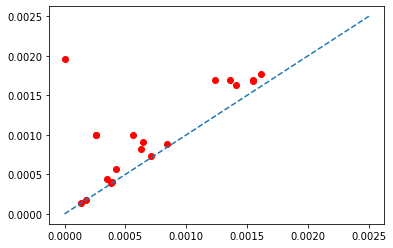

In [39]:
for h in H:
    print( "h.pb:" , h.pb  )
    print( "h.xb:" , h.xb  )
    print( "h.pd:" , h.pd  )
    print( "h.xd:" , h.xd  )
    plt.scatter(h.pd, h.pb, color='red')
    print(  )
plt.plot([0,0.0025], [0,0.0025], '--')
plt.show()

In [41]:
for i in Microstates_X:
    print(i.prob)

0.0019534086
0.00176932773
0.001694251
0.00169285193
0.00168654427
0.00168494973
0.00163888633
0.00163255407
0.00161428327
0.001604993
0.0015808182
0.00157329693
0.00155526047
0.00154945827
0.0015294478
0.00142105713
0.00141704453
0.00141205713
0.00140815687
0.0014071036
0.0014053474
0.0013932614
0.001377263
0.0013727544
0.00136837987
0.00136685453
0.00135832647
0.00135801987
0.00135128993
0.0013081232
0.00130526773
0.00129477153
0.00129258473
0.00125298487
0.00124185493
0.00123761193
0.00123416493
0.0012330486
0.00122694687
0.00122488553
0.00122334253
0.0012227432
0.00121753327
0.0011521608
0.00114726887
0.0011467828
0.00113993493
0.00113821693
0.0011365886
0.0011347934
0.00113139153
0.00112235027
0.00111929447
0.00111601767
0.0011144892
0.0011138306
0.00111308253
0.001105915
0.00109585667
0.001094569
0.00108600773
0.001078906
0.00107489647
0.0010651008
0.0010601588
0.00106012873
0.0010568304
0.00105636513
0.00102082487
0.001020485
0.00101376433
0.0010116266
0.00101124587
0.0010088895

0.000108896933
0.000108891133
0.0001088046
0.000108780667
0.000108762933
0.000108647267
0.000108589467
0.0001085762
0.0001085156
0.000108426067
0.000108330733
0.000108240467
0.000108223533
0.000108067867
0.000108000267
0.0001079478
0.000107922733
0.000107763533
0.000107723867
0.000107686333
0.0001075556
0.000107494467
0.000107468467
0.0001073008
0.0001072304
0.000107132667
0.000107118333
0.000107084533
0.00010704
0.0001070348
0.000107028733
0.000107011667
0.000107001067
0.000106875333
0.0001068212
0.0001068156
0.000106564067
0.000106457333
0.000106383067
0.000106273067
0.000106270667
0.000106232
0.000106221733
0.000106173067
0.000106094267
0.000106040733
0.000105907867
0.000105902133
0.000105894933
0.000105739533
0.000105655533
0.000105554867
0.000105482133
0.000105469467
0.000105359133
0.000105353933
0.000105314467
0.000105313133
0.000105292267
0.000105291
0.0001052782
0.000105269867
0.0001052322
0.000105219067
0.000105211867
0.000105204667
0.000105165733
0.000105156533
0.000105037067

5.39167333e-05
5.39124e-05
5.3897e-05
5.38844667e-05
5.38679333e-05
5.38636e-05
5.38428e-05
5.38236e-05
5.38103333e-05
5.38050667e-05
5.37962e-05
5.37799333e-05
5.37628667e-05
5.37480667e-05
5.37406e-05
5.373e-05
5.37261333e-05
5.37184667e-05
5.37034667e-05
5.36897333e-05
5.36687333e-05
5.36345333e-05
5.36133333e-05
5.36110667e-05
5.35837333e-05
5.35794e-05
5.35676667e-05
5.35665333e-05
5.35258e-05
5.35082667e-05
5.34972667e-05
5.34964667e-05
5.34948e-05
5.34894e-05
5.34425333e-05
5.34053333e-05
5.33883333e-05
5.33843333e-05
5.33641333e-05
5.33411333e-05
5.33391333e-05
5.33148e-05
5.33141333e-05
5.32972e-05
5.32543333e-05
5.32392e-05
5.32174667e-05
5.31820667e-05
5.31488e-05
5.31447333e-05
5.31142e-05
5.31012667e-05
5.30986e-05
5.30838667e-05
5.30812667e-05
5.30436e-05
5.30239333e-05
5.3023e-05
5.29970667e-05
5.29966667e-05
5.29810667e-05
5.29754e-05
5.29631333e-05
5.2954e-05
5.2945e-05
5.29312667e-05
5.29019333e-05
5.28623333e-05
5.28409333e-05
5.28268667e-05
5.28239333e-05
5.28071333

2.79274667e-05
2.79271333e-05
2.7918e-05
2.79159333e-05
2.79064667e-05
2.78984e-05
2.78940667e-05
2.7893e-05
2.78918e-05
2.78796667e-05
2.78676667e-05
2.78447333e-05
2.78414667e-05
2.7829e-05
2.78232667e-05
2.78171333e-05
2.78043333e-05
2.77958e-05
2.77492e-05
2.77364e-05
2.77211333e-05
2.77152e-05
2.77143333e-05
2.77124e-05
2.77120667e-05
2.76814e-05
2.76774e-05
2.76572e-05
2.76429333e-05
2.76418e-05
2.76136e-05
2.76082667e-05
2.75892e-05
2.75883333e-05
2.75838e-05
2.75823333e-05
2.75755333e-05
2.75718e-05
2.75691333e-05
2.75657333e-05
2.75601333e-05
2.75580667e-05
2.75454667e-05
2.7539e-05
2.75214e-05
2.75004e-05
2.74950667e-05
2.74902e-05
2.74847333e-05
2.7484e-05
2.74766e-05
2.74664e-05
2.74214e-05
2.74210667e-05
2.74128667e-05
2.74070667e-05
2.74000667e-05
2.73972e-05
2.73932e-05
2.73817333e-05
2.7374e-05
2.73713333e-05
2.73706e-05
2.73578667e-05
2.73507333e-05
2.73321333e-05
2.73176e-05
2.73121333e-05
2.72818e-05
2.72718e-05
2.72634e-05
2.7261e-05
2.72608667e-05
2.72543333e-05
2.

1.67552e-05
1.6754e-05
1.6753e-05
1.67484e-05
1.67464e-05
1.67458e-05
1.67457333e-05
1.67406e-05
1.67256e-05
1.67182667e-05
1.66983333e-05
1.66938667e-05
1.66918667e-05
1.6689e-05
1.66841333e-05
1.66755333e-05
1.66752e-05
1.66741333e-05
1.66634e-05
1.66633333e-05
1.66620667e-05
1.6662e-05
1.66604e-05
1.66549333e-05
1.66475333e-05
1.66468667e-05
1.66457333e-05
1.66381333e-05
1.66311333e-05
1.66280667e-05
1.66186667e-05
1.66168667e-05
1.66112e-05
1.66078e-05
1.66014e-05
1.65961333e-05
1.65882e-05
1.65816667e-05
1.65804667e-05
1.657e-05
1.65678667e-05
1.65626e-05
1.65614e-05
1.65607333e-05
1.65607333e-05
1.65550667e-05
1.65530667e-05
1.65384e-05
1.65351333e-05
1.65334667e-05
1.65317333e-05
1.65307333e-05
1.65274667e-05
1.65236e-05
1.65232667e-05
1.65214667e-05
1.65186667e-05
1.65124e-05
1.65071333e-05
1.65070667e-05
1.65034e-05
1.64922667e-05
1.64841333e-05
1.64639333e-05
1.64599333e-05
1.645e-05
1.64416667e-05
1.64376667e-05
1.64356667e-05
1.64356667e-05
1.6432e-05
1.64278667e-05
1.64199

9.00233333e-06
9.0022e-06
9.00166667e-06
9.00113333e-06
8.99846667e-06
8.99686667e-06
8.99386667e-06
8.9936e-06
8.993e-06
8.99133333e-06
8.98913333e-06
8.987e-06
8.9848e-06
8.98433333e-06
8.98366667e-06
8.983e-06
8.98e-06
8.97706667e-06
8.96813333e-06
8.96773333e-06
8.96686667e-06
8.96393333e-06
8.96213333e-06
8.96193333e-06
8.9582e-06
8.95793333e-06
8.95773333e-06
8.9562e-06
8.95553333e-06
8.95553333e-06
8.95313333e-06
8.94846667e-06
8.94753333e-06
8.94633333e-06
8.946e-06
8.94346667e-06
8.94093333e-06
8.93966667e-06
8.93513333e-06
8.93033333e-06
8.9292e-06
8.9288e-06
8.9276e-06
8.92726667e-06
8.9268e-06
8.92386667e-06
8.92373333e-06
8.9198e-06
8.91693333e-06
8.91693333e-06
8.913e-06
8.9098e-06
8.90793333e-06
8.9072e-06
8.9034e-06
8.89946667e-06
8.8988e-06
8.89706667e-06
8.89593333e-06
8.89426667e-06
8.89333333e-06
8.89266667e-06
8.89213333e-06
8.89166667e-06
8.88853333e-06
8.88833333e-06
8.88146667e-06
8.87793333e-06
8.87753333e-06
8.87466667e-06
8.873e-06
8.87193333e-06
8.8682e-06
8

5.43553333e-06
5.43513333e-06
5.43106667e-06
5.42746667e-06
5.4268e-06
5.42593333e-06
5.42573333e-06
5.42313333e-06
5.4228e-06
5.42193333e-06
5.421e-06
5.41933333e-06
5.4188e-06
5.4186e-06
5.4182e-06
5.41713333e-06
5.41686667e-06
5.41546667e-06
5.41446667e-06
5.4142e-06
5.41366667e-06
5.4102e-06
5.41006667e-06
5.4078e-06
5.40773333e-06
5.4068e-06
5.40673333e-06
5.4064e-06
5.40526667e-06
5.40493333e-06
5.40153333e-06
5.4012e-06
5.40093333e-06
5.3992e-06
5.39833333e-06
5.3968e-06
5.3966e-06
5.3958e-06
5.39493333e-06
5.39426667e-06
5.3932e-06
5.39173333e-06
5.38926667e-06
5.38913333e-06
5.3886e-06
5.38773333e-06
5.38686667e-06
5.38666667e-06
5.38626667e-06
5.38453333e-06
5.38373333e-06
5.38346667e-06
5.3828e-06
5.38186667e-06
5.38093333e-06
5.3794e-06
5.37853333e-06
5.37706667e-06
5.37626667e-06
5.376e-06
5.37513333e-06
5.37473333e-06
5.3736e-06
5.3728e-06
5.3706e-06
5.37033333e-06
5.36586667e-06
5.3652e-06
5.36413333e-06
5.36306667e-06
5.3628e-06
5.36253333e-06
5.36246667e-06
5.3622e-06


3.3752e-06
3.37473333e-06
3.37446667e-06
3.3744e-06
3.37433333e-06
3.37386667e-06
3.37366667e-06
3.37346667e-06
3.37333333e-06
3.37286667e-06
3.3726e-06
3.37253333e-06
3.37233333e-06
3.3716e-06
3.37093333e-06
3.37026667e-06
3.37026667e-06
3.37026667e-06
3.36993333e-06
3.36993333e-06
3.36926667e-06
3.3692e-06
3.3686e-06
3.368e-06
3.36753333e-06
3.36486667e-06
3.36453333e-06
3.36453333e-06
3.364e-06
3.3632e-06
3.36293333e-06
3.36246667e-06
3.36173333e-06
3.36106667e-06
3.3596e-06
3.3594e-06
3.3564e-06
3.35633333e-06
3.35553333e-06
3.35453333e-06
3.3542e-06
3.35406667e-06
3.35313333e-06
3.35286667e-06
3.35286667e-06
3.35266667e-06
3.35246667e-06
3.3506e-06
3.35006667e-06
3.34973333e-06
3.3492e-06
3.34906667e-06
3.34886667e-06
3.34806667e-06
3.3478e-06
3.34726667e-06
3.34626667e-06
3.34606667e-06
3.3458e-06
3.3444e-06
3.34433333e-06
3.34393333e-06
3.34353333e-06
3.34286667e-06
3.34153333e-06
3.34073333e-06
3.3396e-06
3.33873333e-06
3.3386e-06
3.33846667e-06
3.33826667e-06
3.338e-06
3.33746

2.4032e-06
2.4032e-06
2.40246667e-06
2.40186667e-06
2.40166667e-06
2.40166667e-06
2.4014e-06
2.40113333e-06
2.4004e-06
2.40026667e-06
2.3998e-06
2.39966667e-06
2.39946667e-06
2.39893333e-06
2.39866667e-06
2.39846667e-06
2.3984e-06
2.39806667e-06
2.39786667e-06
2.39773333e-06
2.3972e-06
2.39666667e-06
2.39586667e-06
2.39566667e-06
2.39526667e-06
2.39513333e-06
2.3948e-06
2.39406667e-06
2.39393333e-06
2.39353333e-06
2.39333333e-06
2.39226667e-06
2.39226667e-06
2.39213333e-06
2.39113333e-06
2.39093333e-06
2.39046667e-06
2.39033333e-06
2.3898e-06
2.38973333e-06
2.3894e-06
2.38893333e-06
2.38866667e-06
2.3872e-06
2.387e-06
2.38673333e-06
2.38606667e-06
2.386e-06
2.3856e-06
2.38553333e-06
2.38546667e-06
2.3844e-06
2.38426667e-06
2.38426667e-06
2.38413333e-06
2.38386667e-06
2.3832e-06
2.3832e-06
2.38246667e-06
2.382e-06
2.38193333e-06
2.3818e-06
2.38026667e-06
2.38e-06
2.37933333e-06
2.37873333e-06
2.37813333e-06
2.378e-06
2.37773333e-06
2.37773333e-06
2.37746667e-06
2.37733333e-06
2.377e-06


1.79073333e-06
1.7902e-06
1.79e-06
1.7896e-06
1.78946667e-06
1.78946667e-06
1.78933333e-06
1.7892e-06
1.78893333e-06
1.78873333e-06
1.7886e-06
1.7884e-06
1.78813333e-06
1.788e-06
1.78753333e-06
1.78733333e-06
1.7868e-06
1.7866e-06
1.78626667e-06
1.78566667e-06
1.78533333e-06
1.78466667e-06
1.7846e-06
1.7846e-06
1.78453333e-06
1.7842e-06
1.78413333e-06
1.78306667e-06
1.7828e-06
1.78266667e-06
1.78213333e-06
1.78186667e-06
1.78186667e-06
1.7818e-06
1.7818e-06
1.78166667e-06
1.7816e-06
1.7808e-06
1.78073333e-06
1.78053333e-06
1.78026667e-06
1.7796e-06
1.7792e-06
1.77893333e-06
1.77886667e-06
1.77873333e-06
1.77873333e-06
1.7786e-06
1.77853333e-06
1.77846667e-06
1.7784e-06
1.77833333e-06
1.77813333e-06
1.77793333e-06
1.77786667e-06
1.77786667e-06
1.7776e-06
1.77713333e-06
1.77673333e-06
1.776e-06
1.77566667e-06
1.7754e-06
1.77506667e-06
1.775e-06
1.77466667e-06
1.7746e-06
1.7738e-06
1.77333333e-06
1.77326667e-06
1.77313333e-06
1.77313333e-06
1.77306667e-06
1.77306667e-06
1.77306667e-06
1.7

1.21453333e-06
1.2144e-06
1.21433333e-06
1.2142e-06
1.21413333e-06
1.21413333e-06
1.21333333e-06
1.21266667e-06
1.2126e-06
1.21246667e-06
1.21246667e-06
1.21146667e-06
1.2114e-06
1.21106667e-06
1.21093333e-06
1.21033333e-06
1.21013333e-06
1.21e-06
1.20986667e-06
1.2098e-06
1.2098e-06
1.2096e-06
1.2096e-06
1.2094e-06
1.2094e-06
1.20926667e-06
1.20873333e-06
1.20853333e-06
1.2082e-06
1.2082e-06
1.20813333e-06
1.20806667e-06
1.20806667e-06
1.20806667e-06
1.20806667e-06
1.20793333e-06
1.2078e-06
1.20773333e-06
1.2076e-06
1.20753333e-06
1.20753333e-06
1.20746667e-06
1.20733333e-06
1.20733333e-06
1.20733333e-06
1.20693333e-06
1.20666667e-06
1.2066e-06
1.20646667e-06
1.206e-06
1.20573333e-06
1.20566667e-06
1.2056e-06
1.20533333e-06
1.20506667e-06
1.20486667e-06
1.20473333e-06
1.20473333e-06
1.20446667e-06
1.2044e-06
1.20433333e-06
1.204e-06
1.204e-06
1.2038e-06
1.2036e-06
1.20353333e-06
1.2032e-06
1.20313333e-06
1.20293333e-06
1.20286667e-06
1.20273333e-06
1.20246667e-06
1.202e-06
1.2016e-06


8.43533333e-07
8.43466667e-07
8.43466667e-07
8.434e-07
8.43333333e-07
8.43266667e-07
8.432e-07
8.43066667e-07
8.42933333e-07
8.42866667e-07
8.42733333e-07
8.42733333e-07
8.424e-07
8.42266667e-07
8.422e-07
8.422e-07
8.42133333e-07
8.41933333e-07
8.418e-07
8.41666667e-07
8.416e-07
8.416e-07
8.41466667e-07
8.41333333e-07
8.41e-07
8.40733333e-07
8.406e-07
8.406e-07
8.40533333e-07
8.4e-07
8.398e-07
8.398e-07
8.39733333e-07
8.39666667e-07
8.39533333e-07
8.394e-07
8.394e-07
8.39333333e-07
8.392e-07
8.392e-07
8.39e-07
8.38933333e-07
8.38866667e-07
8.386e-07
8.38533333e-07
8.384e-07
8.38333333e-07
8.38266667e-07
8.38133333e-07
8.38133333e-07
8.38e-07
8.38e-07
8.37666667e-07
8.37466667e-07
8.374e-07
8.37066667e-07
8.37066667e-07
8.37e-07
8.37e-07
8.36933333e-07
8.368e-07
8.36666667e-07
8.364e-07
8.364e-07
8.362e-07
8.36133333e-07
8.358e-07
8.358e-07
8.358e-07
8.35266667e-07
8.35066667e-07
8.35e-07
8.348e-07
8.34466667e-07
8.34466667e-07
8.344e-07
8.34266667e-07
8.342e-07
8.342e-07
8.33533333e-07

5.94733333e-07
5.946e-07
5.94333333e-07
5.94133333e-07
5.94066667e-07
5.94066667e-07
5.94e-07
5.938e-07
5.938e-07
5.936e-07
5.934e-07
5.93266667e-07
5.932e-07
5.93133333e-07
5.92933333e-07
5.928e-07
5.928e-07
5.926e-07
5.92533333e-07
5.92533333e-07
5.92466667e-07
5.92333333e-07
5.92333333e-07
5.92266667e-07
5.922e-07
5.92066667e-07
5.92066667e-07
5.92066667e-07
5.92e-07
5.92e-07
5.918e-07
5.91666667e-07
5.914e-07
5.91333333e-07
5.91333333e-07
5.912e-07
5.91066667e-07
5.91e-07
5.90933333e-07
5.90866667e-07
5.908e-07
5.906e-07
5.906e-07
5.904e-07
5.90333333e-07
5.90333333e-07
5.89866667e-07
5.89866667e-07
5.89866667e-07
5.898e-07
5.89666667e-07
5.896e-07
5.89466667e-07
5.894e-07
5.894e-07
5.89333333e-07
5.89133333e-07
5.89133333e-07
5.89066667e-07
5.888e-07
5.888e-07
5.88733333e-07
5.88666667e-07
5.88466667e-07
5.88466667e-07
5.88133333e-07
5.88e-07
5.87866667e-07
5.878e-07
5.87666667e-07
5.87666667e-07
5.87466667e-07
5.87066667e-07
5.87e-07
5.86933333e-07
5.868e-07
5.86666667e-07
5.8653

4.828e-07
4.828e-07
4.826e-07
4.82533333e-07
4.82533333e-07
4.82333333e-07
4.82266667e-07
4.82266667e-07
4.82266667e-07
4.82e-07
4.81933333e-07
4.81933333e-07
4.81866667e-07
4.81866667e-07
4.81866667e-07
4.818e-07
4.81733333e-07
4.81733333e-07
4.81733333e-07
4.81733333e-07
4.81666667e-07
4.81666667e-07
4.816e-07
4.816e-07
4.816e-07
4.81466667e-07
4.81466667e-07
4.81466667e-07
4.81466667e-07
4.814e-07
4.814e-07
4.81333333e-07
4.81266667e-07
4.81266667e-07
4.812e-07
4.81133333e-07
4.81066667e-07
4.81e-07
4.80933333e-07
4.80933333e-07
4.808e-07
4.806e-07
4.806e-07
4.80466667e-07
4.804e-07
4.802e-07
4.802e-07
4.802e-07
4.802e-07
4.80133333e-07
4.80066667e-07
4.8e-07
4.79933333e-07
4.79866667e-07
4.79733333e-07
4.796e-07
4.796e-07
4.796e-07
4.79533333e-07
4.79466667e-07
4.794e-07
4.794e-07
4.79333333e-07
4.79266667e-07
4.79266667e-07
4.792e-07
4.792e-07
4.79133333e-07
4.79e-07
4.78933333e-07
4.788e-07
4.78733333e-07
4.78666667e-07
4.786e-07
4.78533333e-07
4.78533333e-07
4.78533333e-07
4.785

3.326e-07
3.32533333e-07
3.32466667e-07
3.32466667e-07
3.324e-07
3.32333333e-07
3.32266667e-07
3.32266667e-07
3.322e-07
3.322e-07
3.32133333e-07
3.32133333e-07
3.32133333e-07
3.32e-07
3.31933333e-07
3.31933333e-07
3.31933333e-07
3.31866667e-07
3.31866667e-07
3.318e-07
3.318e-07
3.31666667e-07
3.31666667e-07
3.316e-07
3.316e-07
3.316e-07
3.314e-07
3.31333333e-07
3.31333333e-07
3.31266667e-07
3.31266667e-07
3.31266667e-07
3.31266667e-07
3.31266667e-07
3.31266667e-07
3.31266667e-07
3.312e-07
3.312e-07
3.312e-07
3.31133333e-07
3.31066667e-07
3.31066667e-07
3.31e-07
3.30933333e-07
3.30933333e-07
3.30933333e-07
3.30866667e-07
3.308e-07
3.30733333e-07
3.30666667e-07
3.30666667e-07
3.306e-07
3.306e-07
3.306e-07
3.30533333e-07
3.30466667e-07
3.30466667e-07
3.30266667e-07
3.302e-07
3.302e-07
3.302e-07
3.302e-07
3.30133333e-07
3.30133333e-07
3.30133333e-07
3.3e-07
3.3e-07
3.29866667e-07
3.29866667e-07
3.29733333e-07
3.29666667e-07
3.29666667e-07
3.29666667e-07
3.29666667e-07
3.296e-07
3.296e-07
3

2.28533333e-07
2.28533333e-07
2.28533333e-07
2.28533333e-07
2.28533333e-07
2.28466667e-07
2.28466667e-07
2.28466667e-07
2.284e-07
2.28333333e-07
2.28333333e-07
2.28333333e-07
2.28266667e-07
2.28266667e-07
2.28266667e-07
2.28266667e-07
2.28266667e-07
2.28266667e-07
2.282e-07
2.282e-07
2.282e-07
2.282e-07
2.28133333e-07
2.28133333e-07
2.28066667e-07
2.27933333e-07
2.27933333e-07
2.27933333e-07
2.27933333e-07
2.27866667e-07
2.278e-07
2.27733333e-07
2.27733333e-07
2.27666667e-07
2.27666667e-07
2.276e-07
2.276e-07
2.276e-07
2.276e-07
2.276e-07
2.27533333e-07
2.27533333e-07
2.27466667e-07
2.27466667e-07
2.27466667e-07
2.27466667e-07
2.27466667e-07
2.27466667e-07
2.27466667e-07
2.274e-07
2.274e-07
2.27333333e-07
2.27333333e-07
2.27333333e-07
2.272e-07
2.27133333e-07
2.27133333e-07
2.27133333e-07
2.27133333e-07
2.27066667e-07
2.27066667e-07
2.27066667e-07
2.27e-07
2.27e-07
2.26933333e-07
2.26933333e-07
2.26866667e-07
2.26866667e-07
2.268e-07
2.268e-07
2.268e-07
2.268e-07
2.268e-07
2.26733333e-

1.83733333e-07
1.83733333e-07
1.83666667e-07
1.836e-07
1.836e-07
1.836e-07
1.836e-07
1.836e-07
1.83533333e-07
1.83533333e-07
1.83466667e-07
1.83466667e-07
1.83466667e-07
1.83466667e-07
1.834e-07
1.834e-07
1.834e-07
1.83333333e-07
1.83333333e-07
1.83333333e-07
1.83333333e-07
1.83266667e-07
1.83266667e-07
1.832e-07
1.832e-07
1.832e-07
1.83133333e-07
1.83133333e-07
1.83133333e-07
1.83133333e-07
1.83133333e-07
1.83066667e-07
1.83066667e-07
1.83066667e-07
1.83066667e-07
1.83e-07
1.83e-07
1.82933333e-07
1.82933333e-07
1.82866667e-07
1.82866667e-07
1.82866667e-07
1.82866667e-07
1.828e-07
1.828e-07
1.82733333e-07
1.82733333e-07
1.82666667e-07
1.82666667e-07
1.82666667e-07
1.82666667e-07
1.826e-07
1.826e-07
1.82533333e-07
1.82533333e-07
1.82466667e-07
1.82466667e-07
1.82466667e-07
1.82466667e-07
1.82466667e-07
1.82466667e-07
1.82466667e-07
1.824e-07
1.824e-07
1.824e-07
1.82333333e-07
1.82333333e-07
1.82333333e-07
1.82333333e-07
1.82266667e-07
1.82266667e-07
1.82266667e-07
1.822e-07
1.822e-07
1.

1.27933333e-07
1.27933333e-07
1.27933333e-07
1.27933333e-07
1.27866667e-07
1.27866667e-07
1.27866667e-07
1.27866667e-07
1.278e-07
1.278e-07
1.278e-07
1.27733333e-07
1.27733333e-07
1.27733333e-07
1.27733333e-07
1.27733333e-07
1.27733333e-07
1.27666667e-07
1.27666667e-07
1.27666667e-07
1.27666667e-07
1.276e-07
1.276e-07
1.276e-07
1.276e-07
1.27533333e-07
1.27533333e-07
1.27533333e-07
1.27533333e-07
1.27533333e-07
1.27533333e-07
1.27466667e-07
1.274e-07
1.274e-07
1.27333333e-07
1.27333333e-07
1.27333333e-07
1.27333333e-07
1.27333333e-07
1.27266667e-07
1.272e-07
1.272e-07
1.272e-07
1.272e-07
1.272e-07
1.272e-07
1.272e-07
1.272e-07
1.27133333e-07
1.27133333e-07
1.27133333e-07
1.27133333e-07
1.27133333e-07
1.27066667e-07
1.27066667e-07
1.27066667e-07
1.27066667e-07
1.27066667e-07
1.27066667e-07
1.27e-07
1.27e-07
1.27e-07
1.27e-07
1.27e-07
1.27e-07
1.27e-07
1.27e-07
1.27e-07
1.26933333e-07
1.26933333e-07
1.26933333e-07
1.26933333e-07
1.26933333e-07
1.26933333e-07
1.26933333e-07
1.26866667e-07

1.004e-07
1.004e-07
1.004e-07
1.00333333e-07
1.00333333e-07
1.00333333e-07
1.00333333e-07
1.00333333e-07
1.00333333e-07
1.00266667e-07
1.00266667e-07
1.00266667e-07
1.002e-07
1.002e-07
1.002e-07
1.002e-07
1.002e-07
1.002e-07
1.00133333e-07
1.00133333e-07
1.00133333e-07
1.00066667e-07
1.00066667e-07
1.00066667e-07
1.00066667e-07
1.00066667e-07
1.00066667e-07
1e-07
1e-07
1e-07
1e-07
1e-07
1e-07
1e-07
9.99333333e-08
9.99333333e-08
9.99333333e-08
9.99333333e-08
9.99333333e-08
9.98666667e-08
9.98666667e-08
9.98666667e-08
9.98666667e-08
9.98666667e-08
9.98e-08
9.98e-08
9.98e-08
9.97333333e-08
9.97333333e-08
9.97333333e-08
9.97333333e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96666667e-08
9.96e-08
9.96e-08
9.96e-08
9.96e-08
9.96e-08
9.95333333e-08
9.95333333e-08
9.95333333e-08
9.95333333e-08
9.95333333e-08
9.95333333e-08
9.95333333e-08
9.95333333e-08
9

7.55333333e-08
7.55333333e-08
7.55333333e-08
7.54666667e-08
7.54666667e-08
7.54666667e-08
7.54e-08
7.54e-08
7.54e-08
7.54e-08
7.54e-08
7.54e-08
7.54e-08
7.53333333e-08
7.53333333e-08
7.53333333e-08
7.53333333e-08
7.53333333e-08
7.53333333e-08
7.53333333e-08
7.53333333e-08
7.52666667e-08
7.52666667e-08
7.52666667e-08
7.52666667e-08
7.52666667e-08
7.52666667e-08
7.52666667e-08
7.52666667e-08
7.52e-08
7.52e-08
7.52e-08
7.52e-08
7.51333333e-08
7.51333333e-08
7.51333333e-08
7.51333333e-08
7.51333333e-08
7.51333333e-08
7.51333333e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.50666667e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.5e-08
7.49333333e-08
7.49333333e-08
7.49333333e-08
7.49333333e-08
7.49333333e-08
7.49333333e-08
7.49333333e-08
7.49333333e-08
7.49333333e-08
7.48666667e-08
7.48666667e-08
7.48666667e-08
7.48666667e-08
7.

6.10666667e-08
6.10666667e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.1e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.09333333e-08
6.08666667e-08
6.08666667e-08
6.08666667e-08
6.08666667e-08
6.08666667e-08
6.08666667e-08
6.08666667e-08
6.08666667e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.08e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.07333333e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06666667e-08
6.06e-08
6.06e-08
6.06e-08
6.06e-08
6.06e-08
6.06e-08
6.06e-08
6.06e-08
6.06e-08
6.06e-08
6.05333333e-08
6.05333333e-08
6.05333333e-08
6.05333333e-08
6.0533333

4.65333333e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64666667e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.64e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.63333333e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62666667e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.62e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.61333333e-08
4.60666667e-08
4.60666667e-08
4.60666667e-08
4.60666667e-08
4.60666667e-08
4.60666667e-08
4.60666667e-08
4.60666667e-08
4.60666667e-08
4.60666667e-0

3.68e-08
3.68e-08
3.67333333e-08
3.67333333e-08
3.67333333e-08
3.67333333e-08
3.67333333e-08
3.67333333e-08
3.67333333e-08
3.67333333e-08
3.67333333e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66666667e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.66e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.65333333e-08
3.64666667e-08
3.64666667e-08
3.64666667e-08
3.64666667e-08
3.64666667e-08
3.64666667e-08
3.64666667e-08
3.64

2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68666667e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.68e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.67333333e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2.66666667e-08
2

2.13333333e-08
2.13333333e-08
2.13333333e-08
2.13333333e-08
2.13333333e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12666667e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.12e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.11333333e-08
2.10666667e-08
2.10666667e-08
2.10666667e-08
2.10666667e-08
2.10666667e-08
2.10666667e-08
2.10666667e-08
2.10666667e-08
2

1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.70666667e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.7e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.69333333e-08
1.693

1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28666667e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.28e-08
1.27333333e-08
1.27333333e-08
1.27333333e-08
1.27333333e-08
1.27333333e-08
1.27333333e-08
1

1.02e-08
1.02e-08
1.02e-08
1.02e-08
1.02e-08
1.02e-08
1.02e-08
1.02e-08
1.02e-08
1.02e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333e-08
1.01333333

8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8.06666667e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
8e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7.93333333e-09
7

6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.26666667e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2e-09
6.2

5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
5e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4.93333333e-09
4

4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667e-09
4.06666667

3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3.06666667e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3e-09
3

2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333e-09
2.33333333

1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333e-09
1.93333333

1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.6e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333e-09
1.53333333

1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667e-09
1.26666667

1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667e-09
1.06666667

8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667e-10
8.66666667

7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333e-10
7.33333333

6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-10
6e-1

4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667e-10
4.66666667

4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-10
4e-1

3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333e-10
3.33333333

2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667e-10
2.66666667

2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-10
2e-1

1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333

1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333e-10
1.33333333

6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667e-11
6.66666667

In [ ]:
# import random
# import operator



# class Custom_Class:
#     def __init__(self, val):
#         self.val = val


# data = []
# for i in range(10):
#     data.append( Custom_Class(random.randint(0,10)) )
    
# for obj in data:
#     print( obj.val , end=" " )
    
# data_sorted = sorted( data ,key=operator.attrgetter('val') )

# print( "\n" )

# for obj in data_sorted:
#     print( obj.val , end=" " )